# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [2]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Variables globales

In [28]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'ibereval_misogyny2018_es_train.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [29]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)

----------------------------

## Sentiment Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [30]:
df_ibereval.head()

,id,text,misogynous,misogyny_category,target
0,1,Módulo 01 Invitados Directivos del Sindicato '...,0,0,0
1,2,"@Causafiebres Claro, es que ha puesto imbécil ...",0,0,0
2,3,@Nanchinho A ver si haces algo que sirva para ...,1,discredit,active
3,4,@Rafhyta86 @ElDesmadre__ Habe pasame el video ...,1,discredit,passive
4,5,@Otb_35 Que te calles so guarra.,1,dominance,active


In [31]:
sentiment_analyzer = create_analyzer("sentiment", lang="es")

In [32]:
#Ejemplo de la documentacion
sentiment_analyzer.predict("Qué gran jugador es Messi")

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [33]:
def analyze_sentiment(text):
    result = sentiment_analyzer.predict(text.lower())
    sentiment = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Sentimiento detectado: {sentiment}")
    print(f"Probabilidades: {probabilities}")

    return sentiment, probabilities, text

In [34]:
text_data = df_ibereval['text'].tolist()
results = [analyze_sentiment(text) for text in tqdm(text_data)]

  0%|          | 13/3307 [00:00<00:52, 62.94it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28253471851348877, 'NEU': 0.651597797870636, 'POS': 0.06586752086877823}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9181393980979919, 'NEU': 0.07236133515834808, 'POS': 0.009499317035079002}

-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9078893661499023, 'NEU': 0.06718939542770386, 'POS': 0.024921180680394173}

-----------------------
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI

  1%|          | 29/3307 [00:00<00:45, 72.75it/s]


-----------------------
Texto analizado: @LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se lo escriben a un tío en la polla 😒😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.804638147354126, 'NEU': 0.18966221809387207, 'POS': 0.005699547007679939}

-----------------------
Texto analizado: NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38550424575805664, 'NEU': 0.5677079558372498, 'POS': 0.04678776115179062}

-----------------------
Texto analizado: @JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585115313529968, 'NEU': 0.03730277717113495, 'POS': 0.00418568542227149}

-----------------------
Texto analizado: Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que 

  1%|▏         | 45/3307 [00:00<00:42, 76.01it/s]


-----------------------
Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.05003650113940239, 'NEU': 0.6598668694496155, 'POS': 0.29009655117988586}

-----------------------
Texto analizado: @pprecuero @EdGrimaldo Ni tas trabajando perra callate.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7982338070869446, 'NEU': 0.17026813328266144, 'POS': 0.03149808570742607}

-----------------------
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7629408836364746, 'NEU': 0.21160784363746643, 'POS': 0.025451282039284706}

-----------------------
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajaj

  2%|▏         | 61/3307 [00:00<00:42, 75.97it/s]


-----------------------
Texto analizado: @fxbianna Y tu eres la amiga perra que me lo va mamar a espaldas de ella, estupida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9023517966270447, 'NEU': 0.0796159878373146, 'POS': 0.018032154068350792}

-----------------------
Texto analizado: @Mariiana1478 @vca99 @laura9909_ @mejiaosorio_ Tú eres la perra mayor JAJAJAJAJAJA con manes de carros
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33510056138038635, 'NEU': 0.5943286418914795, 'POS': 0.07057081907987595}

-----------------------
Texto analizado: @KilvettZ Cállate tú vende patria hijo de tu maldita perra madre q te trajo al mundo.. te hubieras ido con todo y placenta al infierno
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557796120643616, 'NEU': 0.026691358536481857, 'POS': 0.01752898097038269}

-----------------------
Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Sentimiento detectado: NEG
Probabilidades: {'NEG

  2%|▏         | 77/3307 [00:01<00:42, 75.18it/s]


-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9551355838775635, 'NEU': 0.034146614372730255, 'POS': 0.01071789301931858}

-----------------------
Texto analizado: Entiendo que el acoso puede terminar en violación o muerte (en el peor de los casos) y las drogas normalmente dañan al que las consume. Uno es un daño infligido y el otro daño es autoinducido. https://t.co/BRv1dUD71r
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8542685508728027, 'NEU': 0.13878372311592102, 'POS': 0.006947711110115051}

-----------------------
Texto analizado: Soy caga palos y que! Pagame a la madre y callate el pinche osico perra ,antes que te valla peor hija de puta 🇲🇽😈
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9211806058883667, 'NEU': 0.06725242733955383, 'POS': 0.011566960252821445}

-----------------------


  3%|▎         | 85/3307 [00:01<00:44, 72.00it/s]


-----------------------
Texto analizado: A esto se le llama falta de vergüenza https://t.co/BxZckxF9xQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9514631032943726, 'NEU': 0.04253049194812775, 'POS': 0.006006361450999975}

-----------------------
Texto analizado: Exacto! #puralata #feminazis #HombreAbusado https://t.co/zTEvaftxcd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7872155904769897, 'NEU': 0.19706490635871887, 'POS': 0.01571951061487198}

-----------------------
Texto analizado: @FaunaFeminazi Ayúdanos a promover el Movimiento SEMEN!! Un RT!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.041701540350914, 'NEU': 0.42322972416877747, 'POS': 0.5350687503814697}

-----------------------
Texto analizado: NO ES CULPA MIA UUUUO, LA ZORRA DE TU NOVIA QUIERE ARRANCAR, NO ES CULPA MIA, UUUUO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.679121196269989, 'NEU': 0.27136266231536865, 'POS': 0.04951614886522293}

-----------------------
Texto analizado: ''¿Qui

  3%|▎         | 103/3307 [00:01<00:41, 76.40it/s]


-----------------------
Texto analizado: Apartas el tanga a un lado, posas mi polla en tu coño y te dejas caer despacio metiéndola entera, que placer me da sentir como aprieta tu coño durante todo el recorrido, baja nena https://t.co/EAzApav28W
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0723327249288559, 'NEU': 0.18847867846488953, 'POS': 0.7391886115074158}

-----------------------
Texto analizado: Eres una perra que no merece a sus amigos — ¿Quieres ser mi amigo/a? Tal vez a ti sí te merezca. https://t.co/NjEcj00Z9a
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8714198470115662, 'NEU': 0.10854728519916534, 'POS': 0.020032908767461777}

-----------------------
Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6312282681465149, 'NEU': 0.34190574288368225, 'POS': 0.026865974068641663}

-----------------------
Texto ana

  4%|▎         | 119/3307 [00:01<00:44, 71.09it/s]


-----------------------
Texto analizado: @anaisbernal La Mariló Montero es una hija de puta machista!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9596990942955017, 'NEU': 0.028565937653183937, 'POS': 0.01173493079841137}

-----------------------
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.776976466178894, 'NEU': 0.18385392427444458, 'POS': 0.03916950151324272}

-----------------------
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9790087342262268, 'NEU': 0.016988171264529228, 'POS': 0.00400302279740572}

-----------------------
Texto analizado: Mi novia es la mujer más hermosa que he visto en mi perra vida.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02

  4%|▍         | 127/3307 [00:01<00:52, 61.03it/s]


-----------------------
Texto analizado: @jovencito9797 Comemela a mi jejeje
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06863429397344589, 'NEU': 0.5739288330078125, 'POS': 0.3574368953704834}

-----------------------
Texto analizado: Te odio Lidia, no te mereces a Francisco, #perra #LasChicasDelCable2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9743940234184265, 'NEU': 0.02027740143239498, 'POS': 0.005328530911356211}

-----------------------
Texto analizado: @GustavoOrozcoH No le enseñaron modales a esa antifujimorista perra mermelera del foro de sao paulodebretch?esta ofendiendo a millones de votantes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.966284453868866, 'NEU': 0.02887028455734253, 'POS': 0.004845271352678537}

-----------------------
Texto analizado: @gonzozaqw @_piturros tu callate un mes perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6613898873329163, 'NEU': 0.2766788601875305, 'POS': 0.061931293457746506}

-----------------------
T

  4%|▍         | 140/3307 [00:02<00:55, 56.79it/s]


-----------------------
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763363599777222, 'NEU': 0.018754517659544945, 'POS': 0.004909194074571133}

-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576386213302612, 'NEU': 0.03731870278716087, 'POS': 0.0050426507368683815}

-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581945538520813, 'NEU': 0.03572329506278038, 'POS': 0.006082214880734682}

-----------

  5%|▍         | 152/3307 [00:02<00:57, 54.90it/s]


-----------------------
Texto analizado: @yulianaromero19 Entonces según esta lógica tú eres una perra como todas las caleñas(?)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0957322046160698, 'NEU': 0.7926633954048157, 'POS': 0.11160435527563095}

-----------------------
Texto analizado: Ole tu, solo le falto decir que con Franco eso no pasaba https://t.co/27hVQOiL1K
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6506545543670654, 'NEU': 0.25837400555610657, 'POS': 0.09097150713205338}

-----------------------
Texto analizado: @LailaGermanotta Se merecía 3 oscars solo por esa escena. La hada madrina es ESA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4105950593948364, 'NEU': 0.3628489077091217, 'POS': 0.22655600309371948}

-----------------------
Texto analizado: @carmeladp07 POR FAVOR NO PROMETAS ESO ☹️😢 tú eres perra diva
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6107993721961975, 'NEU': 0.34337490797042847, 'POS': 0.045825712382793427}

------

  5%|▍         | 164/3307 [00:02<01:00, 51.98it/s]


-----------------------
Texto analizado: @SamuelMarinRuiz Por desgracia tengo 4 pelos polla en la cara y es toh muy sad Encima de Panchito y parguela...imberbe https://t.co/CQm0ZwcPGa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.985178530216217, 'NEU': 0.012958791106939316, 'POS': 0.0018626770470291376}

-----------------------
Texto analizado: Porque las mujeres ven las peliculas porno enteras? -Porque se creen que al final se van a casar o algo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8659420013427734, 'NEU': 0.12653397023677826, 'POS': 0.007523968815803528}

-----------------------
Texto analizado: @Sucedaneosdesal @recap001 Pero cállate perra, que lo lo había visto xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5901942253112793, 'NEU': 0.3298962712287903, 'POS': 0.0799095407128334}

-----------------------
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Sentimiento detectado: NEG
Probabilidades: {'N

  5%|▌         | 176/3307 [00:02<00:57, 54.04it/s]


-----------------------
Texto analizado: @Emol No apruebo hechos como la violación o el acoso sexual, pero el riesgo de este tipo de campañas es que se pasa de hacer conciencia frente a un hecho determinado a un fanatismo extremo, en la que pagan 'justos por pecadores'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643976092338562, 'NEU': 0.031488846987485886, 'POS': 0.0041135624051094055}

-----------------------
Texto analizado: Vuélvete una perra con quien lo merezcas https://t.co/TxrsCYQYQ8
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05095648765563965, 'NEU': 0.20546133816242218, 'POS': 0.7435821890830994}

-----------------------
Texto analizado: @IrantzuVarela Mezclas conceptos, hablar de acoso es una cosa, de sexo o violación es otra. El acoso es no aceptar un no, es usar palabras groseras, pero no saludar, presentarse, invitar a un café una sola vez, aceptando el si o el no como respuesta, o in
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8034366965293

  6%|▌         | 189/3307 [00:02<00:54, 56.95it/s]


-----------------------
Texto analizado: ONLINE EN https://t.co/wkT9BMovtL Thalia peliroja canchonda en busca de una polla bien guarra ...#sexo por #webcam 🚨 https://t.co/YEVmgJXLgD
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06760047376155853, 'NEU': 0.8202311396598816, 'POS': 0.11216837912797928}

-----------------------
Texto analizado: @MashiRafael Ya cállate rechucha de tu madre y traga de tu misma medicina hijo de la gran puta!!! Tirano cobarde y dictador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9293922185897827, 'NEU': 0.04592088982462883, 'POS': 0.024686874821782112}

-----------------------
Texto analizado: No entiendo por qué no te gusta mi perra si tú eres más perra q ella
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8666321039199829, 'NEU': 0.11096956580877304, 'POS': 0.022398319095373154}

-----------------------
Texto analizado: @JorgeCalabres Cállate hija de perra mongolo de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371109

  6%|▌         | 195/3307 [00:03<00:55, 55.73it/s]


-----------------------
Texto analizado: @KobaML Claro, es un hoyo(coño) que se abre con una tuneladora(polla) sin consentimiento de la naturaleza. Una macabra violación de libro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460509419441223, 'NEU': 0.04624738544225693, 'POS': 0.00770171033218503}

-----------------------
Texto analizado: Mira estoy hasta los cojones de que por enseñar una teta y no ser tío me llamen guarra,por enseñar el culo me digan que solo lo hago para calentar,tronco tanto os cuesta ver una teta de una tía como algo normal?Es un cuerpo al igual que el del hombre,amo enseñar mi cuerpo!!! https://t.co/3DLCmgKc88
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9659937024116516, 'NEU': 0.027193741872906685, 'POS': 0.00681258412078023}

-----------------------
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE ZOOLÓGICO QUE NOMBRE, P

  6%|▋         | 207/3307 [00:03<00:58, 52.92it/s]


-----------------------
Texto analizado: @carmonangelica @anaisbernal Por que no la salió del coño decirlo, a quién has venido a juzgar, a Salma o al puto acosador?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8960168957710266, 'NEU': 0.09485774487257004, 'POS': 0.009125345386564732}

-----------------------
Texto analizado: 'Mi novia es sevillista, es una puta más' canta Adán. Ahora vendrán hablándome de clases, de categorías y de 'piques'. No hay más preguntas, señoría. https://t.co/TXauHkGf0r
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4770389497280121, 'NEU': 0.4180287718772888, 'POS': 0.10493233799934387}

-----------------------
Texto analizado: @Rockefort100 Hahaha, me das risa. Mejor cállate y no te metas donde no te mencionan, perra llorona.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581496715545654, 'NEU': 0.02834356762468815, 'POS': 0.013506799936294556}

-----------------------
Texto analizado: Vamos a ver si hay algún extremista de la mujer por

  7%|▋         | 219/3307 [00:03<00:58, 52.47it/s]


-----------------------
Texto analizado: @qweenbellaC callate de una vez perra en celo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8744372129440308, 'NEU': 0.102696493268013, 'POS': 0.022866280749440193}

-----------------------
Texto analizado: Si por rechazar, enseñar el culo, enseñar las tetas, follar, liarme con quien me salga dl coño o etc soy una guarra, tranquil@s, seré aún más guarra todavía. Pero lo que realmente soy, es libre, libre de hacer con mi cuerpo y con mi vida lo que YO quiera, no lo que a ti te guste.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7143757939338684, 'NEU': 0.24209432303905487, 'POS': 0.0435299351811409}

-----------------------
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.808649480342865, 'NEU': 0.16764391958713531, 'POS': 0.02370663359761238}

-----------------------
Texto analizado: @Barbijaputa este pequeñajo lleva dos días pegado a mi por culpa de los putos petar

  7%|▋         | 231/3307 [00:03<01:02, 49.59it/s]


-----------------------
Texto analizado: Perra agradece que te tire el licor en la blusa te lo merecías en la cabeza hp 😂🤦‍♂️ antes de hablar de mi... https://t.co/uRJEvTPI3W
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6782786250114441, 'NEU': 0.2932232916355133, 'POS': 0.028498047962784767}

-----------------------
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782342314720154, 'NEU': 0.01701299659907818, 'POS': 0.004752760287374258}

-----------------------
Texto analizado: @lortegadiaz Cállate perra que a ti te espera el mismo destino de maduro y cabello ahora se la tira de correcta porque no lo hicistes aquí corrupta de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9116345643997192, 'NEU': 0.06610929220914841, 'POS': 0.022256119176745415}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la cambias https://t

  7%|▋         | 248/3307 [00:04<00:47, 64.13it/s]


-----------------------
Texto analizado: @prssrx desnudas provocais al igual que un hombre, simplemente porque es un instinto humano.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.12429651618003845, 'NEU': 0.40925732254981995, 'POS': 0.4664462208747864}

-----------------------
Texto analizado: #WK12CL como hacen ganar a la pala Okada, Naito lo merecia. Puta q estoy enojado!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9012740254402161, 'NEU': 0.06894029676914215, 'POS': 0.029785657301545143}

-----------------------
Texto analizado: @albafff14 tú eres una perra infernal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098172783851624, 'NEU': 0.0722397044301033, 'POS': 0.017943069338798523}

-----------------------
Texto analizado: @CRDecoracion si a mi me dicen mardita hubiese dicho 'yo si mi amor' como una real perra pero tu eres nula así que te prestare mi tarjeta para que te compres una personalidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8094348

  8%|▊         | 263/3307 [00:04<00:45, 66.79it/s]


-----------------------
Texto analizado: @anaisbernal @sextaNoticias Ocultarse para actuar, esconder el cuerpo del delito, inventarse coartadas, etc., no son índices de que sabes lo que has hecho, sabes que está muy mal hecho y por ello estás muy cuerdo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098383784294128, 'NEU': 0.08478850871324539, 'POS': 0.005373111926019192}

-----------------------
Texto analizado: @PadreJosePalmar CÁLLATE LA JETA PADRE HIJO DE PERRA.!!! https://t.co/VgE9Vq8WTC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8421236872673035, 'NEU': 0.1012016236782074, 'POS': 0.05667467787861824}

-----------------------
Texto analizado: @FrankliLeonardo Cállate perra. Jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6044902801513672, 'NEU': 0.24158866703510284, 'POS': 0.15392114222049713}

-----------------------
Texto analizado: @VicxorAlt Tu eres una zorra ladrona no me diste mi cuenta del directo buuu pasado de jaime 🕳👓💢👓💤💨🕳💣❣💛❣💣💦💨💜❣💛❣💣💟🗯💭🗨

  8%|▊         | 279/3307 [00:04<00:41, 72.78it/s]


-----------------------
Texto analizado: Mecagontodo 2 tíos en clase aprueban y llevan 35 min quejándose de su nota tío que has aprobado callate la puta boca 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9327268600463867, 'NEU': 0.06015197932720184, 'POS': 0.00712117925286293}

-----------------------
Texto analizado: La perra les ladró a un grupo de adolescentes. Yo salí y le dije: 'Manu! callate! Dejá los gurises en paz!' Que vejez.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7813671231269836, 'NEU': 0.1992398351430893, 'POS': 0.01939300447702408}

-----------------------
Texto analizado: @anaisbernal Yo estoy convencida de que todas las tonterías que dice son premeditadas, para llamar la atención y que no nos olvidemos de ella. Es imposible que sea ta tonta!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8730650544166565, 'NEU': 0.10693621635437012, 'POS': 0.019998641684651375}

-----------------------
Texto analizado: @LoboEfimero Eso se pasa con un simple

  9%|▉         | 296/3307 [00:04<00:38, 77.26it/s]


-----------------------
Texto analizado: @JoeelSsj comemela lindo JAJAJA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0320892371237278, 'NEU': 0.197789266705513, 'POS': 0.7701215147972107}

-----------------------
Texto analizado: @DonHarbano @iqsolita Jajajaja hijo de perra deja de enseñar mis alternas!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8397727012634277, 'NEU': 0.13135935366153717, 'POS': 0.02886795625090599}

-----------------------
Texto analizado: @billboard Ay estúpida perra gracias a otros tu eres famosa , idiota!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8469814658164978, 'NEU': 0.11230870336294174, 'POS': 0.040709853172302246}

-----------------------
Texto analizado: @KimKardashian @EliLinnetz Perra, tapate pasas pena. Te vives de enseñar el culo que es lo unico bueno que tienes🙄🐍
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9376090168952942, 'NEU': 0.05605621635913849, 'POS': 0.006334757432341576}

-----------------------
Texto

  9%|▉         | 312/3307 [00:04<00:38, 77.91it/s]


-----------------------
Texto analizado: @afrikaner Y está perfecto, hay muchos feminismos, pero se están peleando con la nada denunciando que violación no es lo mismo que acoso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6942105293273926, 'NEU': 0.26812538504600525, 'POS': 0.03766407072544098}

-----------------------
Texto analizado: @aguus_nanni Aaaaa callate maldita perra que vos tambien me tenes abandonada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9594599008560181, 'NEU': 0.03179085999727249, 'POS': 0.00874918419867754}

-----------------------
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co/vqFg6j4QKx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4922920763492584, 'NEU': 0.4494367241859436, 'POS': 0.05827117711305618}

-----------------------
Texto analizado: La ven más perra que ellas y siempre están criticando. Estás mujeres que viven en competencia son una comedia. Ridículas.
Sentimiento detectado:

 10%|▉         | 328/3307 [00:05<00:38, 78.16it/s]


-----------------------
Texto analizado: Es estúpido pensar que te tratan de inmaduro, o que haces acoso cibernético. No todos somos perfectos, y esta bien. Vos con aquel tweet te fuiste al carajo, pero bueno, todos cometemos errores. @itsjoelpimentel
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9441747069358826, 'NEU': 0.05020725727081299, 'POS': 0.0056179906241595745}

-----------------------
Texto analizado: @RebecaS72720624 @TowandaRebels En serio lo de ser puta te parece Bien ? Gran Trabajo del regimen Franco-Hitler ...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8058746457099915, 'NEU': 0.159209743142128, 'POS': 0.034915659576654434}

-----------------------
Texto analizado: zorra eres tu que no te sientes hombre y no entiendes que toda mujer es bella
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9641796946525574, 'NEU': 0.025564169511198997, 'POS': 0.010256153531372547}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees d

 10%|█         | 344/3307 [00:05<00:39, 75.17it/s]


-----------------------
Texto analizado: @anaisbernal @lamarea_com Lo mereces ;-)
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0065442221239209175, 'NEU': 0.054780490696430206, 'POS': 0.9386752843856812}

-----------------------
Texto analizado: @AyudaMadrid @LeticiaDolera Le deseo una muerte lenta y dolorosa a la escoria humana que le ha hecho eso al pobre gatito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696640372276306, 'NEU': 0.022785430774092674, 'POS': 0.007550533395260572}

-----------------------
Texto analizado: CALLATE GUARRA https://t.co/sNQF9mdeyG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8665385842323303, 'NEU': 0.09950216859579086, 'POS': 0.033959243446588516}

-----------------------
Texto analizado: Literal vivimos en un mundo donde si una chica es violada es 'por perra', 'por descuidada', siempre tiene la culpa la chica agredida, nunca el que agrede... sinceramente la gente que piensa así me da un puto asco.
Sentimiento detectado: NEG
Pr

 11%|█         | 361/3307 [00:05<00:38, 76.86it/s]


-----------------------
Texto analizado: @valevitarb es que tú eres LA perra MAYOR 🐕✨✨✨✨✨
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2814541161060333, 'NEU': 0.6101474761962891, 'POS': 0.1083984225988388}

-----------------------
Texto analizado: @ColiTerry Escuché muy atentamente su intervención y no pudo decir más tonterías en menos tiempo. No tiene ni puta idea de nada y menos de vela. Te leeré en el ABC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7596703767776489, 'NEU': 0.14426840841770172, 'POS': 0.09606119245290756}

-----------------------
Texto analizado: Cara Delevigne, acusada de fomentar el acoso y la violación en su nuevo anuncio https://t.co/GnNzMoVl7a https://t.co/pHRb7OWg97
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7949648499488831, 'NEU': 0.1720714122056961, 'POS': 0.03296374902129173}

-----------------------
Texto analizado: No es por alarmar pero acoso, violación y feminicidio son términos muy diferentes. Ojo! No se confundan. Hablar d

 11%|█▏        | 377/3307 [00:05<00:37, 77.74it/s]


-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5542027354240417, 'NEU': 0.41512972116470337, 'POS': 0.030667556449770927}

-----------------------
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor de mi polla, acaricias mi pecho, sientes mi respiración agitada, me voy a correr nena https://t.co/32P0qrpcPi
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06447295099496841, 'NEU': 0.12595245242118835, 'POS': 0.8095746040344238}

-----------------------
Texto analizado: @TamiFS_art comeme los cojones puto imbécil de la polla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.915196418762207, 'NEU': 0.053893208503723145, 'POS': 0.030910365283489227}

-----------------------
Texto analizado: @MRMaureraVen ¿Para que me sigues maldita chavista hija de puta? Sal de mi TL perra asqu

 12%|█▏        | 393/3307 [00:05<00:37, 78.03it/s]


-----------------------
Texto analizado: @camilaarbonaa8 Por acoso y violación a la intimidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6514871120452881, 'NEU': 0.3098534345626831, 'POS': 0.03865949064493179}

-----------------------
Texto analizado: @vikidonda Cállate Tilinga atorranta vergüenza da q x ser hija de puta,digo de montonera ocupes un cargo de diputada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9653789401054382, 'NEU': 0.02465505711734295, 'POS': 0.009965961799025536}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9203453063964844, 'NEU': 0.04705585166811943, 'POS': 0.03259876370429993}

-----------------------
Texto analizado: @enbocadetodosof Ptm que hace ese Seudo conductor dizque de Santi. Escoria de ATV. Cómo jalaron a ese imbecil que hablo mal de Guerrero y la selección 

 12%|█▏        | 410/3307 [00:06<00:36, 78.73it/s]


-----------------------
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819014668464661, 'NEU': 0.01295052282512188, 'POS': 0.005148029886186123}

-----------------------
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.929396390914917, 'NEU': 0.06322935968637466, 'POS': 0.007374200038611889}

-----------------------
Texto analizado: Mi perra es lo más insoportable del mundo chabon. QUIERO DORMIR CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9720869660377502, 'NEU': 0.021524813026189804, 'POS': 0.006388265639543533}

-----------------------
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasado hijo d puta. X suerte nadie se cruzó en tu camino. https://t.co/Y

 13%|█▎        | 426/3307 [00:06<00:37, 76.62it/s]


-----------------------
Texto analizado: @Tatian57955424 Antes que con la polla dura, follarte con mis dedos a la vez que te mamo tu coño empapado....mmmmm👅👅💦💦💦
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1100323423743248, 'NEU': 0.7495419979095459, 'POS': 0.1404256373643875}

-----------------------
Texto analizado: Me escupes a mí en la cara follando y te arranco la polla.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8510057330131531, 'NEU': 0.1197270005941391, 'POS': 0.02926725335419178}

-----------------------
Texto analizado: Porque la reportera es Satanás? La zorra de la novia es 😑 https://t.co/NfgNX973WA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9141448140144348, 'NEU': 0.08294164389371872, 'POS': 0.0029135821387171745}

-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8949897289276123, 'NEU': 0.07298146933317184, 'POS': 0.03202873468399048}

-----

 13%|█▎        | 444/3307 [00:06<00:36, 79.33it/s]


-----------------------
Texto analizado: Espero que tengan un buen año y reciban lo que merezcan menos yo porque yo me jodería por puta JAJAJAJAJJAJAAJAJAJAJJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47827932238578796, 'NEU': 0.4391512870788574, 'POS': 0.08256931602954865}

-----------------------
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5572434663772583, 'NEU': 0.25467315316200256, 'POS': 0.1880834400653839}

-----------------------
Texto analizado: Ya cállate a la verga pls men, quiero comer en puta paz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.885185182094574, 'NEU': 0.08264854550361633, 'POS': 0.03216622769832611}

-----------------------
Texto analizado: @LeticiaDolera Es la que interpreto a la hija de Arnold. Por aquel entonces tenia 14 años.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0905938670039177, 'NEU': 0.

 14%|█▎        | 453/3307 [00:06<00:35, 80.19it/s]


-----------------------
Texto analizado: Y no minimizar acoso ,no hay que llegar al punto de una violacion para hacer algo https://t.co/Jblj2L8kkx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7733771204948425, 'NEU': 0.20368170738220215, 'POS': 0.022941168397665024}

-----------------------
Texto analizado: @PamSashaa JAJAJ hay pam enserio te amo millones jajaja muy perra ' me tomas la foto enseñando las croquetas, probamos y nos despedimos' muy perra en mandada jajajaja
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00562969921156764, 'NEU': 0.04787665978074074, 'POS': 0.9464935660362244}

-----------------------
Texto analizado: @ramongrauserra @fmarcalvaro Y tú eres un hijo de puta catalán
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9375956058502197, 'NEU': 0.04940183088183403, 'POS': 0.013002591207623482}

-----------------------
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0220987219363451, 

 14%|█▍        | 471/3307 [00:06<00:35, 79.55it/s]


-----------------------
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8967172503471375, 'NEU': 0.08595040440559387, 'POS': 0.017332319170236588}

-----------------------
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6975326538085938, 'NEU': 0.26241394877433777, 'POS': 0.04005339741706848}

-----------------------
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9765728116035461, 'NEU': 0.01860465295612812, 'POS': 0.004822576884180307}

-----------------------
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4394906759262085, 'NEU': 0.48893484473228455, 'POS': 0.07157442718744278}

---

 15%|█▍        | 487/3307 [00:07<00:35, 79.67it/s]


-----------------------
Texto analizado: hoy, en el curro, le he montado un pollo interesante a un niñato al que le estoy enseñando... soy un hijo de puta a veces, sip
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7219438552856445, 'NEU': 0.2064511626958847, 'POS': 0.07160500437021255}

-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8799490332603455, 'NEU': 0.11255255341529846, 'POS': 0.007498389109969139}

-----------------------
Texto analizado: CUANDO VAN A ENTENDER QUE CON ESOS TEMAS NO SE BROMEAN SI TU HACES BROMAS SOBRE LA PEDOFILIA, VIOLACION O ACOSO SEXUAL ERES UNA MIERDA DE PERSONA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9553201794624329, 'NEU': 0.03982747346162796, 'POS

 15%|█▌        | 503/3307 [00:07<00:37, 75.36it/s]


-----------------------
Texto analizado: @reuvenmx Ya càllate hijo de tu puta perra madre a nadie le importa culero!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.940894603729248, 'NEU': 0.03719118610024452, 'POS': 0.021914290264248848}

-----------------------
Texto analizado: Llegue a casa y mi perra haciendo alto escándalo, cállate traidora
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9664039015769958, 'NEU': 0.02702336013317108, 'POS': 0.006572796031832695}

-----------------------
Texto analizado: @yanina_rubia @LeticiaDolera Escoria seguro es tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8854253888130188, 'NEU': 0.08583058416843414, 'POS': 0.028744058683514595}

-----------------------
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5359947085380554, 'NEU': 0.36935922503471375, 'POS': 0.0946460440754

 16%|█▌        | 520/3307 [00:07<00:36, 77.23it/s]


-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013064815662801266, 'NEU': 0.05062765255570412, 'POS': 0.9363075494766235}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635599255561829, 'NEU': 0.026582978665828705, 'POS': 0.009857121855020523}

-----------------------
Texto analizado: @_omarm58 Callate Perra. Toda con el nopal en la frente 😂🙄
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8552335500717163, 'NEU': 0.1350248157978058, 'POS': 0.009741566143929958}

-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.898

 16%|█▌        | 537/3307 [00:07<00:34, 79.21it/s]


-----------------------
Texto analizado: @GI0RGIELL0 cállate perra! unas birras después de toda la mierda familiar navideña?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6498948335647583, 'NEU': 0.29273074865341187, 'POS': 0.057374436408281326}

-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8532002568244934, 'NEU': 0.11250688135623932, 'POS': 0.0342928022146225}

-----------------------
Texto analizado: Una morra puso su foto de perfil donde sale bieeeeeen perra enseñando chicheee y nalga... Pero alvvvvvvvv las patas de hobitt que pedooooooooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7386233806610107, 'NEU': 0.1962948441505432, 'POS': 0.06508172303438187}

-----------------------
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Sentimiento detectado: NEG
Probabilidade

 17%|█▋        | 553/3307 [00:07<00:35, 76.80it/s]


-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3513820767402649, 'NEU': 0.5840281844139099, 'POS': 0.06458975374698639}

-----------------------
Texto analizado: -¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7678716778755188, 'NEU': 0.21377892792224884, 'POS': 0.018349427729845047}

-----------------------
Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8540135622024536, 'NEU': 0.11766543984413147, 'POS': 0.028321003541350365}

-----------------------
Texto analizado: Aguante la represión la puta madre!!! A estos negros de mierda hay que cagarlos a palos y enseñarles quien manda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8641061186790466, 'NEU': 0.079162210226058

 17%|█▋        | 569/3307 [00:08<00:36, 74.49it/s]


-----------------------
Texto analizado: Ven, comemela y cállate ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46054500341415405, 'NEU': 0.4347698986530304, 'POS': 0.10468506813049316}

-----------------------
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA ESCUCHA LOS ARGUMENTOS QUE LUEGO TE VAS A QUEDAR CALLADA FUJIMIERDA DEL CARAJO https://t.co/np9RAv5auI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9517073035240173, 'NEU': 0.03635372966527939, 'POS': 0.0119389733299613}

-----------------------
Texto analizado: @Ahrizorrita9 Mmm... Cuidarte y follarte con ganas y llenar tu coño con harto semen
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03199955075979233, 'NEU': 0.3697340488433838, 'POS': 0.5982663631439209}

-----------------------
Texto analizado: @GonzalezRafi @LeticiaDolera Hijo de puta tu puta madre! Aprende a leer y luego lee mi comentario de nuevo....y entonces me dices donde digo yo que está justificado. He dicho que eso explica que algunos se vuel

 18%|█▊        | 585/3307 [00:08<00:36, 74.70it/s]


-----------------------
Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9310532212257385, 'NEU': 0.05365078151226044, 'POS': 0.015296057797968388}

-----------------------
Texto analizado: @garciabanchs Tu eres un grandisimo hijo de puta!!! Porque no intervienes al coñosimo de la madre q te parió? A estas alturas los animales piensan q una guerra es la opción!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582849740982056, 'NEU': 0.03198118880391121, 'POS': 0.009733839891850948}

-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295374751091003, 'NEU': 0.05297251418232918, 'POS': 0.017490064725279808}

-----------------------
Texto analizado: @pauv

 18%|█▊        | 601/3307 [00:08<00:35, 76.53it/s]


-----------------------
Texto analizado: @anaisbernal El problema de ser un imbécil no es serlo,es demostrarlo. https://t.co/QThkKRNPPw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8490005731582642, 'NEU': 0.13380146026611328, 'POS': 0.01719793863594532}

-----------------------
Texto analizado: @suarezfeelings callate perra arrepentida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8322439789772034, 'NEU': 0.13000640273094177, 'POS': 0.03774969279766083}

-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7805432677268982, 'NEU': 0.19153013825416565, 'POS': 0.027926549315452576}

-----------------------
Texto analizado: Y tú eres la perra mayor, Hux. No te muerdas la lengua. —Rueda los ojos, colocándose aquel gorro y quitándole el polvo de encima, deteniéndose de golpe frente a el.— Y he acabado mi entrenamiento de hoy, así que, no. https://

 19%|█▊        | 618/3307 [00:08<00:34, 77.91it/s]


-----------------------
Texto analizado: @lautaroaguirree imbecil hoy te pego una piña te fracturo la nariz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9402889013290405, 'NEU': 0.04360681027173996, 'POS': 0.01610424369573593}

-----------------------
Texto analizado: Estaba cantando re emocion y la perra m beso ,onda callate 😂😂😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4856202304363251, 'NEU': 0.4854711890220642, 'POS': 0.028908520936965942}

-----------------------
Texto analizado: @AngelZanella CÁLLATE NADIE TE PREGUNTO, PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7945616841316223, 'NEU': 0.16251793503761292, 'POS': 0.04292038455605507}

-----------------------
Texto analizado: Y tú eres una PUTA ZORRA #feminazi de las cuales deberían avergonzarse (y muchas ya lo hacen) las MUJERES https://t.co/HOKJW1uCCj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750288724899292, 'NEU': 0.019548173993825912, 'POS': 0.005422987975180149}

------------

 19%|█▉        | 634/3307 [00:09<00:35, 76.29it/s]


-----------------------
Texto analizado: @anaisbernal Feliz año nuevo Ana te mereces lo mejor.😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005107223987579346, 'NEU': 0.03984493017196655, 'POS': 0.9550477862358093}

-----------------------
Texto analizado: @__Irenelazaro26 Pero porque tu eres una perra con el corazón de hielo, a mi me gusta el cariño humano 🙆
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009809927083551884, 'NEU': 0.2090710699558258, 'POS': 0.7811189889907837}

-----------------------
Texto analizado: @marita_hidalgo CALLATE VOS PUTA DE MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9043291807174683, 'NEU': 0.06460950523614883, 'POS': 0.031061317771673203}

-----------------------
Texto analizado: @RinconFortnite Me parece que si la foto gente ya es guarra usando los arbustos del mapa y no los de objetos ya con esto es el siguiente level para guarrear porque eres invisible y no se te oye
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0

 20%|█▉        | 650/3307 [00:09<00:35, 74.90it/s]


-----------------------
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20549152791500092, 'NEU': 0.6780661344528198, 'POS': 0.11644230782985687}

-----------------------
Texto analizado: HumorMachistahttp://twitpic.com/c6q5k - #Humor
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32840949296951294, 'NEU': 0.527214527130127, 'POS': 0.1443759649991989}

-----------------------
Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3712013363838196, 'NEU': 0.4900543987751007, 'POS': 0.13874435424804688}

-----------------------
Texto analizado: @LeticiaDolera El arte de la vida es aprender y enseñar y seguir aprendiendo,para seguir enseñando......
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013142228126525879, 'NEU': 0.19390086829662323, 'POS': 0.7929569482803345}

-----------------------
Texto analizado: @ConElMazoDa

 20%|██        | 666/3307 [00:09<00:35, 75.20it/s]


-----------------------
Texto analizado: @LeticiaDolera No tenéis ni puta idea. Sí, digo puta. Tampoco se detuvo al asqueroso 'el chicle' porque una mujer, la suya, mintió y le sirvió d coartada. ¡Su mujer mintió! Sabes lo que pasa cuando se hacen seguimientos o escuchas a alguien sin pruebas fe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704867601394653, 'NEU': 0.025564726442098618, 'POS': 0.003948546014726162}

-----------------------
Texto analizado: Mira rolitranco el mamagueva tu eres una puta y eso vas a seguir siendo toda tu maldita y miserable vida, y punto y he dicho. Fin del comunicado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8842891454696655, 'NEU': 0.09419779479503632, 'POS': 0.02151309885084629}

-----------------------
Texto analizado: @maxgamer3415 Que te calles mascota de mierda maldito fan boy de persona 5 que me cago en tu puta vida negro vete a tu país
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9653208255767822, 'NEU': 0.0246496479958

 21%|██        | 682/3307 [00:09<00:34, 75.94it/s]


-----------------------
Texto analizado: @krmenph5 @pibesevillista1 @babushasogordo @Sevillismo Calla,guarra española
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6810003519058228, 'NEU': 0.2572634816169739, 'POS': 0.06173613294959068}

-----------------------
Texto analizado: Los exjugadores de la #Arandina acusados de un delito de #abuso #sexual conocían la edad de la menor. Ninguno ha reconocido su participación en los hechos https://t.co/3cF0wfAEe8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5323735475540161, 'NEU': 0.45061174035072327, 'POS': 0.017014730721712112}

-----------------------
Texto analizado: @selinac66283070 @machismocalleje @Barbijaputa Propaganda hembrista, Cuando hablas de un hijo de la gran puta que agrede a una niña de 15 años. Tu no tienes vergüenza, eres un pedazo de mierda. Ya te he estado leyendo más veces y eres tan valiente que no 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9761752486228943, 'NEU': 0.01733103021979332, 'POS': 0.

 21%|██        | 698/3307 [00:09<00:34, 76.46it/s]


-----------------------
Texto analizado: @WilfredoNc @diegobuenavent1 @dcabellor @alejabolivarian @chavezcandanga Que hijo de perra eres cállate idiota
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9214996695518494, 'NEU': 0.055810246616601944, 'POS': 0.022690042853355408}

-----------------------
Texto analizado: @Esmexcnco @uggzo Hola reyna tu eres cncowers y apoyas a esta uggly zorra no lo puedo crerr
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8025711178779602, 'NEU': 0.17174549400806427, 'POS': 0.025683412328362465}

-----------------------
Texto analizado: Voy a enseñar a la perra Celia a arremeter el edredón. Hoy está para ello.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.045294392853975296, 'NEU': 0.2268989533185959, 'POS': 0.7278066277503967}

-----------------------
Texto analizado: No entiendo por que nunca me puedo quedar callada cuando me dicen algo la puta madre siempre tengo que insultar😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9810

 22%|██▏       | 714/3307 [00:10<00:36, 71.84it/s]


-----------------------
Texto analizado: @3LigasEn10Anos @alvaroojeda80 Tu eres el alemán tonto que usa el traductor porque no tiene ni puta idea de hablar español y que dice gilipolleces en Youtube? Viva España que es y será siempre tu país🇪🇸🇪🇸🇪🇸!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8960628509521484, 'NEU': 0.09478658437728882, 'POS': 0.009150546044111252}

-----------------------
Texto analizado: Perra, tú eres un ángel que por la manzana peca
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4404682517051697, 'NEU': 0.4565778970718384, 'POS': 0.10295382142066956}

-----------------------
Texto analizado: 'No es lo mismo una violación -que es un crimen- a un acoso a un piropo en la calle que puede incomodar a alguna y hace todo un pedo de eso' Martha Lamas, la antropóloga feminista más famosa de México.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.947152853012085, 'NEU': 0.04724149778485298, 'POS': 0.005605650600045919}

-----------------------
Texto ana

 22%|██▏       | 731/3307 [00:10<00:35, 73.12it/s]


-----------------------
Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que hace frío. PD. Te extraño.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8403772711753845, 'NEU': 0.12924212217330933, 'POS': 0.03038063831627369}

-----------------------
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561757445335388, 'NEU': 0.036264363676309586, 'POS': 0.0075599877163767815}

-----------------------
Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9034643769264221, 'NEU': 0.08189665526151657, 'POS': 0.014638991095125

 23%|██▎       | 747/3307 [00:10<00:34, 74.12it/s]


-----------------------
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5393458008766174, 'NEU': 0.4306451082229614, 'POS': 0.030009115114808083}

-----------------------
Texto analizado: Estoy tan tan feliz por mi amiga pochaa.. sos todo hija de perra. No te mueras nunca.TE MERECESS TODO LO BUENO QUE TE PASAAAAAAAA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013534254394471645, 'NEU': 0.02539149299263954, 'POS': 0.9610742926597595}

-----------------------
Texto analizado: Pasear a la perra en tacones es #glamour y el resto son tonterías
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.037361640483140945, 'NEU': 0.1605120748281479, 'POS': 0.8021262288093567}

-----------------------
Texto analizado:

 23%|██▎       | 755/3307 [00:10<00:34, 73.91it/s]


-----------------------
Texto analizado: Talvez quede como zorra pero te lo mereces Socia😎
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.020483417436480522, 'NEU': 0.11495600640773773, 'POS': 0.8645605444908142}

-----------------------
Texto analizado: Esto me ha llamado gilipollas. Tu eres una guarra, pero eh, sin acritud https://t.co/6XwgZu20wn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8349067568778992, 'NEU': 0.1340819150209427, 'POS': 0.031011376529932022}

-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210241436958313, 'NEU': 0.05961218103766441, 'POS': 0.0193636454641819}

-----------------------
Texto analizado: @nyaruko__chan Acoso , violacion , me da bastante igual , yo no voy a entrar en el trapo de querer o no la pena de muerte pero ser MACHISTA por no quererla es un poco equisde no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9257453083992004

 23%|██▎       | 772/3307 [00:10<00:33, 76.44it/s]


-----------------------
Texto analizado: @Brighma Pero tu eres una tremenda puta q mas puede pasar zorra del demonio, https://t.co/9f9bqZNDBN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6151326298713684, 'NEU': 0.32406923174858093, 'POS': 0.06079813092947006}

-----------------------
Texto analizado: @As_TomasRoncero @elchiringuitotv Cállate la boca gordo hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9025405645370483, 'NEU': 0.06739195436239243, 'POS': 0.030067576095461845}

-----------------------
Texto analizado: Entendía la diferencia entre acoso, violación y coqueteo hasta que la nación del fuego atacó.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4372507929801941, 'NEU': 0.5324514508247375, 'POS': 0.030297735705971718}

-----------------------
Texto analizado: @LeticiaDolera Madre mia! Y mi hijo me quiere dar nietos! Pero si el mundo es una puta mierda😱😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624201655387878, 'NEU': 0.0345812328

 24%|██▍       | 788/3307 [00:11<00:32, 77.12it/s]


-----------------------
Texto analizado: @xLittleBlue Callate que una esta ahora en el pueblo acompañada de un pajaro y una perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6796096563339233, 'NEU': 0.29128506779670715, 'POS': 0.029105210676789284}

-----------------------
Texto analizado: @EmiVidela87 Cállate perra cochina, lo único complicado acá es que levante mañana a laburar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9032196998596191, 'NEU': 0.08314384520053864, 'POS': 0.013636493124067783}

-----------------------
Texto analizado: @Hugo_Gutierrez_ @leslie_nicholls PUTA QUE ESTAS PICADO Y QUERIAS GANAR TU Y TE QUEDASTE CON LAS GANAS CALLATE MEJOR Y ASUME QUE EL PAIS NO QUIERE COMUNISTAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.959701418876648, 'NEU': 0.03213322162628174, 'POS': 0.008165361359715462}

-----------------------
Texto analizado: el novio de una de mis amigas es un machito de mierda y por corregirlo me llama loca y perra pero callate
Sent

 24%|██▍       | 805/3307 [00:11<00:32, 77.48it/s]


-----------------------
Texto analizado: - Mujer, has progresado, solo has estado 2 horas en el telefono, por cierto quien era? -Nada, uno que se había equivocado
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2078540176153183, 'NEU': 0.6764233112335205, 'POS': 0.11572265625}

-----------------------
Texto analizado: @PedroJuanFigue1 Como decía el father... si tú eres una perra ps yo soy más perro 🎶
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07672582566738129, 'NEU': 0.8032348155975342, 'POS': 0.12003934383392334}

-----------------------
Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03008873388171196, 'NEU': 0.2544533610343933, 'POS': 0.7154579162597656}

-----------------------
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9035667777061462, 'NEU': 0.08

 25%|██▍       | 822/3307 [00:11<00:32, 77.04it/s]


-----------------------
Texto analizado: @A24COM Callate hijo de puta! Chorro corrupto.uds.empezaron la violencia como siempre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9387260675430298, 'NEU': 0.04103679582476616, 'POS': 0.020237265154719353}

-----------------------
Texto analizado: Faltas como la violación y el acoso deben castigarse, pero las acusaciones contra supuestos abusadores está llevan a la imposición de un nuevo moralismo https://t.co/W1Dg8Zotkg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576311111450195, 'NEU': 0.03553364798426628, 'POS': 0.006835211534053087}

-----------------------
Texto analizado: A fregar guarra @Barbijaputa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8336424231529236, 'NEU': 0.12418016046285629, 'POS': 0.042177338153123856}

-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5863

 25%|██▌       | 839/3307 [00:11<00:31, 78.29it/s]


-----------------------
Texto analizado: @DinoraAnma JAJAJA maldita si tú eres la más perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.44886133074760437, 'NEU': 0.39745283126831055, 'POS': 0.15368574857711792}

-----------------------
Texto analizado: Hay mujers inteligentes, si. Son hombres que se han operado de cambio de sexo. Al revés no.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12194555252790451, 'NEU': 0.7567352056503296, 'POS': 0.1213192343711853}

-----------------------
Texto analizado: hasta la polla que pongáis en las noticias PRESUNTA violacion os tiraba una piedra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9735370874404907, 'NEU': 0.01960643008351326, 'POS': 0.0068564689718186855}

-----------------------
Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3118200898170471, 'NEU': 0.47285130620002747, 'POS': 0.2153286188840866}

-----------------------
Texto analiz

 26%|██▌       | 856/3307 [00:11<00:30, 79.62it/s]


-----------------------
Texto analizado: A las mujeres víctimas de violencia se les culpa de su propia fatalidad, no importa si es acoso, violación o... https://t.co/PvMuGkzvXZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8566445112228394, 'NEU': 0.1263347864151001, 'POS': 0.017020780593156815}

-----------------------
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1656801849603653, 'NEU': 0.22293278574943542, 'POS': 0.6113870143890381}

-----------------------
Texto analizado: ¿Qué hace una mujer trepando una pared de vidrio? Quiere ver que hay al otro lado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5139923095703125, 'NEU': 0.46394285559654236, 'POS': 0.02206486463546753}

-----------------------
Texto analizado: Créeme, yo estudio Veterinaria y tu eres una perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3897930383682251, 'NEU': 0.4881141185760498, 'POS': 0.

 26%|██▋       | 872/3307 [00:12<00:32, 76.02it/s]


-----------------------
Texto analizado: @zaiira_sanchez Callate hija de perra que te llueven los pibes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397702217102051, 'NEU': 0.046334847807884216, 'POS': 0.013894857838749886}

-----------------------
Texto analizado: Que alguien le meta un pene a la boca a esa perra a ver si se queda callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8412498831748962, 'NEU': 0.13303691148757935, 'POS': 0.02571319229900837}

-----------------------
Texto analizado: Pegame en la cara que yo te pego en el ego
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26494157314300537, 'NEU': 0.6165501475334167, 'POS': 0.11850825697183609}

-----------------------
Texto analizado: Ya me joderia demostrar que soy racista, etnocentrista, machito y frivolizar con el acoso y la violacion en 4 lineas. Que miedo da perder privilegios eh https://t.co/jdrs9wOsZn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9779807925224304, 'NEU': 0.0191869437

 27%|██▋       | 888/3307 [00:12<00:31, 76.16it/s]


-----------------------
Texto analizado: @NPamaguirre @todonoticias eso sería violación de la privacidad y alentaria a algunos a cometer acoso y crimenes. obviamente el hecho de que una persona se haya cagado en los derechos de una persona, no significa que tengamos que rebajarnos a su nivel par
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604309797286987, 'NEU': 0.03521577641367912, 'POS': 0.004353199619799852}

-----------------------
Texto analizado: @pixurraa de puta madre chaval notable se lo boy a enseñar a mi madre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1807822436094284, 'NEU': 0.21209770441055298, 'POS': 0.6071199774742126}

-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.872257649898529, 'NEU': 0.10136909037828445, 'POS': 0.026373302564024925}

-----------------------
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzá

 27%|██▋       | 904/3307 [00:12<00:32, 73.68it/s]


-----------------------
Texto analizado: @Dana__51 Que te calles puta parguela xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8525808453559875, 'NEU': 0.10174395143985748, 'POS': 0.045675162225961685}

-----------------------
Texto analizado: JAJAJAJAJA zorra sos vos mi amor, por teclado somos todas malas eh pero en la cara nunca nada vos, RIDÍCULA😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8536453247070312, 'NEU': 0.10793249309062958, 'POS': 0.038422148674726486}

-----------------------
Texto analizado: @Mica_Quiroga1 Que puta de mierda sos. Ni un Gracias mereces 😂♥️♥️♥️♥️♥️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8149241209030151, 'NEU': 0.15279525518417358, 'POS': 0.03228060528635979}

-----------------------
Texto analizado: @CarolinaTvSLP Cállate perra! Y agachate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7225310206413269, 'NEU': 0.21370042860507965, 'POS': 0.06376857310533524}

-----------------------
Texto analizado: @Madeleine_ng14 

 28%|██▊       | 920/3307 [00:12<00:31, 75.54it/s]


-----------------------
Texto analizado: @carolino54 Tio ke Guarra ke eres Parece mentira ke te tirases 50 años de criado de los Ayala y no te enseñaran modales. Tendrás ke lavarte la boca con lejía como te hacían tus señores cuando decias tantos tacos. Ke vocabulario mas soez,¿Donde lo has apre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9722808599472046, 'NEU': 0.024326158687472343, 'POS': 0.003393025603145361}

-----------------------
Texto analizado: Por las mujeres tienen cuatro neuronas??? Una para cada fogon
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.770559549331665, 'NEU': 0.21695750951766968, 'POS': 0.01248295046389103}

-----------------------
Texto analizado: Si eres de los que piensas que una mujer es una mala puta por pensar diferente a ti Vota a ERC PdCAT o CUP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9394111633300781, 'NEU': 0.053590696305036545, 'POS': 0.006998178083449602}

-----------------------
Texto analizado: -Hijo ese videojuego te

 28%|██▊       | 936/3307 [00:13<00:31, 76.25it/s]


-----------------------
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9595025181770325, 'NEU': 0.035528022795915604, 'POS': 0.004969432950019836}

-----------------------
Texto analizado: ¿Que es mejor cagar o follar? ¡Cagar! porque después no tienes que estar dandole besitos al bater durante media hora.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5015437602996826, 'NEU': 0.3916958272457123, 'POS': 0.10676038265228271}

-----------------------
Texto analizado: @schwarzferd @SalvadorAlianza @radioamericahn Si tu no eres hondureño porque no quedas con la puta trompa callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.794711172580719, 'NEU': 0.18701757490634918, 'POS': 0.018271280452609062}

-----------------------
Texto analizado: ¿De qué murió Cenicienta? De que a las doce el tampax se le convirtió en calabaza.
Sentimiento detectado: NEG
Proba

 29%|██▉       | 952/3307 [00:13<00:31, 75.43it/s]


-----------------------
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23458804190158844, 'NEU': 0.6854625344276428, 'POS': 0.07994946092367172}

-----------------------
Texto analizado: @Jhonqv13 Jajajajaja, tu eres loco? Luis nunca en la puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.68094402551651, 'NEU': 0.2964668869972229, 'POS': 0.022589072585105896}

-----------------------
Texto analizado: @croftarpiaa Cállate y deja a Lola en paz perra 🐕
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5363674163818359, 'NEU': 0.4105207026004791, 'POS': 0.05311188846826553}

-----------------------
Texto analizado: -Veis chicas? Nunca hay que tener piedad con estas putas. Hay que educarlas en todo momento y enseñarles para lo que sirven: para nuestra diversión. Le voy a reventar su culo de puta mientras te lo come, y por su bien, espero que se esfuerce o no podrá 

 29%|██▉       | 970/3307 [00:13<00:29, 78.12it/s]


-----------------------
Texto analizado: @acciomalfxy JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA LA PUTA MADRE TE LO MERECES POR USARME COMO MEME SIEMPRE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07413475960493088, 'NEU': 0.07430936396121979, 'POS': 0.8515559434890747}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3148677349090576, 'NEU': 0.5449292659759521, 'POS': 0.14020302891731262}

-----------------------
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7645114660263062, 'NEU': 0.19586071372032166, 'POS': 0.03962783142924309}

-----------------------
Texto analizado: @samantavillar @dicaro101 @cielikolindo @TradxAbolicion @NIKITALY_FM @1620emaraa @Abolicion_Prost El siendo puta por un día, pa cuándo?
Sentimiento detectado: NEG
Probabili

 30%|██▉       | 987/3307 [00:13<00:29, 77.47it/s]


-----------------------
Texto analizado: @Aguus_Donan Callate que tu mama esta re perra o no @FranciisAlvarez ?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48126837611198425, 'NEU': 0.3787463903427124, 'POS': 0.13998521864414215}

-----------------------
Texto analizado: @CeelMateos Cállate maldita perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.857062816619873, 'NEU': 0.09382646530866623, 'POS': 0.04911074414849281}

-----------------------
Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia das asco siempre berreando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717268347740173, 'NEU': 0.02052818424999714, 'POS': 0.007744954898953438}

-----------------------
Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.848130464553833, 'NEU': 0.13004496693611145, 'POS': 0.02182467654347419

 30%|███       | 995/3307 [00:13<00:29, 77.84it/s]


-----------------------
Texto analizado: Y la perra que quiera hablar de mi que venga y me lo diga en la cara que la escupo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7542939782142639, 'NEU': 0.2196037918329239, 'POS': 0.02610224112868309}

-----------------------
Texto analizado: -¿Dónde vas con esas rodilleras nena? -A una entrevista de trabajo -Ah, entiendo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2497897744178772, 'NEU': 0.6826090216636658, 'POS': 0.0676012709736824}

-----------------------
Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543248414993286, 'NEU': 0.040060680359601974, 'POS': 0.005614484194666147}

-----------------------
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido mmm. Me encanta llenar tu coño de mi leche espesa mi perra en celo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013280019164085388, 'NEU

 31%|███       | 1010/3307 [00:14<00:36, 63.29it/s]


-----------------------
Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.773941695690155, 'NEU': 0.20028609037399292, 'POS': 0.025772182270884514}

-----------------------
Texto analizado: @rU_1970 muestra como teni esa vagina de puta caliente llena de moco wacha culia hija de la perra traga semen 146:146
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6831334829330444, 'NEU': 0.23295067250728607, 'POS': 0.0839158147573471}

-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7465814352035522, 'NEU': 0.23860885202884674, 'POS': 0.014809711836278439}

-----------------------
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Sentimiento detectado: 

 31%|███       | 1024/3307 [00:14<00:37, 60.08it/s]


-----------------------
Texto analizado: Yo creía que lo de llamar guarras a las tías por enseñar de su cuerpo lo que le salga del coño estaba superao
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9004029631614685, 'NEU': 0.08734987676143646, 'POS': 0.01224710326641798}

-----------------------
Texto analizado: @Noe_Urdangaray @pilar_diz Aunque no todos seamos violadores, no la culpo en absoluto. Si no eres como esa escoria no hay por qué sentirse ofendido.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5265728831291199, 'NEU': 0.39534369111061096, 'POS': 0.07808345556259155}

-----------------------
Texto analizado: @LulyDobbler_ Tu calla que tu coño tiene hasta aparcacoches de lo guarra que eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.909388542175293, 'NEU': 0.07673116028308868, 'POS': 0.013880297541618347}

-----------------------
Texto analizado: @Adritanke Que te calles sucia perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8311331868171692, '

 31%|███▏      | 1038/3307 [00:14<00:37, 60.12it/s]


-----------------------
Texto analizado: Haces que ellas jueguen contigo como el imbécil que eres Si fueras mi novio o mi cosa te habría arrancado la polla a bocados hace tiempo Pero nada, tu sigue
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942022442817688, 'NEU': 0.050678353756666183, 'POS': 0.007299251854419708}

-----------------------
Texto analizado: Esta hija de perra no sabe lo que es salir verdaderamente MAL en una foto https://t.co/ALx6ERybYf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801393747329712, 'NEU': 0.015601636841893196, 'POS': 0.004258962348103523}

-----------------------
Texto analizado: @sabinadelacruz El acoso es culpa de los hombres, ustedes deberían de poder vestirse como les venga en gana: no es no y punto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9148279428482056, 'NEU': 0.07594164460897446, 'POS': 0.00923042930662632}

-----------------------
Texto analizado: @_mel0coton Claro coño, pero no todos los ligues son a la primera d

 32%|███▏      | 1045/3307 [00:14<00:37, 60.36it/s]


-----------------------
Texto analizado: Fav si te vienes a dormir conmigo y te pego una patada en la cara al despertarnos por la mañana.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.419609934091568, 'NEU': 0.4639833867549896, 'POS': 0.11640668660402298}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.890907883644104, 'NEU': 0.09711920469999313, 'POS': 0.011972839944064617}

-----------------------
Texto analizado: @timethyheller Kyc el ocico Si es ridiculo pero te lo mereces pinche zorra >:D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5452778339385986, 'NEU': 0.1698337346315384, 'POS': 0.2848884165287018}

-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9587151408195496, 'NEU': 0.

 32%|███▏      | 1059/3307 [00:14<00:37, 60.22it/s]


-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512035250663757, 'NEU': 0.04330623522400856, 'POS': 0.005490184761583805}

-----------------------
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra la libertad de la mujer para hacer lo que quiera, sin tener que tener miedo de que alguien pueda violarla.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8376573920249939, 'NEU': 0.13834285736083984, 'POS': 0.023999681696295738}

-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14082276821136475, 'NEU': 0.28287968039512634, 'POS': 0.5762975811958313}

-----------------------
Texto analizado: @Culossexys un RT p

 32%|███▏      | 1073/3307 [00:15<00:36, 60.59it/s]


-----------------------
Texto analizado: @BeeluArzola Sos una hija de puta mala.madre pobre ángel todo x una tablet perra mal parida no te mereces nada vos presa tenes que ir no al sicólogo .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9761860966682434, 'NEU': 0.017118217423558235, 'POS': 0.006695715710520744}

-----------------------
Texto analizado: @anaisbernal @elperiodico Sin lugar a dudas a ti por analizar de forma tan exquisita realidades que no todos logran ver.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00428943894803524, 'NEU': 0.030621200799942017, 'POS': 0.9650893807411194}

-----------------------
Texto analizado: La gente que opina sobre el aborto y que jamás ha sido madre, que no ha pasado por alguna violacion o acoso o... https://t.co/TWuzLRne8m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7333139181137085, 'NEU': 0.25127843022346497, 'POS': 0.015407631173729897}

-----------------------
Texto analizado: Vaaaaamos la puta madre,vamos Argentin

 33%|███▎      | 1086/3307 [00:15<00:39, 56.36it/s]


-----------------------
Texto analizado: Mi hermana está escuchando la puta BSO de Guardianes de la Galaxia, cuando vence Star Lord a Ronan. LA ESTOY ENSEÑANDO BIEN.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025923889130353928, 'NEU': 0.13619476556777954, 'POS': 0.837881326675415}

-----------------------
Texto analizado: #HaceMuchoQue no friegas el suelo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4869619309902191, 'NEU': 0.4351946711540222, 'POS': 0.07784344255924225}

-----------------------
Texto analizado: Violencia machista, acoso escolar, violación de derechos humanos, privación de libertades, homofobia, racismo, precariedad, corrupción ... Que en 2018 avancemos para terminar con todo esto. Salud y felicidad 😘❤️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8172863125801086, 'NEU': 0.15658685564994812, 'POS': 0.026126772165298462}

-----------------------
Texto analizado: @Zurine3 Gastarse la pasta en investigar en cosmeticos para el coño tiene cojone

 33%|███▎      | 1098/3307 [00:15<00:42, 52.31it/s]


-----------------------
Texto analizado: Dijo que mucha mierda hablas, acaba y comemela antes que llegue mi mama.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7062982320785522, 'NEU': 0.2484433352947235, 'POS': 0.045258406549692154}

-----------------------
Texto analizado: tú callate mamaguebo que eres rolo e' puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.656078040599823, 'NEU': 0.258907675743103, 'POS': 0.08501429110765457}

-----------------------
Texto analizado: @ReSidentG1RL @BlendFreshon Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: @gabrielboric @patricionavia Puta que te CAGARON 'Y yo creo que tú eres un burgués que se cree revolucionario. Pero a la hora de los qui’hubo, terminas votando por la NM. Ojalá algún día te toque ganarte el sueldo, se siente bien.' 😂🤣 Boric al igual que
Sentimiento detectado: NEG
Probabilidades:

 33%|███▎      | 1104/3307 [00:15<00:44, 49.49it/s]


-----------------------
Texto analizado: @infobae Yo te prenderia fuego por perra !!! Q culpa tiene ese angelito q estes tan cagada de la cabeza !! No mereces ser madre !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9601736664772034, 'NEU': 0.02556992881000042, 'POS': 0.014256423339247704}

-----------------------
Texto analizado: tener una polla en la cara de jessi en un pony al decir que era brony o
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4109250009059906, 'NEU': 0.5527257323265076, 'POS': 0.03634928539395332}

-----------------------
Texto analizado: @TowandaRebels esto pasa cuando no tienes ni puta idea de lo que hablas y pretendes ir de moderna y salvadora de las prostitutas y te pegan un zasca espectacular #HolaAbolicionista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9439324736595154, 'NEU': 0.04919065535068512, 'POS': 0.006876881700009108}

-----------------------
Texto analizado: 'Los huracanes con nombre de mujer son más letales' https://t.co/Wq

 34%|███▎      | 1116/3307 [00:16<00:44, 49.19it/s]


-----------------------
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695910811424255, 'NEU': 0.01839252933859825, 'POS': 0.012016369961202145}

-----------------------
Texto analizado: Mi perra me odia,es enseñarle la correa pa salir a pasear y se pira corriendo a esconderse. Es mas vaga que yo casi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9787241220474243, 'NEU': 0.01881183311343193, 'POS': 0.002463981509208679}

-----------------------
Texto analizado: @Gremio ahora decidle al imbécil que tenéis de entrenador que ladre algo sobre Cristiano. A CHUPAD POLLA, retrasados.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.94063800573349, 'NEU': 0.0461781807243824, 'POS': 0.013183800503611565}

-----------------------
Texto analizado: que estallo que lloren por llevarse 2 o 3 materias una bronca, me lleno 9 hija d put

 34%|███▍      | 1129/3307 [00:16<00:38, 55.96it/s]


-----------------------
Texto analizado: Estoy felizzzzzzzzzzzzz!! Igual quiero decir que flor merecía ser salvada hijos de puta!! La rompió bailando
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006679878104478121, 'NEU': 0.035472337156534195, 'POS': 0.9578477144241333}

-----------------------
Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7998033761978149, 'NEU': 0.14384137094020844, 'POS': 0.05635529384016991}

-----------------------
Texto analizado: @okdiario Ni dios, ni ala, ni su puta madre!, el dia que nos olvidemos de tonterias todo sera mas facil de entender....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.565220296382904, 'NEU': 0.34356939792633057, 'POS': 0.09121029078960419}

-----------------------
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

 35%|███▍      | 1145/3307 [00:16<00:32, 66.65it/s]


-----------------------
Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581906199455261, 'NEU': 0.03827118128538132, 'POS': 0.00353822554461658}

-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9541553854942322, 'NEU': 0.03647955507040024, 'POS': 0.009365038014948368}

-----------------------
Texto analizado: ¡¡¡Ahora si!!! ¡¡Hoy empieza la lucha!! Esto es cosa de hombres!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02404668740928173, 'NEU': 0.18067874014377594, 'POS': 0.795274555683136}

-----------------------
Texto analizado: Alice G

 35%|███▌      | 1161/3307 [00:16<00:30, 70.63it/s]


-----------------------
Texto analizado: Gracias twitter por enseñarme tuits de hace 22h que no he vidto porque los quitaste de mi puta TL a la hora en la que fueron escritos :))))
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511639475822449, 'NEU': 0.04247955605387688, 'POS': 0.006356474477797747}

-----------------------
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534125328063965, 'NEU': 0.03742249310016632, 'POS': 0.009164927527308464}

-----------------------
Texto analizado: @kirneak @lhrivero75 Tu eres más de manifestarte con nazis sin reparos como el Vlaams Belang, hijo de una perra sarnosa y cien mil padres distintos, desconocidos y sifilíticos. Puto nazi. Escoria. Purria. Pedazo de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9645496010780334, 'NEU': 0.02691834233701229, 'POS': 0.008531995117664337}

-----------------------
Texto analizado: @Tu

 36%|███▌      | 1178/3307 [00:16<00:28, 74.73it/s]


-----------------------
Texto analizado: La puta madre se lo merecían tanto https://t.co/PRM9Fv2lfp
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07316752523183823, 'NEU': 0.06744743883609772, 'POS': 0.859385073184967}

-----------------------
Texto analizado: @panchielgana Te fuiste a las 3 hijo de puta callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9148408770561218, 'NEU': 0.06895576417446136, 'POS': 0.016203373670578003}

-----------------------
Texto analizado: Pero esta mujer es una puta crack! No ha dado señales de que viajase a Melbourne, siempre ponía que estaba en Sydney 😂😂 que cabrona! https://t.co/gHg31HQ6BL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3098338544368744, 'NEU': 0.5798355340957642, 'POS': 0.11033066362142563}

-----------------------
Texto analizado: #ElSalvador: Jefe policial detenido por violación y acoso sexual https://t.co/ZmSTVJbuKm
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.42947471141815186, 'NEU': 0.5158228874206

 36%|███▌      | 1194/3307 [00:17<00:28, 75.25it/s]


-----------------------
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la violencia. Hay que acabar con el machismo desde la política y la educación y, empoderar a las mujeres para que estén en política
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40589669346809387, 'NEU': 0.43437784910202026, 'POS': 0.15972550213336945}

-----------------------
Texto analizado: Para todos ustedes, los que votaron a este hijo de puta, por odio. Espero que reciban lo que merezcan. Porque ustedes son tan soretes como él
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.961244523525238, 'NEU': 0.02789222076535225, 'POS': 0.010863249190151691}

-----------------------
Texto analizado: -Te mereces un Oscar por Puta😏 -¿Que? ¿Cuál Óscar? ¿Está bueno? ¡Presentelo! - (._.)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3087381422519684, 'NEU': 0.47162002325057983, 'POS': 0.2196418195962906}

-----------------------
Texto

 37%|███▋      | 1210/3307 [00:17<00:27, 75.12it/s]


-----------------------
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8062073588371277, 'NEU': 0.1708456426858902, 'POS': 0.022946951910853386}

-----------------------
Texto analizado: @Txuanra Pero si ese estaba amariconao con la guarra esa del pub, te veo más como Vivi, buscando el sentido a la vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5867356061935425, 'NEU': 0.37602296471595764, 'POS': 0.03724145516753197}

-----------------------
Texto analizado: @JuanitoFxtbol_ @ElKriket Pero tu eres una perra sucia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8465231657028198, 'NEU': 0.12937869131565094, 'POS': 0.02409815415740013}

-----------------------
Texto analizado: @danlntifada @fatinascidi @manolivizoso @Zurine3 @Jvillaver2 https://t.co/HG4ljNlwR3, coño entonces tu eres de lo que te guias por el antes de cristo y despues de cristo,cuando llegamos los Españoles,y le con

 37%|███▋      | 1227/3307 [00:17<00:26, 77.93it/s]


-----------------------
Texto analizado: @AranzaOrtizMt Cállate perra, yo fui una pionera en ver GG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.41631048917770386, 'NEU': 0.3426237106323242, 'POS': 0.24106578528881073}

-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9255886673927307, 'NEU': 0.06244612857699394, 'POS': 0.011965214274823666}

-----------------------
Texto analizado: @juangilopez Que sí, que el acoso y la violación están mal; pero que no: hay situaciones que *no* son acoso, y está mal que quieran ampliar su su significado hasta que abarque cualquier cosa... que es para donde van /2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9467021822929382, 'NEU': 0.049397800117731094, 'POS': 0.0039000085089355707}

--------------

 38%|███▊      | 1243/3307 [00:17<00:27, 75.89it/s]


-----------------------
Texto analizado: 7- Skam, Noora sætre Se merecía ser feliz con William, aveces puede ser una perra sin darse cuenta pero en el fondo es un amor de persona, me enamoré de ella antes de ver la serie https://t.co/vFqtumdKIb
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012604362331330776, 'NEU': 0.0719902291893959, 'POS': 0.9154054522514343}

-----------------------
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7020577788352966, 'NEU': 0.27535292506217957, 'POS': 0.02258930169045925}

-----------------------
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9705621004104614, 'NEU': 0.021441251039505005, 'POS': 0.007996614091098309}

-----------------------
Texto analizado: Me quiero dormir y el vecino

 38%|███▊      | 1259/3307 [00:17<00:26, 77.40it/s]


-----------------------
Texto analizado: @anaisbernal Estos personajes consiguen sacarme las pasiones más bajas. Me encantaría que terminara en la puta calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9102741479873657, 'NEU': 0.05574512481689453, 'POS': 0.03398069366812706}

-----------------------
Texto analizado: @nazaretfuertes callate no quiero cumplir 20 😭😭😭😭😭😭😭😭😭😭 dejame disfrutar este año guarra🤫
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8608585000038147, 'NEU': 0.12932753562927246, 'POS': 0.009813996031880379}

-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31685832142829895, 'NEU': 0.4720117449760437, 'POS': 0.21112988889217377}

-----------------------
Texto analizado: Difundamos Movimiento SEMEN! @CaptainPingas Un RT de ayuda!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04973145201802254, 'NEU': 0.5303683876991272, 'POS': 0.4199000895023346}

---------------------

 39%|███▊      | 1275/3307 [00:18<00:27, 74.99it/s]


-----------------------
Texto analizado: @TiaFeminazi ¿Las quién? ¿Muj..qué?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21860714256763458, 'NEU': 0.7331173419952393, 'POS': 0.04827548936009407}

-----------------------
Texto analizado: -¿En que se parecen las mujeres a los delfines? -en que se cree que tienen inteligencia pero no se ha demostrado aun.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7265625596046448, 'NEU': 0.2546091675758362, 'POS': 0.01882830820977688}

-----------------------
Texto analizado: @kroketen Años llevo esperando el Winds of Winter y aquí estoy, callada como una perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8422301411628723, 'NEU': 0.14399568736553192, 'POS': 0.013774245977401733}

-----------------------
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Sentimiento detectado: NEG
Prob

 39%|███▉      | 1292/3307 [00:18<00:26, 76.64it/s]


-----------------------
Texto analizado: La catarata de denuncias sobre acoso, abuso y/o violación es equitativamente paralela a la cantidad de años en los que todo eso se calló u ocultó. En lugar de indignarse, sobre todo las mujeres, preguntándose '¿Ahora se acuerdan? ¿Por qué no denunciaron en su momento?”, aplaudan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8543234467506409, 'NEU': 0.13715550303459167, 'POS': 0.008520997129380703}

-----------------------
Texto analizado: @hectorbecerrilr Conchudo no tienes sangre en la cara la escoria eres tú no avanzamos por personas que no suman entre ellas estás tú!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9555376768112183, 'NEU': 0.030972251668572426, 'POS': 0.013490027748048306}

-----------------------
Texto analizado: @JorgeMasta @elchiringuitotv Si es cierto solo les restrego la polla en la cara a todas las que estaban alli de blanco jajajjajajjajjaa me dievierte eso
Sentimiento detectado: NEG
Probabilidades: {'NEG'

 40%|███▉      | 1309/3307 [00:18<00:25, 77.69it/s]


-----------------------
Texto analizado: @SErikasex Ya deseo castigarte de una buena vez perra de mierda, mereces que te rellene una y otra vez de muchos chorros de semen hasta dejarte preñada!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8275579214096069, 'NEU': 0.1214904710650444, 'POS': 0.050951600074768066}

-----------------------
Texto analizado: VOY A PUBLICAR TU FOTO EN LA PRENSA PA QUE LA GENTE LO SEPA QUE TU ERES TREMENDA PERRA HIJUEPUTAAAAAAAA.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2240135222673416, 'NEU': 0.4734727740287781, 'POS': 0.3025136888027191}

-----------------------
Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8869240283966064, 'NEU': 0.10269473493099213, 'POS': 0.010381262749433517}

-----------------------
Texto analizado: #arandina #manada que pasa, que esto no es abuso? Nadie habla de los 6 que han abusado de una pobre mujer? https://t.co/0wRlq9PnhQ
Se

 40%|████      | 1326/3307 [00:18<00:25, 76.34it/s]


-----------------------
Texto analizado: #MeToo Escándalos de acoso sexual y el riesgo de banalizar la violación https://t.co/GJKFEFa4Tn vía @HiloDirecto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6572800874710083, 'NEU': 0.3259660303592682, 'POS': 0.016753869131207466}

-----------------------
Texto analizado: yo; esto esta para mandar a captura bizarra valentina; no callate yo te mato, esto no sale de vos mi perra y mi familia JAJAJAJAJAJAJA LA AMO LA AMO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6195566654205322, 'NEU': 0.3324258625507355, 'POS': 0.04801740124821663}

-----------------------
Texto analizado: Trueno tus voces de mierda los hacen todos — Chaval, callate de una puta vez. https://t.co/H1yy5R2yDO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738233685493469, 'NEU': 0.020254993811249733, 'POS': 0.005921725649386644}

-----------------------
Texto analizado: @Antweetmoral tú cállate hija de perra https://t.co/rHAD9hosVI
Sentimiento detectado: 

 41%|████      | 1342/3307 [00:19<00:25, 76.18it/s]


-----------------------
Texto analizado: @Friedducha Coincido contigo en casi todo, hay muchas formas d violación y acoso sexual. La educación es mala, los medios masivos y todo esta sexualizado, 1 violador merece la muerte, pero x mirar, yo he visto tu perfil, en algunas fotos estas desnuda y n
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9492172598838806, 'NEU': 0.04550538212060928, 'POS': 0.005277323070913553}

-----------------------
Texto analizado: @Zenghelis @_Soletita Las dos somos rubias. Ella está buena, yo soy graciosa y tú eres mongolo. Yo nos veo, hijo de zorra ❤️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1537296026945114, 'NEU': 0.5496985912322998, 'POS': 0.2965717613697052}

-----------------------
Texto analizado: Los cargos menos grave son por violación a los artículos 1.35 y 1.36 del Código Penal (acoso sexual).
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1944330632686615, 'NEU': 0.7500525116920471, 'POS': 0.05551444739103317}

-----------

 41%|████      | 1358/3307 [00:19<00:26, 72.61it/s]


-----------------------
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05088021978735924, 'NEU': 0.29512813687324524, 'POS': 0.65399169921875}

-----------------------
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8724324107170105, 'NEU': 0.11376821994781494, 'POS': 0.013799349777400494}

-----------------------
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807883262634277, 'NEU': 0.10829655826091766, 'POS': 0.010915073566138744}

-----------------------
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue inte

 42%|████▏     | 1375/3307 [00:19<00:25, 76.88it/s]


-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10207173228263855, 'NEU': 0.659577488899231, 'POS': 0.23835080862045288}

-----------------------
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2768896222114563, 'NEU': 0.6429316401481628, 'POS': 0.08017872273921967}

-----------------------
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9795069098472595, 'NEU': 0.01591595821082592, 'POS': 0.004577168263494968}

-----------------------
Texto analizado: Russell Simmons rec

 42%|████▏     | 1391/3307 [00:19<00:25, 75.50it/s]


-----------------------
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006486851256340742, 'NEU': 0.041457921266555786, 'POS': 0.9520552158355713}

-----------------------
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si naciste en la CDMX deseguro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9421452879905701, 'NEU': 0.047599948942661285, 'POS': 0.010254831053316593}

-----------------------
Texto analizado: @yonhy_lescano Tu eres el traidor hijo de puta... ubieras botado a favor de la vacancia..traidor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9213890433311462, 'NEU': 0.05491551384329796, 'POS': 0.02369537390768528}

-----------------------
Texto analizado: @EdMalinovka EL PUTA MADRE ES LO MÁS Y MALUMA ESTÁ PRECIOSO, ASÍ QUE 

 43%|████▎     | 1407/3307 [00:19<00:25, 74.56it/s]


-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo AAAAAAAA voy a quemar la casa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403389692306519, 'NEU': 0.04888452962040901, 'POS': 0.010776413604617119}

-----------------------
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696271419525146, 'NEU': 0.0186072438955307, 'POS': 0.011765655130147934}

-----------------------
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8233528733253479, 'NEU': 0.136207714676857, 'POS': 0.040439408272504807}

-----------------------
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que

 43%|████▎     | 1423/3307 [00:20<00:25, 73.91it/s]


-----------------------
Texto analizado: Me ha parecido una puta mierda que no se cumpla esto,porque se merecian cantar esto. Si,lo digo. https://t.co/jQXulXOf7i
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9829795360565186, 'NEU': 0.013347323052585125, 'POS': 0.0036731662694364786}

-----------------------
Texto analizado: Señores, esa ES la definición de acoso sexual. No hace falta consumar una violación para incurrir en acoso. '[...] mujeres para las que la atracción no era mutua'. Si NO ES MUTUA, es acoso. Ahí ya no existe libertad sexual ya que no se respeta la negativa de una de las partes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9045170545578003, 'NEU': 0.0895310565829277, 'POS': 0.005951874423772097}

-----------------------
Texto analizado: @magihenriquez_ pero voy como a las 12:30 por ahi, puta zorra no te mereces que te lleve pizzas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9178916215896606, 'NEU': 0.072068952023983, 'POS': 0.0100394366309046

 44%|████▎     | 1440/3307 [00:20<00:24, 76.52it/s]


-----------------------
Texto analizado: GRAVISIMO, PERSECUCION Y ACOSO, VIOLACION DE DDHH. REGIMEN IMPIDE SALIDA DE NIÑOS VENEZOLANOS A REENCONTRARSE CON SUS PADRES EN EL PERU. LOS DETIENE. https://t.co/NmcZdipCDL @TAMARA_SUJU @alfredoromero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9488813281059265, 'NEU': 0.04343263804912567, 'POS': 0.00768608832731843}

-----------------------
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9190070629119873, 'NEU': 0.06028676778078079, 'POS': 0.020706182345747948}

-----------------------
Texto analizado: Casi lloré en esta parte del capítulo. Fue perra pero no merecía tanto. https://t.co/A9aaecTVpx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4958462715148926, 'NEU': 0.21906717121601105, 'POS': 0.28508660197257996}

-----------------------
Texto analizado: @ValdebenitoNa

 44%|████▍     | 1457/3307 [00:20<00:23, 77.97it/s]


-----------------------
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9638294577598572, 'NEU': 0.03104659542441368, 'POS': 0.0051239244639873505}

-----------------------
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17492349445819855, 'NEU': 0.5078169107437134, 'POS': 0.31725960969924927}

-----------------------
Texto analizado: @ResetG123 Tu eres más directo y habrías sido en plan: + oye si te meto la puntita ? - no +TARDE ZORRA.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22269584238529205, 'NEU': 0.715928852558136, 'POS': 0.06137528643012047}

-----------------------
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7170043587684631, 'NEU': 0.2607059180736542, 'POS': 0.022289687767624855}

-

 45%|████▍     | 1473/3307 [00:20<00:24, 75.74it/s]


-----------------------
Texto analizado: @Trolasodemierda el empujón en plan cállate la puta bocaaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48112788796424866, 'NEU': 0.3851405084133148, 'POS': 0.1337316483259201}

-----------------------
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0918399840593338, 'NEU': 0.674748957157135, 'POS': 0.23341104388237}

-----------------------
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets todos emos 😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8173832893371582, 'NEU': 0.1473739743232727, 'POS': 0.035242632031440735}

-----------------------
Texto analizado: @IrantzuVarela @Fourty35 estás muy mal de la puta cabeza eh ? haztelo mirar 😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8459709286689758, 'NEU': 0.13872475922107697, 'POS': 0.01530432514846325}

-----------------------
Texto analizado: @os

 45%|████▌     | 1489/3307 [00:20<00:23, 76.95it/s]


-----------------------
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5870653986930847, 'NEU': 0.2999665439128876, 'POS': 0.11296804994344711}

-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8875671029090881, 'NEU': 0.09942735731601715, 'POS': 0.013005470857024193}

-----------------------
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9712618589401245, 'NEU': 0.020895665511488914, 'POS': 0.007842455059289932}

-----------------------
Texto analizado: Comemela —Es lo único que dice porque no puede tirarle. Le borrara esas fotos en cuanto tenga la mínima oportunidad.—
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.364346981048584, 'NEU': 0.5808445811271667, 'POS': 0.0548084

 46%|████▌     | 1505/3307 [00:21<00:24, 75.02it/s]


-----------------------
Texto analizado: Ah que perra decepción. Ni pedo, me lo merecía supongo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9579679369926453, 'NEU': 0.03345191851258278, 'POS': 0.008580251596868038}

-----------------------
Texto analizado: Acoso sexual e intentos de violación a masajistas en España: 'Estoy harta de que me pidan un 'final feliz'' https://t.co/CkOOL2zwFI https://t.co/NoBqUZG9kZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9578472971916199, 'NEU': 0.036490678787231445, 'POS': 0.005662109702825546}

-----------------------
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https://t.co/TKHd3hmUC6
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20564477145671844, 'NEU': 0.6861029267311096, 'POS': 0.10825227200984955}

-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra

 46%|████▌     | 1521/3307 [00:21<00:23, 76.16it/s]


-----------------------
Texto analizado: mira esa wea, hermano. Una zorra en la cara https://t.co/bSgGX8vBWy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066667556762695, 'NEU': 0.06824668496847153, 'POS': 0.025086555629968643}

-----------------------
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8971928954124451, 'NEU': 0.08127792924642563, 'POS': 0.0215291790664196}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3721216022968292, 'NEU': 0.5271168351173401, 'POS': 0.1007615476846695}

-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5052800178527832, 'NEU': 0.44234025478363037, 'POS': 0.05237973481416702}

--------------------

 46%|████▋     | 1537/3307 [00:21<00:23, 75.76it/s]


-----------------------
Texto analizado: @SpagghettosMC Tu pero que lo gracioso es cuando empieza a decir gang gang gang mientras le pega con la polla en la cara de ma chavala xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7268050312995911, 'NEU': 0.22804981470108032, 'POS': 0.04514509439468384}

-----------------------
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01080350298434496, 'NEU': 0.029899735003709793, 'POS': 0.9592967629432678}

-----------------------
Texto analizado: @juandeltoro08 Tú eres una pinche perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9338313341140747, 'NEU': 0.04762829840183258, 'POS': 0.018540367484092712}

-----------------------
Texto analizado: -Un corte en la garganta y se dejaba de dramas. Pero como es una zorra dramática... 🙄🙄🙄🙄- https://t.co/YiqS05R5c8
Sentimiento detectado: NEG
Probabilidades: {'NEG

 47%|████▋     | 1545/3307 [00:21<00:23, 75.30it/s]


-----------------------
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9686006903648376, 'NEU': 0.0232718363404274, 'POS': 0.008127434179186821}

-----------------------
Texto analizado: Hay q entender q este imbécil y todos los q lo repiten llevan cuatro años chupando polla madridista, es normal q ahora salgan del armario, paciencia, volveran como ratas a esconderse. https://t.co/bxlMUwVVRL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460741877555847, 'NEU': 0.04385755583643913, 'POS': 0.01006824616342783}

-----------------------
Texto analizado: @DinahBoludaa JAJJAJAJAJA ENCIMA SE EMPEZO A TENTAR Y YO CON UNA CARA DE LA PUTA MADRE CALLATE AHRE SI AJAJJAJ NO MENTIRA NO PUEDO ODIARTE TE QUIERO AHRE SI
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2336096465587616, 'NEU': 0.46267521381378174, 'POS': 0.30371513962745667}

-----------------------
Texto analizad

 47%|████▋     | 1561/3307 [00:21<00:23, 73.64it/s]


-----------------------
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8291211724281311, 'NEU': 0.14379365742206573, 'POS': 0.027085093781352043}

-----------------------
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1276780217885971, 'NEU': 0.6134731769561768, 'POS': 0.25884881615638733}

-----------------------
Texto analizado: @C5N Hija de re mil puta!!!!!!!!!!!! Ya te va llegar lo que te mereces 😡😡😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8578197956085205, 'NEU': 0.1153256744146347, 'POS': 0.02685455046594143}

-----------------------
Texto analizado: @thajese Perra ella; tu eres una reyna 👑
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09807901084423065, 'NEU': 0.5640754699707031, 'POS': 0.33784547448158264}

-----------------------
Texto analizado: @_brisayanet te lo mereces x no bailar conmigo ayer pedazo fe puta
Sentimiento detect

 48%|████▊     | 1577/3307 [00:22<00:23, 73.02it/s]


-----------------------
Texto analizado: @DeathAnimalVamp -seguia moviendome mientras mi polla palpitaba en tu culo y mi cola daba descargas muy fuertes en tu coño-
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07059875875711441, 'NEU': 0.49440738558769226, 'POS': 0.4349938929080963}

-----------------------
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3241484463214874, 'NEU': 0.6425995826721191, 'POS': 0.03325194865465164}

-----------------------
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005284977611154318, 'NEU': 0.04885212332010269, 'POS': 0.945862889289856}

-----------------------
Texto analizado: @httpsKxv_ Comemela entonces grr
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07941260188817978, 'NEU': 0.5730624198913574, 'POS': 0.3475250005722046}

--------

 48%|████▊     | 1593/3307 [00:22<00:22, 75.34it/s]


-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4378810524940491, 'NEU': 0.5064526796340942, 'POS': 0.055666256695985794}

-----------------------
Texto analizado: RENZO Y LA CONCHETUMADRE!!! HIJO DE PERRA!!!! MERECES LA MUERTE MÁS CRUEL DE LA@PUTA VIDA, MARICON CULIAO. #RevelacionesTormentosas #PerdonaNuestrosPecados
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.956305980682373, 'NEU': 0.03473430871963501, 'POS': 0.00895981676876545}

-----------------------
Texto analizado: Su novia es puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6877135038375854, 'NEU': 0.24445216357707977, 'POS': 0.06783440709114075}

-----------------------
Texto analizado: @JoseAMeadeK @aurelionuno Hijo de tu perra como el gazolinazo verdad si ya sabemos que tu eres hechos para joder mas al país o como tu y cordero que decían que en mexicano con 6mil al mes pagaba c

 49%|████▊     | 1610/3307 [00:22<00:22, 76.60it/s]


-----------------------
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7356212139129639, 'NEU': 0.16243182122707367, 'POS': 0.10194696485996246}

-----------------------
Texto analizado: @diarioshow @soymajulozano Otraaaa más !! Pero no tienen otra cosa que contar ?? Acoso, violacion , manoseo....me tocó el culo....mi Dios ....ya ni el cuco les cree
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9559124708175659, 'NEU': 0.03805527091026306, 'POS': 0.006032286211848259}

-----------------------
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465444087982178, 'NEU': 0.04907930642366409, 'POS': 0.004376232158392668}

-----------------------
Texto analizado: @caamibotella Callate puta , va

 49%|████▉     | 1626/3307 [00:22<00:22, 73.94it/s]


-----------------------
Texto analizado: @Andreea_maartin @TheShooterCoC @Albalovemusic13 Te lo mereces todo❤ Tee adoro perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005781399551779032, 'NEU': 0.023741325363516808, 'POS': 0.9704773426055908}

-----------------------
Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.028277277946472168, 'NEU': 0.21568359434604645, 'POS': 0.7560391426086426}

-----------------------
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703729152679443, 'NEU': 0.023101625964045525, 'POS': 0.006525488570332527}

-----------------------
Texto analizado: @gabrielawiener @NewYorkTimes_es Lo que hace Catherine Millet es hablar sobre la violación y el acoso sexual con una ignorancia y una frivolidad pasmosa

 50%|████▉     | 1642/3307 [00:23<00:22, 74.13it/s]


-----------------------
Texto analizado: @vikidonda Cállate GUARRA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8134030103683472, 'NEU': 0.12155993282794952, 'POS': 0.0650370866060257}

-----------------------
Texto analizado: @marfilag Tú eres una zorra con pecado original, no te puedes quedar embarazada como la Virgen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8543105125427246, 'NEU': 0.12346846610307693, 'POS': 0.022221030667424202}

-----------------------
Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955121636390686, 'NEU': 0.029532330110669136, 'POS': 0.015346103347837925}

-----------------------
Texto analizado: Catherine Deneuve, usted tan 'culta' y tan imbécil al confundir acoso con galantería.. Ojalá no sean muchas las retrógradas machistas que se unen a su 'movimiento'. #TIMESUP 👊💪
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.88

 50%|█████     | 1658/3307 [00:23<00:22, 74.24it/s]


-----------------------
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9719362854957581, 'NEU': 0.02078351005911827, 'POS': 0.007280170451849699}

-----------------------
Texto analizado: @ah0gadx Nerea callate la puta boca, y aprende a jugar más campeones chone
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9197023510932922, 'NEU': 0.06132132560014725, 'POS': 0.01897631585597992}

-----------------------
Texto analizado: @JesusSanchezJi4 Solo hago lo q me enseñaron Ser una #puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7683771252632141, 'NEU': 0.1970846951007843, 'POS': 0.03453817963600159}

-----------------------
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6035898327827454, 'NEU': 0.319

 51%|█████     | 1675/3307 [00:23<00:21, 76.68it/s]


-----------------------
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser detectado, acercarme a tu familia mataros a todos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7443825602531433, 'NEU': 0.23217320442199707, 'POS': 0.023444194346666336}

-----------------------
Texto analizado: @AlejoIgoa @igoaftbau BIAN LA PUTA MADRE TE LO MERECES MAS QUE A NADIE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02998492494225502, 'NEU': 0.05387234315276146, 'POS': 0.9161427617073059}

-----------------------
Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14092835783958435, 'NEU': 0.3652079105377197, 'POS': 0.49386370182037354}

-----------------------
Texto analizado: Es odioso ser p

 51%|█████     | 1691/3307 [00:23<00:21, 74.83it/s]


-----------------------
Texto analizado: @anaisbernal Puta envidia de la juventud y de la libertad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8048345446586609, 'NEU': 0.12137237936258316, 'POS': 0.07379300892353058}

-----------------------
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9029092192649841, 'NEU': 0.07943612337112427, 'POS': 0.017654668539762497}

-----------------------
Texto analizado: La casa de mi novia es la puta leche, vecinos streamers, casa del porno, lo tiene todo!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005383486859500408, 'NEU': 0.024203861132264137, 'POS': 0.9704126715660095}

-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0999620258808136, 'NEU': 0.8631607890129089, 'POS': 0.036877211183309

 52%|█████▏    | 1707/3307 [00:23<00:21, 74.11it/s]


-----------------------
Texto analizado: Típica respuesta de gorda...: http://t.co/E4VgERSomC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7594128251075745, 'NEU': 0.21450239419937134, 'POS': 0.02608473412692547}

-----------------------
Texto analizado: @_Noel_Pereira2 Definitivamente tú eres un grandísimo hijo de puta, el coño de tu madre! Si el escenario es Negro para ti es Blanco. Siempre juzgando a dividir y llevar la contraria. Te propongo algo, deja que te coja un Burro con los ojos azules
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9462199807167053, 'NEU': 0.04262463003396988, 'POS': 0.011155449785292149}

-----------------------
Texto analizado: Lo de ir al game es para las Origin cards estas de polla porque no todos disponemos de una tarjeta de credito para comprar nuestras mierdas EH BURGUESES DE MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9758884310722351, 'NEU': 0.020650533959269524, 'POS': 0.0034610703587532043}

-----------------------
T

 52%|█████▏    | 1723/3307 [00:24<00:22, 70.41it/s]


-----------------------
Texto analizado: @DavidZ_CR @muriRooster @Santiag470 @SurgicalGolem Por una puta vez que me quedo callada me echáis mierda, pues no sabéis con quien os habéis metido.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9605947732925415, 'NEU': 0.030810832977294922, 'POS': 0.008594496175646782}

-----------------------
Texto analizado: @Zurine3 Quienes han sacado esto no han comido un coño en su vida no? Porque no creo que el maquillaje tenga buen sabor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913089394569397, 'NEU': 0.07727617770433426, 'POS': 0.009634383022785187}

-----------------------
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029451820999383926, 'NEU': 0.10537644475698471, 'POS': 0.8651717305183411}

-----------------------
Texto analizado: @incredi_boi Por lo del productor que acusaron varias actrices de violacion o acoso. Una dijo qu

 53%|█████▎    | 1739/3307 [00:24<00:21, 72.20it/s]


-----------------------
Texto analizado: @PuTitaTrevi Las dos preciosas pero tu eres más mi perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02152865193784237, 'NEU': 0.14018476009368896, 'POS': 0.8382865786552429}

-----------------------
Texto analizado: @bianlandaida_ @DelffiSalinas QUE ZORRA TE MERECES LA MUERTE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602571725845337, 'NEU': 0.028595786541700363, 'POS': 0.01114696729928255}

-----------------------
Texto analizado: @victorACDZ @yael_diaz Tu cállate alv perra envidiosa 🌚
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46955087780952454, 'NEU': 0.4409656524658203, 'POS': 0.08948346972465515}

-----------------------
Texto analizado: @rubencds Callate sapo! Puta tu abuela pendejo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241520762443542, 'NEU': 0.04637831449508667, 'POS': 0.02946954220533371}

-----------------------
Texto analizado: @Mzavalagc Pinche-perra asesina de los niños de la guarderia

 53%|█████▎    | 1755/3307 [00:24<00:20, 74.14it/s]


-----------------------
Texto analizado: @AgustinLaje Y seguro después denuncian por acoso y violación a los pobres hombres que trataban de separarlas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.883685827255249, 'NEU': 0.10279731452465057, 'POS': 0.01351683959364891}

-----------------------
Texto analizado: @DalasReview es que cállate, cállate porque no tienes ni puta idea y ojalá te pase lo mismo que tú no te crees que nos pasa a las mujeres, me importa una mierda que leyendo esto pienses 'wooow vaya feminista deseándome eso', vete a la mierda, sigo teniend
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9732303619384766, 'NEU': 0.021318141371011734, 'POS': 0.005451580043882132}

-----------------------
Texto analizado: Pobre JP no se merecia ser traicionado de esa forma tan ruin y sucia, esa zorra que iba de enamorada pero luego lo vota traicio... — Pero si Ashley no iba de enamorada, JP era un perrito faldero de Chrissy así que nose donde ves q... https://t.co/WjlNyO

 54%|█████▎    | 1771/3307 [00:24<00:20, 75.49it/s]


-----------------------
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3946835398674011, 'NEU': 0.5623644590377808, 'POS': 0.04295200854539871}

-----------------------
Texto analizado: Revictimización, agravio extra que enfrentan las mujeres agredidas No importa si es acoso, violación o... https://t.co/iwQ3ELIher
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9033197164535522, 'NEU': 0.08765427768230438, 'POS': 0.009026005864143372}

-----------------------
Texto analizado: @lusiluu24 @muriRooster @SurgicalGolem @IKERABUSOS @chozasasas @Davicito07_CR ERES UNA PUTA GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.905730128288269, 'NEU': 0.06718354672193527, 'POS': 0.027086330577731133}

-----------------------
Texto analizado: @Ren_Masters @luisjuantp ¿Será broma no? ¿Estas relacionando algo tan grave como los casos de acoso o violación con la etnia, religión o preferencia sexual de una 

 54%|█████▍    | 1787/3307 [00:25<00:20, 73.53it/s]


-----------------------
Texto analizado: Y tú eres una perra racista con un enorme sentimiento de inferioridad. Por eso tienes que venir a Twitter buscando protagonismo a costa de soltar mierda aprovechando una desgracia. Deseo que esta sea la última noche de tu vida que te vayas a dormir. https://t.co/yVb67xlIoD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784562587738037, 'NEU': 0.01653665490448475, 'POS': 0.005007109139114618}

-----------------------
Texto analizado: @KevSw10 JAJAJAJAJAJAJAJA HIJO DE TU PRECIOSA MADRE, YA CALLATE LA PERRA BOCA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.891510546207428, 'NEU': 0.06140662729740143, 'POS': 0.047082800418138504}

-----------------------
Texto analizado: Pues no estoy de acuerdo con la señora francesa esa. Hay mucho acoso que no necesariamente termina en violación y no por eso deja de ser acoso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.846461832523346, 'NEU': 0.13755495846271515, 'POS': 0.015983240678906

 55%|█████▍    | 1803/3307 [00:25<00:20, 74.40it/s]


-----------------------
Texto analizado: Este pibe se cree re capo la puta madre callateeee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8978809118270874, 'NEU': 0.0676039606332779, 'POS': 0.03451508656144142}

-----------------------
Texto analizado: Esto también es violación y acoso aunque sea de una mujer a un hombre. De nada. https://t.co/HNqzUFpS13
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8337956666946411, 'NEU': 0.14577051997184753, 'POS': 0.02043372392654419}

-----------------------
Texto analizado: @Alberto69Ramos Es un poquito puta en mi opinión la pechotes esta, a ver cuando dejara de provocar y sabes que? Encima no tiene ni culo xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9755292534828186, 'NEU': 0.018675338476896286, 'POS': 0.005795361939817667}

-----------------------
Texto analizado: Como dicen… Si no tienes algo bueno que decir mejor callate y matate maldita perra arrogante o como era? https://t.co/7dGhOHg6Fs
Sentimiento detectado: NEG


 55%|█████▌    | 1820/3307 [00:25<00:19, 77.22it/s]


-----------------------
Texto analizado: @F_7_Burastero No seas tan glotón y comemela despacito
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21760568022727966, 'NEU': 0.4968477189540863, 'POS': 0.28554660081863403}

-----------------------
Texto analizado: @Marti_Navarro16 @Liiila_lu Cállate no nos saludaste por que tenías un pedo pedo de la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580215215682983, 'NEU': 0.03146626800298691, 'POS': 0.010512259788811207}

-----------------------
Texto analizado: @YeniVilcatoma2 @AlbertoBelaunde Perra sinverguenza tu eres parte de la mafia fujimorista.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8970120549201965, 'NEU': 0.07095282524824142, 'POS': 0.03203516826033592}

-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5129973292350769, 'NEU': 0.2622823417186737, 'POS': 0.2247203290462494}

-----------------------
Tex

 56%|█████▌    | 1837/3307 [00:25<00:18, 77.81it/s]


-----------------------
Texto analizado: @VilaCoia No se si vomitarte en la cara o escupirte, ¡ESCORIA!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7927965521812439, 'NEU': 0.19126619398593903, 'POS': 0.01593727245926857}

-----------------------
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en tu hocico hasta q t ahogues y me la dejes escurriendo Quiero t comas mi semen, perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8657164573669434, 'NEU': 0.09776517003774643, 'POS': 0.03651838377118111}

-----------------------
Texto analizado: Así, sí ! estupenda columna de @YolandaRuizRCN ... Distinguir entre: el acoso, la violación y la seducción. 'El acoso no es seducción. No podemos confundir para darles excusas a los abusadores que disfrazan de conquistas sus agresiones. En el juego de seducción se necesitan dos.' https://t.co/miiBmoasqi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6670242547988892, 'NEU': 0.23420856893062592, 'POS': 0.0987

 56%|█████▌    | 1853/3307 [00:25<00:18, 76.82it/s]


-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2605593204498291, 'NEU': 0.6650320291519165, 'POS': 0.07440866529941559}

-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un coño ni de coña.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7602058053016663, 'NEU': 0.20823724567890167, 'POS': 0.031556934118270874}

-----------------------
Texto analizado: Cuando un tío te pide una foto guarra y tus amigas te aconsejan que le envíes una caca y se meten a google a buscar la caca más realista @maaariams_13 #nopuedoreirmás
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9335479736328125, 'NEU': 0.0620453841984272, 'POS': 0.004406610503792763}

-----------------------
Texto analizado: LO LOGRAMOS CARAJOOOOO! LO LOGRAMOS!!! SABÍA QUE ÍBAMOS ÍBAMOS PODER! LOS AMO LA PUTA MADRE 💛💚❤ Lo merecíamos tanto, nosotros, el sueño, ellos, e

 57%|█████▋    | 1869/3307 [00:26<00:19, 75.46it/s]


-----------------------
Texto analizado: @micaaaaaaaa0901 Cállate vos perra inmunda, te extraño cuando nos vemos???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9412247538566589, 'NEU': 0.04734219238162041, 'POS': 0.011433131992816925}

-----------------------
Texto analizado: Desearte la muerte mas horrible se queda corto con lo que te mereces, maldito hijo de perra. https://t.co/D7MZUrRLim
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9768094420433044, 'NEU': 0.015341662801802158, 'POS': 0.007848883979022503}

-----------------------
Texto analizado: Vamos a tirarte un hueso para que te calles de una buena vez perra maldita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8946855068206787, 'NEU': 0.07941924780607224, 'POS': 0.025895249098539352}

-----------------------
Texto analizado: Vais a publicar también ese vídeo en el que canta adan: mi novia es sevillista y es una puta más?? https://t.co/hiza6qzM7S
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7321

 57%|█████▋    | 1877/3307 [00:26<00:21, 66.37it/s]


-----------------------
Texto analizado: @MaviMartinezok Callate la boca perra desgraciada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066101312637329, 'NEU': 0.06629304587841034, 'POS': 0.02709679678082466}

-----------------------
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012455123476684093, 'NEU': 0.05961165204644203, 'POS': 0.9279332160949707}

-----------------------
Texto analizado: @RoBazanJS Pero no te despetabas, HASTA EL PERRO TE PEGO EN LA CARA CLN LAS PATAS Y SEGUISTE DURMIENDO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7409487962722778, 'NEU': 0.2391996681690216, 'POS': 0.01985149458050728}

-----------------------
Texto analizado: Iba a decir TOMA LA ZORRA MANIPULADORA ASQUEROSA SE MERECÍA MORIR POR REPUGNA

 57%|█████▋    | 1891/3307 [00:26<00:24, 58.00it/s]


-----------------------
Texto analizado: Y pase lo que pase no votéis a una mujer, que no podrá ocuparse de su cargo por tener que cuidar la casa y lavar la ropa del hombre #deber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9407740235328674, 'NEU': 0.052206847816705704, 'POS': 0.007019126322120428}

-----------------------
Texto analizado: @MemeBurgos tu eres la perra https://t.co/FSN6n9BTBH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23088252544403076, 'NEU': 0.6381188035011292, 'POS': 0.1309986412525177}

-----------------------
Texto analizado: Cepeda eres la puta viuda negra. Y llegarás a la final quitándole el puesto otro que se lo merezca más. #hedicho #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7043019533157349, 'NEU': 0.18581686913967133, 'POS': 0.10988116264343262}

-----------------------
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante c

 57%|█████▋    | 1897/3307 [00:26<00:24, 57.01it/s]


-----------------------
Texto analizado: NO TE ENSEÑARON A SALUDAR CUANDO ENTRAS A UN LUGAR HIJO DE PUTA QUERES QUE MATE A TODA TU FAMILIA, NO?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9661475419998169, 'NEU': 0.027627013623714447, 'POS': 0.006225448567420244}

-----------------------
Texto analizado: @fxckentangada Muy de imbécil es el insultar a otro por compartir su sexualidad, plus, zorra es un insulto que se ha desvirtúa liado con el tiempo, originalmente se refería a aquellas que son astutas. En fin, ni para insultar vales. Un besito.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9555567502975464, 'NEU': 0.038337402045726776, 'POS': 0.006105926353484392}

-----------------------
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.444315105676651, 'NEU': 0.490418940782547, 'POS': 0.065265953540802}

-----------------------
Texto analizado: @natalialvaradoa Me h

 58%|█████▊    | 1911/3307 [00:26<00:23, 58.65it/s]


-----------------------
Texto analizado: ¿Tu sabes porque a las mujeres hay que enterralas en un atauld triangular? Porque cuando les tapas la luz se abren de piernas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8573209643363953, 'NEU': 0.11910616606473923, 'POS': 0.023572875186800957}

-----------------------
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, recuerden no votar por ellos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9595730900764465, 'NEU': 0.03265960142016411, 'POS': 0.0077673401683568954}

-----------------------
Texto analizado: @JorgeCalabres Tú eres lo peor del mundo grandísimo hijo de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9654354453086853, 'NEU': 0.020862117409706116, 'POS': 0.01370239444077015}

-----------------------
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9037292

 58%|█████▊    | 1923/3307 [00:27<00:24, 55.46it/s]


-----------------------
Texto analizado: elcejass__ comemela pija de canto bujarrilla✌✌no vead pa poner la voz tuya de. Drakuin es… https://t.co/INGPjK7krs
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39317330718040466, 'NEU': 0.5655245184898376, 'POS': 0.041302185505628586}

-----------------------
Texto analizado: @NataliPalmier ups cállate maldita perra, manchas mi reputación
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635116457939148, 'NEU': 0.028343254700303078, 'POS': 0.0081451665610075}

-----------------------
Texto analizado: @Barbijaputa Creo que más bien es así 1)decimos tonterías del sistema patriarcal opresor. 2)defendemos idioteces. 3)nos creemos más progresistas liberales. 4)ningún hombre las va a cojer en sus vidas. 5)mueren solas viejas y amargadas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9429490566253662, 'NEU': 0.052544090896844864, 'POS': 0.004506751429289579}

-----------------------
Texto analizado: @sadlunala Callate la geta estúpi

 59%|█████▊    | 1936/3307 [00:27<00:24, 56.42it/s]


-----------------------
Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.043151549994945526, 'NEU': 0.24090200662612915, 'POS': 0.7159465551376343}

-----------------------
Texto analizado: @Wismichu Siempre en nuestros corazones y su polla siempre en tu culo 🤷🏼‍♂️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20313473045825958, 'NEU': 0.650406002998352, 'POS': 0.14645926654338837}

-----------------------
Texto analizado: @NereaGHRV @DOBREFAMILY_ Callate pesada! Reventada! Que el esta en la casa y tu en la puta calle desde la primera semana!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.929157555103302, 'NEU': 0.057381920516490936, 'POS': 0.013460498303174973}

-----------------------
Texto analizado: Mí sobrino le acaba de enseñar a mí perra como subirse a la cama. Presiento q ya no voy a dormir solo nunca más. 🐕

 59%|█████▉    | 1949/3307 [00:27<00:24, 56.48it/s]


-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03322291746735573, 'NEU': 0.10847483575344086, 'POS': 0.8583021759986877}

-----------------------
Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7928258180618286, 'NEU': 0.14973360300064087, 'POS': 0.05744059011340141}

-----------------------
Texto analizado: @ponchogomezg Existe mucho acoso y violación a los derechos humanos dentro de los planteles Ojalá que se atiendan de manera eficiente ya que muchas veces quedan en el olvidó las quejas y se siguen cometiendo atropellos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9770068526268005, 'NEU': 0.019190357998013496, 'POS': 0.0038028487470000982}

-----------------------
Texto analizado: que estan haciendo los dos han enseñado la

 59%|█████▉    | 1962/3307 [00:27<00:24, 55.61it/s]


-----------------------
Texto analizado: Nosotros como tu dices seremos gentuza,tu eres una gran hija de puta,además con pinta de zorra@LaFallaras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9340269565582275, 'NEU': 0.051455192267894745, 'POS': 0.01451785583049059}

-----------------------
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1917145550251007, 'NEU': 0.2664315700531006, 'POS': 0.5418539047241211}

-----------------------
Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957511842250824, 'NEU': 0.0285817701369524, 'POS': 0.013906407169997692}

-----------------------
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se

 60%|█████▉    | 1968/3307 [00:27<00:25, 52.58it/s]


-----------------------
Texto analizado: @IrantzuVarela @redequomujeres Eso es no tener ni puta idea de gestión ni dos dedos de frente, al margen de lo patriarcal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698670506477356, 'NEU': 0.025318287312984467, 'POS': 0.004814660642296076}

-----------------------
Texto analizado: Nos jodieron en el Bernabéu, pero se merecían un día como hoy! Puta Sevilla Vamosssss @Cristina_garm 💚💚🔝⚽️⚽️⚽️⚽️⚽️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40983957052230835, 'NEU': 0.4453151524066925, 'POS': 0.14484527707099915}

-----------------------
Texto analizado: Novia me hizo papas fritas esta mujer es todo lo que esta bien la puta madreeeeeeeeeee
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021328669041395187, 'NEU': 0.04822038114070892, 'POS': 0.9304508566856384}

-----------------------
Texto analizado: @la_patilla Callate infeliz eres una perra de los cubanos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939295351505

 60%|█████▉    | 1980/3307 [00:28<00:26, 49.35it/s]


-----------------------
Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8411949276924133, 'NEU': 0.14123836159706116, 'POS': 0.017566751688718796}

-----------------------
Texto analizado: Y en la cara de muchos venezolanos amiga mia! Miserable @RicardoSanchezX eres una escoria https://t.co/fWUXi1dGfY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9493685364723206, 'NEU': 0.034097522497177124, 'POS': 0.016533974558115005}

-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a superar los 10) saludos desde chile @ninjasdelchollo 🔥 https://t.co/FtZEa3Jid8
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17774085700511932, 'NEU': 0.7457647919654846, 'POS': 0.07649429887533188}

-----------------------
Texto analizado: @CameArrascae Cállate p

 60%|██████    | 1990/3307 [00:28<00:27, 48.11it/s]


-----------------------
Texto analizado: @abersta No vayas provocando que luego desapareces y en Espejo Público dicen que te lo mereces por guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485284090042114, 'NEU': 0.041366174817085266, 'POS': 0.01010536402463913}

-----------------------
Texto analizado: Le tuve que enseñar mi Whatsapp al técnico de AT&T y ahora sabe que soy puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9246239066123962, 'NEU': 0.07145608961582184, 'POS': 0.003919985145330429}

-----------------------
Texto analizado: @ignaciodover comemela hso y si cojemos ahi nomas no pasa nada ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03578959405422211, 'NEU': 0.3151855170726776, 'POS': 0.6490249037742615}

-----------------------
Texto analizado: @ferdiazgil @ilseCeroUno01 @Compotita Exacto. Guarra y egoísta, que el que venga detrás se busque la vida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9106476306915283, 'NEU': 0.070517949759

 60%|██████    | 2000/3307 [00:28<00:27, 47.74it/s]


-----------------------
Texto analizado: @ReniiiT cállate perra... te sigo dónde quiera....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.39930540323257446, 'NEU': 0.3707145154476166, 'POS': 0.22998012602329254}

-----------------------
Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9178495407104492, 'NEU': 0.07646893709897995, 'POS': 0.005681558977812529}

-----------------------
Texto analizado: Cuatro mujeres señalan a Paul Haggis como culpable en casos de acoso sexual y violación https://t.co/yM2auMrrSr https://t.co/L9i0r96uUF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6225064992904663, 'NEU': 0.3129624128341675, 'POS': 0.0645311027765274}

-----------------------
Texto analizado: Tu novia es una guarra — ya ves macho, me deja la cama llena de migas de las croquetas https://t.co/X5GS4RgAWh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9430007934570312, 'NEU': 0.044757112860679626,

 61%|██████    | 2015/3307 [00:28<00:21, 60.09it/s]


-----------------------
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6163988709449768, 'NEU': 0.2880905270576477, 'POS': 0.09551059454679489}

-----------------------
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17979095876216888, 'NEU': 0.7595499157905579, 'POS': 0.060659121721982956}

-----------------------
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5942440629005432, 'NEU': 0.3560202717781067, 'POS': 0.04973561316728592}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.887206852436

 61%|██████▏   | 2030/3307 [00:29<00:19, 64.47it/s]


-----------------------
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6014997363090515, 'NEU': 0.3206348121166229, 'POS': 0.07786538451910019}

-----------------------
Texto analizado: mira, me cansas, cállate q no tienes ni puta idea de nada https://t.co/xDapnC6xLV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775840640068054, 'NEU': 0.01603146642446518, 'POS': 0.006384489592164755}

-----------------------
Texto analizado: @SergioMassa Calláte chorro hijo de puta!!! Parásito!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.887334942817688, 'NEU': 0.06917145103216171, 'POS': 0.04349363595247269}

-----------------------
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8660967946052551, 'NEU': 0.10766486823558807, 'POS': 0.026238422840833664}

-----------------------
Texto analizado: @hectorg

 62%|██████▏   | 2047/3307 [00:29<00:17, 70.87it/s]


-----------------------
Texto analizado: @FerIglesias sos un tremendo hijo de puta te mereces la peor mierda. salu2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9626070261001587, 'NEU': 0.021717874333262444, 'POS': 0.01567511446774006}

-----------------------
Texto analizado: No mereces usar un meme de Saitama para esta puta mierda. https://t.co/E1Vv1NPnEX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649603962898254, 'NEU': 0.027548210695385933, 'POS': 0.007491318974643946}

-----------------------
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0324544794857502, 'NEU': 0.11714668571949005, 'POS': 0.85039883852005}

-----------------------
Texto analizado: @Tetas_Y_Culos RT Movimiento SEMEN!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.05806326866149902, 'NEU': 0.8342693448066711, 'POS': 0.107

 62%|██████▏   | 2064/3307 [00:29<00:16, 74.74it/s]


-----------------------
Texto analizado: Cabron tú no eres patrón tú eres la puta de pina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47572600841522217, 'NEU': 0.4419025182723999, 'POS': 0.08237140625715256}

-----------------------
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del vestido rojo? Ven para que te pongan presa aqui por estar hechandole vaina al gobierno https://t.co/pl4qpvVfAu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7456495761871338, 'NEU': 0.23044706881046295, 'POS': 0.02390333078801632}

-----------------------
Texto analizado: @R_MR12 Tu eres mi puta tu no cuentas 🙄😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5919349789619446, 'NEU': 0.3935842216014862, 'POS': 0.01448074821382761}

-----------------------
Texto analizado: @CremadeCrack ............. ' Te mereces una persona igual de puta culera que tu :) ... FELIZ PUTO AÑO 201_ ' Esa plantilla nunca falla
Sentimiento detectado: NEG
Probabilidad

 63%|██████▎   | 2081/3307 [00:29<00:15, 76.79it/s]


-----------------------
Texto analizado: @manuelferrara Tu eres un tío impresionante. Como persona no sabemos cómo eres, pero como actor, una puta bomba
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01919572241604328, 'NEU': 0.02824108675122261, 'POS': 0.9525632262229919}

-----------------------
Texto analizado: @bubyeckmann @EviBlink21 @RubenGHRV Como eres tan plasta niña. Callate ya la puta boca mojabragas, ridicula
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557828903198242, 'NEU': 0.033354487270116806, 'POS': 0.010862598195672035}

-----------------------
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543405771255493, 'NEU': 0.032028503715991974, 'POS': 0.013630909845232964}

-----------------------
Texto analizado: @sorluciacaram Que dios me perdone, pero TÚ eres una hija de Satanás, solo una hija de puta puede hacer sem

 63%|██████▎   | 2097/3307 [00:29<00:16, 74.31it/s]


-----------------------
Texto analizado: Ke puta pesada de chavala callate ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9623461961746216, 'NEU': 0.02774396724998951, 'POS': 0.009909904561936855}

-----------------------
Texto analizado: @AntonioAdan13 En qué momento de la frase “mi novia es una puta más” no querías ofender? Por saber más que nada... tu novia bien no? Cómo se ha sentido?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46778935194015503, 'NEU': 0.49950340390205383, 'POS': 0.03270719200372696}

-----------------------
Texto analizado: Wey eres más puta que tu bato mejor callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637171030044556, 'NEU': 0.025965416803956032, 'POS': 0.010317514650523663}

-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9794114232063293, 'NE

 64%|██████▎   | 2105/3307 [00:30<00:16, 73.51it/s]


-----------------------
Texto analizado: @Nigguel Jajaja respondes este y no los otros tweets, callate marico en serio no tienes ni puta idea de que hablas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9103832244873047, 'NEU': 0.07758539170026779, 'POS': 0.01203130092471838}

-----------------------
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9744601249694824, 'NEU': 0.018977977335453033, 'POS': 0.006561866961419582}

-----------------------
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9539303779602051, 'NEU': 0.028652729466557503, 'POS': 0.017416978254914284}

-----------------------
Texto analizado: Es que nadie va a ser capaz de no cagarla de una puta vez? Coño 

 64%|██████▍   | 2121/3307 [00:30<00:16, 71.44it/s]


-----------------------
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8045520186424255, 'NEU': 0.15525345504283905, 'POS': 0.04019447788596153}

-----------------------
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9323585629463196, 'NEU': 0.04770762100815773, 'POS': 0.01993377134203911}

-----------------------
Texto analizado: Que pesadilla mi padre contandoles mi vida y enseñandoles fotos mías a toda la familia, callate la puta boca un poco chico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9843027591705322, 'NEU': 0.012664607726037502, 'POS': 0.0030326030682772

 65%|██████▍   | 2137/3307 [00:30<00:15, 73.85it/s]


-----------------------
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210531115531921, 'NEU': 0.06256510317325592, 'POS': 0.016381772235035896}

-----------------------
Texto analizado: Lo más que me gusta es que tú eres bien puta y te trepas a la cama con retros
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05097967013716698, 'NEU': 0.2510714828968048, 'POS': 0.6979488134384155}

-----------------------
Texto analizado: @hardbambi_ @NaiaDolan encima por una puta nominación que no se merecía. Si por lo menos fuera una nominación merecida...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9553879499435425, 'NEU': 0.03749733045697212, 'POS': 0.007114771753549576}

-----------------------
Texto analizado: @KRLS Cállate de una puta vez , Don nadie.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9297264218330383, 'NEU': 0.05148981884121895, 'P

 65%|██████▌   | 2153/3307 [00:30<00:15, 74.93it/s]


-----------------------
Texto analizado: La vida es una puta mierda a veces... Justo acaba de regresar, se merecia lo mejor despues de toda la mierda que paso... Se me parte el corazon... #AnimoPaige #ThankYouPaige https://t.co/dO4ZUubUgf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9598585367202759, 'NEU': 0.03280721604824066, 'POS': 0.007334274239838123}

-----------------------
Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9721305966377258, 'NEU': 0.022874856367707253, 'POS': 0.0049946061335504055}

-----------------------
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9470259547233582, 'NEU': 0.029101818799972534, 'POS': 0.023872308433055878}

-----------------------
Texto analizado: @theb

 66%|██████▌   | 2169/3307 [00:30<00:15, 75.87it/s]


-----------------------
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4011925458908081, 'NEU': 0.4942814111709595, 'POS': 0.10452605038881302}

-----------------------
Texto analizado: @Martinpdisalvo tu eres lo mejor que le paso a la humanidad pero eres lo peor que le paso a el hijo de puta de yao camierda porque porque somos la coscu army y el ojete a viral le vamos a romper
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461537003517151, 'NEU': 0.03965641185641289, 'POS': 0.01418990921229124}

-----------------------
Texto analizado: @juanma_rguez Tu eres imbecil, HIJO DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9550898671150208, 'NEU': 0.03082074224948883, 'POS': 0.014089410193264484}

-----------------------
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una pateadura.
Sentimiento detectado: NEG
Probabilidad

 66%|██████▌   | 2185/3307 [00:31<00:15, 74.13it/s]


-----------------------
Texto analizado: @Ketonto Jajja no digas tonterías. Jordi le ha respondido de puta madre.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.046106331050395966, 'NEU': 0.17370641231536865, 'POS': 0.7801873087882996}

-----------------------
Texto analizado: @realDonaldTrump @realDonaldTrump. Tu eres un hijo de puta que no vales mucho hijo de puta era mejor presidente obama estupido espero que te mueras de un paro cardiaco estupido tu eres. La mierda de este mundo. Este pais sin los emigrantes no es nada porq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9714595079421997, 'NEU': 0.02053077705204487, 'POS': 0.008009745739400387}

-----------------------
Texto analizado: @SergioMassa Callate hijo de puta! Mi madre murió esperando que le pagues el juicio que ganó cuando vos estabas en el ANSES. No tenés moral. Caradura!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96209317445755, 'NEU': 0.02608121931552887, 'POS': 0.011825594119727612}

--------

 67%|██████▋   | 2202/3307 [00:31<00:14, 74.61it/s]


-----------------------
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02766481786966324, 'NEU': 0.1202923133969307, 'POS': 0.8520429134368896}

-----------------------
Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580945372581482, 'NEU': 0.03779219463467598, 'POS': 0.004113280680030584}

-----------------------
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8914851546287537, 'NEU': 0.07384182512760162, 'POS': 0.03467307239770889}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Discúlpame pero ya me cansaste corrupto hijo de puta cállate y volvé al tigre.si te aceptan porque saliste tercero te a

 67%|██████▋   | 2219/3307 [00:31<00:14, 76.79it/s]


-----------------------
Texto analizado: @Daniela3313oksd Cállate troll imundo, defensora de corruptos, hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9405782222747803, 'NEU': 0.03954344987869263, 'POS': 0.019878262653946877}

-----------------------
Texto analizado: @chochos Tu eres de los culeros a los que les tengo que agradecer estos aumentos no? Hijo de tu puta madre, por culeros priistas como tu, es que nos imponen estos aumentos de mierda, gracias hijo de tu puta madre!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9762855768203735, 'NEU': 0.014941712841391563, 'POS': 0.008772717788815498}

-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8512061834335327, 'NEU': 0.12888918817043304, 'POS': 0.019904544577002525}

-----------------------
Texto analizado: Ya hay que ser hijo de puta para no darle a tu perro alimentos cárnicos sólo porque tú eres vegano hiper

 68%|██████▊   | 2235/3307 [00:31<00:13, 76.59it/s]


-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5692079067230225, 'NEU': 0.36080020666122437, 'POS': 0.06999186426401138}

-----------------------
Texto analizado: No puedo creer que recién me doy cuenta de lo hija de puta que era con personas que no se merecían mi mal carácter.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775878190994263, 'NEU': 0.017055027186870575, 'POS': 0.005357096437364817}

-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6645090579986572, 'NEU': 0.14393271505832672, 'POS': 0.19155827164649963}

-----------------------
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029586024582386017, 'NEU': 0.06329146772623062, 'POS': 0.9071226119995117}

---------------------

 68%|██████▊   | 2251/3307 [00:31<00:13, 75.54it/s]


-----------------------
Texto analizado: @FilmusDaniel Callate hijo de puta. Fuiste una mierda y vas a terminar tu vida siendo una mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9572070837020874, 'NEU': 0.02888442762196064, 'POS': 0.013908532448112965}

-----------------------
Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511107802391052, 'NEU': 0.03037208877503872, 'POS': 0.018517060205340385}

-----------------------
Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305613040924072, 'NEU': 0.06251354515552521, 'POS': 0.006925078574568033}

-----------------------
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres 

 69%|██████▊   | 2267/3307 [00:32<00:14, 70.84it/s]


-----------------------
Texto analizado: Dicen que pa cada hija eh puta nace un hijo eh puta,y yo creo que tú eres el mío🎤🤫
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31076303124427795, 'NEU': 0.6528070569038391, 'POS': 0.03642989322543144}

-----------------------
Texto analizado: @Nbenitezzzz Callate mentiroso hijo de re mil puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.932520866394043, 'NEU': 0.039685897529125214, 'POS': 0.027793332934379578}

-----------------------
Texto analizado: @dsmolansky De verdad q tu eres tremendo MAMÁ HUEVO HIJO E PUTA hipócrita q eres cómplice con fredy Guevara de todo esto apoyando este maldito gobierno cabrón
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9611786603927612, 'NEU': 0.02612740732729435, 'POS': 0.012693888507783413}

-----------------------
Texto analizado: No, ni somos todos iguales ni todos tenemos el mismo derecho a vivir. Si eres puta escoria no mereces otra cosa que un tiro en la sien, a ver si ahora resul

 69%|██████▉   | 2283/3307 [00:32<00:14, 71.65it/s]


-----------------------
Texto analizado: @eliasricci22 Vos en ese estado no me podes decir nada asi callate la puta que te pario😑😑
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8912902474403381, 'NEU': 0.0999491736292839, 'POS': 0.008760626427829266}

-----------------------
Texto analizado: Encima que ya estoy cagado mi hermano habla dormido,hijo de puta cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9735491871833801, 'NEU': 0.019263271242380142, 'POS': 0.0071875364519655704}

-----------------------
Texto analizado: Puta wna. Cállate. Si sé, pero tu sabí po... encuentro tierno hasta cuando chocan los niños entre ellos. Y esto... esto no sé... es una mezcla de emociones, me dejó sin palabras po... hasta incoherente... idk solo quiero que lo abracen :( https://t.co/zKKqNTXgMP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7439114451408386, 'NEU': 0.20515362918376923, 'POS': 0.05093492567539215}

-----------------------
Texto analizado: @FCaced Callate ya ens

 70%|██████▉   | 2299/3307 [00:32<00:13, 72.02it/s]


-----------------------
Texto analizado: CREO QUE LA FRASE QUE HE DICHO MÁS EN ESTE 2017 HA SIDO: 'MÍRATE THE OFFICE ' SEGUIDA POR ' QUE TE CALLES LA PUTA BOCA; Y MIRES THE OFFICE'
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3287714719772339, 'NEU': 0.550564169883728, 'POS': 0.12066441029310226}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8493599891662598, 'NEU': 0.08791908621788025, 'POS': 0.0627208799123764}

-----------------------
Texto analizado: bueno, qué necesidad hay de quitarse la puta camiseta para enseñar abs pREGUNTO https://t.co/KBgI5YLhpB
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8863800764083862, 'NEU': 0.10833151638507843, 'POS': 0.0052884300239384174}

-----------------------
Texto analizado: @antonellagf21 @camii_vena CALLATEEEE VOS PERRA ENVIDIOSA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.830427885055542, 'NEU': 0.12858779728412628, 'POS': 0.04098426

 70%|███████   | 2315/3307 [00:32<00:13, 73.62it/s]


-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9482568502426147, 'NEU': 0.03367377817630768, 'POS': 0.01806933805346489}

-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6302428841590881, 'NEU': 0.2884378135204315, 'POS': 0.08131922781467438}

-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485440850257874, 'NEU': 0.039710551500320435, 'POS': 0.011745309457182884}

-----------------------
Texto analizado: @Anilinda007 Callate bot hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9201590418815613, 'NEU': 0.051019228994846344, 'POS': 0.028821

 70%|███████   | 2331/3307 [00:33<00:13, 73.41it/s]


-----------------------
Texto analizado: @obrequejorge1 Cállate nazi hijo de la perra que de vómito'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9208190441131592, 'NEU': 0.058017052710056305, 'POS': 0.021163880825042725}

-----------------------
Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9010008573532104, 'NEU': 0.08249150216579437, 'POS': 0.016507690772414207}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582187533378601, 'NEU': 0.029659420251846313, 'POS': 0.012121876701712608}

-----------------------
Texto analizado: @vigalondo No hay nada como empezar una conv

 71%|███████   | 2339/3307 [00:33<00:13, 69.79it/s]


-----------------------
Texto analizado: Iros de una puta vez Zidane y Benzema. Ya no merecéis llevar esa camiseta ni ese escudo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789949059486389, 'NEU': 0.015808608382940292, 'POS': 0.005196391139179468}

-----------------------
Texto analizado: ya sé que tengo 15 pero parezco de 10, cállate y dame mi puta bolsita de dulces alv antes de que me enoje
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8962583541870117, 'NEU': 0.08488881587982178, 'POS': 0.018852850422263145}

-----------------------
Texto analizado: y tú eres mayorcita para meterte en tu puta vida y no insultar a la gente que come lo que les sale de la punta del nabo (vegano) https://t.co/ipAAuAEoaN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9346513748168945, 'NEU': 0.05150666460394859, 'POS': 0.013842077925801277}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la po

 71%|███████   | 2355/3307 [00:33<00:13, 73.02it/s]


-----------------------
Texto analizado: a mi no m vengan a decir q SCARED OF HAPPY no tuvo reconocimiento cuando SI lo tuvo hijos d puta la q merecia reconocimiento es SQUEEZE LOCO DEJARON ESE TEMAZO EN LA MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8763907551765442, 'NEU': 0.10535653680562973, 'POS': 0.01825270801782608}

-----------------------
Texto analizado: @JuliBarbeira @LaluLavalle Cállate q Te despertamos de la mejor manera puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22100679576396942, 'NEU': 0.4365079402923584, 'POS': 0.342485249042511}

-----------------------
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913902997970581, 'NEU': 0.07773289829492569, 'POS': 0.008364103734493256}

-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Sentimiento detectado: NEG
Probabilid

 72%|███████▏  | 2371/3307 [00:33<00:12, 74.72it/s]


-----------------------
Texto analizado: odio que me recuerden que mañana Agustín cumple veinticuatro años, o sea LA PUTA MADRE CALLATE QUE SUFRO PELOTUDA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9772831797599792, 'NEU': 0.019358260557055473, 'POS': 0.0033584514167159796}

-----------------------
Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760346412658691, 'NEU': 0.01620003953576088, 'POS': 0.007765249814838171}

-----------------------
Texto analizado: @todonoticias CALLATE ASESINO HIJO DE PUTA, EL ARA DESAPARECIÓ POR TU CULPA, MALDITO SEAS POR TODA LA ETERNIDAD!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9560065865516663, 'NEU': 0.03118724189698696, 'POS': 0.012806110084056854}

-----------------------
Texto analizado: @cesarcstt JAJAJAJ CALLATE ALV NO ME HABLE NADIE PUTA VERGA GADAMADRE ALV ALV ALV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.927184820175170

 72%|███████▏  | 2388/3307 [00:33<00:11, 76.91it/s]


-----------------------
Texto analizado: @agos_goroso CALLATE HIJA DE PUTA JAJAJAJAJAJAJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7177712917327881, 'NEU': 0.17973372340202332, 'POS': 0.1024949923157692}

-----------------------
Texto analizado: @SalvadorAlianza Puta semejante culero, deja de estar jodiendo, una verguiada de mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562661051750183, 'NEU': 0.024221146479249, 'POS': 0.019512774422764778}

-----------------------
Texto analizado: @lopezdoriga Cállate puta! https://t.co/RO41NM4OQm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5651254653930664, 'NEU': 0.3079380691051483, 'POS': 0.12693648040294647}

-----------------------
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806642532348633, 'NEU': 0.01568087935447693, 'POS': 0.00365487649

 73%|███████▎  | 2404/3307 [00:34<00:11, 75.40it/s]


-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8978191614151001, 'NEU': 0.08328007161617279, 'POS': 0.01890077255666256}

-----------------------
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9267441034317017, 'NEU': 0.04677451029419899, 'POS': 0.02648129314184189}

-----------------------
Texto analizado: @DalasReview Uy niño cierra el pico de una puta vez! Ya entendimos que tu eres el bueno de todo y que un poco mas y hasta el gato es malo sabes ¿porque en vez de inventarte una historia que sabes que es mentira porque no dices la verdad? ¿Temes perder seg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9605989456176758, 'NEU': 0.03531764820218086, 'POS': 0.004083359148353338}

-----------------------
Texto analizado

 73%|███████▎  | 2421/3307 [00:34<00:11, 74.45it/s]


-----------------------
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483464360237122, 'NEU': 0.03471280634403229, 'POS': 0.01694081909954548}

-----------------------
Texto analizado: @cf_nizar Porcierto estaría bien que dijeras que Yang se pinta una polla en la cara y mientras la chupa me dice que le emcanta chupar por la noche. Eso se te olvida?? O solo es que no me tragas?? Fantasmito te quiero
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16089315712451935, 'NEU': 0.44304174184799194, 'POS': 0.3960650861263275}

-----------------------
Texto analizado: @LuzValdes18 @papaATMof Callate hijo de puta, usted crees cierto Fabian hacer eso con su mejor amigo, imbecil.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9508273601531982, 'NEU': 0.03870366886258125, 'POS': 0.010468980297446251}

-----------------------
Texto analizado: espero que los que votasen que mimi se fuese de l

 74%|███████▎  | 2437/3307 [00:34<00:11, 74.03it/s]


-----------------------
Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806719422340393, 'NEU': 0.014559576287865639, 'POS': 0.004768408834934235}

-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09092672914266586, 'NEU': 0.7103207111358643, 'POS': 0.1987524777650833}

-----------------------
Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2857602536678314, 'NEU': 0.4099455177783966, 'POS': 0.3042941987514496}



 74%|███████▍  | 2453/3307 [00:34<00:11, 75.23it/s]


-----------------------
Texto analizado: @marialozano777 Cuidadín que llamar hijo puta a un hijo puta te condenan y no lo digo por nadie que no merezca una guillotina. Al revés. Arriba la cuchilla y debajo la rugosidad oxidada. Sucio. Lo merece el gnomo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9552541375160217, 'NEU': 0.036611899733543396, 'POS': 0.0081340242177248}

-----------------------
Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8832808136940002, 'NEU': 0.08026127517223358, 'POS': 0.03645801171660423}

-----------------------
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07597549259662628, 'NEU': 0.17142970860004425, 'POS': 0.7525947690010071}

-----------------------
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a

 75%|███████▍  | 2469/3307 [00:34<00:11, 75.04it/s]


-----------------------
Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5651201009750366, 'NEU': 0.2979455888271332, 'POS': 0.1369342803955078}

-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007588028907776, 'NEU': 0.05901237577199936, 'POS': 0.04022877663373947}

-----------------------
Texto analizado: Para romperles la puta cara que asco dais, os merecéis lo peor que os pase por babosos, machistas y cerdos de mierda que sois algunos. https://t.co/9pXsFFccPa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816361665725708, 'NEU': 0.010948081500828266, 'POS': 0.0074158539064228535}

-----------------------
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come verga


 75%|███████▌  | 2485/3307 [00:35<00:11, 72.43it/s]


-----------------------
Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dron – Cállate de una puta vez, niño de papá y vete con él a la cárcel que es donde debería estar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9193398356437683, 'NEU': 0.06812554597854614, 'POS': 0.01253471802920103}

-----------------------
Texto analizado: #GHDirecto hostia puta, que mala madre e sido. No sabia que ser madre era estar sentada, callada y no poder cantar,bailar y pasarlo bien. Dios que he exo!? Mis hijos ahora serán unos delincuentes asesinos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9822973012924194, 'NEU': 0.015219072811305523, 'POS': 0.0024835513904690742}

-----------------------
Texto analizado: @xJoaquinx21 No te mereces quedar mejor mereces quedar como la mierda que eres puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9770783185958862, 'NEU': 0.0170164555311203, 'POS': 0.005905269179493189}

-----------------------
Texto 

 76%|███████▌  | 2501/3307 [00:35<00:11, 70.91it/s]


-----------------------
Texto analizado: Me tiene re podrido toda con eso de 'tu novia es una puta, no tenes que estar con ella, es alta zorra' y bla bla bla Si no conocen no opinen la concha de la lora , si tanto huevos les da decirlo dígamelo a mí Te podrido de los pelotudos que hablan sin saber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948869526386261, 'NEU': 0.039817627519369125, 'POS': 0.011312895454466343}

-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01965768076479435, 'NEU': 0.05412381887435913, 'POS': 0.926218569278717}

-----------------------
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.co/01TqPLw5sC
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07537536323070526, 'NEU': 0.6573854684829712, 'POS': 0.26723918318748474}

-----------------------
Texto analizado: 

 76%|███████▌  | 2517/3307 [00:35<00:11, 70.97it/s]


-----------------------
Texto analizado: Adán pide perdón por cantar «Mi novia es sevillista y es una puta más» - https://t.co/voqXviWjBo El portero del Betis reconoce que fue «f...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.774307906627655, 'NEU': 0.17335237562656403, 'POS': 0.05233970656991005}

-----------------------
Texto analizado: @lammothsenpai el simio fuenlabreño al cual tengo que ver más a menudo. Eres un tío de puta madre y te mereces lo mejor del mundo. Espero que en 2018 te vaya todo de lujo y empieces por la puerta grande.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006715029012411833, 'NEU': 0.01651298627257347, 'POS': 0.9767720103263855}

-----------------------
Texto analizado: @RAJICRES @Fourty35 @IrantzuVarela Si pero claro ese hijo de puta mandaba a ejecutar a los alemanes que violaban mujeres mientras los soviéticos y norteamericanos se cansaron de violar y degradar mujeres. Vitoria total 👏👏👏👏👏
Sentimiento detectado: NEG
Probabilidades: {'NEG':

 77%|███████▋  | 2533/3307 [00:35<00:10, 72.44it/s]


-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.893318772315979, 'NEU': 0.09272316843271255, 'POS': 0.013958072289824486}

-----------------------
Texto analizado: No, bola mongolica rellena de pudín, no, no, ¡NO! La flaca se viste así porque le da la puta gana, no para provocarte a ti, ahorrate tus palabras, maldita esfera rolluda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8642003536224365, 'NEU': 0.11388318985700607, 'POS': 0.021916469559073448}

-----------------------
Texto analizado: que asco me da la puta gente que campea y hace el guarro en fortnite espero que si tu eres alguien de ellos dejes este juego ya:/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9876540303230286, 'NEU': 0.010207620449364185, 'POS': 0.0021382933482527733}

-----------------------
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir c

 77%|███████▋  | 2541/3307 [00:35<00:10, 71.02it/s]


-----------------------
Texto analizado: @SamiDoural LA PUTA MADRE CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8789038062095642, 'NEU': 0.08216443657875061, 'POS': 0.03893175721168518}

-----------------------
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que no tienes ni idea aquí en España sigue estando la misma puta dictadura solamente que adornada con consumismo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.968998908996582, 'NEU': 0.02390233799815178, 'POS': 0.0070987846702337265}

-----------------------
Texto analizado: @moillorens Como escuece perro. Vete a chuparla a Artur Más o a tu Puta madre ya y callate.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.96663898229599, 'NEU': 0.01978427730500698, 'POS': 0.013576771132647991}

-----------------------
Texto analizado: @mundodeportivo Callate fillo da puta,k te haga él pasillo tu puta mai,payaso de merda.
Sentimiento de

 77%|███████▋  | 2557/3307 [00:36<00:11, 66.81it/s]


-----------------------
Texto analizado: Mi novia sevillista y es una puta más.... tu eres tonto y en tu casa no lo sabes @AntonioAdan13
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528477787971497, 'NEU': 0.03986632823944092, 'POS': 0.007285875268280506}

-----------------------
Texto analizado: EN TWITTER SUPIMOS TENER EL #TODASPUTAS, NUESTRAS MADRUGADAS ESPERANDO LOS CLIPS, NUESTROS MILLONES DE BARDOS Y VOS PREFERIS A LAS DE IG QUE NO SABEN CUANDO CHOTA ES TU CUMPLEAÑOS Y SE HORRORIZABAN PORQUE TE COMISTE A AYE CUANDO ACA ESTABAMOS DE PARTY FUI POSEIDA POR COCOESPOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561578631401062, 'NEU': 0.04008164629340172, 'POS': 0.0037605108227580786}

-----------------------
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6801372170448303, 'NEU': 0.26221445202827454, 'POS': 0.057648323476314545}

-----------------

 78%|███████▊  | 2572/3307 [00:36<00:10, 68.79it/s]


-----------------------
Texto analizado: Finales de 2017 y yo todavía no entiendo cuando una mujer es “puta” o “trola”🤷🏼‍♀️🤦🏻‍♀️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7432556748390198, 'NEU': 0.25024834275245667, 'POS': 0.006496003828942776}

-----------------------
Texto analizado: @elisacarrio Callate hija de puta gorda falopera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9351367950439453, 'NEU': 0.04191655293107033, 'POS': 0.02294670231640339}

-----------------------
Texto analizado: @BettyGrela Jajajajaj se re paso el hijo de puta , se merecia igual unas bardeadas 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5755077600479126, 'NEU': 0.30443501472473145, 'POS': 0.12005726248025894}

-----------------------
Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564034342765808, 'NEU': 0.0303839128464

 78%|███████▊  | 2587/3307 [00:36<00:10, 70.49it/s]


-----------------------
Texto analizado: @AmericaMirandaR Puta, tantos años de ser bff y ni sabes que perfectamente yo te puedo enseñar. 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8844605684280396, 'NEU': 0.10544075816869736, 'POS': 0.010098612867295742}

-----------------------
Texto analizado: @Juan12Champions Joder no me sale esto va a su puta bola. Gracias por enseñarmelo, veo tus RT pero para ver tus saludos me meto en tu perfil 😍😍😍😘😘😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4850658178329468, 'NEU': 0.396332323551178, 'POS': 0.11860176920890808}

-----------------------
Texto analizado: Nose si me está afectando el alcohol pero INUYASHIKI NO SE MERECÍA MORIR HIJOS DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9659289717674255, 'NEU': 0.028749940916895866, 'POS': 0.005321058910340071}

-----------------------
Texto analizado: @ivfkn callate puta, las putas no hablan puta puta puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8240129

 79%|███████▊  | 2603/3307 [00:36<00:09, 71.66it/s]


-----------------------
Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JACKSON, ETERNO EL REY. ALFRED ERES GRANDE NENE #OTGala7
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.11135958135128021, 'NEU': 0.11136125028133392, 'POS': 0.7772791385650635}

-----------------------
Texto analizado: La puta mierda es que las dos chicas son puto guapisimas y super maduras y yo me cago en dios porque a ellos les conozco tan tan bien y se tan bien que son unas verdaderas personas horribles super vagos y manipuladores que de verdad me duele todo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9858943223953247, 'NEU': 0.010357284918427467, 'POS': 0.0037483901251107454}

-----------------------
Texto analizado: La unica diferencia es que a ella si le importan las cosas y tu eres una PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6699861884117126, 'NEU': 0.29430633783340454, 'POS': 0.035707488656044006}

-----------------------
Texto analizado: Lo t

 79%|███████▉  | 2619/3307 [00:37<00:09, 72.67it/s]


-----------------------
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16487547755241394, 'NEU': 0.7261751294136047, 'POS': 0.10894938558340073}

-----------------------
Texto analizado: dices que eres super puta porque le diste tu numero a un chamo que ni conocías ... cállate niña rata
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9595343470573425, 'NEU': 0.03397674858570099, 'POS': 0.0064889807254076}

-----------------------
Texto analizado: @LopezCamilo97 QUE TE CALLES GRAN HIJO DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8982599377632141, 'NEU': 0.061398304998874664, 'POS': 0.040341828018426895}

-----------------------
Texto analizado: a veces quiero opinar algo pero me doy cuenta que no tengo ni puta idea del tema y antes de decir cualquier cosa mejor me quedo callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9335563778877258, 'NEU': 0.0632327347993

 80%|███████▉  | 2635/3307 [00:37<00:09, 71.06it/s]


-----------------------
Texto analizado: @gabicerru Anda a la puta q te pario. Quien te pensas q sos para enseñar a la militancia? Te la das de sobradora encima jaja . En breve terminas como sanguchito Bossio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9627918601036072, 'NEU': 0.02925843745470047, 'POS': 0.007949675433337688}

-----------------------
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9183233976364136, 'NEU': 0.0575304739177227, 'POS': 0.02414608933031559}

-----------------------
Texto analizado: @nsascast @MarHuidobro menuda cara tienes..si tienes verguenza cállate la puta boca que menuda mierda has parido tia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9788017272949219, 'NEU': 0.015880096703767776, 'POS': 0.005318113602697849}

-----------------------
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que teng

 80%|████████  | 2651/3307 [00:37<00:08, 73.59it/s]


-----------------------
Texto analizado: Ej2: es que es bien puta anda enseñando su cuerpo y eso en que le ayuda a ser feminista?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7550597786903381, 'NEU': 0.22368675470352173, 'POS': 0.021253423765301704}

-----------------------
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8794038891792297, 'NEU': 0.111368328332901, 'POS': 0.009227870963513851}

-----------------------
Texto analizado: Adan: mi novia es sevillista, y es una puta mas..ahi claro que sii el señorio y la caballerosidad que le enseñaron en la cantera del Real de Madrid. Eso se mama desde chiquitito jeje⚽👍
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027247579768300056, 'NEU': 0.1715894192457199, 'POS': 0.8011629581451416}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS

 81%|████████  | 2667/3307 [00:37<00:08, 74.44it/s]


-----------------------
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8089681267738342, 'NEU': 0.1586010903120041, 'POS': 0.032430753111839294}

-----------------------
Texto analizado: @jarid_pereira @maria_lejandra6 jarid callate brothal ella era puta pero aurelio es tan santo verdad. ella sabia con quien acostarse pa tener las cone
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12023550271987915, 'NEU': 0.7909680008888245, 'POS': 0.08879654854536057}

-----------------------
Texto analizado: Tu novia es pelotuda o se le descarrilaron los dientes? La puta madre esa inseguridaad mamita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9388769268989563, 'NEU': 0.052952926605939865, 'POS': 0.008170120418071747}

-----------------------
Texto analizado: Lo vuelvo a mencionar porque es que me cabrea mucho que por gilipollas que tienen que hacer putas tonterías, 

 81%|████████  | 2683/3307 [00:37<00:08, 74.62it/s]


-----------------------
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701588153839111, 'NEU': 0.020297296345233917, 'POS': 0.009543920867145061}

-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276332855224609, 'NEU': 0.06359401345252991, 'POS': 0.008772742934525013}

-----------------------
Texto analizado: @M99BARRET @Jodete_K @mauriciomacri Callate hijo de re mil puta . La concha de tu puta madre sos un enfermito . Cuanto te pagan por mensajes . Puto lame culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9601960778236389, 'NEU': 0.02978207916021347, 'POS': 0.010021830908954144}

----------------

 81%|████████▏ | 2691/3307 [00:38<00:08, 73.40it/s]


-----------------------
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1874411702156067, 'NEU': 0.42014288902282715, 'POS': 0.3924159109592438}

-----------------------
Texto analizado: LA PUTA MADRE LA PUTA MADRE ESTOY LLORANDO. SABIA QUE IBAS A GANAR, LE ESTABAS PONIENDO TODI A ESTO. LO RE MERECES, ESTOY TAN FELIZ. DESEABA TANTO QUE SEAS LA GANADORA. @twogayghosts https://t.co/GP3sPYSnkG
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.012751849368214607, 'NEU': 0.03479783236980438, 'POS': 0.9524503350257874}

-----------------------
Texto analizado: @Jaack Mirá que tú no lo sepas apreciar no te da el puto derecho de insultarle ok? Así que cállate la puta boca que él es mucho mejor persona que tú, Imbécil.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8105957508087158, 'NEU': 0.13694998621940613, 'POS': 0.05245426297187805}

-----------------------
Texto analizad

 82%|████████▏ | 2707/3307 [00:38<00:08, 73.23it/s]


-----------------------
Texto analizado: Jurado NO OS MERECÉIS ni un GRACIAS de Mireya, se ha ido por vuestra puta culpa y esa nominación que os sacasteis de la manga, estaréis orgullosos. #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751793742179871, 'NEU': 0.01607401855289936, 'POS': 0.008746583946049213}

-----------------------
Texto analizado: @piazzaagustina @Flantasma1 JAJAJAJAJAJAJAJAJAJAJAJAJA por favor callate hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6199281811714172, 'NEU': 0.28919827938079834, 'POS': 0.09087356179952621}

-----------------------
Texto analizado: que asco cuando vas sola por la calle y te gritan los viejos babosos estos, callate hijo de puta q podes ser mi padre-.-
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9783531427383423, 'NEU': 0.01623162068426609, 'POS': 0.005415297579020262}

-----------------------
Texto analizado: FELIZ AÑO ESPERO QUE OS VAYA DE PUTA MADRE PORQUE OS LO MERECÉIS HOSTIAAAAAAAAAAA
Sen

 82%|████████▏ | 2723/3307 [00:38<00:08, 72.45it/s]


-----------------------
Texto analizado: @lasttriot CINTIA LA PUTA MADRE!!! TE LO MERECES UNA BANDS AMIGA 💕💕💕
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.050611358135938644, 'NEU': 0.2029033899307251, 'POS': 0.74648517370224}

-----------------------
Texto analizado: Cuando valen dice que esa chica es mas puta jajajaja almenos nos llevamos bien odiando a la misma persona
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21287144720554352, 'NEU': 0.535293459892273, 'POS': 0.2518351078033447}

-----------------------
Texto analizado: Tú cállate pinché puta y ve a darle de tragar a tu asquerosa bendición, ramera de mierda. https://t.co/8WAh67Bjuk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9361576437950134, 'NEU': 0.04144749790430069, 'POS': 0.02239488624036312}

-----------------------
Texto analizado: @Albert_Rivera @manuelvalls Cállate tu puta boca cabron de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9370777010917664, 'NEU': 0.04280037805438042, '

 83%|████████▎ | 2739/3307 [00:38<00:09, 62.77it/s]


-----------------------
Texto analizado: @MarinaAlbiol Y tú eres una comunista hija de mil puta que no sabe que la dictadura en Venezuela está matando a la gente de hambre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624332785606384, 'NEU': 0.027589550241827965, 'POS': 0.009977132081985474}

-----------------------
Texto analizado: 'no me gustan las tías que enseñan' De puta madre colega, pero cállate la boca y no le digas nada a la chavala porque en todo caso el problema lo tienes tú por considerar que una tía vale menos por hacer eso y encima te crees que es normal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694756269454956, 'NEU': 0.022792810574173927, 'POS': 0.007731514982879162}

-----------------------
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.849227249622345, 'NEU': 0.1035449430346489, 'POS': 0.04722779616713524}

-----------------------
Texto analizado: @diegocruzva @SiletiumNaturae De hombre a ho

 83%|████████▎ | 2746/3307 [00:38<00:09, 57.78it/s]


-----------------------
Texto analizado: Yo nunca le he dicho puta a una mujer pero socia tú eres senda petardo 😂😂 estas navidades no voy a comprar pirotecnias ya contigo vasta 😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5058997273445129, 'NEU': 0.44327008724212646, 'POS': 0.05083010718226433}

-----------------------
Texto analizado: @hezmick Y tú eres un auténtico #cateto No hables de lo que no tienes ni puta idea #payaso https://t.co/0LqVDlR8Ei
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9546566605567932, 'NEU': 0.038892973214387894, 'POS': 0.006450412794947624}

-----------------------
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979836642742157, 'NEU': 0.015034415759146214, 'POS': 0.005128894932568073}

-----------------------
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriad

 83%|████████▎ | 2759/3307 [00:39<00:10, 53.77it/s]


-----------------------
Texto analizado: @Vilgefortz_ Me enseñaron que a los hijos de puta como tú hay que dejarlos bien muertos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8840240240097046, 'NEU': 0.08305270224809647, 'POS': 0.032923247665166855}

-----------------------
Texto analizado: @humbertotweets Ya me doy cuenta tu eres un gran hijo de PUTA? O NO? MMMMMM
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4285722076892853, 'NEU': 0.5404884815216064, 'POS': 0.030939333140850067}

-----------------------
Texto analizado: Manuel Bartual cállate la boca de una puta vez, pesado de los cojones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9496094584465027, 'NEU': 0.03444705158472061, 'POS': 0.015943527221679688}

-----------------------
Texto analizado: VAMOS LA PUTA MADRE FLORENCIA TE LO RE MERECIAS FEDE LA TENES ADENTRO PETIZO PUTO ahre igual si estoy feliz callense
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.3193582594394684, 'NEU': 0.1528566777706146

 84%|████████▍ | 2771/3307 [00:39<00:10, 53.36it/s]


-----------------------
Texto analizado: Forzando la puta puerta y diciendo 'NONO! ES MIO ES MIO NONO! NO TE LO VOY A ENSEÑAR ES MIO!' Asi por la puta cara... De verdad que necesidad tendra la señora de coger un puto movil cuando te hemos visto ostia... Roba una tienda no robes moviles a unos jovenes que no tienen culpa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604945778846741, 'NEU': 0.03406732901930809, 'POS': 0.005437999963760376}

-----------------------
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748703241348267, 'NEU': 0.019877681508660316, 'POS': 0.005252073984593153}

-----------------------
Texto analizado: @cinta16_ C I N T A QUE TE CALLES LA PUTA BOCA SI NO ME VAS A ENSEÑAR NADA QUE LO PASO MUY MAL JODER
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9756500720977783, 'NEU': 0.01944790408015251, 'POS': 0.00490203220397234}

-----------------------
Texto analizado:

 84%|████████▍ | 2783/3307 [00:39<00:09, 54.81it/s]


-----------------------
Texto analizado: @guarneto @nytimesES Jose tú vives en Venezuela? Eres venezolano? Si ambas respuestas son no te diría que te calles la puta jeta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6256726980209351, 'NEU': 0.3561171889305115, 'POS': 0.018210094422101974}

-----------------------
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003641605377197, 'NEU': 0.07596583664417267, 'POS': 0.023669933900237083}

-----------------------
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto de nadie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9832224249839783, 'NEU': 0.010610632598400116, 'POS': 0.006166988518089056}

-----------------------
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre

 85%|████████▍ | 2795/3307 [00:39<00:09, 55.64it/s]


-----------------------
Texto analizado: Puta escoria es quien te hace sentir así de mal porque no te mereces sentirte así de mal. https://t.co/hQrn2h0fIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9836877584457397, 'NEU': 0.011385263875126839, 'POS': 0.004927004221826792}

-----------------------
Texto analizado: @jonnycasals SON UNOS HIJOS DE PUTA SARAH SE MERECÍA SER UNA ARQUITECTA :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9733220338821411, 'NEU': 0.020134899765253067, 'POS': 0.006543111056089401}

-----------------------
Texto analizado: @YVONNEDELATORRE @irenegaro @EPN @t2xmx @lopezdoriga Ya callate puta que no te hartas de escribir estupideces? Prostituta del sistema, viejita de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478451609611511, 'NEU': 0.04203275591135025, 'POS': 0.010122005827724934}

-----------------------
Texto analizado: @EdiFlawers Tienes la misma probabilidad de pegarte con los trakatraka en la cara que los tendrías con 

 85%|████████▍ | 2807/3307 [00:40<00:08, 57.52it/s]


-----------------------
Texto analizado: ¡Que este año sea bueno para quien se lo merezca y una puta mierda para el que no!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7917070388793945, 'NEU': 0.12306642532348633, 'POS': 0.08522649854421616}

-----------------------
Texto analizado: La mina también bastante puta. Onda, la que esta de novia es ella no el 🙆🙆 https://t.co/cBYGWb6nty
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2532407343387604, 'NEU': 0.692694365978241, 'POS': 0.05406484380364418}

-----------------------
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7851337194442749, 'NEU': 0.18688802421092987, 'POS': 0.0279782023280859}

-----------------------
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530244469642639, 'NEU': 0.036183930933475494, 'POS': 0.010791686363518238}

-----------------

 85%|████████▌ | 2813/3307 [00:40<00:09, 53.31it/s]


-----------------------
Texto analizado: Feliz año chavaleria por todos los grandes que sois a veces que tengáis un año de puta madre que os lo merecéis
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.007627553306519985, 'NEU': 0.023966802284121513, 'POS': 0.9684056639671326}

-----------------------
Texto analizado: @mili_Brujita Puta madre que desgracia del paiz un terruco probado asesino indultado enseñando en la primera univers del paiz que dicen ahira caraji los rabanos de M
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9573919773101807, 'NEU': 0.03213043510913849, 'POS': 0.010477560572326183}

-----------------------
Texto analizado: @TheGrefgYT @LVPibai Ostia puta :v con la tonterías ya empezamos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8581393957138062, 'NEU': 0.12215567380189896, 'POS': 0.019704904407262802}

-----------------------
Texto analizado: Me voy a meter en un tema delicado pero ya fue, para mi si una mujer es 'puta' no está mal mientras no h

 85%|████████▌ | 2825/3307 [00:40<00:09, 48.64it/s]


-----------------------
Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee laputa bocaaaaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9638832211494446, 'NEU': 0.027538204565644264, 'POS': 0.00857856497168541}

-----------------------
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9194735288619995, 'NEU': 0.05007856711745262, 'POS': 0.03044799529016018}

-----------------------
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9756044745445251, 'NEU': 0.020935475826263428, 'POS': 0.0034600563813000917}

-----------------------
Texto analizado: Cristina ve cámaras y se descontrola. No es cadena, la puta madre callate ya.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9194648861885071, 'NEU': 0.06898529082536697, 'POS': 0.011549761518836021}

-----------------------
Texto 

 86%|████████▌ | 2836/3307 [00:40<00:09, 51.16it/s]


-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8603379130363464, 'NEU': 0.11289860308170319, 'POS': 0.026763420552015305}

-----------------------
Texto analizado: @pocologicos Más que grasa esa mujer es una hija de puta...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9438738226890564, 'NEU': 0.0381271056830883, 'POS': 0.017999060451984406}

-----------------------
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/zydY3XNreX
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.960834264755249, 'NEU': 0.03197034075856209, 'POS': 0.007195265963673592}

-----------------------
Texto analizado: Marco Arana @vozdelatierra, eres un hijo de puta. Mereces el olvido. Todo el día diciendo que esto es golpe y votaste a favor. Hijo de puta.
Sentimiento detectado:

 86%|████████▌ | 2848/3307 [00:40<00:09, 49.65it/s]


-----------------------
Texto analizado: @LittleMissJoan puta madre que envidia y en la playa :,(, mereces un poco de odio pero al mismo tiempo mereces la labie.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371199607849121, 'NEU': 0.04903058707714081, 'POS': 0.01384948380291462}

-----------------------
Texto analizado: Lo bueno es que me dijo gracias y no callate puta como siempre 😰
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.61524498462677, 'NEU': 0.30580228567123413, 'POS': 0.07895272970199585}

-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto dibujo de mierda.Para echarse a reír.) https://t.co/jD7uY0cUMq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583277702331543, 'NEU': 0.03703480586409569, 'POS': 0.004637417383491993}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del 

 86%|████████▋ | 2859/3307 [00:41<00:10, 43.42it/s]


-----------------------
Texto analizado: @Shariit_Rgueez @_Axxelo Cállate. Tú eres bien zorra. 🌚❤
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4209836721420288, 'NEU': 0.5249135494232178, 'POS': 0.054102763533592224}

-----------------------
Texto analizado: Te mereces q vuelva y te escupa en la cara y le de un bofetón al otro... un poco de humildad hija de la gran puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9500839710235596, 'NEU': 0.03776164725422859, 'POS': 0.012154418043792248}

-----------------------
Texto analizado: @MalachinaChiara CALLATE HIJA DE PUTA NO TE PERMITO NI QUE DIGAS EL NOMBRE HASTA QUE LA TERMINE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9050899147987366, 'NEU': 0.083408422768116, 'POS': 0.011501600965857506}

-----------------------
Texto analizado: -siempre yendo en contramano -Son todas diagonales la puta que lo parió Carla cállate Ya estaba re caliente papucho
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942398428916931

 87%|████████▋ | 2875/3307 [00:41<00:07, 57.48it/s]


-----------------------
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483548402786255, 'NEU': 0.040303267538547516, 'POS': 0.01134190708398819}

-----------------------
Texto analizado: La puta madre el amor que siento por mi novia es increible seguro me muero de diabetes https://t.co/VOifSlTOyF
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14672906696796417, 'NEU': 0.1280880570411682, 'POS': 0.7251828908920288}

-----------------------
Texto analizado: @lovelysrivera LA PUTA MADRE MAR ME MORI GRACIAS TE QUIERO <3 Bue soy buena porque tu eres re linda persona y me agradas mucho, aaay Brent es un amor, jsjs quiero hablarte pero a veces siento que te aburro :( toy feliz eres la primera en hacerme esto ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009427228011190891, 'NEU': 0.04415522515773773, 'P

 87%|████████▋ | 2882/3307 [00:41<00:07, 59.09it/s]


-----------------------
Texto analizado: Que tan hijo de puta tenes que ser, que tan enfermo tenes que estar para hacerle daño a un animal. Te mereces la peor de las muertes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773550629615784, 'NEU': 0.015917092561721802, 'POS': 0.0067278179340064526}

-----------------------
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de escribir. — Tú eres un hijo de puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.957728922367096, 'NEU': 0.03684525936841965, 'POS': 0.005425859242677689}

-----------------------
Texto analizado: @pabloiria @focusings Pablo callate de una puta vez. Te has ganado otro strike.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9564452171325684, 'NEU': 0.03552559018135071, 'POS': 0.008029219694435596}

-----------------------
Texto analizado: @MChelowsky @zayndebnm Pero qué dices de hatear? Si no tienes ni puta idea cállate
Sentimiento detectado: NEG
Probabilidades: {'NE

 88%|████████▊ | 2898/3307 [00:41<00:06, 65.47it/s]


-----------------------
Texto analizado: Despacio sobre mi, mirándome cachonda, besándome sin deejar de moverte, tu coño aprieta fuerte mi polla que entra y… https://t.co/VWtKyQAEyj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0893208384513855, 'NEU': 0.4811328053474426, 'POS': 0.4295463263988495}

-----------------------
Texto analizado: @irreductibleUS Vale crack, defenderé a quien me salga de la polla no todos vamos a ser tan ignorantes como tú, hez.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.42821839451789856, 'NEU': 0.31872978806495667, 'POS': 0.25305187702178955}

-----------------------
Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948506236076355, 'NEU': 0.03799935057759285, 'POS': 0.013494419865310192}

-----------------------
Texto analizado: @ertenembaum callate infeliz hijo de puta, sos una mierda tenembaun, sos un hijo de puta y ahora te haces el soli

 88%|████████▊ | 2914/3307 [00:41<00:05, 70.71it/s]


-----------------------
Texto analizado: Pero que coño le pasa esta puta noche a la naranjo!!??? Eres consciente de las tonterías que has soltado hoy por tu boca!??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9741378426551819, 'NEU': 0.02089058607816696, 'POS': 0.004971605259925127}

-----------------------
Texto analizado: Y si obvio nada mas lindo q dormir, aparte callate puta https://t.co/TkZ4OulJ4g
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.24487218260765076, 'NEU': 0.25097981095314026, 'POS': 0.5041480660438538}

-----------------------
Texto analizado: @Zalaca1 @Zurine3 @vmm7773 Lo desconocía eso, lo que use tipejo para defender a una escoria como esos, no justifica ir en contra del cine porno o cine para adultos que es como se conoce, cierto es que si miras porno desde muy joven puedes hacerte una idea
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.833329439163208, 'NEU': 0.13803721964359283, 'POS': 0.02863331325352192}

-----------------------
Texto an

 89%|████████▊ | 2930/3307 [00:42<00:05, 70.04it/s]


-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9322161078453064, 'NEU': 0.04972953349351883, 'POS': 0.018054276704788208}

-----------------------
Texto analizado: @Yolandamar3 Los musulmanes no tienen ni puta idea de lo que es una mujer. Para ellos las mujeres son esclavas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571816921234131, 'NEU': 0.03662939742207527, 'POS': 0.006188896484673023}

-----------------------
Texto analizado: @noah_schnapp se merecía una nominación, estuvo de puta madre está temporada.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021379120647907257, 'NEU': 0.03359650447964668, 'POS': 0.9450243711471558}

-----------------------
Texto analizado: Si no tienes ni puta 

 89%|████████▉ | 2946/3307 [00:42<00:04, 72.67it/s]


-----------------------
Texto analizado: Tú... tú eres una puta, una puta una puta y una putaaaaaaa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6133629679679871, 'NEU': 0.26763737201690674, 'POS': 0.1189996749162674}

-----------------------
Texto analizado: ella puede subir lo que quiera, si no te gusta simplemente ni la sigas, y desde cuando una chica es puta simplemente por poners... — aaaa que lindx!! si tienes razon, no le hago caso jajdjs <333 https://t.co/VdOlNIKG3z
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09270256757736206, 'NEU': 0.5291914343833923, 'POS': 0.3781060576438904}

-----------------------
Texto analizado: @adrispears @7santy Tú eres la puta Beyoncé siempre, querido ❤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13988381624221802, 'NEU': 0.24279269576072693, 'POS': 0.6173234581947327}

-----------------------
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Sentimiento detect

 90%|████████▉ | 2962/3307 [00:42<00:04, 72.45it/s]


-----------------------
Texto analizado: @NuriaCSopena @Zurine3 @MAMelladoF @josenietobar Coño ya!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3510986864566803, 'NEU': 0.5018729567527771, 'POS': 0.1470283418893814}

-----------------------
Texto analizado: @Habubus_ PERO QUIEN ES. MATEO ahora tu eres mateo y m voy a la puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6230251789093018, 'NEU': 0.336110383272171, 'POS': 0.04086439311504364}

-----------------------
Texto analizado: Sois sucia y puta basura, se merecía ser favorita Amaia con toda la razón del mundo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9663763642311096, 'NEU': 0.019830022007226944, 'POS': 0.013793561607599258}

-----------------------
Texto analizado: @vikidonda Cállate negra de mierda. Tu jefe político se cago en el los jubilados cuando fue jefe de gabinete. Flor de hija de puta Sos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9625616073608398, 'NEU': 0.02626018039882183, 'POS': 0

 90%|█████████ | 2979/3307 [00:42<00:04, 75.44it/s]


-----------------------
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3114944100379944, 'NEU': 0.5700209736824036, 'POS': 0.11848457157611847}

-----------------------
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13656385242938995, 'NEU': 0.1126338467001915, 'POS': 0.7508023381233215}

-----------------------
Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.869849443435669, 'NEU': 0.10243209451436996, 'POS': 0.02771848626434803}

-----------------------
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Sentimiento detectado: NE

 91%|█████████ | 2995/3307 [00:43<00:04, 75.55it/s]


-----------------------
Texto analizado: @TarekWiliamSaab Y tu eres una PUTA muy util a maduro y la banda de delincuentes...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8656639456748962, 'NEU': 0.09238220006227493, 'POS': 0.04195387288928032}

-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08182155340909958, 'NEU': 0.3829909861087799, 'POS': 0.5351874828338623}

-----------------------
Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7723628878593445, 'NEU': 0.15063896775245667, 'POS': 0.07699812948703766}

-----------------------
Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9721627831459045, 'NEU': 0.021194705739617348, 'POS':

 91%|█████████ | 3011/3307 [00:43<00:03, 74.24it/s]


-----------------------
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8555938005447388, 'NEU': 0.08634618669748306, 'POS': 0.058059945702552795}

-----------------------
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590886831283569, 'NEU': 0.030222266912460327, 'POS': 0.010688983835279942}

-----------------------
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700964093208313, 'NEU': 0.020737627521157265, 'POS': 0.00916595384478569}

-----------------------
Texto analizado: @soficides Callate pedazo de PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8798452019691467, 'NEU': 0.085

 92%|█████████▏| 3028/3307 [00:43<00:03, 76.12it/s]


-----------------------
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02531455270946026, 'NEU': 0.10799992084503174, 'POS': 0.8666855692863464}

-----------------------
Texto analizado: Ayyyyyyyyyy ya cállate pendejo chismoso, a nadie le importa a qué puta escuela fuiste 🙄
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.944499671459198, 'NEU': 0.046291783452034, 'POS': 0.009208586998283863}

-----------------------
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8814692497253418, 'NEU': 0.10352141410112381, 'POS': 0.015009346418082714}

-----------------------
Texto analizado: @Pepe_ElEzequiel Puta!? Puta con las que vos te metes Esa mujer es 

 92%|█████████▏| 3044/3307 [00:43<00:03, 74.05it/s]


-----------------------
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por el que sigo en ella
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8243492245674133, 'NEU': 0.13916173577308655, 'POS': 0.036489088088274}

-----------------------
Texto analizado: @ohmxrvel Si lo merecía, estar en la piel de alguien que sufrió acoso no es fácil. Hay que darle oportunidad a nuevas actrices
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25354740023612976, 'NEU': 0.43262356519699097, 'POS': 0.31382906436920166}

-----------------------
Texto analizado: Lo peor es que luego los lees y estos simios deformados insinúan que la mujer es malvada y una zorra muajajajaja en el fondo siento lastima por estos seres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9804698824882507, 'NEU': 0.01638491079211235, 'POS': 0.0031453075353056192}

-----------------------
Texto analizado: Pero cállate la puta existencia, becerro maldito. https://t.co/k4Wop89tEK
Sentimiento detectad

 92%|█████████▏| 3052/3307 [00:43<00:03, 73.07it/s]


-----------------------
Texto analizado: Callate zorra de Piñera https://t.co/66Z764I6Jw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8552584052085876, 'NEU': 0.09602539986371994, 'POS': 0.048716191202402115}

-----------------------
Texto analizado: @ragaazza Pollaícas = polladas, tonterías, sinsentidos 😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6544665694236755, 'NEU': 0.32422423362731934, 'POS': 0.02130923978984356}

-----------------------
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511429667472839, 'NEU': 0.03846031054854393, 'POS': 0.010396736674010754}

-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5655606389045715, 'NEU': 0.33102571964263916, 'POS': 0.10341360419988632}

-----------------------
Texto analizado: @CaballoLy

 93%|█████████▎| 3069/3307 [00:44<00:03, 74.03it/s]


-----------------------
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha tenido al país en la miseria por décadas , lo único bueno es que ya estás viejo y estás más cerca del infierno que nunca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461715817451477, 'NEU': 0.03482891991734505, 'POS': 0.018999479711055756}

-----------------------
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9390493631362915, 'NEU': 0.05121762678027153, 'POS': 0.009733003564178944}

-----------------------
Texto analizado: Eso, y que la existencia de Internet también ha motivado a muchos imbéciles a extender su acoso. No es tan simple como «apagar la computadora». https://t.co/cyQgveuDSV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9523060917854309, 'NEU': 0.04331919923424721, 'POS': 0.004374749958515167}

--

 93%|█████████▎| 3086/3307 [00:44<00:02, 74.23it/s]


-----------------------
Texto analizado: @Valen_godoy565 vos sos una hija d puta , callate mejor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9448554515838623, 'NEU': 0.040598347783088684, 'POS': 0.014546177349984646}

-----------------------
Texto analizado: Ya te dije que te calles puta prra sucia de panocha apestosa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8945510983467102, 'NEU': 0.0666215717792511, 'POS': 0.03882737457752228}

-----------------------
Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7333936095237732, 'NEU': 0.23170413076877594, 'POS': 0.03490230068564415}

-----------------------
Texto analizado: @mjossandon @guillier Cállate hijo de puta vendido!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9175759553909302, 'NEU': 0.05731000378727913, 'POS': 0.025113997980952263}

-----------------------
T

 94%|█████████▍| 3102/3307 [00:44<00:02, 75.30it/s]


-----------------------
Texto analizado: Ese momento incómodo en el que te acosan por wa y no sabes decir, cállate la puta boca y déjame estudiar que paso de tu cara hostias.🤗
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9647042751312256, 'NEU': 0.03183848038315773, 'POS': 0.0034572482109069824}

-----------------------
Texto analizado: @diegobossio @diputadospj Cállate gordo hijo de puta. Vos tampoco te vas a poder ni siquiera subir al helicóptero...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9603554606437683, 'NEU': 0.028889311477541924, 'POS': 0.010755255818367004}

-----------------------
Texto analizado: @gekike ¡Cállate! Zorra insensible.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.895496666431427, 'NEU': 0.07553775608539581, 'POS': 0.028965527191758156}

-----------------------
Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Se

 94%|█████████▍| 3118/3307 [00:44<00:02, 73.59it/s]


-----------------------
Texto analizado: Mi fisio es la puta polla, pero es imbécil como ella sola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295886754989624, 'NEU': 0.04866141080856323, 'POS': 0.021749939769506454}

-----------------------
Texto analizado: @Billyermo @borjagalvan este no me ha gustado, puta mierda... TU ERES CAPAZ DE ALGO MEJOR GUILLERMO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590747952461243, 'NEU': 0.02965572662651539, 'POS': 0.011269430629909039}

-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.902819812297821, 'NEU': 0.07990334928035736, 'POS': 0.017276857048273087}

-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ay

 95%|█████████▍| 3135/3307 [00:44<00:02, 76.54it/s]


-----------------------
Texto analizado: Que PELOTUDA que sos por Dios!!! La verdad te mereces todo lo que decís. Hija de puta malnacida sos vos. Mi mamá en 2015 cobraba la miseria de $4.200 hoy Gracias a la Reparación Histórica, y los aumentos cobra $9770,y con menos inflación IDIOTA. https://t.co/b1ouHjCUn6
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643418192863464, 'NEU': 0.024802330881357193, 'POS': 0.010855888947844505}

-----------------------
Texto analizado: - ¿Te sabe a fanta? - ¿El qué? - Mi polla en tu garganta. — claro y antes la metes en una naranja por qué no https://t.co/Z3WQ0uOnqH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3375951945781708, 'NEU': 0.5396547317504883, 'POS': 0.12275011092424393}

-----------------------
Texto analizado: después de ti no puedo decir que todas las mujeres son malas... son mas hija ‘e puta de lo que yo pensaba
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8868584632873535, 'NEU': 0.09970059245824814, 'POS': 0.01

 95%|█████████▌| 3151/3307 [00:45<00:02, 73.12it/s]


-----------------------
Texto analizado: @CFKArgentina Callate chorra, asesina, hija de puta en junio vas en cana, te lo aseguro...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8831367492675781, 'NEU': 0.0790555477142334, 'POS': 0.03780769184231758}

-----------------------
Texto analizado: @VictorNarduzzi Cállate zorra https://t.co/nFS9rJtJm0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.586922287940979, 'NEU': 0.29356348514556885, 'POS': 0.11951417475938797}

-----------------------
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8189963698387146, 'NEU': 0.12702910602092743, 'POS': 0.053974445909261703}

-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350203275680542, 'NEU': 0.05116771161556244, 'POS': 0.013811918906867504}

-----------------------
Texto analizado: @mangelrogel Cállate

 96%|█████████▌| 3167/3307 [00:45<00:01, 74.33it/s]


-----------------------
Texto analizado: @ponglz @IsabelaLevine @padresolalinde @portalpagina3 @JoseAMeadeK 'Una puta mas' ya mejor callate. Publicas a lo pendejo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600862860679626, 'NEU': 0.03298768401145935, 'POS': 0.006926065776497126}

-----------------------
Texto analizado: 'Desbloqueme, dale zorrita. Sabes por qué te cagué a palo? Por puta, te merecías la cagada a palo' Lo que uno tiene que escuchar en la calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8549230694770813, 'NEU': 0.11249527335166931, 'POS': 0.032581627368927}

-----------------------
Texto analizado: @AlciraArgumedo @marielaluca Esta mujer es escoria, es la peor de todas, se traiciona a sí misma en cada opinión. Está muy cuerda la malnacida es una REAL HDP.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782673120498657, 'NEU': 0.016728512942790985, 'POS': 0.005004240199923515}

-----------------------
Texto analizado: @Slut_Of_Paals @DxddySR Si 

 96%|█████████▋| 3183/3307 [00:45<00:01, 73.19it/s]


-----------------------
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7726567983627319, 'NEU': 0.17060822248458862, 'POS': 0.05673497915267944}

-----------------------
Texto analizado: Javier A: 'hay un vídeo que dice que si quieres comerte una polla...' Noemí: 'CÁLLATE'
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41590917110443115, 'NEU': 0.5237472057342529, 'POS': 0.06034361198544502}

-----------------------
Texto analizado: Que la vaca Carrio no opine mejor callate vos sos la que no quiere a la Republica hija de puta todo vuelve algún día vas a pagar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9459897875785828, 'NEU': 0.04115903377532959, 'POS': 0.012851088307797909}

-----------------------
Texto analizado: @juliamengo Callate imbécil infradotada de mierda y escribí bien. ESCRIBÍ BIEN QUE TE HACÉS LLAMAR COMUNICADORA SOCIAL HIJA DE PUTA
Sentimiento detectado: NEG
Pro

 96%|█████████▋| 3191/3307 [00:45<00:01, 71.17it/s]


-----------------------
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807949423789978, 'NEU': 0.09120490401983261, 'POS': 0.028000174090266228}

-----------------------
Texto analizado: CALLATE MALDITA ZORRA. ESTOY MUY NERVIOSO. https://t.co/nQClCXBTTK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9392240047454834, 'NEU': 0.04687841981649399, 'POS': 0.013897600583732128}

-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308469891548157, 'NEU': 0.05114611238241196, 'POS': 0.01800684817135334}

-----------------------
Texto analizado: @infobae CALLATE PUTA CHORRA ASESINA TRAIDORA A LA ´PATRIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9365264773368835, 'NEU': 0.04236750304698944, 'POS': 0.021106084808707237}

-----------------------
Texto 

 97%|█████████▋| 3205/3307 [00:46<00:02, 42.98it/s]


-----------------------
Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6266798377037048, 'NEU': 0.316201388835907, 'POS': 0.0571187399327755}

-----------------------
Texto analizado: yo: quién tú eres tú bizcochitooo (cantando) mi mamá: a la tenés clara puta Jajajajaja me estallo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.130746990442276, 'NEU': 0.5763426423072815, 'POS': 0.2929104268550873}

-----------------------
Texto analizado: Callate por zorra le dice Damián jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8303422331809998, 'NEU': 0.11552807688713074, 'POS': 0.05412965267896652}

-----------------------
Texto analizado: @vale_kukis @Daniela21JZG @_LindurasDeKim @KimberlyLoaiza_ @Juandedios_P Cállate pinche puta si no vas hablar nada bueno mejor no hables
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8740100860595703, 'NEU': 0.09989902377128601, 'POS': 0.026090867

 97%|█████████▋| 3221/3307 [00:46<00:01, 56.04it/s]


-----------------------
Texto analizado: @Phoebe_Grey50 Entonces puedo darle a niña su premio? - digo moviéndome contra tu rostro haciendo que mi polla suba y baje en tu cara -
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04015117883682251, 'NEU': 0.6558744311332703, 'POS': 0.30397433042526245}

-----------------------
Texto analizado: Ya pinché puta cállate!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8260993957519531, 'NEU': 0.12065627425909042, 'POS': 0.05324435979127884}

-----------------------
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91249680519104, 'NEU': 0.06086887791752815, 'POS': 0.02663436532020569}

-----------------------
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.554789662361145, 'NEU': 0.17625074088573456, 'POS': 0.26895958185195923}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas comp

 98%|█████████▊| 3236/3307 [00:46<00:01, 63.29it/s]


-----------------------
Texto analizado: @Soypeneco ven aqui no mames Zorra / @ladymafalda471 en vivo en https://t.co/xOB5Dg3ske
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29114869236946106, 'NEU': 0.5892744660377502, 'POS': 0.11957687884569168}

-----------------------
Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8681961894035339, 'NEU': 0.1175960823893547, 'POS': 0.014207806438207626}

-----------------------
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9013136625289917, 'NEU': 0.09044178575277328, 'POS': 0.008244567550718784}

-----------------------
Texto anali

 98%|█████████▊| 3250/3307 [00:47<00:01, 41.03it/s]


-----------------------
Texto analizado: @telefenoticias CALLATE VIEJA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8747697472572327, 'NEU': 0.08168993890285492, 'POS': 0.043540261685848236}

-----------------------
Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el fundo de un momio q te invito. ZORRA MOMIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9347861409187317, 'NEU': 0.05463949590921402, 'POS': 0.01057447213679552}

-----------------------
Texto analizado: 'es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8870375752449036, 'NEU': 0.09007181227207184, 'POS': 0.02289058454334736}

-----------------------
Texto analizado: @Ceci_fer21 q buena puta chica Argentina humm dos grandes pollas para follar tu coño y tu boca https://t.co/Ycf04nJUDj
Sentimiento detectado: POS
Probabilidades: {'NEG':

 99%|█████████▉| 3266/3307 [00:47<00:00, 54.17it/s]


-----------------------
Texto analizado: @CamiiTeran Callate y ponete a estudiar zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8669732809066772, 'NEU': 0.0973716452717781, 'POS': 0.03565509617328644}

-----------------------
Texto analizado: @MeelFernandez8 Jajajajajaja lpm Callate que vos sos la zorra número 1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6666056513786316, 'NEU': 0.2226051539182663, 'POS': 0.11078920215368271}

-----------------------
Texto analizado: @desoir2525 Cállate rata MUDera.eres escoria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9478071331977844, 'NEU': 0.032685767859220505, 'POS': 0.019507095217704773}

-----------------------
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6580502390861511, 'NEU': 0.31406170129776, 'POS': 0.027888096868991852}

-----------------------
Texto analizado: me muero por deci

 99%|█████████▉| 3281/3307 [00:47<00:00, 62.52it/s]


-----------------------
Texto analizado: @BrisaSilva142 vos callate puta del orto 😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5707351565361023, 'NEU': 0.33583590388298035, 'POS': 0.09342898428440094}

-----------------------
Texto analizado: Jajajajajajaa sea puta o santa eso no nos importa es una mujer con preparación y estudios, tú eres por lo que veo una sin oficio que la envidia y siente idolatría, si no te montaron cachos pues cual es tu dolor y afoque con ella? https://t.co/3pBVW6Q2Nm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9128938317298889, 'NEU': 0.0757664144039154, 'POS': 0.011339736171066761}

-----------------------
Texto analizado: @yaniimansilla14 No seas puta y deja de enseñarle eso a la chica 😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6118165254592896, 'NEU': 0.3619352877140045, 'POS': 0.0262481439858675}

-----------------------
Texto analizado: @intonarumori13 Cállate y ven ya joder hostia puta
Sentimiento detectado: NEG
Probabilid

100%|█████████▉| 3294/3307 [00:48<00:00, 40.43it/s]


-----------------------
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680777788162231, 'NEU': 0.027123404666781425, 'POS': 0.004798817448318005}

-----------------------
Texto analizado: @infobae Me parecia una hueca. Ahora la creo una hija de puta. Como todas esas imbeciles que bastardean el acoso y la verdadera violencia de género
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644140005111694, 'NEU': 0.02661372534930706, 'POS': 0.008972256444394588}

-----------------------
Texto analizado: @PabloAlgeo Cállate la concha de tu hermana puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9128134846687317, 'NEU': 0.05627618730068207, 'POS': 0.030910348519682884}

-----------------------
Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.87366

100%|██████████| 3307/3307 [00:48<00:00, 68.49it/s]


-----------------------
Texto analizado: le gritó a un viejo que iba manejando rápido y el señor le respondió callate vieja puta q agradable sujeto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7188959717750549, 'NEU': 0.19755969941616058, 'POS': 0.08354431390762329}

-----------------------
Texto analizado: @YooaRamirez Callate zorra y deja de cagarme los tw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9121775031089783, 'NEU': 0.06588442623615265, 'POS': 0.02193811535835266}

-----------------------
Texto analizado: le dije a alba por lo bajini 'por qué parece que tenga una polla atravesada en la garganta'. comentario desafortunado, porque me llevé una hostia por su parte y nos dio la risa floja después.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9633254408836365, 'NEU': 0.03366804122924805, 'POS': 0.003006530227139592}

-----------------------
Texto analizado: @ulrikvc Callate puta en alemán
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.72965896129608

In [35]:
print(results[50])

('NEG', {'NEG': 0.9563637375831604, 'NEU': 0.03058379702270031, 'POS': 0.013052497059106827}, '@palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia')


In [36]:
total_sentiment_counts = Counter()
examples_per_sentiment = defaultdict(list)

In [37]:
for result in tqdm(results):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts[sentiment] += 1

  if len(examples_per_sentiment[sentiment]) < 10:
    examples_per_sentiment[sentiment].append(text)

total_texts = sum(total_sentiment_counts.values())
overall_sentiment_percentages = {sent: (count / total_texts) * 100 for sent, count in total_sentiment_counts.items()}

print("\nDistribución de Sentimientos en los textos analizados:")
for sentiment, percentage in overall_sentiment_percentages.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 3307/3307 [00:00<00:00, 658027.58it/s]


Distribución de Sentimientos en los textos analizados:
NEU: 12.10%
NEG: 78.32%
POS: 9.59%


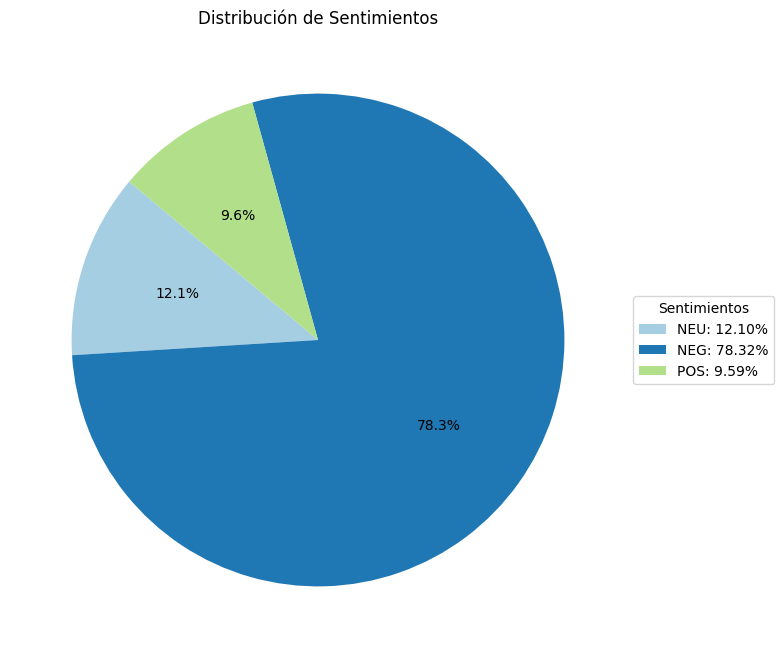

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
print("\nEjemplos de cada tipo de sentimiento:")
for sent_type, example in examples_per_sentiment.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento:
NEU: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", "@Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.", '-Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!', "NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg", '@ShimaTrek dijo que el acoso no es tan grave porque al menos no es violación ?????', '@Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza', 'le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra', 'Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.', '@SamuSG_ pues comemela', '— Yo s

--------------------------------------------


-----------------------------------------------

### Tweets de misogynous

-----------------------------------------------


In [40]:
text_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 1]["text"].tolist()]
results_sentiment_analysis_misogynous = [analyze_sentiment(text) for text in tqdm(text_misogynous)]

  0%|          | 0/1649 [00:00<?, ?it/s]


-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9078893661499023, 'NEU': 0.06718939542770386, 'POS': 0.024921180680394173}

-----------------------
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4504523277282715, 'NEU': 0.4847891926765442, 'POS': 0.06475842744112015}

-----------------------
Texto analizado: @Otb_35 Que te calles so guarra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8626130819320679, 'NEU': 0.09151365607976913, 'POS': 0.045873213559389114}

-----------------------
Texto analizado: L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05648927018046379, 'NEU'

  0%|          | 8/1649 [00:00<00:21, 76.74it/s]


-----------------------
Texto analizado: @ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.916369616985321, 'NEU': 0.06983033567667007, 'POS': 0.013800060376524925}

-----------------------
Texto analizado: -Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06344009935855865, 'NEU': 0.585135281085968, 'POS': 0.35142460465431213}

-----------------------
Texto analizado: @EdiiXI @lidiahdlgo Cállate tu !! Perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8163245916366577, 'NEU': 0.13307443261146545, 'POS': 0.050600990653038025}

-----------------------
Texto analizado: @JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585115313529968, 'NEU': 0.037302777171

  1%|          | 16/1649 [00:00<00:21, 75.67it/s]


-----------------------
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9288502335548401, 'NEU': 0.06359296292066574, 'POS': 0.007556865457445383}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9858217835426331, 'NEU': 0.010516910813748837, 'POS': 0.003661362687125802}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4746161997318268, 'NEU': 0.47439682483673096, 'POS': 0.050986986607313156}

-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16808286309242249, 'NEU': 

  1%|▏         | 24/1649 [00:00<00:22, 72.62it/s]


-----------------------
Texto analizado: @KilvettZ Cállate tú vende patria hijo de tu maldita perra madre q te trajo al mundo.. te hubieras ido con todo y placenta al infierno
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9557796120643616, 'NEU': 0.026691358536481857, 'POS': 0.01752898097038269}

-----------------------
Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8447861075401306, 'NEU': 0.14148864150047302, 'POS': 0.013725308701395988}

-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8637632727622986, 'NEU': 0.08438204973936081, 'POS': 0.05185466632246971}

-----------------------
Texto analizado: @palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9563637375831604, 'NEU': 0.03058379702270031, '

  2%|▏         | 32/1649 [00:00<00:22, 73.38it/s]


-----------------------
Texto analizado: @alaniscristalv Cállate, pa' interés cualquiera so perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7020704746246338, 'NEU': 0.25192657113075256, 'POS': 0.04600299149751663}

-----------------------
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6684296727180481, 'NEU': 0.26068124175071716, 'POS': 0.07088907063007355}

-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.368717759847641, 'NEU': 0.4763765037059784, 'POS': 0.1549057513475418}

-----------------------
Texto analizado: @Anita_Romi Cállate la puta boca challenge no eres una mierda de persona y si te draggean pues las cogemos y las matamos https://t.co/uZThUJRoPD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9351774454116821, 'NEU': 0.0463859960436821, 'POS': 0.01843656785786152}

-----------------------
Texto analizado:

  2%|▏         | 41/1649 [00:00<00:21, 75.86it/s]


-----------------------
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9161372780799866, 'NEU': 0.05894356966018677, 'POS': 0.024919157847762108}

-----------------------
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9737935066223145, 'NEU': 0.0173456110060215, 'POS': 0.008860894478857517}

-----------------------
Texto analizado: Exacto! #puralata #feminazis #HombreAbusado https://t.co/zTEvaftxcd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7872155904769897, 'NEU': 0.19706490635871887, 'POS': 0.01571951061487198}

-----------------------
Texto analizado: NO ES CULPA MIA UUUUO, LA ZORRA DE TU NOVIA QUIERE ARRANCAR, NO ES CULPA MIA, UUUUO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.679121196269989, 'NEU': 0.27136266231536865, 'POS': 0.04951614886522293}

------------------

  3%|▎         | 50/1649 [00:00<00:20, 77.83it/s]


-----------------------
Texto analizado: @Maridolvers Perra te lo merecías! 😎
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006785333156585693, 'NEU': 0.045512136071920395, 'POS': 0.9477024078369141}

-----------------------
Texto analizado: @MiaVasile Callate y mira como la perra muerte toda la alfombra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7831569314002991, 'NEU': 0.1843767911195755, 'POS': 0.032466258853673935}

-----------------------
Texto analizado: @KPLong4 @cuenta_C @A3Noticias que te calles la puta boca esa de sapo que tienes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9232162833213806, 'NEU': 0.05719004571437836, 'POS': 0.0195937417447567}

-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07483793795108795, 'NEU': 0.8620882034301758, 'POS': 0.06307382136583328}


  4%|▎         | 58/1649 [00:00<00:22, 71.79it/s]


-----------------------
Texto analizado: ¿Cuál es la peor desgracia para una mujer? Parir un varón, porque después de tener un cerebro dentro durante 9 meses, van y se lo sacan.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9788013100624084, 'NEU': 0.0184622835367918, 'POS': 0.0027364250272512436}

-----------------------
Texto analizado: @anaisbernal La Mariló Montero es una hija de puta machista!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9596990942955017, 'NEU': 0.028565937653183937, 'POS': 0.01173493079841137}

-----------------------
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.776976466178894, 'NEU': 0.18385392427444458, 'POS': 0.03916950151324272}

-----------------------
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insul

  4%|▍         | 67/1649 [00:00<00:21, 74.20it/s]


-----------------------
Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9213873744010925, 'NEU': 0.0730045959353447, 'POS': 0.00560810137540102}


  5%|▍         | 76/1649 [00:01<00:20, 77.23it/s]


-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9581945538520813, 'NEU': 0.03572329506278038, 'POS': 0.006082214880734682}

-----------------------
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7064740061759949, 'NEU': 0.27825722098350525, 'POS': 0.01526880543678999}

-----------------------
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8989278674125671, 'NEU': 0.08209698647260666, 'POS': 0.018975144252181053}

-----------------------
Texto analizado: @Laura99CM Ahora que me has faltado el respeto te lo puedo decir por fin: ¡A fregar puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7265499234199524, 'NEU': 0.15527354

  5%|▌         | 84/1649 [00:01<00:20, 77.20it/s]


-----------------------
Texto analizado: @Sucedaneosdesal @recap001 Pero cállate perra, que lo lo había visto xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5901942253112793, 'NEU': 0.3298962712287903, 'POS': 0.0799095407128334}


  6%|▌         | 93/1649 [00:01<00:19, 79.31it/s]


-----------------------
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5823129415512085, 'NEU': 0.35600167512893677, 'POS': 0.06168545410037041}

-----------------------
Texto analizado: @clarialvarez15 AH NO q hija d puta sos, mejor callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9425718784332275, 'NEU': 0.04353923350572586, 'POS': 0.013888882473111153}

-----------------------
Texto analizado: Estamos en un Estado de igualdad, no? Para cuando la escena de un hombre que diga, 'busco a una guarra para poder fornicar como un loco despechado hasta nuevo año'? No es esto una descarada y funesta forma de incitar el incorrectismo coyuntural y los falsos modales? https://t.co/MXq3X8JFrD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9578251838684082, 'NEU': 0.03845769539475441, 'POS': 0.0037171137519180775}

-----------------------
Texto analizado: Vuélvete una perra

  6%|▌         | 101/1649 [00:01<00:19, 78.48it/s]


-----------------------
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9574624300003052, 'NEU': 0.03062332235276699, 'POS': 0.01191417034715414}


  7%|▋         | 109/1649 [00:01<00:20, 74.14it/s]


-----------------------
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9602203369140625, 'NEU': 0.03062351793050766, 'POS': 0.009156161919236183}

-----------------------
Texto analizado: El problema con la violación y el acoso si son un problema cultural, que uno hable de machismo no quiere decir que uno hable de la santidad femenina. Hay mujeres machistas violadoras/acosadoras, las hay
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91664057970047, 'NEU': 0.07459652423858643, 'POS': 0.008762829937040806}

-----------------------
Texto analizado: @LaUnionAM800 No es mas imbécil porque no es mas alto... el y su guarra, par de analfabetos funcionales... instigadores y apologistas a la violencia...!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.973071277141571, 'NEU': 0.017111891880631447, 'POS': 0.009816871024668217}

-----------------------
Texto analizado: Enferma hija de mil puta y la concha 

  7%|▋         | 117/1649 [00:01<00:20, 73.25it/s]


-----------------------
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.808649480342865, 'NEU': 0.16764391958713531, 'POS': 0.02370663359761238}

-----------------------
Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8414950966835022, 'NEU': 0.13761894404888153, 'POS': 0.02088598906993866}

-----------------------
Texto analizado: @aguandradaa callate una vez q toy feliz lo quiero compartir china puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.675363302230835, 'NEU': 0.22244340181350708, 'POS': 0.10219330340623856}

-----------------------
Texto analizado: @PilarBenitoG Cállate perra tú no estuviste ahí
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8156177401542664, 'NEU': 0.1388441026210785, 'POS': 0.04553818330168724}

-----------------------


  8%|▊         | 126/1649 [00:01<00:20, 75.12it/s]


-----------------------
Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6686064004898071, 'NEU': 0.17443376779556274, 'POS': 0.1569598764181137}

-----------------------
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773386120796204, 'NEU': 0.0178231094032526, 'POS': 0.004838181659579277}

-----------------------
Texto analizado: @blessjuxtin @justinvoc4ls @ovoxola PORQUE ESTAS OPINANDO SIN SABER SU PUTA HISTORA CALLATE YA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505673050880432, 'NEU': 0.042783137410879135, 'POS': 0.006649510003626347}

-----------------------
Texto analizado: #WK12CL como hacen ganar a la pala Okada, Naito lo merecia. Puta q estoy enojado!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9012740254402161, 'NEU': 0.

  8%|▊         | 134/1649 [00:01<00:21, 71.83it/s]


-----------------------
Texto analizado: @CamiIa_CabeIIof Me olvidé un millón de cosas, pero bueno, tu novia es muy doris. TE AMO MUCHO, ZORRA. ME ENCANTAS DEMASIADO.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005890282336622477, 'NEU': 0.045713674277067184, 'POS': 0.9483959674835205}

-----------------------
Texto analizado: @laurandzukic @Castol0 Tu eres la novia de la otra zorra https://t.co/oMU8Wr955f
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5733421444892883, 'NEU': 0.3845090866088867, 'POS': 0.04214882850646973}

-----------------------
Texto analizado: Ay pero ojo el chabon se coge a una casada y es un crack y ella una zorra, no?? Imbécil https://t.co/C8NHuo7D8T
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8231175541877747, 'NEU': 0.11970672756433487, 'POS': 0.05717577040195465}

-----------------------
Texto analizado: @VidalSieteDiez Tú eres la perra, no te dejes engañar.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29229703545570374, 'NEU

  9%|▊         | 142/1649 [00:01<00:20, 73.99it/s]


-----------------------
Texto analizado: @VicxorAlt Tu eres una zorra ladrona no me diste mi cuenta del directo buuu pasado de jaime 🕳👓💢👓💤💨🕳💣❣💛❣💣💦💨💜❣💛❣💣💟🗯💭🗨🕳👓
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4736841917037964, 'NEU': 0.46905943751335144, 'POS': 0.05725640431046486}

-----------------------
Texto analizado: momento del día: vero y yo cogidos de la mano mientras me dice ''es que tú eres muy zorra''
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4921526610851288, 'NEU': 0.3442671000957489, 'POS': 0.16358017921447754}

-----------------------
Texto analizado: @GingerJoker25 Jajajaja que perra mi amiga, si a esas nos vamos tú eres 5to dan en putería
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3981744050979614, 'NEU': 0.46433407068252563, 'POS': 0.13749152421951294}

-----------------------
Texto analizado: mi novia es una puta merienda😍🤯😛💦
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.16834506392478943, 'NEU': 0.564239501953125, 'POS': 0.2674154341

  9%|▉         | 150/1649 [00:01<00:20, 74.88it/s]


-----------------------
Texto analizado: Es lo que se merecía la perra esa. https://t.co/fTgIlxbnRU
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7321685552597046, 'NEU': 0.12585699558258057, 'POS': 0.14197441935539246}

-----------------------
Texto analizado: Voy a hacer un compilado de videitos con todas las cosas que le digo a mi perra, eso les va a provocar multiples acv y van a morir todos. Que goma que soy la puta madre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9587376117706299, 'NEU': 0.033808186650276184, 'POS': 0.007454250939190388}

-----------------------
Texto analizado: @LuciaAvelino3 pero cállate vos perra (hoy no estoy creativo para putear)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.63422691822052, 'NEU': 0.31113773584365845, 'POS': 0.05463533475995064}

-----------------------
Texto analizado: 'te voy a enseñar política de una forma objetivCRISTINA ES UNA HIJA DE RE MIL PUTA'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.73367756605

 10%|▉         | 158/1649 [00:02<00:19, 76.17it/s]


-----------------------
Texto analizado: @AgosBlanco13 Te cabe, no te lo mereces por zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8843749165534973, 'NEU': 0.08533686399459839, 'POS': 0.030288247391581535}

-----------------------
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8877057433128357, 'NEU': 0.074875108897686, 'POS': 0.037419117987155914}

-----------------------
Texto analizado: Mentiras que se le dicen a una mujer: -Te quiero -Eres la unica en mi vida -Estaba con mis amigos -Sigue chupando que yo te aviso
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19024606049060822, 'NEU': 0.6159067749977112, 'POS': 0.19384713470935822}

-----------------------
Texto analizado: Y tu eres perra?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21980224549770355, 'NEU': 0.7261084318161011, 'POS': 0.05408933386206627}

-----------------------

 10%|█         | 166/1649 [00:02<00:19, 76.66it/s]


-----------------------
Texto analizado: La ven más perra que ellas y siempre están criticando. Estás mujeres que viven en competencia son una comedia. Ridículas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698871374130249, 'NEU': 0.022535232827067375, 'POS': 0.007577759679406881}

-----------------------
Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9149983525276184, 'NEU': 0.06432308256626129, 'POS': 0.020678628236055374}

-----------------------
Texto analizado: La chica es puta. El chico es un hijo de puta. Las putas nosotras siempre no? https://t.co/PfzLPx4SEU
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9071226716041565, 'NEU': 0.0762525200843811, 'POS': 0.016624784097075462}

-----------------------
Texto analizado: @AgusCussinolpda Jajajajaa y vos ? Cállate queres que ahora se acuerdan de mi perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8097107410430908, 'NEU': 0.1

 11%|█         | 174/1649 [00:02<00:19, 76.90it/s]


-----------------------
Texto analizado: zorra eres tu que no te sientes hombre y no entiendes que toda mujer es bella
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9641796946525574, 'NEU': 0.025564169511198997, 'POS': 0.010256153531372547}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.940351128578186, 'NEU': 0.04824630916118622, 'POS': 0.011402538046240807}

-----------------------
Texto analizado: @arisool__ JAJAJA QUE HIJA DE PUTA, canto hermoso callate
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.22200602293014526, 'NEU': 0.26121458411216736, 'POS': 0.5167793035507202}

-----------------------
Texto analizado: @SoleOchoa15 ammmmmmmm vos sabes que no me gusta nadie callate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8006290793418884, 'NEU': 0.1714096963405609, 'POS': 0.027961160987615585}

-----------------------
Texto analizado

 11%|█         | 182/1649 [00:02<00:19, 74.99it/s]


-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5026928782463074, 'NEU': 0.4195464849472046, 'POS': 0.07776058465242386}

-----------------------
Texto analizado: Cuando el coreano se pone caliente pero tu eres una perra fria mas fria que rusia gil culiao nomas https://t.co/qFF6eunZLt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9389687776565552, 'NEU': 0.052238184958696365, 'POS': 0.008793048560619354}

-----------------------
Texto analizado: CALLATE GUARRA https://t.co/sNQF9mdeyG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8665385842323303, 'NEU': 0.09950216859579086, 'POS': 0.033959243446588516}

-----------------------
Texto analizado: Alguien le quiere enseñar a mi perra a abrir/cerrar la puerta y ya que estamos poner llave!!! 😪
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7844076752662659, 'NEU': 0

 12%|█▏        | 191/1649 [00:02<00:18, 76.95it/s]


-----------------------
Texto analizado: @DeenisseMb Jeje callate perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33196836709976196, 'NEU': 0.5219295620918274, 'POS': 0.14610205590724945}

-----------------------
Texto analizado: @Paulaa_villamil Tú eres mi perra:(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8259412050247192, 'NEU': 0.14618806540966034, 'POS': 0.02787073701620102}

-----------------------
Texto analizado: @LeticiaDolera Zorra como lista, como al hombre se le dice zorro, sin restos de patriarcado. No debería de ofender. Si es como insulto. Es que son mongers
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7390763759613037, 'NEU': 0.2333948314189911, 'POS': 0.027528801932930946}

-----------------------
Texto analizado: Estamos en 2018 y una mujer es llamada puta, zorra, trola por tener muchos amigos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9596555233001709, 'NEU': 0.0365891233086586, 'POS': 0.0037553543224930763}

------------------

 12%|█▏        | 199/1649 [00:02<00:18, 77.23it/s]


-----------------------
Texto analizado: @lauraburrel missin pegarte en la cara con lonchas de queso vecina https://t.co/67PdyfJRFW
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4021766781806946, 'NEU': 0.5280101299285889, 'POS': 0.06981313973665237}

-----------------------
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5010544061660767, 'NEU': 0.35359129309654236, 'POS': 0.14535433053970337}

-----------------------
Texto analizado: @julianpineiro Callate, decís eso porque tu perra no llora porque ESTÁ CASI SORDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8435484766960144, 'NEU': 0.1366979479789734, 'POS': 0.019753582775592804}

-----------------------
Texto analizado: @IsabellaRugger1 @AndyIniesta28 Callate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7186667919158936, 'NEU': 0.20381268858909607, 'POS': 0.07752054929733276}

-----------------------
Texto analizado: @Va

 13%|█▎        | 207/1649 [00:02<00:19, 74.10it/s]


-----------------------
Texto analizado: @andreaacata cállate perra JAJAJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7233256697654724, 'NEU': 0.1883004903793335, 'POS': 0.0883738249540329}

-----------------------
Texto analizado: La chica es una zorra y una cabrona y el chico un gilipollas que se aclaren los dos porque el uno que se revela y la otra le toca los güebos #Pap399
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9599935412406921, 'NEU': 0.03493441641330719, 'POS': 0.005071969237178564}

-----------------------
Texto analizado: @CaraotaDigital Desde tocoron perra , tu eres culpable de esto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.755465567111969, 'NEU': 0.21923796832561493, 'POS': 0.025296414270997047}

-----------------------
Texto analizado: @pedrons97 Jajajaj si we tu eres bien perra chismosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6677713394165039, 'NEU': 0.23794199526309967, 'POS': 0.09428663551807404}

-------------------

 13%|█▎        | 215/1649 [00:02<00:22, 64.11it/s]


-----------------------
Texto analizado: @kanouted10S @kike57108578 Dice claramente mi novia es sevillista y es una puta más ... Evidentemente se refiere a las sevillistas como putas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7559120655059814, 'NEU': 0.21752838790416718, 'POS': 0.026559580117464066}

-----------------------
Texto analizado: @vikidonda Cállate Tilinga atorranta vergüenza da q x ser hija de puta,digo de montonera ocupes un cargo de diputada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9653789401054382, 'NEU': 0.02465505711734295, 'POS': 0.009965961799025536}

-----------------------
Texto analizado: Y tenes la cara para decir “se lo merecía” PERRA DEJAME NO DECIRTE LO QUE TE MERECES PORQUE NO ESTOY TRATANDO DE QUE ME SUSPENDAN. Y LUEGO, intentas venir por bts porque claro, por qué no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9341021180152893, 'NEU': 0.05928497761487961, 'POS': 0.006612830795347691}

-----------------------
Texto analizado: 

 13%|█▎        | 222/1649 [00:03<00:24, 59.01it/s]


-----------------------
Texto analizado: Mi perra es lo más insoportable del mundo chabon. QUIERO DORMIR CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9720869660377502, 'NEU': 0.021524813026189804, 'POS': 0.006388265639543533}

-----------------------
Texto analizado: -¿Que le compraste a tu mujer por San Valentín? -Un collar espectacular, y tu? -Nada, yo todavía la dejo suelta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.051094867289066315, 'NEU': 0.3843128979206085, 'POS': 0.5645922422409058}

-----------------------
Texto analizado: @_Brix__ @LopezNahulo Lo unico que vas a tener en tu culo es mi polla
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3161912262439728, 'NEU': 0.50616055727005, 'POS': 0.17764818668365479}

-----------------------
Texto analizado: Y tu eres perra ? Ladrame hau hau hau ... QUE PERRRRRRA MI AMIGAAAAAAAAAA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23896215856075287, 'NEU': 0.6655591726303101, 'POS': 0.0954786762595176

 14%|█▍        | 229/1649 [00:03<00:24, 57.72it/s]


-----------------------
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9272732734680176, 'NEU': 0.04966691881418228, 'POS': 0.023059917613863945}

-----------------------
Texto analizado: @Tatian57955424 Antes que con la polla dura, follarte con mis dedos a la vez que te mamo tu coño empapado....mmmmm👅👅💦💦💦
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1100323423743248, 'NEU': 0.7495419979095459, 'POS': 0.1404256373643875}

-----------------------
Texto analizado: Porque la reportera es Satanás? La zorra de la novia es 😑 https://t.co/NfgNX973WA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9141448140144348, 'NEU': 0.08294164389371872, 'POS': 0.0029135821387171745}

-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8949897289276123, 'NEU': 0.0729814693331

 14%|█▍        | 235/1649 [00:03<00:24, 56.71it/s]


-----------------------
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21642905473709106, 'NEU': 0.585538387298584, 'POS': 0.19803255796432495}

-----------------------
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9679951071739197, 'NEU': 0.02475493773818016, 'POS': 0.0072499788366258144}

-----------------------
Texto analizado: Que cuza antes la calle, una mujer inteligente o una tortuga vieja? Una tortuga vieja porque las mujeres inteligentes no existen ...
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1687951534986496, 'NEU': 0.7670522928237915, 'POS': 0.06415262818336487}

-----------------------
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5579385161399841, 'NEU': 0.24983035027980804, 'PO

 15%|█▍        | 241/1649 [00:03<00:24, 57.03it/s]


-----------------------
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26876917481422424, 'NEU': 0.6363379955291748, 'POS': 0.09489281475543976}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9642869830131531, 'NEU': 0.03193176910281181, 'POS': 0.0037812069058418274}

-----------------------
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.36756259202957153, 'NEU': 0.13684678077697754, 'POS': 0.4955906271934509}

-----------------------
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De su coño moreno, y todo por no mirar el puto estudio de la UNODC para Europa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9409448504447937, 'NEU': 0.05009

 15%|█▍        | 247/1649 [00:03<00:25, 55.33it/s]


-----------------------
Texto analizado: @santibarbagela1 Callate chapa la puta madre te voy a vomitar el farol
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543890357017517, 'NEU': 0.0321468748152256, 'POS': 0.013464177027344704}

-----------------------
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8959960341453552, 'NEU': 0.07578738778829575, 'POS': 0.028216563165187836}

-----------------------
Texto analizado: A personas: callate el osico puñetas A mi perra: ya callate la bocaaaa no estes ladrando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7862545251846313, 'NEU': 0.17156510055065155, 'POS': 0.04218028485774994}

-----------------------
Texto analizado: De mis punterías. Tu eres la puta mayor
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13126589357852936, 'NEU': 0.42797866463661194, 'POS': 0.4407554268836975}

-----------------------
Texto analizado: @PamSashaa JAJ

 15%|█▌        | 254/1649 [00:03<00:24, 56.72it/s]


-----------------------
Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2165760099887848, 'NEU': 0.6886022686958313, 'POS': 0.09482166916131973}

-----------------------
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8967172503471375, 'NEU': 0.08595040440559387, 'POS': 0.017332319170236588}


 16%|█▌        | 260/1649 [00:03<00:24, 56.48it/s]


-----------------------
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6975326538085938, 'NEU': 0.26241394877433777, 'POS': 0.04005339741706848}

-----------------------
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9765728116035461, 'NEU': 0.01860465295612812, 'POS': 0.004822576884180307}

-----------------------
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4394906759262085, 'NEU': 0.48893484473228455, 'POS': 0.07157442718744278}

-----------------------
Texto analizado: Para él tu eres la perra y según tú fue un caballero
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40306270122528076, 'NEU': 0.528949499130249, 'POS': 0.06798781454563141}

-----------------------
Texto analizado: @

 16%|█▌        | 266/1649 [00:03<00:24, 57.35it/s]


-----------------------
Texto analizado: @IrantzuVarela Por mujeres como tú nos podemos pasar por el coño las tontadas que dicen los machistas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.921138346195221, 'NEU': 0.06164124980568886, 'POS': 0.017220305278897285}

-----------------------
Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7726836800575256, 'NEU': 0.17155006527900696, 'POS': 0.055766236037015915}


 17%|█▋        | 273/1649 [00:03<00:23, 58.73it/s]


-----------------------
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22131019830703735, 'NEU': 0.5579191446304321, 'POS': 0.2207707017660141}

-----------------------
Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.904267430305481, 'NEU': 0.09066753834486008, 'POS': 0.00506490608677268}

-----------------------
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241175651550293, 'NEU': 0.04820195585489273, 'POS': 0.027680443599820137}

-----------------------
Texto analizado: Soy un hombre descompuesto cállate perra puta y déjame explicar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9363114237785339, 'NEU': 0.0564347468316555, 'POS': 0.0072

 17%|█▋        | 280/1649 [00:04<00:22, 59.63it/s]


-----------------------
Texto analizado: @uranioceIoso @iStar57_ Tú eres mi zorra favorita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.11263298988342285, 'NEU': 0.2954089641571045, 'POS': 0.5919579863548279}

-----------------------
Texto analizado: ¿por qué Dios hizo a las mujeres con los pies más pequeños? Para que puedan acercarse más al fregadero.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.46581050753593445, 'NEU': 0.440521240234375, 'POS': 0.09366831928491592}


 17%|█▋        | 287/1649 [00:04<00:22, 60.10it/s]


-----------------------
Texto analizado: Subiendo y bajando por mi polla, tu coño estrechito y jugoso, siempre apretado, haciendo una presión que me asfixia y me da placer, quiero correrme dentro de ti https://t.co/oe2JBGcr4Q
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03773423284292221, 'NEU': 0.1663968414068222, 'POS': 0.7958689332008362}

-----------------------
Texto analizado: @chrisgatico CALLATE YEGUA, MALDITA PERRA AHRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.868234395980835, 'NEU': 0.10012289881706238, 'POS': 0.03164269030094147}

-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013064815662801266, 'NEU': 0.05062765255570412, 'POS': 0.9363075494766235}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Sen

 18%|█▊        | 294/1649 [00:04<00:24, 56.08it/s]


-----------------------
Texto analizado: Sacas mi polla de tu coño y me acabas con tu mano, me tienes a mil y me corro de una forma brutal empapándote con mi leche que llega hasta tu cara, te encanta https://t.co/Sp6EYKUnHp
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.037603121250867844, 'NEU': 0.1091083362698555, 'POS': 0.8532885313034058}

-----------------------
Texto analizado: @juanfecid Soy pejezombie animal, si soy el lider de los pendejos y tu eres mi perra, eso que te hace a tí? 😂😂😂😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8516361713409424, 'NEU': 0.13760481774806976, 'POS': 0.010758972726762295}

-----------------------
Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8739762902259827, 'NEU': 0.11911693960428238, 'POS': 0.006906847935169935}

-----------------------
Texto analizado: @keyawnce @ma

 18%|█▊        | 300/1649 [00:04<00:24, 54.99it/s]


-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8532002568244934, 'NEU': 0.11250688135623932, 'POS': 0.0342928022146225}

-----------------------
Texto analizado: Una morra puso su foto de perfil donde sale bieeeeeen perra enseñando chicheee y nalga... Pero alvvvvvvvv las patas de hobitt que pedooooooooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7386233806610107, 'NEU': 0.1962948441505432, 'POS': 0.06508172303438187}

-----------------------
Texto analizado: Dice que las mujeres son lo mejor pero las trata de PERRA😕
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8904059529304504, 'NEU': 0.09463253617286682, 'POS': 0.014961504377424717}

-----------------------
Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8540135622024536, 'NEU': 0.11766543984413147, 'POS': 0.028321003541350365}

-----------------------
Texto analiza

 19%|█▊        | 306/1649 [00:04<00:24, 54.72it/s]


-----------------------
Texto analizado: ¿Ves que tu coño me importe? Cómete mi polla, basura https://t.co/ht02KyYWZh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9569329023361206, 'NEU': 0.03368039056658745, 'POS': 0.009386684745550156}

-----------------------
Texto analizado: toda la razón,tatita. Las mujeres son minoría (sucias perras) y el acoso es irrelevante (sucias feminazis) 🙄🤦 https://t.co/p73b0gasou
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066697955131531, 'NEU': 0.08865244686603546, 'POS': 0.004677786026149988}

-----------------------
Texto analizado: @quieromamarpene @calenton_madrid @Pito_maricon_ Vas a sentir como sé mueve mí polla en tú culo de putita para qué veas que tú amo no sé olvida nunca de darte tú ración de leche en ese maravilloso culo peludo de putita
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03458964452147484, 'NEU': 0.2551077902317047, 'POS': 0.7103025913238525}

-----------------------
Texto analizado: @erickorni0 Cállate 

 19%|█▉        | 312/1649 [00:04<00:26, 50.75it/s]


-----------------------
Texto analizado: @kiarafloor callate puta de mierda lo dijiste por mi pelotuda olor a culo cara de culo culo en los pies culo con cara concha de culo olor a culo te llama tu mama la culo sabes culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9062685966491699, 'NEU': 0.07725562900304794, 'POS': 0.016475778073072433}

-----------------------
Texto analizado: Siempre hay una amiga del novio que por más inocente que sea para uno de novia es la perra hijueputa, que stress prro.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9496288299560547, 'NEU': 0.04374554008245468, 'POS': 0.006625628098845482}

-----------------------
Texto analizado: @zvonimirsoldo @FOXSports_Chile No quería empezar el año puteando pero vo te mereces unas chuchas tonto sapo y la ctm rata perra culia :)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8260168433189392, 'NEU': 0.12461626529693604, 'POS': 0.049366869032382965}

-----------------------
Texto analizado: @fedevigev

 19%|█▉        | 318/1649 [00:04<00:26, 49.71it/s]


-----------------------
Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9310532212257385, 'NEU': 0.05365078151226044, 'POS': 0.015296057797968388}

-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295374751091003, 'NEU': 0.05297251418232918, 'POS': 0.017490064725279808}

-----------------------
Texto analizado: @pauvillarreal9 Callate cara d perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8498873114585876, 'NEU': 0.10297737270593643, 'POS': 0.04713531583547592}

-----------------------
Texto analizado: Yo el otro día vi que estaba leyendo junto a Aitana y soltó 'esta chica es un poco zorra no??' y me mosqueó la vd https://t.co/dusLohr3un
Sentimi

 20%|█▉        | 324/1649 [00:04<00:26, 49.89it/s]


-----------------------
Texto analizado: @suarezfeelings callate perra arrepentida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8322439789772034, 'NEU': 0.13000640273094177, 'POS': 0.03774969279766083}

-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7805432677268982, 'NEU': 0.19153013825416565, 'POS': 0.027926549315452576}

-----------------------
Texto analizado: Y tú eres la perra mayor, Hux. No te muerdas la lengua. —Rueda los ojos, colocándose aquel gorro y quitándole el polvo de encima, deteniéndose de golpe frente a el.— Y he acabado mi entrenamiento de hoy, así que, no. https://t.co/CM2pbnNCc4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13931256532669067, 'NEU': 0.5533021688461304, 'POS': 0.30738526582717896}

-----------------------
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas

 20%|██        | 330/1649 [00:05<00:26, 49.28it/s]


-----------------------
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9098818898200989, 'NEU': 0.07110379636287689, 'POS': 0.019014259800314903}

-----------------------
Texto analizado: @AdrianaGlezAl Tú eres tonta, no tienes ni puta idea de lo que mierdas estás diciendo, ojalá y se te enganche el pelo en un tornillo de las sillas típicas de intituto y sufras con cada tirón. Pero desde el cariño te lo digo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9827882647514343, 'NEU': 0.01391531340777874, 'POS': 0.0032964881975203753}

-----------------------
Texto analizado: @Miawrta no es culpa tuya, es culpa de esa escoria de persona y punto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9417787790298462, 'NEU': 0.04696432873606682, 'POS': 0.011256956495344639}

-----------------------
Texto analizado: @martii_belen10 hija de puta cállate te vas a un crucero deja de quejarte
Sentimiento detectado: NEG
Proba

 20%|██        | 338/1649 [00:05<00:23, 56.27it/s]


-----------------------
Texto analizado: @AngelZanella CÁLLATE NADIE TE PREGUNTO, PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7945616841316223, 'NEU': 0.16251793503761292, 'POS': 0.04292038455605507}

-----------------------
Texto analizado: Y tú eres una PUTA ZORRA #feminazi de las cuales deberían avergonzarse (y muchas ya lo hacen) las MUJERES https://t.co/HOKJW1uCCj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750288724899292, 'NEU': 0.019548173993825912, 'POS': 0.005422987975180149}

-----------------------
Texto analizado: Aún tengo mis dudas porque dicen que un hombre es puto por estar con hombres, entonces, ¿una mujer es puta por estar con mujeres?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.740298867225647, 'NEU': 0.24997815489768982, 'POS': 0.009722881950438023}

-----------------------
Texto analizado: @alvaroflaherty1 Vos callate que tu perra rompe vasos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8777562975883484, 'NEU': 0.10532457

 21%|██        | 346/1649 [00:05<00:20, 62.33it/s]


-----------------------
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8840914368629456, 'NEU': 0.1070912554860115, 'POS': 0.008817351423203945}

-----------------------
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6750751733779907, 'NEU': 0.28756314516067505, 'POS': 0.037361785769462585}

-----------------------
Texto analizado: @__Irenelazaro26 Pero porque tu eres una perra con el corazón de hielo, a mi me gusta el cariño humano 🙆
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009809927083551884, 'NEU': 0.2090710699558258, 'POS': 0.7811189889907837}

-----------------------
Texto analizado: @marita_hidalgo CALLATE VOS PUTA DE MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9043291807174683, 'NEU': 0.06460950523614883, 'POS': 0.031061317771673203}

---------

 21%|██▏       | 354/1649 [00:05<00:19, 65.89it/s]


-----------------------
Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585657119750977, 'NEU': 0.030586320906877518, 'POS': 0.010848037898540497}

-----------------------
Texto analizado: @TopisimaYo @PadreJosePalmar CALLATE perra muérete de hambre !!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9018726348876953, 'NEU': 0.07423509657382965, 'POS': 0.023892147466540337}

-----------------------
Texto analizado: @AlejoParSw Que rica esta yo si quisiera comemela
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03816081956028938, 'NEU': 0.12182741612195969, 'POS': 0.8400117754936218}

-----------------------
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9008587002754211, 'NEU': 0.06298128515481949, 'POS': 0.03615991026163101}

-----------------------
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela


 22%|██▏       | 363/1649 [00:05<00:18, 70.74it/s]


-----------------------
Texto analizado: Ritmo alto para follarte, no parar hasta sentir los espasmos de tu coño apretando mi polla, tu cara de sexo me anima a darte más fuerte, más profundo, me dices que te reviente, lo haré https://t.co/AFvnGJG6rf
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.023904675617814064, 'NEU': 0.24070696532726288, 'POS': 0.7353883385658264}

-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2347157597541809, 'NEU': 0.5667997598648071, 'POS': 0.19848445057868958}

-----------------------
Texto analizado: @Ibi_hotmidori por que no me los muestras, me gustaria poder meter mi polla en tu culo y tu concha
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20798325538635254, 'NEU': 0.5547734498977661, 'POS': 0.23724326491355896}

-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Sentimiento detectado: NEG

 22%|██▏       | 371/1649 [00:05<00:18, 70.35it/s]


-----------------------
Texto analizado: @Franciscodagst no veo la correa de perra para que te traten como mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.48259237408638, 'NEU': 0.4171956181526184, 'POS': 0.10021204501390457}

-----------------------
Texto analizado: @MiguelHerreraDT pinche gordo mediocre vete a la mierda junto a tu perra hija gorda eso y más te mereces, tu con tus decisiones insultas más a la verdadera afición
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749945998191833, 'NEU': 0.015237022191286087, 'POS': 0.009768318384885788}

-----------------------
Texto analizado: @DaianaCostas_ Callate dijeeeeee! Sos alta perra y punto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5472012162208557, 'NEU': 0.2752385437488556, 'POS': 0.17756018042564392}

-----------------------
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Sentimiento detectado: NEG
Probabilidades: {'NE

 23%|██▎       | 379/1649 [00:05<00:17, 71.13it/s]


-----------------------
Texto analizado: @bbongiov Ay pero si sos la mas perra callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5047848224639893, 'NEU': 0.2542489469051361, 'POS': 0.24096621572971344}

-----------------------
Texto analizado: @mendezr_agus jajajajajajaja perra te lo merecías
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.049376823008060455, 'NEU': 0.08258580416440964, 'POS': 0.8680373430252075}

-----------------------
Texto analizado: @Agstinaramos5 Cállate, vos porque ya estás casada maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9181890487670898, 'NEU': 0.06562986224889755, 'POS': 0.016181115061044693}

-----------------------
Texto analizado: ¿Que por qué me encanta @mermise ? Pues porque es la puta ama, ahora cállate q me tienes hasta el kiwi.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.382257342338562, 'NEU': 0.10651207715272903, 'POS': 0.5112305879592896}

-----------------------
Texto analizado: Aborto de ardilla 

 23%|██▎       | 387/1649 [00:05<00:17, 72.29it/s]


-----------------------
Texto analizado: @medelcami01 Tu eres mi perra cierto
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14648433029651642, 'NEU': 0.4653898775577545, 'POS': 0.3881257176399231}

-----------------------
Texto analizado: sé mi dopamina.. dejame drogarme en tu coño y follarte en la cocina..
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.10086657851934433, 'NEU': 0.7118635177612305, 'POS': 0.1872698962688446}

-----------------------
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955145001411438, 'NEU': 0.03674912080168724, 'POS': 0.008105885237455368}

-----------------------
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y secuen

 24%|██▍       | 395/1649 [00:05<00:16, 74.15it/s]


-----------------------
Texto analizado: TE LO MERECES POR PERRA. —Lo arrastra por la academia de las greñas y le da unos chanclazos. https://t.co/9GwmLte4BU
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09548245370388031, 'NEU': 0.2393469661474228, 'POS': 0.6651705503463745}

-----------------------
Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que hace frío. PD. Te extraño.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8403772711753845, 'NEU': 0.12924212217330933, 'POS': 0.03038063831627369}

-----------------------
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561757445335388, 'NEU': 0.036264363676309586, 'POS': 0.0075599877163767815

 24%|██▍       | 403/1649 [00:06<00:16, 75.11it/s]


-----------------------
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33429840207099915, 'NEU': 0.47863292694091797, 'POS': 0.18706870079040527}

-----------------------
Texto analizado: Pasear a la perra en tacones es #glamour y el resto son tonterías
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.037361640483140945, 'NEU': 0.1605120748281479, 'POS': 0.8021262288093567}

-----------------------
Texto analizado: @LoreniaCarr Cállate perra si todas tus conversaciones son spanglish 😂😂😂 te evitarias las correcciones a español 🙄
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7120856046676636, 'NEU': 0.2729978859424591, 'POS': 0.014916427433490753}

-----------------------
Texto analizado: ¿Qué hacer para que a una mujer le brillen los ojos? Ponerle una linterna en la oreja. #SinCerebro #SinDerechos #SinPolla
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31974202394485474, 'NEU': 0.6265926361083984, 'POS': 

 25%|██▍       | 412/1649 [00:06<00:16, 77.22it/s]


-----------------------
Texto analizado: Esto me ha llamado gilipollas. Tu eres una guarra, pero eh, sin acritud https://t.co/6XwgZu20wn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8349067568778992, 'NEU': 0.1340819150209427, 'POS': 0.031011376529932022}

-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210241436958313, 'NEU': 0.05961218103766441, 'POS': 0.0193636454641819}

-----------------------
Texto analizado: @bebesymas Pelotuda deberiar juzgarte x abandononde persona. Hija de puta no mereces tener hijos. Ojala sigas siendo una gorda pedorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9682162404060364, 'NEU': 0.02279830351471901, 'POS': 0.008985521271824837}

-----------------------
Texto analizado: Se acaba de reir jijiji CALLATE PERRA ME ESTRESAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9466886520385742, 'NEU': 0.04272572323679924, 'POS': 0.01058

 26%|██▌       | 421/1649 [00:06<00:15, 78.52it/s]


-----------------------
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1562548726797104, 'NEU': 0.6719143986701965, 'POS': 0.17183077335357666}

-----------------------
Texto analizado: Es como 'maldita sea cállate ese maldito hocico perra de mierda' https://t.co/cdca5TXBnk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9177719354629517, 'NEU': 0.06801161915063858, 'POS': 0.014216451905667782}

-----------------------
Texto analizado: @mariogigasanche Tu eres mi perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09123677015304565, 'NEU': 0.40012282133102417, 'POS': 0.508640468120575}

-----------------------
Texto analizado: @alejandrapl12 @manuelzr Perra muerta de hambre vos cállate ese ladro de juanrobando no es el presidente de honduras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913404643535614, 'NEU': 0.06750731

 26%|██▌       | 430/1649 [00:06<00:15, 79.73it/s]


-----------------------
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9518279433250427, 'NEU': 0.036734819412231445, 'POS': 0.011437248438596725}

-----------------------
Texto analizado: @PaolaruizR02 @mery_1502 Lo mereces pero quedando con nosotras perra mala
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7322735786437988, 'NEU': 0.20509199798107147, 'POS': 0.06263446807861328}

-----------------------
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.011568385176360607, 'NEU': 0.04989520087838173, 'POS': 0.9385363459587097}

-----------------------
Texto analizado: @marbellalga ESA PERRA NO LO MERECÍA 😭😭😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6358568668365479, 'NEU': 0.33516788482666016, 'POS': 0.02897524274885654

 27%|██▋       | 438/1649 [00:06<00:15, 78.19it/s]


-----------------------
Texto analizado: @TowandaRebels Das asco, eres una escoria humana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707105755805969, 'NEU': 0.01686652936041355, 'POS': 0.012422848492860794}

-----------------------
Texto analizado: Porque andan llamando gata, zorra o puta a baekhyun si es hombre, manga de ridiculas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9259016513824463, 'NEU': 0.06147538498044014, 'POS': 0.012622903101146221}

-----------------------
Texto analizado: Perdón Chofi pero a mi me diste a entender que la mujer es una perra ajajajajajjajajajaja https://t.co/0T6sKarW9Z
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7045683860778809, 'NEU': 0.2688121497631073, 'POS': 0.026619460433721542}

-----------------------
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14343224465847015, 'NEU': 

 27%|██▋       | 446/1649 [00:06<00:15, 75.68it/s]


-----------------------
Texto analizado: @shachuasg @katyperry Cagado! La mujer es perra perra perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3118200898170471, 'NEU': 0.47285130620002747, 'POS': 0.2153286188840866}

-----------------------
Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4908830523490906, 'NEU': 0.4579756259918213, 'POS': 0.05114132910966873}

-----------------------
Texto analizado: @lortegadiaz Perra maldita tú eres la primera en la@hoguera por crímenes de lesa humanidad perra maldita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9197247624397278, 'NEU': 0.054584674537181854, 'POS': 0.025690527632832527}

-----------------------
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8323042392730713, 'NEU': 0.1476062685251236, 'POS': 0.020089447498321533}

-----------------------
Texto analizado: @iduvina Zorra terrori

 28%|██▊       | 454/1649 [00:06<00:16, 73.04it/s]


-----------------------
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1656801849603653, 'NEU': 0.22293278574943542, 'POS': 0.6113870143890381}

-----------------------
Texto analizado: ¿Qué hace una mujer trepando una pared de vidrio? Quiere ver que hay al otro lado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5139923095703125, 'NEU': 0.46394285559654236, 'POS': 0.02206486463546753}

-----------------------
Texto analizado: Créeme, yo estudio Veterinaria y tu eres una perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3897930383682251, 'NEU': 0.4881141185760498, 'POS': 0.12209286540746689}

-----------------------
Texto analizado: @Antodaianna ay sí, cuando encima estás así y te dicen 'ay te pusiste colorada' jaja la puta madre callateee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9407970905303955, 'NEU': 0.04928021878004074, 'POS': 0.009922654367983341}

------

 28%|██▊       | 462/1649 [00:06<00:16, 72.76it/s]


-----------------------
Texto analizado: Porque a los niños, cuando su novia es cabrona y perra las traen como reynas y cuando los tratan biek y bonito son unos cabrones de la mierda. No entiendo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644116759300232, 'NEU': 0.029170531779527664, 'POS': 0.006417777389287949}

-----------------------
Texto analizado: @Barbijaputa Pues sí. Debe ser que en el mundo-mierda de este gilipollas ser puta es un insulto. Seguro que él es un putero baboso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648791551589966, 'NEU': 0.030487198382616043, 'POS': 0.004633696749806404}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y otras ciertas personas que conocemos jeje, lo puse por cosas que me han pasado y ahora finalmente me han hecho pensar así, mejor ve a joder a tu minion fav ok, d antemano grax
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9268457889556885, 'NEU': 0.06225724145770073, 'P

 29%|██▊       | 470/1649 [00:06<00:15, 74.23it/s]


-----------------------
Texto analizado: @fjac1980 Jajaja picado de que si tu eres la zorra que vive pendiente de Herrera, comenzaste el año acordandote de el
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8972525596618652, 'NEU': 0.09019163250923157, 'POS': 0.012555820867419243}

-----------------------
Texto analizado: COMO PUTA MADRE ME EMPERRAN ESAS PUTAS DE INSTAGRAM QUE CON 1,000 FOLLOWERS Y POR ENSEÑAR EL CULO SE AUTOPROCLAMAN FIGURAS PÚBLICAS, PINCHES PERRAS SIN AMOR LAS ODIO PUTAS PENDEJAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9819930791854858, 'NEU': 0.013051456771790981, 'POS': 0.0049555180594325066}

-----------------------
Texto analizado: @spacetrao Callate CTM hijo de la perra caliente 😎
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3848286271095276, 'NEU': 0.405313104391098, 'POS': 0.20985831320285797}

-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Sentimiento detectado: NEG
Probabilidades

 29%|██▉       | 478/1649 [00:07<00:15, 75.55it/s]


-----------------------
Texto analizado: @prssrx primero, yo no he visto aun a un hombre decirle gorda o que asco de estrias tapate etc.+
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8304787874221802, 'NEU': 0.15688589215278625, 'POS': 0.012635367922484875}

-----------------------
Texto analizado: @Dana__51 Que te calles puta parguela xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8525808453559875, 'NEU': 0.10174395143985748, 'POS': 0.045675162225961685}

-----------------------
Texto analizado: JAJAJAJAJA zorra sos vos mi amor, por teclado somos todas malas eh pero en la cara nunca nada vos, RIDÍCULA😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8536453247070312, 'NEU': 0.10793249309062958, 'POS': 0.038422148674726486}

-----------------------
Texto analizado: @Mica_Quiroga1 Que puta de mierda sos. Ni un Gracias mereces 😂♥️♥️♥️♥️♥️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8149241209030151, 'NEU': 0.15279525518417358, 'POS': 0.03228060528635979}



 29%|██▉       | 486/1649 [00:07<00:15, 74.87it/s]


-----------------------
Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5850354433059692, 'NEU': 0.31029796600341797, 'POS': 0.10466663539409637}

-----------------------
Texto analizado: Por las mujeres tienen cuatro neuronas??? Una para cada fogon
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.770559549331665, 'NEU': 0.21695750951766968, 'POS': 0.01248295046389103}

-----------------------
Texto analizado: Si eres de los que piensas que una mujer es una mala puta por pensar diferente a ti Vota a ERC PdCAT o CUP
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9394111633300781, 'NEU': 0.053590696305036545, 'POS': 0.006998178083449602}

-----------------------
Texto analizado: -Hijo ese videojuego te está haciendo violento - ¡CÁLLATE LA BOCA PERRA DESGRACIADA, TÚ MERECES MORIR!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9646060466766357, 'NEU': 0.02879060059785843, 'POS': 0.006603324320167303}

------------------

 30%|███       | 495/1649 [00:07<00:15, 76.71it/s]


-----------------------
Texto analizado: ¿De qué murió Cenicienta? De que a las doce el tampax se le convirtió en calabaza.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7217453122138977, 'NEU': 0.2682149410247803, 'POS': 0.01003976259380579}

-----------------------
Texto analizado: @Hitler__Braun Busca por diccionario. Q es lo siguiente después de guapa? Exacto, guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5257365107536316, 'NEU': 0.44585704803466797, 'POS': 0.028406374156475067}

-----------------------
Texto analizado: @Pushsy_Herem @April_Gamer *.* me podes enseñar de como miércoles dibujas tan bien? Enseñame chamaca perra Ahre esta emosho uwu
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06480229645967484, 'NEU': 0.29716256260871887, 'POS': 0.6380351781845093}

-----------------------
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2345880419

 31%|███       | 503/1649 [00:07<00:14, 77.50it/s]


-----------------------
Texto analizado: @danielanatt Callate que ni me contestaste, ahora te voy a ignorar puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9537551999092102, 'NEU': 0.037262700498104095, 'POS': 0.008982102386653423}

-----------------------
Texto analizado: @rondaxrush JAJAJAJAJJAJAJAJJAA maldita perra,no mereces vivir https://t.co/xnCJ0oCkDH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007831811904907, 'NEU': 0.07753002643585205, 'POS': 0.021686773747205734}

-----------------------
Texto analizado: @PuTitaTrevi Que rica te ves perra, pero te verias mejor enseñando esa puchita rica bien mojada
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024578217417001724, 'NEU': 0.09409668296575546, 'POS': 0.8813250660896301}

-----------------------
Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo no busco ser juguetona ^^ https://t.co/k8D4HmBwzb
Sentimiento d

 31%|███       | 511/1649 [00:07<00:14, 78.09it/s]


-----------------------
Texto analizado: @MichuHeredia Y dsps aprobas mejor cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8478369116783142, 'NEU': 0.12398245185613632, 'POS': 0.028180651366710663}

-----------------------
Texto analizado: Hija de mil puta. Te mereces morir en la cárcel. En qué cabeza cabe quitarle la vida a una persona. En qué sociedad de mierda vivimos!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.962462306022644, 'NEU': 0.026892803609371185, 'POS': 0.010644874535501003}

-----------------------
Texto analizado: @SenoraletiLeti @pollaprecoz1 Callate y aprieta esas naglotas tuyas perra blanca~
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7511909008026123, 'NEU': 0.20277409255504608, 'POS': 0.046035077422857285}

-----------------------
Texto analizado: 98167. Tu eres una perra maldita sin corazón JAJAJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8531568646430969, 'NEU': 0.12345123291015625, 'POS': 0.023391824215

 32%|███▏      | 520/1649 [00:07<00:14, 77.94it/s]


-----------------------
Texto analizado: @mignonescabio zorra hija de puta no mereces bibir!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604478478431702, 'NEU': 0.026091821491718292, 'POS': 0.013460321351885796}

-----------------------
Texto analizado: @RicarditoZL Cállate perra que fue pura suerte 😭😭😭😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5934619903564453, 'NEU': 0.371611624956131, 'POS': 0.034926362335681915}

-----------------------
Texto analizado: ¿Por que las mujeres se casan de blanco? Para hacer juego con el refrigerador, la cocina y la lavadora. #Humor
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2272200733423233, 'NEU': 0.7229079008102417, 'POS': 0.049872010946273804}

-----------------------
Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.897190272808075, 'NEU': 0.081831112504005

 32%|███▏      | 528/1649 [00:07<00:14, 77.03it/s]


-----------------------
Texto analizado: Y la perra que quiera hablar de mi que venga y me lo diga en la cara que la escupo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7542939782142639, 'NEU': 0.2196037918329239, 'POS': 0.02610224112868309}

-----------------------
Texto analizado: -¿Dónde vas con esas rodilleras nena? -A una entrevista de trabajo -Ah, entiendo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2497897744178772, 'NEU': 0.6826090216636658, 'POS': 0.0676012709736824}

-----------------------
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido mmm. Me encanta llenar tu coño de mi leche espesa mi perra en celo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013280019164085388, 'NEU': 0.057412128895521164, 'POS': 0.9293078184127808}

-----------------------
Texto analizado: Pero: -Todas son unas guarras. -Todas son unas putas. -Las mujeres a la cocina jaj -Las mujeres son el sexo débil Vete a llorar a tu jodida casa, trozomierda. https://t.co

 33%|███▎      | 536/1649 [00:07<00:15, 73.65it/s]


-----------------------
Texto analizado: Eres una perra patética. Tu coño apesta y tu cabeza es wack. Estás enojado porque le diste la cabeza y te dejó perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9792768359184265, 'NEU': 0.015898393467068672, 'POS': 0.004824715666472912}

-----------------------
Texto analizado: @_PrayForMell_ Vete a la mierda Igual te voy a vender hija de la gran perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9439820647239685, 'NEU': 0.04320830479264259, 'POS': 0.01280952524393797}

-----------------------
Texto analizado: @Javier_mg10 @sergio_gnzlz Callate puta, no te metas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7473562359809875, 'NEU': 0.196572408080101, 'POS': 0.05607139319181442}

-----------------------
Texto analizado: @rU_1970 muestra como teni esa vagina de puta caliente llena de moco wacha culia hija de la perra traga semen 146:146
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6831334829330444, 'NEU': 0.2329506

 33%|███▎      | 545/1649 [00:07<00:14, 74.94it/s]


-----------------------
Texto analizado: Yo creía que lo de llamar guarras a las tías por enseñar de su cuerpo lo que le salga del coño estaba superao
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9004029631614685, 'NEU': 0.08734987676143646, 'POS': 0.01224710326641798}

-----------------------
Texto analizado: @LulyDobbler_ Tu calla que tu coño tiene hasta aparcacoches de lo guarra que eres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.909388542175293, 'NEU': 0.07673116028308868, 'POS': 0.013880297541618347}

-----------------------
Texto analizado: @Adritanke Que te calles sucia perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8311331868171692, 'NEU': 0.11386866122484207, 'POS': 0.054998163133859634}

-----------------------
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624042510986328, 'NEU': 0.0306

 34%|███▎      | 553/1649 [00:07<00:14, 75.88it/s]


-----------------------
Texto analizado: @ValentinaaCruz Puteria y perico también somos almas gemelas excepto que tu eres puta desde él vientre.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08369887620210648, 'NEU': 0.6236451864242554, 'POS': 0.29265594482421875}

-----------------------
Texto analizado: -¿Que le falta a una Mujer para ser perfecta? -todo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.323995441198349, 'NEU': 0.5050963163375854, 'POS': 0.17090822756290436}

-----------------------
Texto analizado: Esta hija de perra no sabe lo que es salir verdaderamente MAL en una foto https://t.co/ALx6ERybYf
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801393747329712, 'NEU': 0.015601636841893196, 'POS': 0.004258962348103523}

-----------------------
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9

 34%|███▍      | 561/1649 [00:08<00:14, 75.78it/s]


-----------------------
Texto analizado: @UnicornHappy13 CALLATE PERRA!! :'v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9107090830802917, 'NEU': 0.07037726789712906, 'POS': 0.018913688138127327}

-----------------------
Texto analizado: @timethyheller Kyc el ocico Si es ridiculo pero te lo mereces pinche zorra >:D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5452778339385986, 'NEU': 0.1698337346315384, 'POS': 0.2848884165287018}

-----------------------
Texto analizado: @Barbijaputa bloquea a usuarios que le llaman PUTA. Él puede llamar puta a su madre pero nadie puede llamarle puta a él. https://t.co/GK5924mOnz
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8172499537467957, 'NEU': 0.1575431078672409, 'POS': 0.025206953287124634}

-----------------------
Texto analizado: @cesaran86321265 Callate porque tengo evidencia para destruirte perra sucia y traidora
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9483888149261475, 'NEU': 0.04072802513837814, 'POS':

 35%|███▍      | 569/1649 [00:08<00:14, 75.84it/s]


-----------------------
Texto analizado: 10 mejores libros del año, 10 mejores películas, 10 mejores que te calles de una puta vez.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3776143491268158, 'NEU': 0.389446884393692, 'POS': 0.232938751578331}

-----------------------
Texto analizado: Voy a enseñarle a mi perra a hacer esto para que me las sujete. https://t.co/MU3htiMYRu
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0701104998588562, 'NEU': 0.7209056615829468, 'POS': 0.20898383855819702}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512035250663757, 'NEU': 0.04330623522400856, 'POS': 0.005490184761583805}

-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14082276821136475, 'NEU'

 35%|███▍      | 577/1649 [00:08<00:14, 76.55it/s]


-----------------------
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺️☺️pero tú eres mi vida *tijerazo*
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7615742683410645, 'NEU': 0.1621972918510437, 'POS': 0.07622845470905304}

-----------------------
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty Rails ‘conmigo’ 🤨
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36277294158935547, 'NEU': 0.6027690768241882, 'POS': 0.03445794805884361}

-----------------------
Texto analizado: @FabSopee la perra y pega cuernos del grupo @JeonYumii la callada pero peligrosa @NakamotoNanii le vale verga y rompe corazones https://t.co/KcNU6wPoVu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7735328674316406, 'NEU': 0.19527925550937653, 'POS': 0.03118790127336979}

-----------------------
Texto analizado: El ser humano es una vida inteligente, salvo la excepción que tiene la regla.
Sentimiento detectado: NEU
Probabilidades: {

 35%|███▌      | 585/1649 [00:08<00:13, 76.73it/s]


-----------------------
Texto analizado: Esta mujer es una perra de mierda yo le saco la cucha a ella la maraca culia https://t.co/QPdiKGAJcE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9523009061813354, 'NEU': 0.03684881329536438, 'POS': 0.010850287973880768}

-----------------------
Texto analizado: @ReSidentG1RL @BlendFreshon Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9506604671478271, 'NEU': 0.0339696891605854, 'POS': 0.015369871631264687}

-----------------------
Texto analizado: @laurg46 @mxnicagb1997 @WaitaSR @NatuLoveYou Mereces la muerte zorra JAJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7149176001548767, 'NEU': 0.21328985691070557, 'POS': 0.07179252058267593}

-----------------------
Texto analizado: No puedo

 36%|███▌      | 593/1649 [00:08<00:14, 74.20it/s]


-----------------------
Texto analizado: 'Los huracanes con nombre de mujer son más letales' https://t.co/Wql6F2Em2U
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.18792188167572021, 'NEU': 0.5870747566223145, 'POS': 0.22500334680080414}

-----------------------
Texto analizado: @Asleerr @MIAREsproject callate la puta boca y vete a una biblioteca buscas una seccion donde haya feminismo y te quedas callado y lees y dejas de soltar gilipolleces comparable a la tierra es plana en cuanto a retroceso en los debates
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9540295004844666, 'NEU': 0.03935805708169937, 'POS': 0.006612409837543964}

-----------------------
Texto analizado: @AlvaroUribeVel Pa’ pegarte en la cara MARICA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7254419922828674, 'NEU': 0.20655104517936707, 'POS': 0.06800688058137894}

-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 

 36%|███▋      | 601/1649 [00:08<00:14, 74.00it/s]


-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9634494781494141, 'NEU': 0.028455879539251328, 'POS': 0.008094617165625095}

-----------------------
Texto analizado: Mi mejor amiga me defendió sin agredirle verbalmente, él respondió con comentarios del estilo 'Callate, puta guarra zorra asquerosa'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7385678887367249, 'NEU': 0.222282275557518, 'POS': 0.03914990648627281}

-----------------------
Texto analizado: @obseno1 @RosaLaConejita Mmmmm la mas tetona y puta de Mexico, pinche puta tan buena . Mmmm te mereces k te usan, abusan en la cama, y te cogen como la puta k eres, mmmm mama una verga puta💵🍆😉😘
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8213555216789246, 'NEU': 0.13063885271549225, 'POS': 0.04800564795732498}

-----------------------
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Sentimiento det

 37%|███▋      | 609/1649 [00:08<00:14, 72.03it/s]


-----------------------
Texto analizado: Sólo escuchar hablar a este tipo ME ENCABRONA LA VIDA, PUTA CÁLLATE! :)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9750083088874817, 'NEU': 0.019362645223736763, 'POS': 0.005629042629152536}

-----------------------
Texto analizado: -¿Porque los gallos no tienen manos? -Porque las gallinas no tienen tetas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6647075414657593, 'NEU': 0.29519617557525635, 'POS': 0.04009628668427467}

-----------------------
Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02249917946755886, 'NEU': 0.0714537724852562, 'POS': 0.9060471057891846}

-----------------------
Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX

 37%|███▋      | 617/1649 [00:08<00:13, 73.83it/s]


-----------------------
Texto analizado: @freechipsy ESA MUJER ES UNA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9273520708084106, 'NEU': 0.05674603953957558, 'POS': 0.015901952981948853}

-----------------------
Texto analizado: @IhyAlex_ @xxxeyeless Hasmelo a mi el es mi perra le estoy enseñando apenas pvp
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04198165237903595, 'NEU': 0.8554097414016724, 'POS': 0.10260862112045288}

-----------------------
Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5343642234802246, 'NEU': 0.4245343804359436, 'POS': 0.04110134765505791}

-----------------------
Texto analizado: Con mis manos en tu culo sintiendo el recorrido de mi polla dentro de ti, despacio entrando y saliendo, mis venas s… https://t.co/exS

 38%|███▊      | 625/1649 [00:08<00:13, 74.35it/s]


-----------------------
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9207757711410522, 'NEU': 0.07207616418600082, 'POS': 0.00714810099452734}

-----------------------
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8926344513893127, 'NEU': 0.09057497978210449, 'POS': 0.016790546476840973}

-----------------------
Texto analizado: La puta madre se lo merecían tanto https://t.co/PRM9Fv2lfp
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.07316752523183823, 'NEU': 0.06744743883609772, 'POS': 0.859385073184967}

-----------------------
Texto analizado: Pero esta mujer es una puta crack! No ha dado señales de que viajase a Melbourne, siempre ponía que estaba en Sydney 😂😂 que cabrona! https://t.co/gHg31HQ6BL
Sen

 38%|███▊      | 633/1649 [00:09<00:13, 75.46it/s]


-----------------------
Texto analizado: Esto es posesión, machismo, acoso, violación a la intimidad de la persona, y nadie cae en la cuenta que están así por “un cariño” que acaba siendo una tortura. https://t.co/owf0retc4c
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9768145680427551, 'NEU': 0.019584309309720993, 'POS': 0.0036011021584272385}

-----------------------
Texto analizado: @abril9979 Cállate pelotuda imbécil si sos hermosa la próxima te pego te amo bye
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5913787484169006, 'NEU': 0.2062690556049347, 'POS': 0.20235216617584229}

-----------------------
Texto analizado: Las feministas hablan de acoso contra darthes pero lo defiende flor vigna y es una tarada imbécil pelotuda esa coherencia no te la robo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479146003723145, 'NEU': 0.04085860773921013, 'POS': 0.011226852424442768}

-----------------------
Texto analizado: -Te mereces un Oscar por Puta😏 -¿Que? ¿Cuál Ósc

 39%|███▉      | 641/1649 [00:09<00:13, 76.05it/s]


-----------------------
Texto analizado: @El_PiraTha Cállate perra que me dejaste en seen, mal amigo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9731302857398987, 'NEU': 0.021171294152736664, 'POS': 0.005698440130800009}

-----------------------
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9025808572769165, 'NEU': 0.07596124708652496, 'POS': 0.021457871422171593}

-----------------------
Texto analizado: @Txuanra Pero si ese estaba amariconao con la guarra esa del pub, te veo más como Vivi, buscando el sentido a la vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5867356061935425, 'NEU': 0.37602296471595764, 'POS': 0.03724145516753197}

-----------------------
Texto analizado: @JuanitoFxtbol_ @ElKriket Pero tu eres una perra sucia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8465231657028198, 'NEU': 0.12937869131565

 39%|███▉      | 649/1649 [00:09<00:13, 76.41it/s]


-----------------------
Texto analizado: @multimediostv Que por cierto Danna Paola tu eres una gata asquerosa y una soportable zorra celosa yo soy fan de camy G y la defiendo sea quien sea el olla y sólo soy un chavo aún así la defiendo me leeiste y me oistes Danna Paola babosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9255725145339966, 'NEU': 0.06285787373781204, 'POS': 0.011569579131901264}

-----------------------
Texto analizado: @martini_nezz Obvio, que intentas hacer ahí una 1314 y no te ha salido, a quien le preguntes sabe que tú eres la zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276909232139587, 'NEU': 0.06592440605163574, 'POS': 0.006384702865034342}

-----------------------
Texto analizado: @FacuMagnoni Jajajaja la puta madre un re viaje esa. Son una boludez y hasta ridículas todas jaja depende de uno mismo que sea un buen año o no pero igual, inconscientemente aunque no crea hay algunas que las hago jaja 🙈
Sentimiento detectado: NEU
Probabilidade

 40%|███▉      | 657/1649 [00:09<00:12, 76.46it/s]


-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9255886673927307, 'NEU': 0.06244612857699394, 'POS': 0.011965214274823666}

-----------------------
Texto analizado: @ccamilitach no te mereces que te preste ninguna malla más por escribirlo así perra 😒jajajajaj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9175960421562195, 'NEU': 0.07225941121578217, 'POS': 0.01014458667486906}

-----------------------
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799561500549316, 'NEU': 0.015628011897206306, 'POS': 0.004415755160152912}

-----------------------
Texto analizado: Por suerte no le gustan los tatuajes, más vale q no te hagas ninguno en la cara porque te pego @ValenEtchegoy

 40%|████      | 665/1649 [00:09<00:12, 76.78it/s]


-----------------------
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9753490090370178, 'NEU': 0.018117336556315422, 'POS': 0.006533726118505001}

-----------------------
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7031181454658508, 'NEU': 0.21309110522270203, 'POS': 0.08379073441028595}

-----------------------
Texto analizado: Que te mientan en la cara mientras que ya sabes la verdad es la polla jajajajajajajajaj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7057551145553589, 'NEU': 0.11026259511709213, 'POS': 0.18398229777812958}

-----------------------
Texto analizado: Cuantos operarios hacen falta para limpiar una cocina? Ninguno, eso es cosa de mujeres. #CállateYfriega
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9327405691146851, 'NEU': 

 41%|████      | 673/1649 [00:09<00:12, 76.01it/s]


-----------------------
Texto analizado: @AnderssonBoscan Vieja zorra imbécil y MENTIROSA, que nos cree unos solemnes cojudos. Señor Lenin, por favor dignifique al Ecuador, pobres, pero no en la cloaca robolucionaria!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9525430202484131, 'NEU': 0.03599863499403, 'POS': 0.011458391323685646}

-----------------------
Texto analizado: que es eso de hacer un dia harry otro liam otro zayn SE VEN RIDÍCULAS vuelvan a facebook hijas de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9365894198417664, 'NEU': 0.05767069384455681, 'POS': 0.005739967804402113}

-----------------------
Texto analizado: Perra, pero callada, me gusta.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03259721025824547, 'NEU': 0.23688556253910065, 'POS': 0.7305172681808472}

-----------------------
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Sentim

 41%|████▏     | 681/1649 [00:09<00:13, 73.02it/s]


-----------------------
Texto analizado: Jajaja jaja volvieron y la dejaron y ahí si me busca jajaja esa mujer es la puta cagada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9381595253944397, 'NEU': 0.05307900905609131, 'POS': 0.008761432953178883}

-----------------------
Texto analizado: cuando no tengo a nico mi novia es mi perra https://t.co/29fdEJWVjN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6083662509918213, 'NEU': 0.340291291475296, 'POS': 0.05134241282939911}

-----------------------
Texto analizado: 'Lena Dunham prepara una serie sobre feminismo para HBO' Afirman que se rodará integramente en una cocina. #NewCine http://t.co/xJcFGo61c4
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14732244610786438, 'NEU': 0.5378744602203369, 'POS': 0.3148030638694763}

-----------------------
Texto analizado: @Merii2193 Tu callate que esa horita te la has comido por tu cara bonita... puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8202996850013733, 'NEU'

 42%|████▏     | 689/1649 [00:09<00:13, 71.01it/s]


-----------------------
Texto analizado: Que bueeeen quilombo jajaajaj. Te lo merecias por zorra 😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2015770524740219, 'NEU': 0.14798982441425323, 'POS': 0.6504330635070801}

-----------------------
Texto analizado: @Ale_rocking Tu eres el Ale que dice que me quiere y tal de vez en cuando no?? Vaya ataque más gratuito perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6340938806533813, 'NEU': 0.3128059208393097, 'POS': 0.05310015752911568}

-----------------------
Texto analizado: @BoffeGoals CALLATE QUE MAÑANA NOS VEMOS PERRA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.25357890129089355, 'NEU': 0.5007812976837158, 'POS': 0.24563974142074585}

-----------------------
Texto analizado: Hasta para enseñar el culo hay que ser perra.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5896850824356079, 'NEU': 0.3078482151031494, 'POS': 0.10246668756008148}

-----------------------
Texto analizado: @danneo @Manualcom @Cerc

 42%|████▏     | 697/1649 [00:09<00:13, 72.65it/s]


-----------------------
Texto analizado: tu te mereces mas que un escarnio publico hija de perra https://t.co/2mVpT5YoPt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9197998642921448, 'NEU': 0.054846618324518204, 'POS': 0.025353485718369484}

-----------------------
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816983938217163, 'NEU': 0.01633162423968315, 'POS': 0.001969873672351241}

-----------------------
Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cállate puta y digo tu padre desgraciado. Lo que no me pase a mi..😆
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9233734011650085, 'NEU': 0.07123009115457535, 'POS': 0.005396498367190361}

-----------------------
Texto analizado: @SErikasex Ya deseo castigarte de una buena vez perra de mierda, mereces que te rell

 43%|████▎     | 705/1649 [00:10<00:13, 72.32it/s]


-----------------------
Texto analizado: @david__maranon Y tú eres la Ana Guarra, robachicos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9184595346450806, 'NEU': 0.06878662109375, 'POS': 0.012753792107105255}

-----------------------
Texto analizado: @vayakuadro pero tú eres un poco zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5132275819778442, 'NEU': 0.4159006178379059, 'POS': 0.0708717554807663}

-----------------------
Texto analizado: Decirle 'zorra', ' perra', 'puta' a otra mujer es tan de inquilinato del centro de Bogotá. Gas 💅
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8122248649597168, 'NEU': 0.17869988083839417, 'POS': 0.00907527469098568}

-----------------------
Texto analizado: yo; esto esta para mandar a captura bizarra valentina; no callate yo te mato, esto no sale de vos mi perra y mi familia JAJAJAJAJAJAJA LA AMO LA AMO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6195566654205322, 'NEU': 0.3324258625507355, 'POS': 0.04801740124

 43%|████▎     | 713/1649 [00:10<00:12, 73.57it/s]


-----------------------
Texto analizado: @FakuuFlores No todos tenemos tus mañas zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5315797924995422, 'NEU': 0.3984197974205017, 'POS': 0.07000042498111725}

-----------------------
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8718194961547852, 'NEU': 0.067910335958004, 'POS': 0.06027015671133995}

-----------------------
Texto analizado: Esto te pasa por ser una zorra.. Toma taponazo en la cara 😂😂😂😂😂 https://t.co/YyiLUtjUSM
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.753079891204834, 'NEU': 0.2206273376941681, 'POS': 0.026292787864804268}

-----------------------
Texto analizado: @DonniPuppo JAJJAJAJ cállate perra , me lo dijo por otra cosa no x eso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5866928100585938, 'NEU': 0.36218497157096863, 'POS': 0.05112224072217941}

-----------------------
Texto analizado: Felices 15 a la mas p

 44%|████▎     | 721/1649 [00:10<00:12, 74.09it/s]


-----------------------
Texto analizado: menuda guarra, te parece normal enseñar las tetas por twitter? luego pedis respeto feministas — Bueno de guarra poco porque me ducho todos los días sorry https://t.co/CCIMmtMyDH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9349563717842102, 'NEU': 0.052012234926223755, 'POS': 0.013031343929469585}

-----------------------
Texto analizado: qué mierdas hace mi perra ladrando a estas horas... tía cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9393481016159058, 'NEU': 0.051472753286361694, 'POS': 0.00917918048799038}

-----------------------
Texto analizado: @Andrea_Mush Mami ellas son pendejas tú eres fabulosa (léase en tono de soy bien perra)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33521416783332825, 'NEU': 0.5390077829360962, 'POS': 0.12577807903289795}

-----------------------
Texto analizado: @Stolbizer @mainesCyN Callate la boca perra siberiana metiendo a CFK en esto! Sos tan pelotuda podes ser! Nunca seras 

 44%|████▍     | 729/1649 [00:10<00:12, 75.72it/s]


-----------------------
Texto analizado: Mucho estado pero en la cara no me decis nada, andas más que pilla que me la banco de one, zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9125655293464661, 'NEU': 0.06929653882980347, 'POS': 0.01813793182373047}

-----------------------
Texto analizado: @KaaSeeeR Q ya lo sabemos callate ya puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7893372178077698, 'NEU': 0.17446625232696533, 'POS': 0.03619654104113579}

-----------------------
Texto analizado: @beticorro1 @jonviene @LaFortaleza__ PUES COMEMELA TIESA!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38495028018951416, 'NEU': 0.44812634587287903, 'POS': 0.166923388838768}

-----------------------
Texto analizado: Por puta te mereces tremenda paliza, nadie te quiere mijaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9692164659500122, 'NEU': 0.02136351354420185, 'POS': 0.009420073591172695}

-----------------------
Texto analizado: ANTONIO ADÁN(JUGADOR del B

 45%|████▍     | 737/1649 [00:10<00:12, 75.86it/s]


-----------------------
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01853630132973194, 'NEU': 0.06531646847724915, 'POS': 0.9161471724510193}

-----------------------
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006486851256340742, 'NEU': 0.041457921266555786, 'POS': 0.9520552158355713}

-----------------------
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si naciste en la CDMX deseguro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9421452879905701, 'NEU': 0.047599948942661285, 'POS': 0.010254831053316593}

-----------------------
Texto analizado: Se la viven peleando tipo: —TE PODES CALLAR? —VOS CALLATE HIJO DE PUTA —VOS LOCA ENFERMA DEJAME EN PAZ —*LO CHAPA PAR

 45%|████▌     | 745/1649 [00:10<00:12, 75.05it/s]


-----------------------
Texto analizado: @Lape_Fans @valeriaberamend @violeurtizberea @Murielsantaok Pues eso, cállate la puta boca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6508597135543823, 'NEU': 0.270405113697052, 'POS': 0.07873521745204926}

-----------------------
Texto analizado: Comparar a @tibisay_lucena con una perra es ofender al género perruno... Esa mujer es una hiena, le ha hecho un daño irreparable a Venezuela, es una Perra dejen la hipocresía https://t.co/WrJZaGK44v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590961933135986, 'NEU': 0.03023051656782627, 'POS': 0.010673299431800842}

-----------------------
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7461687922477722, 'NEU': 0.1850910782814026, 'POS': 0.0687401294708252}

-----------------------
Texto analizado: Enseñar Tampax llenos de sangre en una red social no es ir de moderna, es de ser una guarra fracasada de la 

 46%|████▌     | 753/1649 [00:10<00:12, 73.42it/s]


-----------------------
Texto analizado: - El corazón de una Mujer es Un profundo mar de secretos... - Fuiste muy PERRA antes. ¿Cierto?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06271133571863174, 'NEU': 0.3882311284542084, 'POS': 0.5490575432777405}

-----------------------
Texto analizado: -MACHISTA! -Machista ¡¿yo?! -Machista Dios que os hizo inferiores
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8163842558860779, 'NEU': 0.162369504570961, 'POS': 0.021246233955025673}

-----------------------
Texto analizado: Por que las mujeres tienen cuatro labios: los dos de arriba para decir tonterias y los dos de abajo, para arreglarlas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6041954159736633, 'NEU': 0.3640708923339844, 'POS': 0.031733639538288116}

-----------------------
Texto analizado: @KarinaFromField Tú eres mi perra, ¿yo qué culpa?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2859690487384796, 'NEU': 0.5819817185401917, 'POS': 0.13204926252365112

 46%|████▌     | 761/1649 [00:10<00:12, 69.17it/s]


-----------------------
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7480539083480835, 'NEU': 0.18771781027317047, 'POS': 0.06422825157642365}


 47%|████▋     | 769/1649 [00:10<00:12, 71.14it/s]


-----------------------
Texto analizado: @mxnredrose Callate perra que te extraño
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9352276921272278, 'NEU': 0.05117117613554001, 'POS': 0.013601228594779968}

-----------------------
Texto analizado: @AbueloBala @Zurine3 Si entramos en eso tú Puta madre creo que tenía diarrea el día que te cago
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8722915649414062, 'NEU': 0.10737913101911545, 'POS': 0.02032933197915554}

-----------------------
Texto analizado: @inspirationjin Callate perra😂😂😂 si no lo quieres apoyar no lo apoyes y ya Ahorrate tus comentarios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.739579975605011, 'NEU': 0.23921050131320953, 'POS': 0.021209517493844032}

-----------------------
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por siempre y para siempre, zorra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024024220183491707, 'NEU': 0.13571418821811676, 'POS': 0.8402615785598755}

-------

 47%|████▋     | 777/1649 [00:11<00:12, 71.43it/s]


-----------------------
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5972818732261658, 'NEU': 0.32998546957969666, 'POS': 0.07273269444704056}


 48%|████▊     | 785/1649 [00:11<00:11, 73.12it/s]


-----------------------
Texto analizado: Hoy a la mañana la perra ladraba y sabrina le gritaba callate hija de puta omg madrazaaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5709476470947266, 'NEU': 0.29643648862838745, 'POS': 0.132615864276886}

-----------------------
Texto analizado: @TuGolosa69 Delicioso culo para montarte como te mereces deliciosa perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01555317547172308, 'NEU': 0.06739115715026855, 'POS': 0.9170556664466858}

-----------------------
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28013309836387634, 'NEU': 0.45250460505485535, 'POS': 0.2673623561859131}

-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8875671029090881, 'NEU': 0.09942735731601715, 'POS': 0.013005470857

 48%|████▊     | 793/1649 [00:11<00:11, 72.56it/s]


-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3721216022968292, 'NEU': 0.5271168351173401, 'POS': 0.1007615476846695}


 49%|████▊     | 801/1649 [00:11<00:11, 72.76it/s]


-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5052800178527832, 'NEU': 0.44234025478363037, 'POS': 0.05237973481416702}

-----------------------
Texto analizado: @lopezdoriga @aurelionuno @lopezobrador_ @Radio_Formula Tu eres la puta del PRI pinche mierda mal parida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9384217262268066, 'NEU': 0.04326722025871277, 'POS': 0.018311070278286934}

-----------------------
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0916224792599678, 'NEU': 0.43077999353408813, 'POS': 0.47759759426116943}

-----------------------
Texto analizado: + Uy callate, no t banco - Callame LA PUTA MADRE LO ENTENDIÓ TODO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8400136232376099, 'NEU': 0.11306113749742508, 'POS'

 49%|████▉     | 809/1649 [00:11<00:11, 70.04it/s]


-----------------------
Texto analizado: Va una mujer tonta, valga la redundancia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.763377845287323, 'NEU': 0.21107012033462524, 'POS': 0.02555204927921295}

-----------------------
Texto analizado: Me recibes así para provocarme y que te folle cierto?eres toda una puta adicta a mi polla! https://t.co/neUDc07IzW
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0588386170566082, 'NEU': 0.2209186553955078, 'POS': 0.7202427387237549}

-----------------------
Texto analizado: La cultura de la violación es un invento de las feminazis y el acoso callejero no es para tanto. Sólo son cuatro locos que andan sueltos. https://t.co/79itxlTZgu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9585549831390381, 'NEU': 0.0357227586209774, 'POS': 0.005722253583371639}

-----------------------
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648898839950562, 'NEU

 50%|████▉     | 817/1649 [00:11<00:11, 70.14it/s]


-----------------------
Texto analizado: Vía TuAutoCorrector: RT DeboRecordarQue: Mi novia es una perra (Pluto)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5932117104530334, 'NEU': 0.3731617033481598, 'POS': 0.03362654894590378}

-----------------------
Texto analizado: A quien le dices zorra pendeja, tu eres el juguete nuevo pues dejate de joder zorra matate — solo taba cargando siempre la cargo aire y yo no soy el juguete de nadie soy una persona , matat... https://t.co/QqB20qeaps
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7171209454536438, 'NEU': 0.26316341757774353, 'POS': 0.019715620204806328}

-----------------------
Texto analizado: @ClaudiaRocaL Pero si tú eres la primera en poner peros cuando te digo para salir, PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9267353415489197, 'NEU': 0.06103651225566864, 'POS': 0.012228193692862988}

-----------------------
Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA

 50%|█████     | 825/1649 [00:11<00:13, 62.78it/s]


-----------------------
Texto analizado: @_brisayanet te lo mereces x no bailar conmigo ayer pedazo fe puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9528709650039673, 'NEU': 0.033142056316137314, 'POS': 0.013986987061798573}

-----------------------
Texto analizado: @TowandaRebels A mí sí que solía corregirme puta por punta, pero he pasado demasiado rato en Twitter y ya pasa😂😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3170216381549835, 'NEU': 0.6586031913757324, 'POS': 0.02437516488134861}

-----------------------
Texto analizado: -Le he comprado un collar a mi esposa. +Coño, pues yo todavía la tengo suelta.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12665586173534393, 'NEU': 0.5529733300209045, 'POS': 0.32037079334259033}

-----------------------
Texto analizado: —Donde deja huella una leona, no deja huella una gatita. —Oe, pero si tú eres perra. jaja v :v
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39079341292381287, 'NEU': 0.467658162117004

 51%|█████     | 833/1649 [00:11<00:12, 65.58it/s]


-----------------------
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a quedar tuerta!!! Jajajajajajaj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688689708709717, 'NEU': 0.026729097589850426, 'POS': 0.004402020014822483}

-----------------------
Texto analizado: @DeathAnimalVamp -seguia moviendome mientras mi polla palpitaba en tu culo y mi cola daba descargas muy fuertes en tu coño-
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07059875875711441, 'NEU': 0.49440738558769226, 'POS': 0.4349938929080963}

-----------------------
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3241484463214874, 'NEU': 0.6425995826721191, 'POS': 0.03325194865465164}

-----------------------
Texto analizado: @MariaFPaternina Tu eres divina y perra también J

 51%|█████     | 841/1649 [00:11<00:11, 67.73it/s]


-----------------------
Texto analizado: Su novia es puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6877135038375854, 'NEU': 0.24445216357707977, 'POS': 0.06783440709114075}

-----------------------
Texto analizado: @MohikanoLoco @JustTonight_97 Sé mi putita. Llámame guarra MUERDEME LOS PEZONES ayyyys ve a buscar al niño al cole.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4404067397117615, 'NEU': 0.47428131103515625, 'POS': 0.08531194180250168}

-----------------------
Texto analizado: @BeeluArzola Tu eres la pajera.. perra de mierda k lo unico k saces hacer es abrir tus piernas ..... xk putas las abres si no saves ser madre cojuda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9791637063026428, 'NEU': 0.016740432009100914, 'POS': 0.004095869138836861}

-----------------------
Texto analizado: ¿En que se parecen las mujeres y las polillas? En que unas comen tela y las otras te la comen. #EnTuJeta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.74183565

 51%|█████▏    | 849/1649 [00:12<00:11, 69.56it/s]


-----------------------
Texto analizado: Tanto los hombres como las mujeres son descarados,A NADIE LE IMPORTA SI TIENES PAREJA O NO,cuando una tipa es perra le coquetea sabiendo que tiene novia le da igual,y un hombre te echa los perros teniendo novia,entonces díganme uno como confía?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.904687225818634, 'NEU': 0.09049932658672333, 'POS': 0.004813464358448982}

-----------------------
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7356212139129639, 'NEU': 0.16243182122707367, 'POS': 0.10194696485996246}

-----------------------
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9465444087982178, 'NEU': 0.04907930642366409, 'POS': 0.00437623215839

 52%|█████▏    | 857/1649 [00:12<00:11, 71.52it/s]


-----------------------
Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.028277277946472168, 'NEU': 0.21568359434604645, 'POS': 0.7560391426086426}

-----------------------
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703729152679443, 'NEU': 0.023101625964045525, 'POS': 0.006525488570332527}

-----------------------
Texto analizado: @psychodelay Dice Andres que te calles maldita perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.878243625164032, 'NEU': 0.0875772014260292, 'POS': 0.034179165959358215}

-----------------------
Texto analizado: @laragarcia3 CALLATE QUE LO ÚNICO QUE NO TE HAGO ES LA TAREA PERRA DESPUÉS SOY UN A M O R
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9294329285621643, 'NEU': 0.06089575588703155

 52%|█████▏    | 865/1649 [00:12<00:10, 71.91it/s]


-----------------------
Texto analizado: @vikidonda Cállate GUARRA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8134030103683472, 'NEU': 0.12155993282794952, 'POS': 0.0650370866060257}

-----------------------
Texto analizado: @marfilag Tú eres una zorra con pecado original, no te puedes quedar embarazada como la Virgen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8543105125427246, 'NEU': 0.12346846610307693, 'POS': 0.022221030667424202}

-----------------------
Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955121636390686, 'NEU': 0.029532330110669136, 'POS': 0.015346103347837925}

-----------------------
Texto analizado: Catherine Deneuve, usted tan 'culta' y tan imbécil al confundir acoso con galantería.. Ojalá no sean muchas las retrógradas machistas que se unen a su 'movimiento'. #TIMESUP 👊💪
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.88

 53%|█████▎    | 873/1649 [00:12<00:10, 73.26it/s]


-----------------------
Texto analizado: Si maltratas a un animal sos un hijo de puta y te merecés vivir de la peor manera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.981391966342926, 'NEU': 0.012962746433913708, 'POS': 0.005645259283483028}

-----------------------
Texto analizado: @everian777 @Zurine3 @karlitosway41 Puf. Vale. Para ti la perra gorda. Matar está mal.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7813824415206909, 'NEU': 0.1871141940355301, 'POS': 0.03150336071848869}

-----------------------
Texto analizado: @ah0gadx Nerea callate la puta boca, y aprende a jugar más campeones chone
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9197023510932922, 'NEU': 0.06132132560014725, 'POS': 0.01897631585597992}

-----------------------
Texto analizado: @29valerdz Uy mejor me pongo a ver tu tw en vez de ver Teresa, tu eres la mas perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6035898327827454, 'NEU': 0.31985074281692505, 'POS': 0.076559387147426

 53%|█████▎    | 881/1649 [00:12<00:10, 73.39it/s]


-----------------------
Texto analizado: Cuando veo otra puta que llega a tw a enseñar las chichis para llenar con extraños el vacío que dejo una figura paterna en su vida. https://t.co/agAgQhVip3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066355228424072, 'NEU': 0.08754092454910278, 'POS': 0.00582349905744195}

-----------------------
Texto analizado: @TowandaRebels Y, cuando sí lo somos, como no encarnamos a la puta sufrida y avergonzada que vosotras llamáis 'la puta de verdad', nos desacreditáis llamándonos 'privilegiadas'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9519243836402893, 'NEU': 0.04135064408183098, 'POS': 0.0067249471321702}

-----------------------
Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14092

 54%|█████▍    | 889/1649 [00:12<00:10, 74.26it/s]


-----------------------
Texto analizado: @Raviolsquad callate se me ve perfecta perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10320202261209488, 'NEU': 0.1665089875459671, 'POS': 0.7302890419960022}

-----------------------
Texto analizado: puta q odio la voz chillona d la perra d Spotify CÁLLATE POR FVAOR NADIE VA A PAGAR ESO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9696260094642639, 'NEU': 0.02470477856695652, 'POS': 0.005669162143021822}

-----------------------
Texto analizado: Miles de mensajes de: 'Menuda guarra' 'Es una zorra enseñando' 'Así luego se quejan de las violaciones'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9464981555938721, 'NEU': 0.042095016688108444, 'POS': 0.011406760662794113}

-----------------------
Texto analizado: @Zurine3 Las prostitutas estarán hasta el coño de ti Pablo Fernandez, putero de mierda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571226835250854, 'NEU': 0.0316481739282608, 'POS': 0.01122918352484703

 54%|█████▍    | 897/1649 [00:12<00:10, 71.17it/s]


-----------------------
Texto analizado: @aurelionuno @lopezobrador_ Cállate pendejo de mierda. Mentiroso hijo de la gran puta. Culero, cobarde, puto e hijo de tu repinche madre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9660364985466003, 'NEU': 0.01946774311363697, 'POS': 0.014495772309601307}

-----------------------
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.029451820999383926, 'NEU': 0.10537644475698471, 'POS': 0.8651717305183411}


 55%|█████▍    | 905/1649 [00:12<00:10, 70.31it/s]


-----------------------
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.613006055355072, 'NEU': 0.3269752562046051, 'POS': 0.06001874431967735}

-----------------------
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8963445425033569, 'NEU': 0.07269445806741714, 'POS': 0.030960921198129654}

-----------------------
Texto analizado: @CandeCent Ute tranquila mí amiga me oio? Si querés que no te joda la vida te quedas callada perra hijaeputa y pásame el abon candesita! Cuale son tus cosquillas nene
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6870562434196472, 'NEU': 0.2987516224384308, 'POS': 0.014192181639373302}

-----------------------
Texto analizado: En que se parece superman a una mujer lista: En que los dos son personajes de ciencia-ficción.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06201035901904106, 

 55%|█████▌    | 913/1649 [00:12<00:10, 71.90it/s]


-----------------------
Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.315117746591568, 'NEU': 0.5502560138702393, 'POS': 0.13462620973587036}

-----------------------
Texto analizado: @fidgetspintana callate perra tonta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7991234064102173, 'NEU': 0.13539811968803406, 'POS': 0.06547845155000687}


 56%|█████▌    | 921/1649 [00:13<00:09, 73.62it/s]


-----------------------
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6966406106948853, 'NEU': 0.22371578216552734, 'POS': 0.07964355498552322}

-----------------------
Texto analizado: @britneyspears Perra te lo mereces, esa presentación de WORK BICTH estuvo a tu altura, por fin le hiciste justicia a la canción y al álbum Britney Jean al presentar la canción en un programa de TV luciendo hermosa, acuerpada y subliminal
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006378239952027798, 'NEU': 0.021429872140288353, 'POS': 0.9721918702125549}

-----------------------
Texto analizado: Le pone la polla en la cara a su madre para ver si reacciona https://t.co/6aJ0D8DwJP #videosxxxmaduras #milf #mom #mature #maduras #maduritas #xxx https://t.co/hRjN9RzAUJ
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23070545494556427, 'NEU': 0.7119609117507935, 'POS': 0.05733369290828705}

-----------------------

 56%|█████▋    | 929/1649 [00:13<00:09, 72.80it/s]


-----------------------
Texto analizado: mi novia es más puta que la tuya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8722504377365112, 'NEU': 0.10140016674995422, 'POS': 0.026349322870373726}

-----------------------
Texto analizado: @ConCiliaFlores @NicolasMaduro Jajajaja cállate maldita perra de mierda ladrona de bancos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8499497771263123, 'NEU': 0.11137748509645462, 'POS': 0.03867274522781372}


 57%|█████▋    | 937/1649 [00:13<00:09, 74.35it/s]


-----------------------
Texto analizado: ¿Por que las mujers fingen cuando hacen el amor? Por que se creen q nos importa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8736155033111572, 'NEU': 0.11945772916078568, 'POS': 0.006926788482815027}

-----------------------
Texto analizado: @NathalyMendieta Imbecil te lo merecías. Agradéceme perra https://t.co/Dn3lcV4A4z
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.19214951992034912, 'NEU': 0.15512466430664062, 'POS': 0.6527258157730103}

-----------------------
Texto analizado: 'Lavar los platos reduce el estrés' http://t.co/YXDqWsdx4Z Les vendrá bien después de pensar más de 10 min seguidos (Tampoco hará milagros)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08784998208284378, 'NEU': 0.47109150886535645, 'POS': 0.441058486700058}

-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8340209722518921, 'NEU': 0.13714812695980072, 'POS':

 57%|█████▋    | 945/1649 [00:13<00:09, 74.96it/s]


-----------------------
Texto analizado: 'Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6218329071998596, 'NEU': 0.2706336975097656, 'POS': 0.10753345489501953}

-----------------------
Texto analizado: @Brigitte_Grey Perra /\ te enseñaré lo que es el nuevo orden mundial
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1665714979171753, 'NEU': 0.6473666429519653, 'POS': 0.18606184422969818}


 58%|█████▊    | 953/1649 [00:13<00:09, 75.91it/s]


-----------------------
Texto analizado: @Alberto69Ramos Es un poquito puta en mi opinión la pechotes esta, a ver cuando dejara de provocar y sabes que? Encima no tiene ni culo xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9755292534828186, 'NEU': 0.018675338476896286, 'POS': 0.005795361939817667}

-----------------------
Texto analizado: Como dicen… Si no tienes algo bueno que decir mejor callate y matate maldita perra arrogante o como era? https://t.co/7dGhOHg6Fs
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9009494781494141, 'NEU': 0.0854363813996315, 'POS': 0.01361415721476078}

-----------------------
Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4313722550868988, 'NEU': 0.5128934979438782, 'POS': 0.05573420971632004}

-----------------------
Texto analizado: @Alemanas2017C mi polla quiere follar tu coño fuerte https://t.co/erY4lQbx1e
Sentimiento detectado: NEU
Probabilidades: {'N

 58%|█████▊    | 961/1649 [00:13<00:09, 74.31it/s]


-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9560337066650391, 'NEU': 0.03182877600193024, 'POS': 0.012137513607740402}

-----------------------
Texto analizado: @ever_ferreyra Jajajaja callate perra incada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7001852989196777, 'NEU': 0.2412830889225006, 'POS': 0.058531589806079865}

-----------------------
Texto analizado: @Gbarr26 Jajajaja callate!! Lo q digo es q es increible q se convirtió de una perra a un above the average Starter
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5035405158996582, 'NEU': 0.4444001019001007, 'POS': 0.05205941200256348}

-----------------------
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en tu hocico hasta q t ahogues y me la dejes escurriendo Quiero t comas mi semen, perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8657164573669434, 'NEU': 0.09776517003774643, 'POS'

 59%|█████▉    | 969/1649 [00:13<00:09, 72.07it/s]


-----------------------
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.839652955532074, 'NEU': 0.1409505009651184, 'POS': 0.019396597519516945}

-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013244494795799255, 'NEU': 0.12615995109081268, 'POS': 0.8605955839157104}

-----------------------
Texto analizado: @leonelabeleenn ah callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5717957019805908, 'NEU': 0.29729756712913513, 'POS': 0.13090670108795166}

-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para pod

 59%|█████▉    | 977/1649 [00:13<00:09, 68.22it/s]


-----------------------
Texto analizado: *Hola! Tu eres la ex de mi novio? *Si Hola!!! *te tengo un regalo !! *awn que es?? *comida para perros! PERRA https://t.co/NREpkqDFwB
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07509980350732803, 'NEU': 0.7276233434677124, 'POS': 0.19727684557437897}

-----------------------
Texto analizado: @micaaaaaaaa0901 Cállate vos perra inmunda, te extraño cuando nos vemos???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9412247538566589, 'NEU': 0.04734219238162041, 'POS': 0.011433131992816925}

-----------------------
Texto analizado: Vamos a tirarte un hueso para que te calles de una buena vez perra maldita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8946855068206787, 'NEU': 0.07941924780607224, 'POS': 0.025895249098539352}

-----------------------
Texto analizado: Vais a publicar también ese vídeo en el que canta adan: mi novia es sevillista y es una puta más?? https://t.co/hiza6qzM7S
Sentimiento detectado: NEG
Probabilidades:

 60%|█████▉    | 985/1649 [00:13<00:09, 70.92it/s]


-----------------------
Texto analizado: ¿para que se inventó el alcohol? para que las feas, gordas y canis perdieran la virginidad.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.941684901714325, 'NEU': 0.05235494673252106, 'POS': 0.005960247479379177}

-----------------------
Texto analizado: ¿Que harian los hombres sin las mujeres? Pues domesticar otro animal y esta vez no enseñarle a hablar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8498145937919617, 'NEU': 0.14315514266490936, 'POS': 0.007030349690467119}

-----------------------
Texto analizado: @MaviMartinezok Callate la boca perra desgraciada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9066101312637329, 'NEU': 0.06629304587841034, 'POS': 0.02709679678082466}

-----------------------
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejer

 60%|██████    | 993/1649 [00:14<00:09, 70.79it/s]


-----------------------
Texto analizado: 'No estas mal solo por mi, otras cosas también te tienen mal' 'viste, te digo que te calles y seguis' 'gran puta, estas loca vos' jajajajajaja basta https://t.co/Bft6X7ZQpe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9134514927864075, 'NEU': 0.07441333681344986, 'POS': 0.012135080993175507}

-----------------------
Texto analizado: Y pase lo que pase no votéis a una mujer, que no podrá ocuparse de su cargo por tener que cuidar la casa y lavar la ropa del hombre #deber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9407740235328674, 'NEU': 0.052206847816705704, 'POS': 0.007019126322120428}

-----------------------
Texto analizado: @MemeBurgos tu eres la perra https://t.co/FSN6n9BTBH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23088252544403076, 'NEU': 0.6381188035011292, 'POS': 0.1309986412525177}

-----------------------
Texto analizado: Cepeda eres la puta viuda negra. Y llegarás a la final quitándole el puesto otro que

 61%|██████    | 1001/1649 [00:14<00:08, 72.46it/s]


-----------------------
Texto analizado: Hoy mis tías me criticaron por tomarme dos chelas, no sé en qué semestre de su 🗣PERRA CARRERA TRUNCA, les enseñaron a ser tan metiches
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9767821431159973, 'NEU': 0.020094482228159904, 'POS': 0.0031234289053827524}

-----------------------
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.444315105676651, 'NEU': 0.490418940782547, 'POS': 0.065265953540802}

-----------------------
Texto analizado: @natalialvaradoa Me has invitado UNA VEZ y fui. Cállate la perra boca, farsante,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9540732502937317, 'NEU': 0.03552371263504028, 'POS': 0.010403089225292206}

-----------------------
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Sentimiento detectado: N

 61%|██████    | 1009/1649 [00:14<00:08, 72.78it/s]


-----------------------
Texto analizado: ¿Tu sabes porque a las mujeres hay que enterralas en un atauld triangular? Porque cuando les tapas la luz se abren de piernas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8573209643363953, 'NEU': 0.11910616606473923, 'POS': 0.023572875186800957}

-----------------------
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9037292003631592, 'NEU': 0.0710800364613533, 'POS': 0.025190770626068115}

-----------------------
Texto analizado: Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6195152401924133, 'NEU': 0.3494960069656372, 'POS': 0.03098878636956215}

-----------------------
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12598176300525665, 'NEU': 0.729555070

 62%|██████▏   | 1017/1649 [00:14<00:08, 73.31it/s]


-----------------------
Texto analizado: @sadlunala Callate la geta estúpida cucaracha perra mutante C:
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8671820759773254, 'NEU': 0.09840098023414612, 'POS': 0.03441693261265755}

-----------------------
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003340601921082, 'NEU': 0.0813826322555542, 'POS': 0.01828322373330593}

-----------------------
Texto analizado: @patty_m_i Jajajajajaja que perra cállate // resolución de 2018 poner atención
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5808134078979492, 'NEU': 0.3803412616252899, 'POS': 0.03884532302618027}

-----------------------
Texto analizado: me cago en tus muertos _ Hija de puta, zorra de mierda, muérete' #CamilaVallejo .... Que Tu Eres Bien Puta #camilavallejo TU MUERTETu Eres Bien puta agregado, https://t.co/ZjcSsLMW4f
Sentimiento detectado: NEG
Probabilidade

 62%|██████▏   | 1025/1649 [00:14<00:08, 74.01it/s]


-----------------------
Texto analizado: @JessicaAvilez1 Tú eres perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4205401539802551, 'NEU': 0.43232375383377075, 'POS': 0.14713604748249054}

-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03322291746735573, 'NEU': 0.10847483575344086, 'POS': 0.8583021759986877}

-----------------------
Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7928258180618286, 'NEU': 0.14973360300064087, 'POS': 0.05744059011340141}

-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5648370981216431, 'NEU': 0.37607455253601074, 'POS': 0.05908835306763649}

-----------------------
Texto 

 63%|██████▎   | 1033/1649 [00:14<00:08, 74.41it/s]


-----------------------
Texto analizado: Nosotros como tu dices seremos gentuza,tu eres una gran hija de puta,además con pinta de zorra@LaFallaras
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9340269565582275, 'NEU': 0.051455192267894745, 'POS': 0.01451785583049059}

-----------------------
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1917145550251007, 'NEU': 0.2664315700531006, 'POS': 0.5418539047241211}

-----------------------
Texto analizado: GRACIOSO VER A TANTAS #FEMINAZIS ALARMADAS CON LA COLUMNA DE ANTONIO CABALLERO MIENTRAS CALLAN ANTE TODOS LOS ABUSOS SEXUALES DE LAS FARC #VocesUnidasONU #FINALLIGAAGUILAxWIN https://t.co/eCuntisW3J
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8854267001152039, 'NEU': 0.1048923060297966, 'POS': 0.009680917486548424}

-----------------------
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace

 63%|██████▎   | 1041/1649 [00:14<00:08, 70.05it/s]


-----------------------
Texto analizado: @garciabecerril Cállate perra, hasta el casino te controla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.905776858329773, 'NEU': 0.0738217830657959, 'POS': 0.020401351153850555}

-----------------------
Texto analizado: somos lo que comemos, tu eres lo que bailas, eres una puta guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8803154826164246, 'NEU': 0.08478519320487976, 'POS': 0.03489936888217926}

-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.465408056974411, 'NEU': 0.3899669051170349, 'POS': 0.1446249932050705}

-----------------------
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9122323989868164, 'NEU

 64%|██████▎   | 1049/1649 [00:14<00:08, 68.03it/s]


-----------------------
Texto analizado: @abersta No vayas provocando que luego desapareces y en Espejo Público dicen que te lo mereces por guarra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485284090042114, 'NEU': 0.041366174817085266, 'POS': 0.01010536402463913}

-----------------------
Texto analizado: @ignaciodover comemela hso y si cojemos ahi nomas no pasa nada ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03578959405422211, 'NEU': 0.3151855170726776, 'POS': 0.6490249037742615}

-----------------------
Texto analizado: @MauricioMaurox @alansaldana7 Ojala usaras vestidos y tacos para que seas felíz como mereces perra
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025279268622398376, 'NEU': 0.15802094340324402, 'POS': 0.8166998028755188}

-----------------------
Texto analizado: Una perra, se llama Laika ahre TE MERECES TODO KEVSHO https://t.co/lkzbeP455A
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02383570745587349, 'NEU': 0.10473545640707016,

 64%|██████▍   | 1057/1649 [00:14<00:08, 70.64it/s]


-----------------------
Texto analizado: @ReniiiT cállate perra... te sigo dónde quiera....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.39930540323257446, 'NEU': 0.3707145154476166, 'POS': 0.22998012602329254}

-----------------------
Texto analizado: Tu novia es una guarra — ya ves macho, me deja la cama llena de migas de las croquetas https://t.co/X5GS4RgAWh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9430007934570312, 'NEU': 0.044757112860679626, 'POS': 0.012242002412676811}

-----------------------
Texto analizado: @siraallwhite @Barbijaputa Qué? Mujeres con los mismos derechos? Igualdad? Joder sois puta escoria, ni radicales ni nada, sois el anticristo!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9644439220428467, 'NEU': 0.02836155705153942, 'POS': 0.0071945516392588615}

-----------------------
Texto analizado: ¿Qué tiene una mujer de 40 entre las tetas que no tiene una de 20? El ombligo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8521365523

 65%|██████▍   | 1065/1649 [00:15<00:08, 72.09it/s]


-----------------------
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6014997363090515, 'NEU': 0.3206348121166229, 'POS': 0.07786538451910019}

-----------------------
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8660967946052551, 'NEU': 0.10766486823558807, 'POS': 0.026238422840833664}

-----------------------
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.13994719088077545, 'NEU': 0.4373965561389923, 'POS': 0.42265620827674866}

-----------------------
Texto analizado: @R9Soldado @CiudadanosCs @InesArrimadas Cállate la puta boca y dedícate a lo tuyo, aunque se te da igual de mal que la politica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9346656203269958, 'NE

 65%|██████▌   | 1073/1649 [00:15<00:09, 63.89it/s]


-----------------------
Texto analizado: @SamBelenn Callate vos sos una puta reprimida ajajaajaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8476637005805969, 'NEU': 0.11741487681865692, 'POS': 0.03492140769958496}

-----------------------
Texto analizado: Y para peor se pelean entre ellas por estar en dos fandoms, ¿qué tiene de malo, ridículas? ¡Déjenlas, es su puta vida para qué decían lo que quieran hacer! #iHeartAwards #BestBoyBand #BTS @bts_twt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8574700355529785, 'NEU': 0.13017694652080536, 'POS': 0.012352968566119671}

-----------------------
Texto analizado: @_mariaps En la cárcel es donde mereces estar pedazo de mierda. Pero con las presas 'buenas' ya me entiendes hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.861431360244751, 'NEU': 0.09517963230609894, 'POS': 0.04338903725147247}

-----------------------
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del 

 65%|██████▌   | 1080/1649 [00:15<00:09, 58.85it/s]


-----------------------
Texto analizado: @CremadeCrack ............. ' Te mereces una persona igual de puta culera que tu :) ... FELIZ PUTO AÑO 201_ ' Esa plantilla nunca falla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6763225197792053, 'NEU': 0.16593000292778015, 'POS': 0.1577475219964981}

-----------------------
Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4664490222930908, 'NEU': 0.2263154536485672, 'POS': 0.30723556876182556}

-----------------------
Texto analizado: @Equipo_Camila .... Que Tu Eres Bien Puta #CamilaVallejo #Chile https://t.co/kvUi1xiAwb https://t.co/sqmbrI13wj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.12170179188251495, 'NEU': 0.7933178544044495, 'POS': 0.08498036116361618}

-----------------------
Texto analizado: @RiguitoRMedina Cállate PERRA!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8202218413352966, 'NEU': 0.11362560093402863, 'POS': 0.066152498126

 66%|██████▌   | 1087/1649 [00:15<00:09, 57.09it/s]


-----------------------
Texto analizado: @DaniJohnson__ Callate pajera chupa pija si te encantan que te maltraten perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9447030425071716, 'NEU': 0.03476397693157196, 'POS': 0.020532967522740364}

-----------------------
Texto analizado: SALES EN FOTO ENSEÑANDO PERO NO ME PASAS NUDE. SO PUTA. FEMINISTA DE MIERDA. TE REPORTO. Os juro que me lo creo 100%
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9390361309051514, 'NEU': 0.04982626810669899, 'POS': 0.011137555353343487}

-----------------------
Texto analizado: quiero ponerme un icon de dua pero no puedo elegir porque esa mujer es tan hermosa la puta que me parió
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8410466909408569, 'NEU': 0.12464825809001923, 'POS': 0.03430505841970444}


 66%|██████▋   | 1093/1649 [00:15<00:09, 56.18it/s]


-----------------------
Texto analizado: @hennexsy Callate la puta boca o te regalo una hostia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8562057018280029, 'NEU': 0.1087743267416954, 'POS': 0.035019949078559875}

-----------------------
Texto analizado: Ke puta pesada de chavala callate ya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9623461961746216, 'NEU': 0.02774396724998951, 'POS': 0.009909904561936855}

-----------------------
Texto analizado: @AntonioAdan13 En qué momento de la frase “mi novia es una puta más” no querías ofender? Por saber más que nada... tu novia bien no? Cómo se ha sentido?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46778935194015503, 'NEU': 0.49950340390205383, 'POS': 0.03270719200372696}

-----------------------
Texto analizado: Wey eres más puta que tu bato mejor callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9637171030044556, 'NEU': 0.025965416803956032, 'POS': 0.010317514650523663}

-----------------------
Texto a

 67%|██████▋   | 1099/1649 [00:15<00:09, 55.42it/s]


-----------------------
Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9771860837936401, 'NEU': 0.01923021674156189, 'POS': 0.003583744866773486}

-----------------------
Texto analizado: @vivianalacroze @CFKArgentina Callate vos HIJA DE PUTA Vende patria vos y el hijo de PUTA de MACRI GORILA DE MIERDA están haciendo mierda el país vos queres q gobierne para tu familia y tus amigos CONCHUDA BASURA LA SEÑORA VIVIANALACROZE. MAL PARIDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.965695321559906, 'NEU': 0.025707852095365524, 'POS': 0.008596835657954216}


 67%|██████▋   | 1106/1649 [00:15<00:09, 57.23it/s]


-----------------------
Texto analizado: @Angelalerena Sos muy hija de puta, no te mereces que te sigan ni tus hijos...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9777801036834717, 'NEU': 0.014494666829705238, 'POS': 0.007725329138338566}

-----------------------
Texto analizado: @ikigaiguitar CÁLLATE PUTA YA VAS A VENIR POR MI CONOCIMIENTO EN PEDAGOGÍA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9128997325897217, 'NEU': 0.0698324665427208, 'POS': 0.017267903313040733}

-----------------------
Texto analizado: @soyMelinna_2013 maldita tu eres puta o das el culo gratis o aceptas cesta ticket
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.841947615146637, 'NEU': 0.14641770720481873, 'POS': 0.011634666472673416}

-----------------------
Texto analizado: @Everfetts Cállate y respóndeme perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7385770678520203, 'NEU': 0.21106798946857452, 'POS': 0.050354935228824615}

-----------------------
Texto analizado: 'Mi n

 68%|██████▊   | 1119/1649 [00:16<00:09, 57.07it/s]


-----------------------
Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9707353711128235, 'NEU': 0.02440272457897663, 'POS': 0.004861928056925535}

-----------------------
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Puta! Ojalá Nunca Más Vuelvas Ah Ver Ah Tús Hijas Basura..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511211514472961, 'NEU': 0.030185183510184288, 'POS': 0.0186937116086483}

-----------------------
Texto analizado: @camibessnalian Callate porfavor ya atacaste a los dos hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9555670619010925, 'NEU': 0.03294222056865692, 'POS': 0.01149070169776678}

-----------------------
Texto analizado: JAJAJAJAJ RE HIJA DE PUTA LA MINA, TIPO: AY NO MERECES QUE TE SIGA, NO BUENO MEJOR SI AHR

 68%|██████▊   | 1125/1649 [00:16<00:09, 55.46it/s]


-----------------------
Texto analizado: la puta madre que te re mil parió Rocco callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9307260513305664, 'NEU': 0.044903647154569626, 'POS': 0.024370353668928146}

-----------------------
Texto analizado: @lokeiron @salazar29paty No sabes una puta mierda de mi.... asi que callate el hocico.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9447061419487, 'NEU': 0.045392803847789764, 'POS': 0.009900963865220547}

-----------------------
Texto analizado: Si las mujeres son unas ”hijas de puta” los hombres lo son el triple.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8514636754989624, 'NEU': 0.11686962097883224, 'POS': 0.03166666254401207}

-----------------------
Texto analizado: @aaguscastillo Callate hija de puta que siempre q hacemos algo VOS SOS LA QUE NO ESTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9638813138008118, 'NEU': 0.029022779315710068, 'POS': 0.007095904555171728}

-----------------------
Texto

 69%|██████▊   | 1132/1649 [00:16<00:09, 57.17it/s]


-----------------------
Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.32556068897247314, 'NEU': 0.5739768743515015, 'POS': 0.10046244412660599}

-----------------------
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9153300523757935, 'NEU': 0.07477380335330963, 'POS': 0.009896170347929}

-----------------------
Texto analizado: @celesteborghi5 callate q le paso a mili, m paso ami, faltas vos gorda puta todo es posible
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.512969970703125, 'NEU': 0.4231817424297333, 'POS': 0.06384824961423874}

-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9232452511787415, 'NEU': 0.05279943346977234, 'POS': 0.02395525574684143}

-----------------------
Texto analizado: ESTA MUJER ES LA M

 69%|██████▉   | 1139/1649 [00:16<00:08, 59.27it/s]


-----------------------
Texto analizado: No te mereces vivir, no te mereces nada de lo que tienes. Eres una puta mierda andante...Siempre has sido una toxica y lo serás... — No sé porque me decís cosas que ya sé. Y lo peor no sé porque me lo decís en anónimo. https://t.co/bghgNRnpfe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9844568371772766, 'NEU': 0.012204678729176521, 'POS': 0.003338481532409787}

-----------------------
Texto analizado: @raticorns @La_Malina callate puta. gracias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6850720643997192, 'NEU': 0.2300906628370285, 'POS': 0.08483723551034927}

-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5692079067230225, 'NEU': 0.36080020666122437, 'POS': 0.06999186426401138}

-----------------------
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que

 69%|██████▉   | 1146/1649 [00:16<00:08, 60.29it/s]


-----------------------
Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305613040924072, 'NEU': 0.06251354515552521, 'POS': 0.006925078574568033}

-----------------------
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos hacerlo frente a una iglesia.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41962745785713196, 'NEU': 0.5078932046890259, 'POS': 0.07247935980558395}

-----------------------
Texto analizado: @MilenkaRo @cositodelabic Cállate hija de puta JAJAJJAJAJAJAJ DEJAME EN PAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7965756058692932, 'NEU': 0.14692430198192596, 'POS': 0.05650002509355545}

-----------------------
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés v

 70%|██████▉   | 1153/1649 [00:16<00:08, 59.88it/s]


-----------------------
Texto analizado: @cejasagustina7 Callateeee tenes un culazo puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2649081349372864, 'NEU': 0.19432586431503296, 'POS': 0.5407660007476807}

-----------------------
Texto analizado: @clarincom Solo eso @vikidonda ??te mereces un balazo en la frente hija de mil puta y q tus padres q en el infierno descansen alguna vez...sufran lo q hicieron sufrir a muchas familias. Era una bomba y desapareciamos 250mil lakras sucias de este hermoso p
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9661387801170349, 'NEU': 0.026649583131074905, 'POS': 0.007211660034954548}

-----------------------
Texto analizado: @Nbenitezzzz Callate mentiroso hijo de re mil puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.932520866394043, 'NEU': 0.039685897529125214, 'POS': 0.027793332934379578}

-----------------------
Texto analizado: #VÍDEO 'Mi novia es sevillista y es una puta más': Antonio Adán tras el derbi sevillano https:

 70%|███████   | 1160/1649 [00:16<00:08, 57.56it/s]


-----------------------
Texto analizado: Ésto publicaste después de haber matado a una persona tan buena. No te mereces nada, hija de puta, pudrite en la cárcel. Asesina. https://t.co/h0Ej3cQYQt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562785029411316, 'NEU': 0.029948294162750244, 'POS': 0.013773180544376373}

-----------------------
Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9647305607795715, 'NEU': 0.026497287675738335, 'POS': 0.008772234432399273}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8493599891662598, 'NEU': 0.08791908621788025, 'POS': 0.0627208799123764}


 71%|███████   | 1166/1649 [00:16<00:08, 54.98it/s]


-----------------------
Texto analizado: @antonellagf21 @camii_vena CALLATEEEE VOS PERRA ENVIDIOSA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.830427885055542, 'NEU': 0.12858779728412628, 'POS': 0.040984269231557846}

-----------------------
Texto analizado: A Tomi Alegre JAKSKKSJSJ — Cállate q tdv estoy de duelo puta https://t.co/ilHP09OzCK
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6344535946846008, 'NEU': 0.33575719594955444, 'POS': 0.02978927455842495}

-----------------------
Texto analizado: @PatoBullrich hija de puta, asesina, pará con la represión!! Hasta piedras tiran los gendarmes, mereces la muerte momia hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9536868929862976, 'NEU': 0.028423011302947998, 'POS': 0.017890144139528275}

-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7181259393692017, 'NEU': 0.20982174575328827, 'POS': 0.07205228507518768}

------

 71%|███████   | 1172/1649 [00:17<00:09, 50.41it/s]


-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6302428841590881, 'NEU': 0.2884378135204315, 'POS': 0.08131922781467438}

-----------------------
Texto analizado: @PatoBullrich @mauriciomacri @gendarmeria @SeguridadPSA @PrefecturaNaval @PFAOficial @MinSeg Callate, borracha hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7496241927146912, 'NEU': 0.18556617200374603, 'POS': 0.06480967998504639}

-----------------------
Texto analizado: @vikidonda HIJA DE MIL PUTA! VOS AGITASTE ESTÁ MIERDA! MERECES ESTÁR EN CANA. SOS UNA LACRA PARA ESTE PAÍS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9540424346923828, 'NEU': 0.027979040518403053, 'POS': 0.017978524789214134}

-----------------------
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun si

 71%|███████▏  | 1178/1649 [00:17<00:09, 52.04it/s]


-----------------------
Texto analizado: @SilenceFPS Si no es enserio, te pido por favor que te calles a la puta verga
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444981813430786, 'NEU': 0.04429636150598526, 'POS': 0.011205469258129597}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9582187533378601, 'NEU': 0.029659420251846313, 'POS': 0.012121876701712608}

-----------------------
Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371671080589294, 'NEU': 0.04832826554775238, 'POS': 0.014504596590995789}

-----------------------
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Sentimiento detectado: NEU
Probabili

 72%|███████▏  | 1184/1649 [00:17<00:08, 52.30it/s]


-----------------------
Texto analizado: @elisacarrio Cállate hija de puta!! Porque los jubilados tienen mucho tiempo para esperar??? Te pensas que somos idiotas!!?? La concha de tu madre loca de mierda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.956826388835907, 'NEU': 0.03234422206878662, 'POS': 0.010829309932887554}

-----------------------
Texto analizado: @icmp_0 @lachicaperoncha @MaEmiliaSoria CALLATE PUTA DEL ORTO XQ NO TE VAS A LA RECALCADA CONCHA DE TU MADRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9009141325950623, 'NEU': 0.07042159885168076, 'POS': 0.028664210811257362}

-----------------------
Texto analizado: @_miarenesas Cállate quieres AAAAA NO TOMAN EL FEMINISMO EN SERIO Y COMO PUTA NOS LO VAMOS A TOMAR ENSERIO CON COSAS COMO ESTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775141477584839, 'NEU': 0.018613994121551514, 'POS': 0.003871908178552985}

-----------------------
Texto analizado: @lamambanegra17 @BreenDLP @ChumelTorres @Juandedi

 72%|███████▏  | 1190/1649 [00:17<00:09, 48.81it/s]


-----------------------
Texto analizado: @JuliBarbeira @LaluLavalle Cállate q Te despertamos de la mejor manera puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.22100679576396942, 'NEU': 0.4365079402923584, 'POS': 0.342485249042511}


 72%|███████▏  | 1195/1649 [00:17<00:09, 47.43it/s]


-----------------------
Texto analizado: @cafetalero1705 @criptografo Y veo que tu eres muy celosa... Y puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.913902997970581, 'NEU': 0.07773289829492569, 'POS': 0.008364103734493256}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más”: el polémico cántico del portero del Betis https://t.co/nwWUJuZtqO https://t.co/Ba5fcySx7L
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8877940773963928, 'NEU': 0.08740927278995514, 'POS': 0.024796679615974426}

-----------------------
Texto analizado: Que tal otro aporte anónimo son de la puta de mi esposa, así los dejó en navidad enseñando le los calzones al vecino rt y siguenos @TANGASUCIA @Tangasrobadas https://t.co/70ioUjveqY
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.03755170851945877, 'NEU': 0.6068370938301086, 'POS': 0.3556111454963684}

-----------------------
Texto analizado: .... Que Tu Eres Bien Puta ------ #CamilaVallejo - https://t.co/iXj

 73%|███████▎  | 1205/1649 [00:17<00:09, 45.14it/s]


-----------------------
Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760346412658691, 'NEU': 0.01620003953576088, 'POS': 0.007765249814838171}

-----------------------
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.938478410243988, 'NEU': 0.04805682599544525, 'POS': 0.01346479170024395}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9570984244346619, 'NEU': 0.032745376229286194, 'POS': 0.010156129486858845}

-----------------------
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7175629138946533, 'NEU': 0.24178224802017212, 'POS': 0.0406548343598842

 74%|███████▍  | 1221/1649 [00:17<00:07, 59.18it/s]


-----------------------
Texto analizado: No te mereces ser madre x hija de mil puta!! Ojalá te pudras en la cárcel https://t.co/Kt9QYNt05E
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.94615238904953, 'NEU': 0.03339038044214249, 'POS': 0.02045714668929577}

-----------------------
Texto analizado: @TowandaRebels Espero que ningún hombre se te acerque en tu puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8768899440765381, 'NEU': 0.10046590864658356, 'POS': 0.022644110023975372}

-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8978191614151001, 'NEU': 0.08328007161617279, 'POS': 0.01890077255666256}

-----------------------
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9267441034317017, 'NEU': 0.04677451

 74%|███████▍  | 1228/1649 [00:18<00:07, 58.97it/s]


-----------------------
Texto analizado: Puta de su madre..... Que esta mujer es RECONTRA imbécil y tenemos que pagarle con nuestros impuestos... Le hacen saber que su JEFA SAMURAI recibió dinero SUCIO y ella se convence mas, que tienen que LUCHAR CONTRA LA KORRUPCION ... SACATE LA MIERDA DE LA CABEZA... MUJER https://t.co/ryXAQ6YsRq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806719422340393, 'NEU': 0.014559576287865639, 'POS': 0.004768408834934235}

-----------------------
Texto analizado: @lijadordf Lo máximo ser ti puta que me uses y me dejes servirte como lo mereces por ser un dios
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005860829725861549, 'NEU': 0.03165195509791374, 'POS': 0.9624872803688049}

-----------------------
Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8832808136940002, 'NEU': 0.08026127517223358, 'POS': 0.03645801171660423}

-----------------------
Texto analizado: @Mierdalocapriau 

 75%|███████▍  | 1236/1649 [00:18<00:06, 63.68it/s]


-----------------------
Texto analizado: @RealBetis Valores como el 'mi novia es sevillista y una puta más' o el 'Rubén Castro alé, Rubén Castro alé, no fue tu culpa, era una puta, lo hiciste bien'?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4576418995857239, 'NEU': 0.45254695415496826, 'POS': 0.08981110155582428}

-----------------------
Texto analizado: @SevillaFC @AlbertOrtegaES1 Puta Sevilla no os merecéis a alguien como el, mirad la plantilla que tenéis y donde estáis, no se que os creéis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9717692732810974, 'NEU': 0.019725969061255455, 'POS': 0.00850472692400217}

-----------------------
Texto analizado: @xJoaquinx21 No te mereces quedar mejor mereces quedar como la mierda que eres puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9770783185958862, 'NEU': 0.0170164555311203, 'POS': 0.005905269179493189}

-----------------------
Texto analizado: @Slutty_Bowser No es porque piense que se irán. Sino porque mereces

 75%|███████▌  | 1243/1649 [00:18<00:06, 63.41it/s]


-----------------------
Texto analizado: @julihavas @miabreaur callate puta gorriada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8408801555633545, 'NEU': 0.11998715996742249, 'POS': 0.039132725447416306}

-----------------------
Texto analizado: Me tiene re podrido toda con eso de 'tu novia es una puta, no tenes que estar con ella, es alta zorra' y bla bla bla Si no conocen no opinen la concha de la lora , si tanto huevos les da decirlo dígamelo a mí Te podrido de los pelotudos que hablan sin saber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948869526386261, 'NEU': 0.039817627519369125, 'POS': 0.011312895454466343}

-----------------------
Texto analizado: @NaiaWerro Hija de puta, chik piña te merecias, pero no, me dabas lastima del pedo que tenías jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9221758842468262, 'NEU': 0.042476337403059006, 'POS': 0.03534772992134094}

-----------------------
Texto analizado: Adán canta que su novia es del #Sevilla 'y es

 76%|███████▌  | 1251/1649 [00:18<00:05, 67.15it/s]


-----------------------
Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6837547421455383, 'NEU': 0.23250414431095123, 'POS': 0.08374116569757462}

-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.893318772315979, 'NEU': 0.09272316843271255, 'POS': 0.013958072289824486}

-----------------------
Texto analizado: No, bola mongolica rellena de pudín, no, no, ¡NO! La flaca se viste así porque le da la puta gana, no para provocarte a ti, ahorrate tus palabras, maldita esfera rolluda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8642003536224365, 'NEU': 0.11388318985700607, 'POS': 0.021916469559073448}

-----------------------
Texto analizado: @Hxrry_again CÁLLATE PERRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7169156074523926, 'NEU': 0.19340024888515472, 'POS': 0

 76%|███████▋  | 1258/1649 [00:18<00:05, 67.34it/s]


-----------------------
Texto analizado: @Slow_Dancer_ No te lo mereces perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9300410151481628, 'NEU': 0.04568488523364067, 'POS': 0.02427411824464798}

-----------------------
Texto analizado: @DiputadosFPV_pj @fvallejoss @cyngarciaradio Cállate hija de puta ,LADRONA,cobrando tres sueldos del estado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9436222910881042, 'NEU': 0.04311426356434822, 'POS': 0.013263432309031487}

-----------------------
Texto analizado: @SamiDoural LA PUTA MADRE CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8789038062095642, 'NEU': 0.08216443657875061, 'POS': 0.03893175721168518}

-----------------------
Texto analizado: @coriatatiana @CandelaCaliri Callate hija de puta que te re banque toda la noche jajajajajajaja, cuando se empaco la bebe JAJAJAJAJAJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4009043574333191, 'NEU': 0.396144300699234, 'POS': 0.20295128226280212}

----

 77%|███████▋  | 1266/1649 [00:18<00:05, 70.38it/s]


-----------------------
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6801372170448303, 'NEU': 0.26221445202827454, 'POS': 0.057648323476314545}

-----------------------
Texto analizado: @BlankaRota @_vickygzz @leylamalenb @reggiierocket @Ludbre1 @paulidraper Callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6168951988220215, 'NEU': 0.29100295901298523, 'POS': 0.09210184216499329}

-----------------------
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7454536557197571, 'NEU': 0.19722658395767212, 'POS': 0.05731978267431259}

-----------------------
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7489359974861145, 'NEU': 0.18977008759975433, 'POS': 0.061293907463550

 77%|███████▋  | 1274/1649 [00:18<00:05, 67.56it/s]


-----------------------
Texto analizado: @alicia_sebastia @AresCases CALLATE PUTA FACHAA!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7778024673461914, 'NEU': 0.16046400368213654, 'POS': 0.06173354387283325}

-----------------------
Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016766022890806198, 'NEU': 0.2926729619503021, 'POS': 0.6905609965324402}

-----------------------
Texto analizado: @DanyanCatSQ Sos alta puta igual que arigameplays, solo quieren vistas enseñando el culo y tetas, asco de mujeres
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9711018800735474, 'NEU': 0.02130262553691864, 'POS': 0.007595522329211235}

-----------------------
Texto analizado: @ivfkn callate puta, las putas no hablan puta puta puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8240129947662354, 'NEU': 0.13041453063488007, 'POS': 0.045572396367788315}

----------------------

 78%|███████▊  | 1282/1649 [00:18<00:05, 69.31it/s]


-----------------------
Texto analizado: Santi: estoy aburrido Tia: por qué no trajiste tu pista así jugabas? David: Cállate hija de puta de pedo que lo hicimos olvidar😂 #MerryChristmas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8127052783966064, 'NEU': 0.17972169816493988, 'POS': 0.007573089562356472}

-----------------------
Texto analizado: @EstefCastilloS ojala te vayas al infierno, que la vida te de todo lo que te mereces por puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.909740686416626, 'NEU': 0.05947679281234741, 'POS': 0.030782541260123253}

-----------------------
Texto analizado: ODIAME ERO AL MIRARTE A UN ESPEJO RECUERDA YO SOY AGIL Y ATRACTIVA TU ERES UNA PUTA CERDA😁😁😁
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5105003714561462, 'NEU': 0.4459324777126312, 'POS': 0.043567147105932236}

-----------------------
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Sentimiento detectado: NEU
Probabilidades: {

 78%|███████▊  | 1289/1649 [00:18<00:05, 69.50it/s]


-----------------------
Texto analizado: @floorperaalta @LeooAntonelli Cállate vos Puta de mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8727030158042908, 'NEU': 0.0922384038567543, 'POS': 0.03505865857005119}

-----------------------
Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9606902599334717, 'NEU': 0.0256242323666811, 'POS': 0.013685534708201885}

-----------------------
Texto analizado: New video posted: brunoymaria Mi mujer es muy Puta y Folla con un Fetichista https://t.co/GOzQ0DPxYZ #fapza
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2246835082769394, 'NEU': 0.6313723921775818, 'POS': 0.14394411444664001}

-----------------------
Texto analizado: Ay una chica es mi salon que es muy puta, y acabo de pelear con ella en chat pero no me quiero pasar. Acá en twitter si la puedo insultar ya que nunca lo verá LA CONCHA DE TU MADRE ESPERO TE MUERAS 

 79%|███████▊  | 1296/1649 [00:19<00:05, 68.41it/s]


-----------------------
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.953477144241333, 'NEU': 0.033629707992076874, 'POS': 0.012893146835267544}

-----------------------
Texto analizado: Ojooooo que Adán la lía, en el autobús mientras celebraban la victoria, decía esto: 'Mi novia es sevillista, y es una puta más'
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6153886914253235, 'NEU': 0.29565343260765076, 'POS': 0.08895786851644516}

-----------------------
Texto analizado: Adán canta “mi novia es sevillista y una puta más”...enhorabuena por la victoria. La prima, podrías usarla para que te enseñen valores, respeto y comprarte algún libro de autoayuda para semejante idiotez.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.12342721968889236, 'NEU': 0.1682940572500229, 'POS': 0

 79%|███████▉  | 1303/1649 [00:19<00:05, 68.34it/s]


-----------------------
Texto analizado: @jxrkthixf Nathan Drake es un buen polvo y tu eres una puta paja. -dicho eso escupió cerca de sus pies con em ceño fruncido-. Ojalá la avaricia acabe contigo, Rafe. -dicho eso le dio la espalda, haciendo amago de irse-.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9406868815422058, 'NEU': 0.05185859277844429, 'POS': 0.007454528007656336}

-----------------------
Texto analizado: @ere_75 @marjorie_aj71 Así como tú eres maricón y puta tapiñada 🤣 tu obsesión solo produce risa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8474860787391663, 'NEU': 0.1415979564189911, 'POS': 0.010915976017713547}

-----------------------
Texto analizado: PA Q TU ME RECLAMAS, HAY MILES DE MUJERES Q DICEN Q ME AMAN PERO TU ERES LA PUTA Q SIEMPRE YO MONTO EN EN LA CAMA
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.472621351480484, 'NEU': 0.4835585355758667, 'POS': 0.0438200943171978}

-----------------------
Texto analizado: @Jaime_Parejo Has vist

 79%|███████▉  | 1310/1649 [00:19<00:04, 68.69it/s]


-----------------------
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1874411702156067, 'NEU': 0.42014288902282715, 'POS': 0.3924159109592438}

-----------------------
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7654313445091248, 'NEU': 0.2088167518377304, 'POS': 0.025751862674951553}

-----------------------
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6792430281639099, 'NEU': 0.25207599997520447, 'POS': 0.06868097186088562}

-----------------------
Texto analizado: @mazomazo80 @eldesmarque_sfc Todavía no he escuchado en el RSP 'mi novia es bética y es una puta más ' ,ustedes lo cantáis con frecuencia, a lo mejor no sois tan buena gente y graciosos como dice

 80%|███████▉  | 1317/1649 [00:19<00:04, 68.55it/s]


-----------------------
Texto analizado: @kike_0901 Ya cállate a la verga, tu eres una puta bestia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9397628307342529, 'NEU': 0.03657739236950874, 'POS': 0.023659760132431984}

-----------------------
Texto analizado: Jurado NO OS MERECÉIS ni un GRACIAS de Mireya, se ha ido por vuestra puta culpa y esa nominación que os sacasteis de la manga, estaréis orgullosos. #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751793742179871, 'NEU': 0.01607401855289936, 'POS': 0.008746583946049213}

-----------------------
Texto analizado: @piazzaagustina @Flantasma1 JAJAJAJAJAJAJAJAJAJAJAJAJA por favor callate hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6199281811714172, 'NEU': 0.28919827938079834, 'POS': 0.09087356179952621}

-----------------------
Texto analizado: Mira que su ex era una chica de puta madre pero esta mujer es muy pedante 🙃
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9507899880409241, '

 80%|████████  | 1325/1649 [00:19<00:04, 69.58it/s]


-----------------------
Texto analizado: @puig_valls ¿ Inferiores ? Tú eres una puta Nazi, eso eres.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8887311220169067, 'NEU': 0.09196196496486664, 'POS': 0.019306855276226997}

-----------------------
Texto analizado: @MarinaAlbiol Y tú eres una comunista hija de mil puta que no sabe que la dictadura en Venezuela está matando a la gente de hambre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9624332785606384, 'NEU': 0.027589550241827965, 'POS': 0.009977132081985474}

-----------------------
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.849227249622345, 'NEU': 0.1035449430346489, 'POS': 0.04722779616713524}

-----------------------
Texto analizado: “Nena tú eres de lo más linda. Tienes cara de puta” QUEEEEEE JAHAJAJAJAJAJAJAJJAJAJAJAHAJAJAHAHAHAHAHAHAJAJ
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.04897803068161011, 'NEU': 0.18873953819274902, 'POS': 0.76228243

 81%|████████  | 1332/1649 [00:19<00:04, 69.70it/s]


-----------------------
Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9090911746025085, 'NEU': 0.07021185755729675, 'POS': 0.020696906372904778}

-----------------------
Texto analizado: les juro que no me creí al ver ese puto vídeo de logan paul, wacho, vos no mereces ni vivir, no sos un ser humano, eres una puta mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801204800605774, 'NEU': 0.014116748236119747, 'POS': 0.005762806162238121}

-----------------------
Texto analizado: Yo nunca le he dicho puta a una mujer pero socia tú eres senda petardo 😂😂 estas navidades no voy a comprar pirotecnias ya contigo vasta 😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5058997273445129, 'NEU': 0.44327008724212646, 'POS': 0.05083010718226433}

-----------------------
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Sentimiento detectado: POS


 81%|████████▏ | 1340/1649 [00:19<00:04, 70.14it/s]


-----------------------
Texto analizado: Amo a mi sobrina pero no puede tener esa voz de pito la puta madre. Callate un poquito o habla en modo mute no se. Igual te estimo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9029735326766968, 'NEU': 0.06600526720285416, 'POS': 0.031021161004900932}

-----------------------
Texto analizado: @FioreSalo Callate vs puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7710838317871094, 'NEU': 0.15598121285438538, 'POS': 0.07293494790792465}

-----------------------
Texto analizado: me hartan ya las pinches viejas estas que l tiran mierda a Irina la puta madre callate malparida que pierdes tu puto tiempo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799394607543945, 'NEU': 0.014558118768036366, 'POS': 0.005502485204488039}


 82%|████████▏ | 1348/1649 [00:19<00:04, 69.27it/s]


-----------------------
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9697331786155701, 'NEU': 0.02411789260804653, 'POS': 0.006148965563625097}

-----------------------
Texto analizado: Mi negrita es un qlito hermoso, puta es que esa mujer es bella💕 y tiene unos ojos que enculan 😌😌💕
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2667827010154724, 'NEU': 0.40230315923690796, 'POS': 0.33091408014297485}

-----------------------
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9003641605377197, 'NEU': 0.07596583664417267, 'POS': 0.023669933900237083}

-----------------------
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋


 82%|████████▏ | 1356/1649 [00:19<00:04, 71.75it/s]


-----------------------
Texto analizado: @chechechacon @ElardMelgarV Y tu prosesada hija de PUTA, Callate,fujimoristas de mrd nunca Mas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9235993027687073, 'NEU': 0.0582328736782074, 'POS': 0.0181678868830204}

-----------------------
Texto analizado: Ahora llamar machista al que canta: “Mi novia es sevillista y es una puta más” es mezclar cosas y no tener ni idea.... tela lo peor es ver la foto que encabeza tu biografía. https://t.co/UzWuItvnZC
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9797208309173584, 'NEU': 0.016096092760562897, 'POS': 0.004183073062449694}

-----------------------
Texto analizado: @ecstasyst callate la boca hija de rre mil puta. ahporqueeeeeeeeeeeeeeeeee,io t kero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8455283045768738, 'NEU': 0.10017941147089005, 'POS': 0.05429230257868767}

-----------------------
Texto analizado: @JMLugones @arielholan_DT @Independiente Cállate caradura hijo de puta! 

 83%|████████▎ | 1364/1649 [00:20<00:04, 71.18it/s]


-----------------------
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7438276410102844, 'NEU': 0.18285226821899414, 'POS': 0.07332002371549606}

-----------------------
Texto analizado: @lizardoponce Cállate la puta madreee, ENVÍA BAILA FLOR AL 13013
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5579631924629211, 'NEU': 0.3067336976528168, 'POS': 0.13530313968658447}

-----------------------
Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7525392174720764, 'NEU': 0.1852070540189743, 'POS': 0.06225378438830376}

-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5320470333099365, 'NEU': 0.39561188220977783, 'POS': 0.07234103977680206}

-----------------------
Texto analizado: @ximeenavega Puta siempre oe' No te ol

 83%|████████▎ | 1372/1649 [00:20<00:04, 68.45it/s]


-----------------------
Texto analizado: @drawman675 @Otrafachamas1 @ForretsGump Tu no te mereces q yo me esfuerce en poner ni una #puta coma para q te ahogues al leer #bastardo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9715302586555481, 'NEU': 0.025058094412088394, 'POS': 0.003411696059629321}

-----------------------
Texto analizado: 'Mi novia es sevillista y es una puta más'. Una muestra más para corroborar que no hace falta tener cerebro para jugar al fútbol (y de nuevo el Betis...) #KickOffMachirulos @Zurine3 @alejandrosanmo @ZCelemin @JuanyGar63 @fanetin @carnecrudaradio https://t.co/XXFAXOsijk
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.861138641834259, 'NEU': 0.11605623364448547, 'POS': 0.022805197164416313}


 84%|████████▎ | 1380/1649 [00:20<00:03, 69.72it/s]


-----------------------
Texto analizado: Lo bueno es que me dijo gracias y no callate puta como siempre 😰
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.61524498462677, 'NEU': 0.30580228567123413, 'POS': 0.07895272970199585}

-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto dibujo de mierda.Para echarse a reír.) https://t.co/jD7uY0cUMq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583277702331543, 'NEU': 0.03703480586409569, 'POS': 0.004637417383491993}

-----------------------
Texto analizado: @Shariit_Rgueez @_Axxelo Cállate. Tú eres bien zorra. 🌚❤
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4209836721420288, 'NEU': 0.5249135494232178, 'POS': 0.054102763533592224}

-----------------------
Texto analizado: Te mereces q vuelva y te escupa en la cara y le de un bofetón al otro... un poco de humildad hija de la gran 

 85%|████████▍ | 1396/1649 [00:20<00:03, 70.22it/s]


-----------------------
Texto analizado: Despacio sobre mi, mirándome cachonda, besándome sin deejar de moverte, tu coño aprieta fuerte mi polla que entra y… https://t.co/VWtKyQAEyj
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0893208384513855, 'NEU': 0.4811328053474426, 'POS': 0.4295463263988495}

-----------------------
Texto analizado: @Brunogigena15 Cállate puta no grites
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8707308769226074, 'NEU': 0.10103961080312729, 'POS': 0.02822953462600708}

-----------------------
Texto analizado: @vikidonda Sos una impresentable roñosa, no mereces el lugar que ocupas, no se te cae una puta idea además de hipócrita que no soporta el debate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801299571990967, 'NEU': 0.013209407217800617, 'POS': 0.006660609506070614}

-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Sentimiento detectado: NEU
Probabilid

 86%|████████▌ | 1411/1649 [00:20<00:03, 68.74it/s]


-----------------------
Texto analizado: @adrispears @7santy Tú eres la puta Beyoncé siempre, querido ❤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13988381624221802, 'NEU': 0.24279269576072693, 'POS': 0.6173234581947327}

-----------------------
Texto analizado: @paulitachaves Callate hija de puta si no servís para una mierda y te venís a hacer la que laburás gato mantenido por el zoquete que tenés de marido débil mental la concha de tu bisabuela en tanga
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9683297872543335, 'NEU': 0.021935999393463135, 'POS': 0.00973415281623602}

-----------------------
Texto analizado: Dios llevo toda la puta mañana escuchando a la china de gran hermano cantar pq mi madre no lo quiere quitar CALLATE NENA QUE CANTAS FATAL PESADA QUE TE ECHEN YA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9790605902671814, 'NEU': 0.017723849043250084, 'POS': 0.0032155809458345175}

-----------------------
Texto analizado: Sois sucia y puta basura, 

 87%|████████▋ | 1427/1649 [00:20<00:03, 72.57it/s]


-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.08182155340909958, 'NEU': 0.3829909861087799, 'POS': 0.5351874828338623}

-----------------------
Texto analizado: - El otro día me comí a Laura es muy fácil que guarra jajajaja - Laura también te comió a ti entonces tú eres igual de guarro e igual de fácil. - Puto feminazi putas modas eres feminista solo para ligar bien queda gilipollas - em, ok
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8540856242179871, 'NEU': 0.12197236716747284, 'POS': 0.02394203655421734}

-----------------------
Texto analizado: @TaquitoDeCecina Cállate perra trolls forevaa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6314594149589539, 'NEU': 0.2855953276157379, 'POS': 0.08294525742530823}

-----------------------
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.442100435

 88%|████████▊ | 1443/1649 [00:21<00:02, 70.86it/s]


-----------------------
Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9135286211967468, 'NEU': 0.06368322670459747, 'POS': 0.02278820239007473}

-----------------------
Texto analizado: @lysiada CALLATE HIIA DE PUTA YA SE LO Q ME HICISTE EM ESE ROL DE MIWRDA.. quede con secuelas..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729781746864319, 'NEU': 0.023097937926650047, 'POS': 0.003923867829144001}

-----------------------
Texto analizado: Callate zorra de Piñera https://t.co/66Z764I6Jw
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8552584052085876, 'NEU': 0.09602539986371994, 'POS': 0.048716191202402115}

-----------------------
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511429667472839, 'NEU': 0.03846031054854393, 'POS': 0.010396736674010754}

-----------------------
Texto analizado:

 88%|████████▊ | 1459/1649 [00:21<00:02, 72.94it/s]


-----------------------
Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7605408430099487, 'NEU': 0.16857288777828217, 'POS': 0.07088631391525269}

-----------------------
Texto analizado: @FRivero2 @diegoalvarezmgl ¡Sí se puede! Todos los imbéciles que estarán jaleando a Reverte por dejar a esa zorra lesbiana en su sitio. Al menos el asco que da Reverte es parte de un personaje que le da de comer, los otros lo hacen gratis.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9377433061599731, 'NEU': 0.05209769308567047, 'POS': 0.010159075260162354}

-----------------------
Texto analizado: Mi fisio es la puta polla, pero es imbécil como ella sola
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9295886754989624, 'NEU': 0.04866141080856323, 'POS': 0.021749939769506454}

-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyn

 89%|████████▉ | 1475/1649 [00:21<00:02, 74.01it/s]


-----------------------
Texto analizado: Que PELOTUDA que sos por Dios!!! La verdad te mereces todo lo que decís. Hija de puta malnacida sos vos. Mi mamá en 2015 cobraba la miseria de $4.200 hoy Gracias a la Reparación Histórica, y los aumentos cobra $9770,y con menos inflación IDIOTA. https://t.co/b1ouHjCUn6
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9643418192863464, 'NEU': 0.024802330881357193, 'POS': 0.010855888947844505}

-----------------------
Texto analizado: - ¿Te sabe a fanta? - ¿El qué? - Mi polla en tu garganta. — claro y antes la metes en una naranja por qué no https://t.co/Z3WQ0uOnqH
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3375951945781708, 'NEU': 0.5396547317504883, 'POS': 0.12275011092424393}

-----------------------
Texto analizado: después de ti no puedo decir que todas las mujeres son malas... son mas hija ‘e puta de lo que yo pensaba
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8868584632873535, 'NEU': 0.09970059245824814, 'POS': 0.01

 90%|████████▉ | 1483/1649 [00:21<00:02, 71.36it/s]


-----------------------
Texto analizado: @CFKArgentina Callate chorra, asesina, hija de puta en junio vas en cana, te lo aseguro...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8831367492675781, 'NEU': 0.0790555477142334, 'POS': 0.03780769184231758}

-----------------------
Texto analizado: @VictorNarduzzi Cállate zorra https://t.co/nFS9rJtJm0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.586922287940979, 'NEU': 0.29356348514556885, 'POS': 0.11951417475938797}

-----------------------
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8189963698387146, 'NEU': 0.12702910602092743, 'POS': 0.053974445909261703}

-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350203275680542, 'NEU': 0.05116771161556244, 'POS': 0.013811918906867504}

-----------------------
Texto analizado: @mangelrogel Cállate

 90%|█████████ | 1491/1649 [00:21<00:02, 72.67it/s]


-----------------------
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7639425992965698, 'NEU': 0.1778886914253235, 'POS': 0.058168716728687286}

-----------------------
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.010420775040984154, 'NEU': 0.03937270864844322, 'POS': 0.950206458568573}

-----------------------
Texto analizado: Lo de Holan es increible, el más que nadie se merecia esto, vamos Independiente la puta madre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.09053275734186172, 'NEU': 0.06411433964967728, 'POS': 0.845352828502655}

-----------------------
Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8166602253913879, 'NEU': 0.15

 91%|█████████ | 1499/1649 [00:21<00:02, 68.55it/s]


-----------------------
Texto analizado: @ponglz @IsabelaLevine @padresolalinde @portalpagina3 @JoseAMeadeK 'Una puta mas' ya mejor callate. Publicas a lo pendejo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9600862860679626, 'NEU': 0.03298768401145935, 'POS': 0.006926065776497126}

-----------------------
Texto analizado: 'Desbloqueme, dale zorrita. Sabes por qué te cagué a palo? Por puta, te merecías la cagada a palo' Lo que uno tiene que escuchar en la calle
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8549230694770813, 'NEU': 0.11249527335166931, 'POS': 0.032581627368927}

-----------------------
Texto analizado: @AlciraArgumedo @marielaluca Esta mujer es escoria, es la peor de todas, se traiciona a sí misma en cada opinión. Está muy cuerda la malnacida es una REAL HDP.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782673120498657, 'NEU': 0.016728512942790985, 'POS': 0.005004240199923515}

-----------------------
Texto analizado: @Slut_Of_Paals @DxddySR Si 

 91%|█████████▏| 1506/1649 [00:22<00:02, 67.59it/s]


-----------------------
Texto analizado: ¡BUENO Y TU ERES UNA PUTA ARRASTRADA! Laidy Gómez cargó contra Guanipa y lo tachó de 'divisionista' https://t.co/oWWzD7N17m vía @maduradascom
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8729729056358337, 'NEU': 0.10770487040281296, 'POS': 0.019322263076901436}

-----------------------
Texto analizado: @CNNEPrensa Estas mujeres son un gran insulto a las mujeres que de verdad sufren ! Hijas de puta ! Espero que se vayan a la carcel !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9755831360816956, 'NEU': 0.015910198912024498, 'POS': 0.008506647311151028}

-----------------------
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07363543659448624, 'NEU': 0.7354314923286438, 'POS': 0.19093310832977295}

-----------------------
Texto analizado: @Candee_765 Callate que las dos roncan como hijas de puta
Sentimiento d

 92%|█████████▏| 1513/1649 [00:22<00:02, 66.79it/s]


-----------------------
Texto analizado: O sea, si lo dice Harry Styles, no está mal, te callas, te callas TE DIJE QUE TE CALLES LA PUTA QUE TE PARIÓ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6886402368545532, 'NEU': 0.2619630992412567, 'POS': 0.04939660429954529}

-----------------------
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.45147228240966797, 'NEU': 0.36378028988838196, 'POS': 0.18474744260311127}

-----------------------
Texto analizado: @_ArianaBelen Jajajaja vos cállate puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5421591997146606, 'NEU': 0.31581854820251465, 'POS': 0.1420222669839859}

-----------------------
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7726567983627319, 'NEU': 0.17060822248458862, 'POS': 0.05673497915267944}

-----------------------
Texto analizado: Javier A: 'hay un ví

 92%|█████████▏| 1521/1649 [00:22<00:01, 68.49it/s]


-----------------------
Texto analizado: @Krisargentia @tiempoarg @AlamedaCABA Sacate a Mafalda del perfil, escoria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8932825922966003, 'NEU': 0.08375941962003708, 'POS': 0.02295794151723385}

-----------------------
Texto analizado: @PaisPPT Callate infeliz! Quien mando a reprimir fue el puto del Presidente con la puta de la borracha, quieren ver a la gente muerta e instalar nuevamente la dictadura en nuestro pais! Háganse cargo manga de Asesinos!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662542939186096, 'NEU': 0.02387963980436325, 'POS': 0.009866112843155861}

-----------------------
Texto analizado: Sos una malparida no mereces ser feliz puta puta puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9663927555084229, 'NEU': 0.023175237700343132, 'POS': 0.010431970469653606}

-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Sentimiento detectado: NEG
Probabilidade

 93%|█████████▎| 1529/1649 [00:22<00:01, 70.76it/s]


-----------------------
Texto analizado: esque zorra callate y no opines plis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9059310555458069, 'NEU': 0.0798342302441597, 'POS': 0.01423476543277502}

-----------------------
Texto analizado: AGUSTINA CALLATE LA PUTA MADRE LOCO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9092860817909241, 'NEU': 0.0629148930311203, 'POS': 0.02779899537563324}

-----------------------
Texto analizado: @FriKitty @PattyCavallone callate ya la puta boca y deja a la gente vivir, pesada que eres un grano en el culo y eso que solo se de tu existencia desde hace una hora, que un crio de 17 años te tenga que decir que te estas comportando como una cría te tend
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799978137016296, 'NEU': 0.015642862766981125, 'POS': 0.004359308630228043}

-----------------------
Texto analizado: @sadnesscox Cállate un rato zorra quema
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8310345411300659, 'NEU': 0.12

 93%|█████████▎| 1537/1649 [00:22<00:01, 70.21it/s]


-----------------------
Texto analizado: @IariSch Encontré mí billetera con toda la plata, todos los documentos y tarjetas. EN TU CARA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8685554265975952, 'NEU': 0.1126103550195694, 'POS': 0.018834205344319344}

-----------------------
Texto analizado: Pegar así a un perrito, por que hizo algo mal? Te merecias eso y más, hija de puta, la felicito a la otra piba, HERMOSAS PIÑAS TE COMISTE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.970328688621521, 'NEU': 0.01920553669333458, 'POS': 0.010465746745467186}

-----------------------
Texto analizado: *chica súper sufriendo* 'Cielo, la menstruación es una bendición, no una maldición' Mira, zorra, cállate #Runaways
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8380124568939209, 'NEU': 0.13999320566654205, 'POS': 0.021994370967149734}


 94%|█████████▎| 1545/1649 [00:22<00:01, 71.14it/s]


-----------------------
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08253391087055206, 'NEU': 0.7242828607559204, 'POS': 0.19318322837352753}

-----------------------
Texto analizado: @Camilamelillan callate zorra me amas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8728765249252319, 'NEU': 0.09005410224199295, 'POS': 0.03706943616271019}

-----------------------
Texto analizado: @DAViDav92 Cállate zorra, tú ya tienes a tus MB, deja a los míos👊🏼
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6145793199539185, 'NEU': 0.36152228713035583, 'POS': 0.02389838546514511}

-----------------------
Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6266798377037048, 'NEU': 0.316201388835907, 'POS': 0.0571187399327755}

-----------------------
Texto analizado: yo: quién tú eres tú bizcochitooo (cantando

 95%|█████████▍| 1561/1649 [00:22<00:01, 72.13it/s]


-----------------------
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.91249680519104, 'NEU': 0.06086887791752815, 'POS': 0.02663436532020569}

-----------------------
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.554789662361145, 'NEU': 0.17625074088573456, 'POS': 0.26895958185195923}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9622481465339661, 'NEU': 0.030265893787145615, 'POS': 0.007485849317163229}

-----------------------
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.27368080615997314, 'NEU': 0.25299137830734253, 'POS': 0.4733278751373291}

-----------------------
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Sentimie

 96%|█████████▌| 1577/1649 [00:23<00:01, 70.56it/s]


-----------------------
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9013136625289917, 'NEU': 0.09044178575277328, 'POS': 0.008244567550718784}

-----------------------
Texto analizado: A ver sos estupida o te haces? Una mujer no es puta ni zorra,por usar faldas cortas o tener el pelo rojo o por las pelotudeces que dicen que tanto le molesta? Nuestro cuerpo no es un objeto sexual,que te molesta que ande en corpinio por la casa? Si es igual a una maya idiota
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9228243231773376, 'NEU': 0.06790532171726227, 'POS': 0.009270362555980682}

-----------------------
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chup

 97%|█████████▋| 1593/1649 [00:23<00:00, 69.78it/s]


-----------------------
Texto analizado: @rossi_delfina Cállate hija de puta. Se les va a acabar la fiesta, el pueblo en las urnas los está castigando
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9523822665214539, 'NEU': 0.033482640981674194, 'POS': 0.01413505058735609}

-----------------------
Texto analizado: @telefenoticias CALLATE VIEJA ZORRA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8747697472572327, 'NEU': 0.08168993890285492, 'POS': 0.043540261685848236}

-----------------------
Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el fundo de un momio q te invito. ZORRA MOMIA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9347861409187317, 'NEU': 0.05463949590921402, 'POS': 0.01057447213679552}

-----------------------
Texto analizado: 'es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.88703

 98%|█████████▊| 1609/1649 [00:23<00:00, 71.72it/s]


-----------------------
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6580502390861511, 'NEU': 0.31406170129776, 'POS': 0.027888096868991852}

-----------------------
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9013652801513672, 'NEU': 0.07891451567411423, 'POS': 0.01972034201025963}

-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9505554437637329, 'NEU': 0.040197838097810745, 'POS': 0.009246780537068844}

-----------------------
Texto analizado: Bab

 99%|█████████▊| 1625/1649 [00:23<00:00, 70.23it/s]


-----------------------
Texto analizado: @yaniimansilla14 No seas puta y deja de enseñarle eso a la chica 😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6118165254592896, 'NEU': 0.3619352877140045, 'POS': 0.0262481439858675}

-----------------------
Texto analizado: @intonarumori13 Cállate y ven ya joder hostia puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8516728281974792, 'NEU': 0.11104454845190048, 'POS': 0.03728252276778221}

-----------------------
Texto analizado: Sandra, se ha quedado contigo por descarte... le sudas la polla en el fondo y tú eres patética! #myhyv
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9493847489356995, 'NEU': 0.043994609266519547, 'POS': 0.006620609667152166}

-----------------------
Texto analizado: @xSuzuHopkins @gimme5yens El de mi polla a granel. Que te calles, virgen.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8899648785591125, 'NEU': 0.08670992404222488, 'POS': 0.02332524210214615}

-----------------------
Tex

100%|█████████▉| 1641/1649 [00:23<00:00, 73.01it/s]


-----------------------
Texto analizado: @lortegadiaz Hay vieja loca rana platanera zorra de medio pelo cállate que así te ves mas bonita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7509893774986267, 'NEU': 0.1832774430513382, 'POS': 0.06573310494422913}

-----------------------
Texto analizado: @ThiagoHaedo Cállate loro para vos la ropa de mujer zorra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8632296919822693, 'NEU': 0.10237812995910645, 'POS': 0.03439214080572128}

-----------------------
Texto analizado: Cállate puta, zorra, borracha, drogadictaaa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8347572088241577, 'NEU': 0.1228761151432991, 'POS': 0.04236666485667229}

-----------------------
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9680777788162231, 'NEU': 0.027123404666781425, 'POS': 0.004798817448318005}

-----------------------
Texto analizado: @infobae Me p

100%|██████████| 1649/1649 [00:24<00:00, 68.52it/s]


-----------------------
Texto analizado: @granainosnovat1 Una boca así con una polla así da gusto verlo...... y ese escote que se ve por ahí abajo habéis conseguido poner algo duro esta tarde también!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0060286978259682655, 'NEU': 0.03774143010377884, 'POS': 0.9562298655509949}

-----------------------
Texto analizado: PUUUUUUUUTAAAAAAAAAAAA (SI TU ERES MI PUTA) PUUUUUUUUUUUTAAAAAAAAAAAA (PUTA DEL GOBIERNO)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4956662952899933, 'NEU': 0.3931308090686798, 'POS': 0.1112029179930687}

-----------------------
Texto analizado: @MissHedone La han llevado para decirle CÁLLATE LA PUTA BOCA FEMINISTA DE MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8597093820571899, 'NEU': 0.11927324533462524, 'POS': 0.021017421036958694}

-----------------------
Texto analizado: @LesieuxAngelina Ladrona hija de puta! Del castigo que te mereces no te vas a poder escapar. Dios está en tofos lados. 

In [41]:
total_sentiment_counts_misogynous = Counter()
examples_per_sentiment_misogynous = defaultdict(list)

In [42]:
for result in tqdm(results_sentiment_analysis_misogynous):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_misogynous[sentiment] += 1

  if len(examples_per_sentiment_misogynous[sentiment]) < 10:
    examples_per_sentiment_misogynous[sentiment].append(text)

total_texts_misogynous = sum(total_sentiment_counts_misogynous.values())
overall_sentiment_percentages_misogynous = {sent: (count / total_texts_misogynous) * 100 for sent, count in total_sentiment_counts_misogynous.items()}


print("\nDistribución de Sentimientos en los textos de misogynous:")
for sentiment, percentage in overall_sentiment_percentages_misogynous.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 1649/1649 [00:00<00:00, 584649.81it/s]


Distribución de Sentimientos en los textos de misogynous:
NEG: 77.14%
NEU: 13.34%
POS: 9.52%


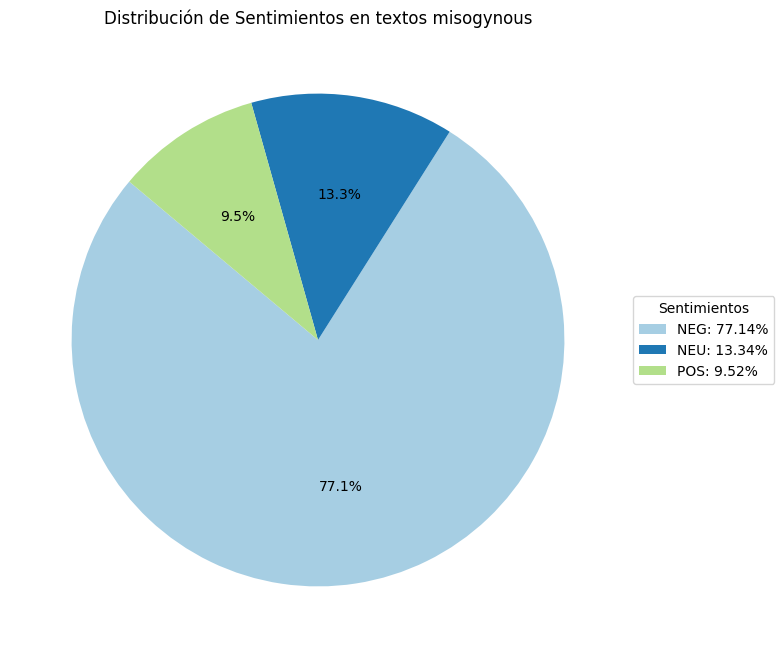

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos misogynous")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
print("\nEjemplos de cada tipo de sentimiento en textos misogynous:")
for sent_type, example in examples_per_sentiment_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogynous:
NEG: ['@Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa', '@Otb_35 Que te calles so guarra.', '@AngeAlvarez7 Callate perra, re despierta estoy', '@ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?', '@EdiiXI @lidiahdlgo Cállate tu !! Perra', '@JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría', '@BedMM @NayBetania Tú eres la culpable, perra >:v', 'Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre', 'LA MUJER ES MUY ZORRA,SABE COMO Y Q HACER,PARA CAGAR A UN TIPO,MAS SI EL TIPO ESTA ENAMORADO,o es un boludo,que le cree todo,le compra todo,le da todos los gustos,y termina cagado,,Yo solo quiero recuperar a mi hijo,,esa mina,se lo llevo,no me deja verlo, https:


-----------------------------------------------

### Tweets no misogynous

-----------------------------------------------


In [45]:
text_not_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 0]["text"].tolist()]
results_sentiment_analysis_not_misogynous = [analyze_sentiment(text) for text in tqdm(text_not_misogynous)]

  0%|          | 0/1658 [00:00<?, ?it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.28253471851348877, 'NEU': 0.651597797870636, 'POS': 0.06586752086877823}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9181393980979919, 'NEU': 0.07236133515834808, 'POS': 0.009499317035079002}

-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.745639443397522, 'NEU': 0.21440789103507996, 'POS': 0.03995267674326897}


  0%|          | 8/1658 [00:00<00:22, 74.77it/s]


-----------------------
Texto analizado: @PoderFeminazi Eso es! Cojones!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.025961685925722122, 'NEU': 0.1264202743768692, 'POS': 0.847618043422699}

-----------------------
Texto analizado: Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.0036737017799168825, 'NEU': 0.024693282321095467, 'POS': 0.9716330170631409}

-----------------------
Texto analizado: @LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se lo escriben a un tío en la polla 😒😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.804638147354126, 'NEU': 0.18966221809387207, 'POS': 0.005699547007679939}

-----------------------
Texto analizado: NINGUNA MUJER ES 'P

  1%|          | 16/1658 [00:00<00:21, 77.38it/s]


-----------------------
Texto analizado: @KiraraPixel Ah no, ella no es zorra es libre, el que es imbécil es el que tiene pareja y no hace más que ir detrás de otros XD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8277135491371155, 'NEU': 0.14863407611846924, 'POS': 0.02365240268409252}

-----------------------
Texto analizado: @DalasReview @jk_rowling Hijo de puta muerete asqueroso no te mereces esa mierda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9584468007087708, 'NEU': 0.02912915125489235, 'POS': 0.012424034997820854}

-----------------------
Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.05003650113940239, 'NEU': 0.6598668694496155, 'POS': 0.29009655117988586}

-----------------------
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDoler

  1%|▏         | 24/1658 [00:00<00:21, 77.21it/s]


-----------------------
Texto analizado: @Dlagox no sabes cuanto
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.21441681683063507, 'NEU': 0.33611586689949036, 'POS': 0.4494673013687134}

-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024164101108908653, 'NEU': 0.12921889126300812, 'POS': 0.8466169834136963}

-----------------------
Texto analizado: @SamuSG_ pues comemela
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.27586665749549866, 'NEU': 0.4620387852191925, 'POS': 0.2620946168899536}

-----------------------
Texto analizado: Lpm la perra no merecía eso :( https://t.co/H6AUh7BX8m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9539796113967896, 'NEU': 0.03605138510465622, 'POS': 0.0099689532071352}

-----------------------
Texto analizado: — Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es

  2%|▏         | 32/1658 [00:00<00:21, 77.24it/s]


-----------------------
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8172698616981506, 'NEU': 0.16525906324386597, 'POS': 0.017471114173531532}

-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9551355838775635, 'NEU': 0.034146614372730255, 'POS': 0.01071789301931858}

-----------------------
Texto analizado: Entiendo que el acoso puede terminar en violación o muerte (en el peor de los casos) y las drogas normalmente dañan al que las consume. Uno es un daño infligido y el otro daño es autoinducido. https://t.co/BRv1dUD71r
Sentimiento

  2%|▏         | 40/1658 [00:00<00:23, 70.13it/s]


-----------------------
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9521105289459229, 'NEU': 0.03806336224079132, 'POS': 0.009826064109802246}

-----------------------
Texto analizado: Pegarte en la cara con un sartén > ver Friends. https://t.co/HGNu2v8g7C
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1443946361541748, 'NEU': 0.5026718974113464, 'POS': 0.35293346643447876}

-----------------------
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemente lo es. Normalmente y gracias a Dios en el 90% de los casos son mujeres normales.+
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.11917819082736969, 'NEU': 0.7784801125526428, 'POS': 0.10234171897172928}

-----------------------
Texto analizado: @Guru_socket @joaquinbarucco La mejor forma de dormirte es pegarte un cachetazo, en la cara dormido... (Pensal

  3%|▎         | 49/1658 [00:00<00:21, 73.63it/s]


-----------------------
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727202653884888, 'NEU': 0.02270037867128849, 'POS': 0.004579366650432348}

-----------------------
Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6312282681465149, 'NEU': 0.34190574288368225, 'POS': 0.026865974068641663}


  3%|▎         | 58/1658 [00:00<00:20, 76.44it/s]


-----------------------
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.015034069307148457, 'NEU': 0.10718081891536713, 'POS': 0.8777851462364197}

-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9488685131072998, 'NEU': 0.04178563877940178, 'POS': 0.009345844388008118}

-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.1530822515487671, 'NEU': 0.17770862579345703, 'POS': 0.6692090630531311}

-----------------------
Texto analizad

  4%|▍         | 66/1658 [00:00<00:20, 76.24it/s]


-----------------------
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9763363599777222, 'NEU': 0.018754517659544945, 'POS': 0.004909194074571133}

-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576386213302612, 'NEU': 0.03731870278716087, 'POS': 0.0050426507368683815}


  4%|▍         | 74/1658 [00:00<00:21, 73.98it/s]


-----------------------
Texto analizado: @raykrai tú eres ninini: ni estudias, ni trabajas, ni haces puta gracia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799648523330688, 'NEU': 0.015952086076140404, 'POS': 0.0040829977951943874}

-----------------------
Texto analizado: Hoy es lunes con l de LA PUTA MADRE KIRKMAN, CARL NO MERECIA MORIR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9355167150497437, 'NEU': 0.049897123128175735, 'POS': 0.014586200006306171}

-----------------------
Texto analizado: Ole tu, solo le falto decir que con Franco eso no pasaba https://t.co/27hVQOiL1K
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6506545543670654, 'NEU': 0.25837400555610657, 'POS': 0.09097150713205338}

-----------------------
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9567375779151917, 'NEU': 0.03526197001338005, 'POS': 0.008000530302524567}

-----------

  5%|▌         | 91/1658 [00:01<00:20, 77.06it/s]


-----------------------
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9491733312606812, 'NEU': 0.04625251889228821, 'POS': 0.0045740725472569466}

-----------------------
Texto analizado: Hijos de puta! Os merecéis lo peor... Q asco me dais! 😭😠 https://t.co/MOHv2yINgd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9730396866798401, 'NEU': 0.023347806185483932, 'POS': 0.0036125455517321825}

-----------------------
Texto analizado: @TimoFARC @ONU_es @antonioguterres Cinico hijo de puta lo unico que te mereces es indumil corrido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9662719964981079, 'NEU': 0.024116862565279007, 'POS': 0.009611215442419052}

-----------------------
Texto analizado: @KobaML C

  6%|▋         | 107/1658 [00:01<00:20, 76.27it/s]


-----------------------
Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los humanos celebrar su nuevo ciclo anual.'
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09282724559307098, 'NEU': 0.6264635324478149, 'POS': 0.2807092070579529}

-----------------------
Texto analizado: @cristinadevonne Ni tú eres perra ni yo soy un gato, mi corazón de repuesto, se muere por latir siempre a tu lado.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1570138931274414, 'NEU': 0.4542011320590973, 'POS': 0.3887849748134613}

-----------------------
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9782342314720154, 'NEU': 0.01701299659907818, 'POS': 0.004752760287374258}

-----------------------
Texto analizado: @ViktorBautista @DGii Hijo de perra como tú eres una botella...te conviene
Sentimiento detectado: NEG
Probabil

  7%|▋         | 124/1658 [00:01<00:19, 77.61it/s]


-----------------------
Texto analizado: Prisión preventiva contra jefe policial acusado de violación y acoso sexual - En audiencia inicial el juez de Paz de Guazapa, resolvió este día enviar a prisión preventiva al inspector de la Policía Nacional Civil, Pablo de la Cruz Díaz Bernabe, a qui... https://t.co/jK51nEYcXV
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.30112120509147644, 'NEU': 0.602536141872406, 'POS': 0.09634268283843994}

-----------------------
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8820346593856812, 'NEU': 0.10783824324607849, 'POS': 0.010127101093530655}

-----------------------
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.883692622184

  9%|▊         | 141/1658 [00:01<00:19, 79.62it/s]


-----------------------
Texto analizado: hijo de puta t dije q te iba a enseñar de sonido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8036931157112122, 'NEU': 0.16852442920207977, 'POS': 0.02778238244354725}

-----------------------
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17416590452194214, 'NEU': 0.5580826997756958, 'POS': 0.26775142550468445}

-----------------------
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9793180227279663, 'NEU': 0.016805628314614296, 'POS': 0.00387634988874197}

-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que promet

  9%|▉         | 157/1658 [00:02<00:19, 77.89it/s]


-----------------------
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9452036619186401, 'NEU': 0.04453416168689728, 'POS': 0.0102621428668499}

-----------------------
Texto analizado: -Mamá, mamá, ¿por qué la novia va vestida de blanco? -Porque es el día más feliz de su vida. -¿Y por qué el novio va vestido de negro?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.36525532603263855, 'NEU': 0.5333893299102783, 'POS': 0.10135533660650253}

-----------------------
Texto analizado: La puta madre qe buena novia es esta piba Quiero una novia asi, esos regalos enamoran
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.010194528847932816, 'NEU': 0.036492813378572464, 'POS': 0.9533126354217529}

-----------------------
Texto analizado: @anaisbernal @lamarea_com Lo mereces ;-)
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006

 10%|█         | 174/1658 [00:02<00:19, 77.88it/s]


-----------------------
Texto analizado: Te pego con un Fierro en la cara y lo Doblas todo culia imagínate lo dura que la tenes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512255787849426, 'NEU': 0.03853144869208336, 'POS': 0.01024295762181282}

-----------------------
Texto analizado: @Judasthefucker a ver si vas a tener que reflexionar sobre no hacer caso a 4 tonterias que diga y no tener ni puta idea de quien es
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8806357979774475, 'NEU': 0.11045639216899872, 'POS': 0.008907878771424294}

-----------------------
Texto analizado: -¿porque los hombres se casan con las mujeres? -porque las cabras no saben fregar los platos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.896574854850769, 'NEU': 0.09628225117921829, 'POS': 0.007142952643334866}

-----------------------
Texto analizado: @zombyerss hola zombie eres un ovni te pego en la cara a ver si empiezas con esta batalla yea
Sentimiento detectado: NEG
Probabilidades: 

 11%|█         | 182/1658 [00:02<00:19, 76.51it/s]


-----------------------
Texto analizado: @BusiPiscinas Será el texto? 🤔 Que la gente es muy guarra...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7653392553329468, 'NEU': 0.22526289522647858, 'POS': 0.009397794492542744}

-----------------------
Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7372305989265442, 'NEU': 0.15979652106761932, 'POS': 0.10297286510467529}

-----------------------
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino hasta feminicidio y dónde están los gritos de justicia, no se llevaron un Oscar, ni tuvieron cuentas millonarias. Estas mujeres denunciaron 20 años después mientras estos seguían haciendo de la
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729816317558289, 'NEU': 0.02348901517689228, 'POS': 0.0035292969550937414}

-----------------------
Texto analizado: Mira si no te pego una ostia en la cara es porq tengo educación
Sentimiento det

 11%|█▏        | 190/1658 [00:02<00:20, 73.19it/s]


-----------------------
Texto analizado: @TitoHunterLoL A ver también te digo que no es por hacer acoso, que es por violacion y asesinato xddd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7371289134025574, 'NEU': 0.23990708589553833, 'POS': 0.022964002564549446}

-----------------------
Texto analizado: Mmm.. espera, ¿cómo dices? https://t.co/EqktqoDn6t
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.19236066937446594, 'NEU': 0.6719602942466736, 'POS': 0.13567900657653809}

-----------------------
Texto analizado: Espero que tengan un buen año y reciban lo que merezcan menos yo porque yo me jodería por puta JAJAJAJAJJAJAAJAJAJAJJAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47827932238578796, 'NEU': 0.4391512870788574, 'POS': 0.08256931602954865}

-----------------------
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5572434663772583, 

 12%|█▏        | 198/1658 [00:02<00:19, 74.98it/s]


-----------------------
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9840917587280273, 'NEU': 0.011325136758387089, 'POS': 0.004583063535392284}

-----------------------
Texto analizado: Que hijos de puta como estos estén en la calle solo pueden provocar este tipo d cosas. El detenido por el crimen de Víctor Laínez ya cumplió condena por dejar tetrapléjico a un policía en Barcelona https://t.co/3hwGtBPxTj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694709181785583, 'NEU': 0.024261940270662308, 'POS': 0.006267103832215071}

-----------------------
Texto analizado: Y no minimizar acoso ,no hay que llegar al punto de una violacion para hacer algo https://t.co/Jblj2L8kkx
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7733771204948425, 'NEU': 0.20368170738220215, 'POS': 0.022941168397665024}

-----------------------
Texto analizado: @

 12%|█▏        | 207/1658 [00:02<00:18, 77.02it/s]


-----------------------
Texto analizado: @vozdelatierra Basura, tú eres quien no tiene la talla para representarnos en el Congreso, no haz hecho ni mierda en tu perra vida!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9733933806419373, 'NEU': 0.017614122480154037, 'POS': 0.008992488496005535}

-----------------------
Texto analizado: Sois unos farsantes hijos de puta que merecéis mi más profundo desprecio. Durante un año he sido vuestro bufón. ¡Me avergüenza no haber tenido el coraje de hacer esto mucho antes coño!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9849448800086975, 'NEU': 0.010738424025475979, 'POS': 0.004316752310842276}

-----------------------
Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7112708687782288, 'NEU': 0.24091070890426636, 'POS': 0.0478183887898922}

-----------------------
Texto analizado: Orita mi perra me despertó para enseñ

 13%|█▎        | 215/1658 [00:02<00:18, 76.44it/s]


-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8799490332603455, 'NEU': 0.11255255341529846, 'POS': 0.007498389109969139}

-----------------------
Texto analizado: CUANDO VAN A ENTENDER QUE CON ESOS TEMAS NO SE BROMEAN SI TU HACES BROMAS SOBRE LA PEDOFILIA, VIOLACION O ACOSO SEXUAL ERES UNA MIERDA DE PERSONA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9553201794624329, 'NEU': 0.03982747346162796, 'POS': 0.00485230702906847}

-----------------------
Texto analizado: @FaunaFeminazi Gracias, gracias!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.024734731763601303, 'NEU': 0.09089551120996475, 'POS': 0.8843697309494019}

-----------------------
Texto analizado: Insisto, maldita la hora e

 14%|█▎        | 224/1658 [00:02<00:18, 77.74it/s]


-----------------------
Texto analizado: Ni perra , ni puta, ni zorra nada de esa mierda LA MUJER ES MUJER Y SE RESPETA ASI TENGA MIL NOVIOS Y SE DIVIERTA CON ELLOS COMO SE LE DE LA HPTA GANA :) (Y)
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2568511366844177, 'NEU': 0.5792952179908752, 'POS': 0.16385367512702942}

-----------------------
Texto analizado: Lo grave no sólo es el número elevado de denuncias de violencia doméstica, violación y/o acoso sexual, cuando muchas de las víctimas tienen una dependencia económica con los victimarios, el mal manejo de la prensa ante estos casos,
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698122143745422, 'NEU': 0.026211025193333626, 'POS': 0.003976819105446339}

-----------------------
Texto analizado: Os voy a enseñar una foto muy guarra mia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5418152213096619, 'NEU': 0.36572375893592834, 'POS': 0.09246103465557098}

-----------------------
Texto analizado: @AjitPaiFCC mereces

 14%|█▍        | 232/1658 [00:03<00:19, 74.51it/s]


-----------------------
Texto analizado: @laverde1976 Podrá sentir lo que usted quiera, pero no es violación ni acoso sexual. Y es usted quien debe detenerlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.47230228781700134, 'NEU': 0.4594466984272003, 'POS': 0.06825102120637894}

-----------------------
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675392508506775, 'NEU': 0.0252881720662117, 'POS': 0.007172505836933851}

-----------------------
Texto analizado: @anaisbernal Esto no puede ser ni puta vergüenza tienen estos jueces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738609194755554, 'NEU': 0.019579460844397545, 'POS': 0.006559658329933882}

-----------------------
Texto analizado: @IrantzuVarela Una puta guerra, es una puta guerra. Tu frase, mi frase del siglo.
Sentimiento detectado: NEG


 14%|█▍        | 240/1658 [00:03<00:18, 75.84it/s]


-----------------------
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727229475975037, 'NEU': 0.02194923907518387, 'POS': 0.005327824968844652}

-----------------------
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727645516395569, 'NEU': 0.019970465451478958, 'POS': 0.007264906540513039}

-----------------------
Texto analizado: Ahhh claro, captas eso pero no todos los malditos palos que te tiro y andas con el que 'te boludean', te pego o lo hace alguien más?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7196515798568726, 'NEU': 0.2735769748687744, 'POS': 0.006771399173885584}

-----------------------
Texto analizado: Matt Damon critica campaña contra el acoso y la vio

 15%|█▍        | 248/1658 [00:03<00:18, 75.48it/s]


-----------------------
Texto analizado: Aguante la represión la puta madre!!! A estos negros de mierda hay que cagarlos a palos y enseñarles quien manda!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8641061186790466, 'NEU': 0.07916221022605896, 'POS': 0.056731753051280975}

-----------------------
Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.851021409034729, 'NEU': 0.08737464994192123, 'POS': 0.061604004353284836}

-----------------------
Texto analizado: @HenriFalconLara No digas nada que tú eres cómplice de lo que está pasando... y recuerda seguirás siendo la perra más perra de Venezuela
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8919686079025269, 'NEU': 0.08092010766267776, 'POS': 0.027111290022730827}

-----------------------
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo 

 15%|█▌        | 256/1658 [00:03<00:18, 75.82it/s]


-----------------------
Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7160166501998901, 'NEU': 0.15208308398723602, 'POS': 0.13190026581287384}

-----------------------
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06926492601633072, 'NEU': 0.6179913878440857, 'POS': 0.3127436339855194}

-----------------------
Texto analizado: @MandiocaTeFoka si.. comemela a mi
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.14306242763996124, 'NEU': 0.5582712888717651, 'POS': 0.2986662983894348}

-----------------------
Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9517900347709656, 'NEU': 0.036171

 16%|█▌        | 264/1658 [00:03<00:18, 73.83it/s]


-----------------------
Texto analizado: Movimiento SEMEN! https://t.co/O9SInApXXR
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.05570214241743088, 'NEU': 0.6439974904060364, 'POS': 0.30030035972595215}

-----------------------
Texto analizado: Jejeje 'Puta Madre .... No me lo saques' jejeje tú eres lo máximo Kendall https://t.co/8cDbJPVYJq
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.017739787697792053, 'NEU': 0.07885532081127167, 'POS': 0.9034048318862915}

-----------------------
Texto analizado: Merecido después de dos semanas enseñando la ruta más perra en busca la historia de fedex 😌😌😌 https://t.co/b1rwNUrA4o
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0846780315041542, 'NEU': 0.5747378468513489, 'POS': 0.3405841588973999}

-----------------------
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece 

 16%|█▋        | 272/1658 [00:03<00:22, 62.26it/s]


-----------------------
Texto analizado: 'Me pegó un puñetazo en la cara y acabé en el suel', así ha contado Esther, profesora, el acoso que sufrió. Escúchalo con @ExpositoCOPE https://t.co/JtEQ0FpwjN
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8386985063552856, 'NEU': 0.13829092681407928, 'POS': 0.023010557517409325}

-----------------------
Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.15853667259216309, 'NEU': 0.354613333940506, 'POS': 0.4868500232696533}

-----------------------
Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida chabón. Y te mereces lo peor corta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9809437394142151, 'NEU': 0.013896945863962173, 'POS': 0.0051592616364359856}

---------

 17%|█▋        | 279/1658 [00:03<00:23, 59.83it/s]


-----------------------
Texto analizado: #HaceMuchoQue no te callas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8693066239356995, 'NEU': 0.11491020023822784, 'POS': 0.01578318327665329}

-----------------------
Texto analizado: @anaisbernal Feliz año nuevo Ana te mereces lo mejor.😘
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.005107223987579346, 'NEU': 0.03984493017196655, 'POS': 0.9550477862358093}

-----------------------
Texto analizado: @RinconFortnite Me parece que si la foto gente ya es guarra usando los arbustos del mapa y no los de objetos ya con esto es el siguiente level para guarrear porque eres invisible y no se te oye
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9725283980369568, 'NEU': 0.024229995906352997, 'POS': 0.0032416728790849447}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJ

 17%|█▋        | 286/1658 [00:03<00:23, 58.91it/s]


-----------------------
Texto analizado: escúchame ya me jodería jajajajajajajajajajajajajaja si pa ti enseñar es ser una guarra yo soy biennnn guarra, menos mal que no me respeto que si no... https://t.co/yt5fHp99b7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9337185025215149, 'NEU': 0.054744720458984375, 'POS': 0.011536834761500359}

-----------------------
Texto analizado: @bot_11109 @elchiringuitotv @Borjamazarro8 Uno mas imbécil dirás,hasta la polla ya estaba la gente con las payasadas de Alves y neymar...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583475589752197, 'NEU': 0.03479998558759689, 'POS': 0.006852473597973585}

-----------------------
Texto analizado: @xJustClaudio HIJO DE PUTA Ahora no te mereces tener ese gato
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9665398597717285, 'NEU': 0.02081565000116825, 'POS': 0.0126445721834898}

-----------------------
Texto analizado: COMO LE VAN A ENSEÑAR A UNA BEBE DE 2/ 3 AÑOS QUR CANTE UNA CANCIÓN QUE D

 18%|█▊        | 293/1658 [00:04<00:23, 58.10it/s]


-----------------------
Texto analizado: @LeticiaDolera El arte de la vida es aprender y enseñar y seguir aprendiendo,para seguir enseñando......
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013142228126525879, 'NEU': 0.19390086829662323, 'POS': 0.7929569482803345}

-----------------------
Texto analizado: @Barbijaputa @alberbustos Esto es una puta mierda q da un asco insuperable. No me lo puedo creer, pero q clase de jueces y fiscales tenemos porque esto no va de partidos políticos, va de mentalidades y es insoportable
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9839968085289001, 'NEU': 0.01264918688684702, 'POS': 0.0033540416043251753}


 18%|█▊        | 299/1658 [00:04<00:23, 57.82it/s]


-----------------------
Texto analizado: 'Puede tomar la forma del acoso, el tocamiento, el incesto, la violación o la explotación en prostitución o pornografía. Sucede en el hogar, las escuelas, las instituciones de atención, lugares de trabajo y dentro de comunidades en su conjunto.”(UNICEF) https://t.co/aG3MifLf7o v
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5504245758056641, 'NEU': 0.43337127566337585, 'POS': 0.01620413549244404}

-----------------------
Texto analizado: @NicolasMaduro Sin agua, sin luz, sin comida. Dios te dé el castigo que te mereces hijo de la gran puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9473519325256348, 'NEU': 0.03733484074473381, 'POS': 0.01531324815005064}

-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9389414191246033, 'NEU': 0.04274385794997215, 'POS': 0.01831475831568241}

-----------------------
Texto analizado: @jxshstalker Mi polla

 18%|█▊        | 305/1658 [00:04<00:23, 58.08it/s]


-----------------------
Texto analizado: Acusan al exrapero y productor musical Russell Simmons por violación y acoso sexual https://t.co/9LHdi1VyyQ https://t.co/ZUgreTzoEo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.608368992805481, 'NEU': 0.31141215562820435, 'POS': 0.08021891862154007}

-----------------------
Texto analizado: RT SEMEN!! Una ayuda para expandir un movimiento necesario @ElMachistaQamas
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.030154572799801826, 'NEU': 0.37177297472953796, 'POS': 0.5980724692344666}


 19%|█▉        | 311/1658 [00:04<00:23, 58.50it/s]


-----------------------
Texto analizado: Los exjugadores de la #Arandina acusados de un delito de #abuso #sexual conocían la edad de la menor. Ninguno ha reconocido su participación en los hechos https://t.co/3cF0wfAEe8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5323735475540161, 'NEU': 0.45061174035072327, 'POS': 0.017014730721712112}

-----------------------
Texto analizado: @selinac66283070 @machismocalleje @Barbijaputa Propaganda hembrista, Cuando hablas de un hijo de la gran puta que agrede a una niña de 15 años. Tu no tienes vergüenza, eres un pedazo de mierda. Ya te he estado leyendo más veces y eres tan valiente que no 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9761752486228943, 'NEU': 0.01733103021979332, 'POS': 0.006493798457086086}

-----------------------
Texto analizado: @fullereno374 @Bcnisnotcat_ Tu eres gallego no? Pues tu a lo tuyo... verdad que yo no me meto en tu puta comunidad? Pues tu no te metad en la mía
Sentimiento detectado: NEG
Probabilid

 19%|█▉        | 317/1658 [00:04<00:23, 56.42it/s]


-----------------------
Texto analizado: @jabuffarini te mereces lo peor hijo de puta. Preparate para la rotura de ligamentos mala leche de mierda. Bostarini la concha de tu vieja. Nunca mas un ídolo en mi vida son todos garcas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967639684677124, 'NEU': 0.020704206079244614, 'POS': 0.011656049638986588}

-----------------------
Texto analizado: @Ethan_Ash62 Mira Ethan voy a putear a quien merezca ser puteado sea k, M o x y, pero estos hijos de puta avala el roban pero algo hacen eso nos transforma en un país de mierda y no por el país sino por la gente, y estos enfermos de mierda avalan todo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9740239381790161, 'NEU': 0.020985882729291916, 'POS': 0.004990175366401672}


 19%|█▉        | 323/1658 [00:04<00:23, 56.55it/s]


-----------------------
Texto analizado: @alvaro_delgado @NegroMontesMX @ManceraMiguelMX 'operativo'??? Eso es acoso, prepotencia y violacion a derechos civiles. Esos sujetos que fungen como policía son para secuestrar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9432904124259949, 'NEU': 0.04964862018823624, 'POS': 0.00706103490665555}

-----------------------
Texto analizado: @grunppy @Antoniuruizd @Relatofeminista 'Yo soy puta y feminista. Ser puta es el trabajo más feminista que existe no lo sabíais? ' Las idioteces que hay que leer pfff 😒😒😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7726601958274841, 'NEU': 0.20325569808483124, 'POS': 0.02408413589000702}

-----------------------
Texto analizado: ¿Desde cuando una chica es zorra por el simple hecho de tener amistades con pene? Las mujeres podemos tener amigos hombres sin necesidad de que haya algo más que una simple amistad, que triste que ella no pueda tener amigos famosos sin que la tachen de zorra y robafama 

 20%|█▉        | 329/1658 [00:04<00:23, 57.44it/s]


-----------------------
Texto analizado: @Flowypanda Pero Flow, las mujeres son seres de luz! Gracias, lo peor de todo es que la gente le da rt a su puta mierda de tweet manipulador...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9603375196456909, 'NEU': 0.030018890276551247, 'POS': 0.009643582627177238}

-----------------------
Texto analizado: @perezcamilo0 @PauYornetOk ya callate te voy a bloquear hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9475806951522827, 'NEU': 0.039060093462467194, 'POS': 0.013359105214476585}

-----------------------
Texto analizado: Claro pero luego el rap, los chavales q improvisan y rapean 'lo único q saben decir es tu novia es una zorra, tu madre es una puta', seguro q sí... no tenéis ni idea. @SmoothArkano eres ENORME. https://t.co/fSKLbVFxKS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8760227560997009, 'NEU': 0.08184083551168442, 'POS': 0.04213639721274376}


 20%|██        | 336/1658 [00:04<00:22, 58.95it/s]


-----------------------
Texto analizado: @abiaquino015 Callate jajaja si noooo dos pajaros de un tiro jaja si se da bien sino se pueden ir a la re puta madre jajajaja qhdp
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6715103983879089, 'NEU': 0.21477538347244263, 'POS': 0.11371421813964844}

-----------------------
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5393458008766174, 'NEU': 0.4306451082229614, 'POS': 0.030009115114808083}

-----------------------
Texto analizado: Estoy tan tan feliz por mi amiga pochaa.. sos todo hija de perra. No te mueras nunca.TE MERECESS TODO LO BUENO QUE TE PASAAAAAAAA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013534254394471645, 'NEU': 0.02539149299263954, 'PO

 21%|██        | 343/1658 [00:04<00:22, 59.47it/s]


-----------------------
Texto analizado: @anaisbernal Si no tienes cuenta en Suiza...no mereces la pena😢😢
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8792328834533691, 'NEU': 0.11208520829677582, 'POS': 0.008681975305080414}

-----------------------
Texto analizado: @VeryMadLex Este señor es imbécil de la polla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9616270065307617, 'NEU': 0.02797664701938629, 'POS': 0.010396318510174751}

-----------------------
Texto analizado: @Cazatalentos @ElenaSGalan @_isaacrosa @Barbijaputa Qué liberales y progres sois toda la escoria que intentáis defender un asesinato, Dios quiera que no le toque a un ser querido vuestro, veréis el asco que produce ver este tipo de comentarios. Sois patét
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9802495241165161, 'NEU': 0.012786094099283218, 'POS': 0.0069643231108784676}


 21%|██        | 350/1658 [00:05<00:22, 59.17it/s]


-----------------------
Texto analizado: @nyaruko__chan Acoso , violacion , me da bastante igual , yo no voy a entrar en el trapo de querer o no la pena de muerte pero ser MACHISTA por no quererla es un poco equisde no?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9257453083992004, 'NEU': 0.06518731266260147, 'POS': 0.009067331440746784}

-----------------------
Texto analizado: Comemela — AQUI AQUI AQUI NI HAY QUIEN VIVA AQUI NO AQUI NO https://t.co/4b1kyvugxI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6936770081520081, 'NEU': 0.2728956639766693, 'POS': 0.033427417278289795}

-----------------------
Texto analizado: @Subaru_Saka5 @kingsonbra317 no es una zorra tu eres un maldito mocoso y un puto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9316664338111877, 'NEU': 0.05067942291498184, 'POS': 0.017654133960604668}

-----------------------
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
S

 21%|██▏       | 356/1658 [00:05<00:24, 53.40it/s]


-----------------------
Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00913117453455925, 'NEU': 0.030561987310647964, 'POS': 0.9603068828582764}

-----------------------
Texto analizado: Si nunca has sido víctima de acoso, abuso o violación es complicadísimo que entiendas el dolor, miedo e impotencia que te invaden. Y no, callarse no es la solución.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619777798652649, 'NEU': 0.03253034129738808, 'POS': 0.005491920746862888}

-----------------------
Texto analizado: Cada puta provocación... https://t.co/0jXjQvZRzJ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939182698726654, 'NEU': 0.04954587295651436, 'POS': 0.011271352879703045}

-----------------------
Texto analizado: @anaisbernal Si pensáis que MM es imbécil perdida, paráos un momento a pensar en los personajes que hayan podido ver en ella a la Periodista del Año 2017... 🤤
Sentimiento detectado: NEU
Probabi

 22%|██▏       | 362/1658 [00:05<00:24, 52.13it/s]


-----------------------
Texto analizado: @Martukkki @mividaconmi @yodominguez Es que la puta libre lucha denuncia la explotación sexual. No tiene nada que ver! Por la explotación laboral en la industria textil vamos a abolir la industria textil? No. Vamos a perseguir la explotación
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.921144425868988, 'NEU': 0.07076028734445572, 'POS': 0.008095390163362026}

-----------------------
Texto analizado: Sólo dentro de los límites del humor, quizá es esta la solución compensatoria para ellas en el tema de la carne roja https://t.co/xKuiLibt9J
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.042592160403728485, 'NEU': 0.7803114056587219, 'POS': 0.177096426486969}

-----------------------
Texto analizado: @JoaquinPrietito vení pero a vos no te pego en la cara pq sos muy lindo jajaja<3
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03783061355352402, 'NEU': 0.27898457646369934, 'POS': 0.683184802532196}

-----------------------
Texto 

 22%|██▏       | 368/1658 [00:05<00:24, 52.04it/s]


-----------------------
Texto analizado: Ahora soplar verdades y evidencias en la cara de los homeópatas es acoso y violencia. https://t.co/XC0Bz4beFO Pobrechitos que han vendido un 14% menos de sus “medicamentos INVENT” y ahora se quejan... #STOPBullyingHomeopático ⚪️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9293221235275269, 'NEU': 0.06564446538686752, 'POS': 0.005033329129219055}

-----------------------
Texto analizado: @JKCorden Oh por favor cinico de mierda !!! Pegarte una patada en la cara seria poco.Que asco de tipo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9520648121833801, 'NEU': 0.0342281311750412, 'POS': 0.013707012869417667}

-----------------------
Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03008873388171196, 'NEU': 0.2544533610343933, 'POS': 0.7154579162597656}

-----------------------
Texto analizado: @genero

 23%|██▎       | 374/1658 [00:05<00:26, 48.41it/s]


-----------------------
Texto analizado: @spreadxngirl AH, YO SOY AKI, ENCANTADA FUMIKO. //comemela
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.06006468087434769, 'NEU': 0.5070677399635315, 'POS': 0.43286755681037903}

-----------------------
Texto analizado: @ximeeacuna @liveforlouisx Sobre un político que tiene denuncias por violación y acoso sexual a menores
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6227134466171265, 'NEU': 0.3480972349643707, 'POS': 0.029189331457018852}


 23%|██▎       | 379/1658 [00:05<00:26, 48.06it/s]


-----------------------
Texto analizado: @A24COM Callate hijo de puta! Chorro corrupto.uds.empezaron la violencia como siempre.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9387260675430298, 'NEU': 0.04103679582476616, 'POS': 0.020237265154719353}

-----------------------
Texto analizado: Faltas como la violación y el acoso deben castigarse, pero las acusaciones contra supuestos abusadores está llevan a la imposición de un nuevo moralismo https://t.co/W1Dg8Zotkg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576311111450195, 'NEU': 0.03553364798426628, 'POS': 0.006835211534053087}

-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5863177180290222, 'NEU': 0.37734758853912354, 'POS': 0.03633474186062813}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club.

 23%|██▎       | 384/1658 [00:05<00:27, 46.55it/s]


-----------------------
Texto analizado: @finger_pies @Martattack88 @Relatofeminista @selenamanero14 Las mujeres son mujeres tengan polla o no, no son mujeres atrapadas en cuerpos de hombre ni hombres q se sienten mujeres, por dios que me están sangrando los ojos de leer tal pego. Y cuidao, que 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8900176882743835, 'NEU': 0.0949452817440033, 'POS': 0.015037012286484241}

-----------------------
Texto analizado: hasta la polla que pongáis en las noticias PRESUNTA violacion os tiraba una piedra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9735370874404907, 'NEU': 0.01960643008351326, 'POS': 0.0068564689718186855}


 24%|██▎       | 390/1658 [00:05<00:25, 48.83it/s]


-----------------------
Texto analizado: @IU_Madrid Que panda de hijos de puta estáis hechos. El único sitio en el que merecía estar es entre rejas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9759474396705627, 'NEU': 0.016112735494971275, 'POS': 0.007939809001982212}

-----------------------
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17930853366851807, 'NEU': 0.737007200717926, 'POS': 0.08368422836065292}

-----------------------
Texto analizado: @BlueeVeins que te calles la puta boca hombre (hecho con el teclado ese que va a voz sabes no se como se llama pero ese)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6518160700798035, 'NEU': 0.30914410948753357, 'POS': 0.03903985396027565}

-----------------------
Texto analizado: Así son:VULGARES.No tienen más argumentos Aprendieron el legado aquel:'Te pego en la cara marica' del innombrable. @efrapotter @Infracer @gurozu @ELCOCODIAZ https://t.co

 24%|██▍       | 398/1658 [00:05<00:22, 56.78it/s]


-----------------------
Texto analizado: Pegame en la cara que yo te pego en el ego
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.26494157314300537, 'NEU': 0.6165501475334167, 'POS': 0.11850825697183609}

-----------------------
Texto analizado: Ya me joderia demostrar que soy racista, etnocentrista, machito y frivolizar con el acoso y la violacion en 4 lineas. Que miedo da perder privilegios eh https://t.co/jdrs9wOsZn
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9779807925224304, 'NEU': 0.019186943769454956, 'POS': 0.0028321288991719484}

-----------------------
Texto analizado: Y pensar que la perra desgraciada me muerde cuando trataba de enseñarle trucos o a saltar la cuerda. ;_;
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9636296629905701, 'NEU': 0.03332000970840454, 'POS': 0.0030503254383802414}

-----------------------
Texto analizado: #HaceMuchoQue no me la comes
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6568324565887451, 'NEU': 0.291106969118

 24%|██▍       | 406/1658 [00:06<00:20, 61.69it/s]


-----------------------
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6875410079956055, 'NEU': 0.29920679330825806, 'POS': 0.013252193108201027}

-----------------------
Texto analizado: @logela También he visto usar “escarceos amorosos” para referirse a sus intentos de violacion y acoso. Es penoso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704447388648987, 'NEU': 0.02571234293282032, 'POS': 0.0038428178522735834}

-----------------------
Texto analizado: @LeticiaDolera @policia @zoidoJI A saber el “orden “ que pone en su casa ante su familia. Hijo de puta cobarde!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9333239197731018, 'NEU': 0.05582072213292122, 'POS': 0.010855437256395817}

-----------------------
Texto analizado: @jesus_prez Tú eres grande tt y @23_ricard tú comemela con mucho amor 💕
Sentimiento detectado: POS
P

 25%|██▍       | 413/1658 [00:06<00:19, 63.52it/s]


-----------------------
Texto analizado: Basura escoria energúmeno mierda podrido estúpido capullo imbécil soplapollas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9376627802848816, 'NEU': 0.04460013285279274, 'POS': 0.017737114802002907}

-----------------------
Texto analizado: Mira si llega a las 1000 visualizaciones me pinto una polla en la cara y lo subo
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.0719783753156662, 'NEU': 0.6076605916023254, 'POS': 0.32036104798316956}

-----------------------
Texto analizado: Me parto la polla en la cara de los que criticáis más a Benzema que a Cristiano. Estáis más ciegos que un jodido topo hermano.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773412346839905, 'NEU': 0.01613551564514637, 'POS': 0.006523217540234327}


 25%|██▌       | 421/1658 [00:06<00:18, 67.47it/s]


-----------------------
Texto analizado: Dos mil RT a esta escoria... pero luego no fueron a Bruselas a pasear su odio y todo es culpa de los medios. Vía @mohorte https://t.co/rlB2eb9eLL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9694268107414246, 'NEU': 0.02526888996362686, 'POS': 0.005304282531142235}

-----------------------
Texto analizado: hay que cortarle los huevos con un alicate a los que dicen que las mujeres denuncian acoso y violación solo porque el tipo es feo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9654207825660706, 'NEU': 0.027139898389577866, 'POS': 0.007439333479851484}

-----------------------
Texto analizado: @SergioRamos Hundido ? Tu como los gorrinos, te mezclas con la mierda,bueno tu eres la mierda, hijo de puta. Das asco como persona eres escoria. Sólo eres basura
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9726783633232117, 'NEU': 0.019101129844784737, 'POS': 0.00822045560926199}

-----------------------
Texto analizado: @Jonatan

 26%|██▌       | 429/1658 [00:06<00:17, 69.74it/s]


-----------------------
Texto analizado: #HaceMuchoQue no tienes derechos #Honey...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.778133749961853, 'NEU': 0.21287401020526886, 'POS': 0.008992265909910202}

-----------------------
Texto analizado: Esta noche se sale de fiesta. Si alguno pretende ligar con alguna mujer ya sabéis el dicho: Sábado sabadete, un polvete y al garete.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15361498296260834, 'NEU': 0.7720628380775452, 'POS': 0.0743221640586853}

-----------------------
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9595025181770325, 'NEU': 0.035528022795915604, 'POS': 0.004969432950019836}


 26%|██▋       | 437/1658 [00:06<00:17, 69.08it/s]


-----------------------
Texto analizado: ¿Que es mejor cagar o follar? ¡Cagar! porque después no tienes que estar dandole besitos al bater durante media hora.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5015437602996826, 'NEU': 0.3916958272457123, 'POS': 0.10676038265228271}

-----------------------
Texto analizado: @schwarzferd @SalvadorAlianza @radioamericahn Si tu no eres hondureño porque no quedas con la puta trompa callada
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.794711172580719, 'NEU': 0.18701757490634918, 'POS': 0.018271280452609062}

-----------------------
Texto analizado: Desde el New York Times y The New Yorker publicó por primera vez las acusaciones de acoso sexual y violación contra Harvey Weinstein por Rose McGowan, Gwyneth Paltrow, Ashley Judd y docenas de otros, el productor desgracia ha sido despedido de su empresa y fiscal d ...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7088794112205505, 'NEU': 0.26819908618927, 'POS': 0.02292149700224

 27%|██▋       | 444/1658 [00:06<00:17, 69.26it/s]


-----------------------
Texto analizado: @LeticiaDolera @jaimeaja De puta pena al parecer
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9047966003417969, 'NEU': 0.07550473511219025, 'POS': 0.019698671996593475}

-----------------------
Texto analizado: @Jhonqv13 Jajajajaja, tu eres loco? Luis nunca en la puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.68094402551651, 'NEU': 0.2964668869972229, 'POS': 0.022589072585105896}

-----------------------
Texto analizado: @ppkamigo Cállate judío yankee hijo de perra, FUERA DE NUESTRO PAÍS.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9292724132537842, 'NEU': 0.04844217002391815, 'POS': 0.022285379469394684}


 27%|██▋       | 451/1658 [00:06<00:17, 68.93it/s]


-----------------------
Texto analizado: @IgnacioSena1 Callate hijo de perra , como estas amor?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7810529470443726, 'NEU': 0.1816779226064682, 'POS': 0.03726910427212715}

-----------------------
Texto analizado: Yo se que puedo ser una perra pero solo cuando me hacen algo, hay cosas que de verdad no me merecía.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9028193354606628, 'NEU': 0.08689528703689575, 'POS': 0.01028534397482872}

-----------------------
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño eso parece un lobo xdios..donde esta el lazo del pelo ehhhh 😈😈😈😈😈
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.48104920983314514, 'NEU': 0.4826625883579254, 'POS': 0.036288145929574966}

-----------------------
Texto analizado: @GustavoBruzone No digas tonterías. HAY QUE DEFENDER A LOS JUBILADOS DE EDTOS REPRESORES PROVOCSDORES SINIESTROS HIJOS DR PUTA
Sentimiento detectado: NEG
Probabilidades

 28%|██▊       | 459/1658 [00:06<00:17, 69.53it/s]


-----------------------
Texto analizado: #Mario_Testino y #Bruce_Weber acusados de acoso y violación a modelos masculinos, las más importantes revistas anuncian que nunca más serán contratados ... #NiUnoMenos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8085470795631409, 'NEU': 0.17192664742469788, 'POS': 0.019526183605194092}

-----------------------
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o tener que ver algo con una persona tan imbecil como tu, fuese o no un idol no quita que fuese una persona y merece tu respeto igual que  cualquier otra asique haznos a todos un favor y borra el tweet o
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9793416857719421, 'NEU': 0.015840033069252968, 'POS': 0.004818263929337263}

-----------------------
Texto analizado: @alejitacoll ... habemos muchos hombres en contra del acoso; eso sí, no todos lo expresamos desde el prejuicio sexista. Su respuesta se ganará aplausos y likes de los bienpensantes 'pero en cie

 28%|██▊       | 467/1658 [00:06<00:16, 71.33it/s]


-----------------------
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9760922193527222, 'NEU': 0.01984323188662529, 'POS': 0.004064544104039669}

-----------------------
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9723710417747498, 'NEU': 0.019309120252728462, 'POS': 0.008319859392940998}

-----------------------
Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9543248414993286, 'NEU': 0.040060680359601974, 'POS': 0.005614484194666147}

-----------------------
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - 

 29%|██▊       | 475/1658 [00:07<00:16, 72.72it/s]


-----------------------
Texto analizado: Haces que ellas jueguen contigo como el imbécil que eres Si fueras mi novio o mi cosa te habría arrancado la polla a bocados hace tiempo Pero nada, tu sigue
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942022442817688, 'NEU': 0.050678353756666183, 'POS': 0.007299251854419708}

-----------------------
Texto analizado: @sabinadelacruz El acoso es culpa de los hombres, ustedes deberían de poder vestirse como les venga en gana: no es no y punto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9148279428482056, 'NEU': 0.07594164460897446, 'POS': 0.00923042930662632}

-----------------------
Texto analizado: @_mel0coton Claro coño, pero no todos los ligues son a la primera dice si, se supone que algo de insistir, acoso es acoso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6110256314277649, 'NEU': 0.37652164697647095, 'POS': 0.012452713213860989}


 29%|██▉       | 483/1658 [00:07<00:15, 73.47it/s]


-----------------------
Texto analizado: Zaira Navas: Este año se realizó una reforma a la legislación sobre acoso sexual y violación en contra de la niñez y adolescencia. @CONNA_ES https://t.co/SoAFDcO9YY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5148346424102783, 'NEU': 0.42186057567596436, 'POS': 0.06330475956201553}

-----------------------
Texto analizado: @anaisbernal ¿¡Un debate!? No es sólo dar voz. Se ha de enseñar qué es un maltrato y por qué no se ha de cuestionar lo que es un maltrato. Las señales en la piel se ven, las que dejan en la mente no.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7180216312408447, 'NEU': 0.2557746469974518, 'POS': 0.026203680783510208}

-----------------------
Texto analizado: Fav si te vienes a dormir conmigo y te pego una patada en la cara al despertarnos por la mañana.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.419609934091568, 'NEU': 0.4639833867549896, 'POS': 0.11640668660402298}

-----------------------
Texto an

 30%|███       | 499/1658 [00:07<00:16, 70.87it/s]


-----------------------
Texto analizado: la familia de mi novia es lo mejor qué hay la puta madre ❤️❤️❤️❤️❤️❤️
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021884296089410782, 'NEU': 0.037144556641578674, 'POS': 0.9409711360931396}

-----------------------
Texto analizado: @anaisbernal @elperiodico Sin lugar a dudas a ti por analizar de forma tan exquisita realidades que no todos logran ver.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00428943894803524, 'NEU': 0.030621200799942017, 'POS': 0.9650893807411194}

-----------------------
Texto analizado: La gente que opina sobre el aborto y que jamás ha sido madre, que no ha pasado por alguna violacion o acoso o... https://t.co/TWuzLRne8m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7333139181137085, 'NEU': 0.25127843022346497, 'POS': 0.015407631173729897}

-----------------------
Texto analizado: Vaaaaamos la puta madre,vamos Argentina!!! No van a poder! Nos enseñaron el camino ,a cuidar lo nuestro! Lo demás no im

 31%|███       | 515/1658 [00:07<00:15, 71.94it/s]


-----------------------
Texto analizado: tú callate mamaguebo que eres rolo e' puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.656078040599823, 'NEU': 0.258907675743103, 'POS': 0.08501429110765457}

-----------------------
Texto analizado: @gabrielboric @patricionavia Puta que te CAGARON 'Y yo creo que tú eres un burgués que se cree revolucionario. Pero a la hora de los qui’hubo, terminas votando por la NM. Ojalá algún día te toque ganarte el sueldo, se siente bien.' 😂🤣 Boric al igual que
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7804608941078186, 'NEU': 0.2019302397966385, 'POS': 0.017608916386961937}

-----------------------
Texto analizado: @24_robledo @riverocalu Contame cuantos casos de abuso, acoso y violación son contados en el momento o en el mimo año que sucede el hecho, porque las estadísticas muestran que la víctima puede tardar meses, años y hasta callarse de por vida por sentir mie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7952026128768921,

 32%|███▏      | 523/1658 [00:07<00:15, 72.35it/s]


-----------------------
Texto analizado: Que sea un 2018 en el que de una puta vez traigamos la copa, por Argentina, por vos Lionel que te lo mereces más que nadie
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.057675350457429886, 'NEU': 0.10778491199016571, 'POS': 0.8345397114753723}

-----------------------
Texto analizado: Esto es algo de lo que quiero hablar porque sinceramente me da mucha rabia que penséis que una mujer es una guarra por ir vestida de “x” manera o por hablar de tal otra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9746657609939575, 'NEU': 0.02225571684539318, 'POS': 0.003078511217609048}

-----------------------
Texto analizado: @milualarcon_ Cállate que ves a mi perra y te alejas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9271442890167236, 'NEU': 0.06355417519807816, 'POS': 0.00930154137313366}

-----------------------
Texto analizado: ▶️ VIDEO: Golpean en la cara a #HarveyWeinstein, acusado de acoso sexual, tras salir de restaurante http

 32%|███▏      | 532/1658 [00:07<00:14, 75.13it/s]


-----------------------
Texto analizado: Una cuarta persona podría estar relacionada con el caso de presuntos abusos sexuales en Aranda https://t.co/10TCa5mPHP #Arandina #Españahoy
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38097742199897766, 'NEU': 0.5838649868965149, 'POS': 0.035157591104507446}

-----------------------
Texto analizado: Gracias twitter por enseñarme tuits de hace 22h que no he vidto porque los quitaste de mi puta TL a la hora en la que fueron escritos :))))
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511639475822449, 'NEU': 0.04247955605387688, 'POS': 0.006356474477797747}

-----------------------
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534125328063965, 'NEU': 0.03742249310016632, 'POS': 0.009164927527308464}

-----------------------
Texto analizado: @Tuizz_ Vamos a ver, 1 spy support pero no me meto tanto como un objetive y....HIJO DE

 33%|███▎      | 540/1658 [00:07<00:15, 73.40it/s]


-----------------------
Texto analizado: @Silvanapeix @theladyshae @Barbijaputa Claro, y loca del coño también se refiere a un estado mental. Consejos vendo, que para mi no tengo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5497424006462097, 'NEU': 0.431323379278183, 'POS': 0.01893417164683342}

-----------------------
Texto analizado: @martasuarezesm Ni tú eres perra ni yo soy un gato!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2399747222661972, 'NEU': 0.639052152633667, 'POS': 0.120973140001297}

-----------------------
Texto analizado: Venga si comemela xddd
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29275986552238464, 'NEU': 0.482399046421051, 'POS': 0.22484108805656433}

-----------------------
Texto analizado: el novio de mi hermanastra dijo que mi perra es muy tarada y después me dijo autista a mi y a mi señoro callate tincho que te voy a empalar 1er aviso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698977470397949, 'NEU': 0.02540938183665

 33%|███▎      | 548/1658 [00:08<00:14, 74.80it/s]


-----------------------
Texto analizado: @la_patilla Desgraciado hijo de perra cantante panameño ojalá que un venezolano té de lo que te mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9334544539451599, 'NEU': 0.04122006520628929, 'POS': 0.025325540453195572}

-----------------------
Texto analizado: #PorSiNoLoViste Denuncian en la #UACM “ambiente de impunidad” en casos de hostigamiento, acoso, violación y violencia física ★ https://t.co/ZTORXzPowh https://t.co/I0HzcEjt9l
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7616993188858032, 'NEU': 0.21860730648040771, 'POS': 0.0196934025734663}

-----------------------
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7791271209716797, 'NEU': 0.15304085612297058, 'POS': 0.06783196330070496}

-----------------------
Texto analizado: @PepeBeisbol Deja tu dolor, maldito resentido. Tú eres la primera perra magayllinera que siempre está p

 34%|███▎      | 556/1658 [00:08<00:14, 74.29it/s]


-----------------------
Texto analizado: Para todos ustedes, los que votaron a este hijo de puta, por odio. Espero que reciban lo que merezcan. Porque ustedes son tan soretes como él
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.961244523525238, 'NEU': 0.02789222076535225, 'POS': 0.010863249190151691}

-----------------------
Texto analizado: @DanieLaCevaLloG @juaneloayza49 Y ahora ??? Persecución, violacion de derechos humanos, hostigamiento, acoso sexual, envidia .... que mismo será ! Semejante tranquila y buena gente está chica del nuevo partido 35RC ( Ratas 🐀 corruptas), si son gente de h
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9404534697532654, 'NEU': 0.05237467959523201, 'POS': 0.0071718343533575535}

-----------------------
Texto analizado: Me da 1 puta rabia q me digan lo que tengo que hacer uf cállate dos siglos nen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9794299602508545, 'NEU': 0.017218809574842453, 'POS': 0.00335126044228673}

-------------

 34%|███▍      | 564/1658 [00:08<00:15, 72.65it/s]


-----------------------
Texto analizado: Hasta la polla de no poder quedarme dormido por culpa de los mocos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9813608527183533, 'NEU': 0.015013502910733223, 'POS': 0.0036256511230021715}

-----------------------
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5866954922676086, 'NEU': 0.3625529408454895, 'POS': 0.05075158551335335}

-----------------------
Texto analizado: Qué bajón no tener auriculares , no le banco más al nenito este en el bondi, callate hijo de perra papá Noel no existe , puto
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9845861196517944, 'NEU': 0.010973215103149414, 'POS': 0.004440628923475742}

-----------------------
Texto analizado: @Benzema @realmadrid @cdnumancia Callate hijo de puta y ponte a jugar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8650394082069397, 'NEU': 0.10212250798940659, 'POS': 0.032838124

 34%|███▍      | 572/1658 [00:08<00:14, 72.86it/s]


-----------------------
Texto analizado: Es una pena que por unos ideales de mierda se vaya a extinguir toda la raza humana
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9865550994873047, 'NEU': 0.010187160223722458, 'POS': 0.0032577188685536385}

-----------------------
Texto analizado: Miguel por favor cállate de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.914402425289154, 'NEU': 0.07454671710729599, 'POS': 0.011050825007259846}

-----------------------
Texto analizado: Por qué se desea feliz navidad? Es un puta semana de mierda, ya está bien de tonterías.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9675438404083252, 'NEU': 0.02659924328327179, 'POS': 0.0058568986132740974}

-----------------------
Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9425267577171326, 'NEU': 0.048835985362529755, 'POS': 0.008637319318950176}

-----------------------
Texto analizado: @Leticia

 35%|███▍      | 580/1658 [00:08<00:15, 70.74it/s]


-----------------------
Texto analizado: la mujer es una perla no una perra
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.15317989885807037, 'NEU': 0.6126620769500732, 'POS': 0.23415802419185638}

-----------------------
Texto analizado: @iamyamille Últimamente a la gran mayoría de actores/cantantes famosos los están acusando de violación u acoso. Btw, gracias por responder
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.45315250754356384, 'NEU': 0.5258997678756714, 'POS': 0.020947713404893875}

-----------------------
Texto analizado: @ierrejon Día 8 de Diciembre a 3 Grados Celsius. Por favor Iñigo dime si esto es precariedad, acoso, violacion de derechos... y sí es el ejército y sí hay mujeres. Creo que cada uno elige su trabajo. Seguramente esas chicas cobren algo más que las que Ud.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8161563277244568, 'NEU': 0.1732962727546692, 'POS': 0.010547362267971039}

-----------------------
Texto analizado: @anaisbernal Estos p

 35%|███▌      | 588/1658 [00:08<00:14, 71.75it/s]


-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.31685832142829895, 'NEU': 0.4720117449760437, 'POS': 0.21112988889217377}

-----------------------
Texto analizado: Difundamos Movimiento SEMEN! @CaptainPingas Un RT de ayuda!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.04973145201802254, 'NEU': 0.5303683876991272, 'POS': 0.4199000895023346}

-----------------------
Texto analizado: Hoy he tenido que aguantar en clase a mi compañero de enfrente mirando toda la puta hora coños y tetas y enseñandoselas al de al lado en plan 'mira que hetero soy unga unga' vamos que le ha faltado pajearse Niño, para venir a esto a clase quédate en tu puta casa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9703303575515747, 'NEU': 0.024721333757042885, 'POS': 0.0049482122994959354}

-----------------------
Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar 

 36%|███▌      | 596/1658 [00:08<00:14, 72.38it/s]


-----------------------
Texto analizado: @daanii202 la puta madre ojalá todos pudieran tener alguien como vos en sus vidas, te mereces todo lo bueno que te pase y más amiga!!! aaaaa sos tan hermosa q lloro, te amo con todo mi ❤ y para siempre!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009571357630193233, 'NEU': 0.024981528520584106, 'POS': 0.9654471278190613}

-----------------------
Texto analizado: Mi perra: [rompe todo lo que hay a su alrededor] Yo: tu eres un desastre, un terrible desastre Mi perra: [se queda quieta y me mira] Yo: ay pero eres tan lindaaa, quien es la nena linda, ah? Quien es la nena linda?!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5923683643341064, 'NEU': 0.37120679020881653, 'POS': 0.036424849182367325}

-----------------------
Texto analizado: La catarata de denuncias sobre acoso, abuso y/o violación es equitativamente paralela a la cantidad de años en los que todo eso se calló u ocultó. En lugar de indignarse, sobre todo las mujeres, pre

 36%|███▋      | 604/1658 [00:08<00:14, 73.39it/s]


-----------------------
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9667037725448608, 'NEU': 0.021615516394376755, 'POS': 0.011680785566568375}

-----------------------
Texto analizado: Una chica no es una guarra, una zorra, una puta, una buscan por su manera de vestir.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6629816293716431, 'NEU': 0.2656961977481842, 'POS': 0.07132221758365631}

-----------------------
Texto analizado: @thor_victor @dosemeart @EfrenAlqN @Mitwzc @tintarlos @HotSpanishTV callate hijo de puta madre ojala maten atoda tu familia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9062823057174683, 'NEU': 0.06718245893716812, 'POS': 0.026535216718912125}

-----------------------
Texto analizado: Todo Hollywood denunciando acoso y abuso y violación bla bla
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8869240283966064, 'NEU': 0.10269473493099

 37%|███▋      | 612/1658 [00:08<00:14, 73.35it/s]


-----------------------
Texto analizado: Trueno tus voces de mierda los hacen todos — Chaval, callate de una puta vez. https://t.co/H1yy5R2yDO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9738233685493469, 'NEU': 0.020254993811249733, 'POS': 0.005921725649386644}

-----------------------
Texto analizado: claro y tu eres UN CERDO MARICO POCETA LA PUTA QUE TE CAGO TEN VERGUENZA BURROCERDO ERES UN POBRE GUEBON QUE HABLA SIN CONOCER EL SIGNIFICADO DE LAS PALABRAS PURO CALETRE LETRINA ERES TÚ https://t.co/aRQoaPEsbG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9492402672767639, 'NEU': 0.03840889409184456, 'POS': 0.012350931763648987}

-----------------------
Texto analizado: — No hay nada más lento que un caracol. — Cállate hijo de puta, eso lo dices porque no tienes Blackberry.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9730142951011658, 'NEU': 0.02148905023932457, 'POS': 0.005496668163686991}

-----------------------
Texto analizado: @JuanitoSay Pero cállate hij

 37%|███▋      | 620/1658 [00:09<00:14, 73.87it/s]


-----------------------
Texto analizado: @EccehomoSetrina ¡¡si no me haces caso te pego en la cara marica!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9119309186935425, 'NEU': 0.07373026758432388, 'POS': 0.014338801614940166}

-----------------------
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de violación y acoso sexual https://t.co/doN87MBQQZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6337559223175049, 'NEU': 0.3159375786781311, 'POS': 0.050306521356105804}

-----------------------
Texto analizado: Uno de mis propósitos para este 2018: enseñarle a mi perra a traerme el desayuno a la cama.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.00941962469369173, 'NEU': 0.1378544569015503, 'POS': 0.8527258634567261}

-----------------------
Texto analizado: @xMarteen @apmc312 Callate la perra boca que ya no lo toy
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9192444086074829, 'NEU': 0.06825319677591324, 'POS': 0.01250

 38%|███▊      | 628/1658 [00:09<00:13, 74.23it/s]


-----------------------
Texto analizado: Y esta es la parte que mi perra no para de torear y mi papá le grita 'cloe callate' y así hasta las 4 am
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7849030494689941, 'NEU': 0.20488004386425018, 'POS': 0.010216964408755302}

-----------------------
Texto analizado: @Alechaschas 12 años jugando a la Play le enseñaron bastante. Que hijo de remil puta!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9394681453704834, 'NEU': 0.0386693961918354, 'POS': 0.021862410008907318}

-----------------------
Texto analizado: La delgada y filosísima línea entre culpabilizar a la víctima de acoso y aventarle en la cara el ejercicio de honestidad moral: Tú fuiste parte de ese sistema y te callaste, hasta hoy que ya no tienes mucho que perder, vienes y lo señalas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9554134011268616, 'NEU': 0.03725189343094826, 'POS': 0.007334673311561346}

-----------------------
Texto analizado: @jdd94 mereng

 38%|███▊      | 636/1658 [00:09<00:14, 72.49it/s]


-----------------------
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05088021978735924, 'NEU': 0.29512813687324524, 'POS': 0.65399169921875}

-----------------------
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8724324107170105, 'NEU': 0.11376821994781494, 'POS': 0.013799349777400494}

-----------------------
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8807883262634277, 'NEU': 0.10829655826091766, 'POS': 0.010915073566138744}

-----------------------
Texto analizado: Te gustaría participar en una peli porno? buscamos tu perfil, una tia guarra con ojos bonitos y no muy guapa — Hostia, no te has esforzado mucho, sigue inte

 39%|███▉      | 644/1658 [00:09<00:13, 72.90it/s]


-----------------------
Texto analizado: Sidra el gaitero, comemela por el mundo entero
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.06057961285114288, 'NEU': 0.46743524074554443, 'POS': 0.47198519110679626}

-----------------------
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6613113880157471, 'NEU': 0.31608113646507263, 'POS': 0.02260740101337433}

-----------------------
Texto analizado: @yonhy_lescano Tu eres el traidor hijo de puta... ubieras botado a favor de la vacancia..traidor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9213890433311462, 'NEU': 0.05491551384329796, 'POS': 0.02369537390768528}

-----------------------
Texto analizado: @EdMalinovka EL PUTA MADRE ES LO MÁS Y MALUMA ESTÁ PRECIOSO,

 39%|███▉      | 652/1658 [00:09<00:14, 71.71it/s]


-----------------------
Texto analizado: @diegocruzva @lila_tresmil @Relatofeminista Como coño se va a resistir la pobre chica con 3 tios violabdola DESGRACIDO !!!!!!!!!!!!!!!!!!!!!!!!!! No eres mejor que ellos para nada, verguenza te debería dar! Verguenza!!!!!!!¡!!!!!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9728724360466003, 'NEU': 0.020693844184279442, 'POS': 0.00643371045589447}

-----------------------
Texto analizado: @Fernando_12x @femitana @MIAREsproject Habla de machismo, por el acoso callejero, intento de violación y reacción violenta ante un 'no' y es justamente un ejemplo de por qué muchas veces la mujer no se resiste aunque no quiera
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.910818874835968, 'NEU': 0.07799235731363297, 'POS': 0.01118872594088316}

-----------------------
Texto analizado: POR QUÉ PUTA MADRE HACKEAN Y LE SACAN EL FOLLOW DE JOEL A PERSONAS QUE SI SE ESFORZARON Y SE LO MERECÍAN , POR QUE NO VAN Y LE HACKEAN A OTRA PERSONA ?? a las i

 40%|███▉      | 660/1658 [00:09<00:13, 72.26it/s]


-----------------------
Texto analizado: Ahhh.siiii...el idiota de antes. Te paso las fotos de esta noche. Tu eres un hijo de puta especial. Pra ti si....
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.34789320826530457, 'NEU': 0.6159906983375549, 'POS': 0.03611614555120468}

-----------------------
Texto analizado: No hay nada que merezca más la pena, que mi perra 🖤
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01923222653567791, 'NEU': 0.09139785170555115, 'POS': 0.8893699049949646}

-----------------------
Texto analizado: Ni tú eres una zorra hambrienta ni yo un incorregible depredador.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8957073092460632, 'NEU': 0.08834628760814667, 'POS': 0.015946418046951294}

-----------------------
Texto analizado: @Andresaurio_ Cállate perra, ¡déjame ser! 😂😂😂 Pero neta si se llevo mi corazón, ya se lo que sentía Davy Jones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7064970135688782, 'NEU': 0.2614651620388031, 'POS': 0

 40%|████      | 668/1658 [00:09<00:13, 74.29it/s]


-----------------------
Texto analizado: “Ahora resulta que denunciar cualquier acoso que no sea una violación con penetración a punta de navaja es un exceso alentado por sectores exaltados del feminismo” por cierto, #metoo https://t.co/ywrkMcCPG8
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8938514590263367, 'NEU': 0.09927387535572052, 'POS': 0.006874585524201393}

-----------------------
Texto analizado: @__Vaxure Te estoy dando una casa para que te mejores y no dejas de poner pegas. Cállate de una vez la puta boca, primer aviso. —Ya le estaba tocando la moral con tantos impedimentos, se notaba perfectamente cuando Nozomu acababa cabreándose y no daba pre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9648963212966919, 'NEU': 0.03057229332625866, 'POS': 0.004531351383775473}

-----------------------
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga

 41%|████      | 676/1658 [00:09<00:13, 73.07it/s]


-----------------------
Texto analizado: Estou farta desa historia de #notodosloshombres... ata cando nos asasinan vos tedes que poñer de vítimas??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9306077361106873, 'NEU': 0.055770765990018845, 'POS': 0.013621560297906399}

-----------------------
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9638294577598572, 'NEU': 0.03104659542441368, 'POS': 0.0051239244639873505}

-----------------------
Texto analizado: @____Knight____ @ZorraFeminazi @soccte @wirimone @BrojaMayTwit @KittensPs @IrantzuVarela No todos los privilegios son derechos. Ejemplo ocupar más espacio del necesario es propio de hombres y no es un derecho. Y no sería mejor que no hubiera género?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8247208595275879, 'NEU': 0.16276584565639496, 'POS': 0.012513293884694576}


 41%|████▏     | 684/1658 [00:09<00:13, 72.98it/s]


-----------------------
Texto analizado: Os habéis dado cuenta de que podríais pintarle una polla en la cara a un vampiro dormido y se pasaría meses con ella?
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3807505965232849, 'NEU': 0.5078744888305664, 'POS': 0.1113748624920845}

-----------------------
Texto analizado: @SuperFedePirata @checharlu #TodasPutas y una vuelve con el poporopo como una flo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7917061448097229, 'NEU': 0.19633866846561432, 'POS': 0.011955215595662594}

-----------------------
Texto analizado: Chesee in the trap 🧀 In Ho la merecia mas La hermana de In Ho una perra pero igual la amaba JAJA No me gusto el prota, era viejo y feo Era muy estúpida la prota, igual me gustaba su estilo Los ost 100/100 La pareja de amigos mejor que la principal Final kk 5/10 https://t.co/Cntq7GZkJ7
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13835637271404266, 'NEU': 0.40778106451034546, 'POS': 0.45386260747909546}

------

 42%|████▏     | 700/1658 [00:10<00:12, 74.41it/s]


-----------------------
Texto analizado: @Relatofeminista @elsadurst la educación sexual también es aprender que las mujeres con polla existen y son víctimas de violacion... Violan los hombres no las pollas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.668403685092926, 'NEU': 0.2800419330596924, 'POS': 0.05155444145202637}

-----------------------
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5870653986930847, 'NEU': 0.2999665439128876, 'POS': 0.11296804994344711}

-----------------------
Texto analizado: Comemela —Es lo único que dice porque no puede tirarle. Le borrara esas fotos en cuanto tenga la mínima oportunidad.—
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.364346981048584, 'NEU': 0.5808445811271667, 'POS': 0.05480842664837837}

-----------------------
Texto analizado: @elajidetuvida .El acoso y la violación tiene connotaciones muy prifundas. El poder económico de es

 43%|████▎     | 708/1658 [00:10<00:12, 74.29it/s]


-----------------------
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https://t.co/TKHd3hmUC6
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.20564477145671844, 'NEU': 0.6861029267311096, 'POS': 0.10825227200984955}

-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.784049928188324, 'NEU': 0.19968008995056152, 'POS': 0.016270017251372337}

-----------------------
Texto analizado: Hijo de puta, te crees la victima siempre y no te das cuenta que te mereces muchas cosas que te pasan, ni te das cuenta del daño que haces guevon https://t.co/UkHyw3KaTs
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.975152850151062, 'NEU': 0.016839860007166862, 'POS': 0.00800736341625452}

------------------

 43%|████▎     | 716/1658 [00:10<00:13, 70.90it/s]


-----------------------
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia es una zorra... si mal no recuerdo tambien te habias metido con uno CON novia, no hay que hacer lo que no nos gusta que nos hagan🙆🙆🙅
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8385478258132935, 'NEU': 0.15167436003684998, 'POS': 0.00977777224034071}

-----------------------
Texto analizado: Y es que estoy hasta la polla de leer siempre en las noticias a alguien diciendo 'Pero no todos los hombres somos así' Tío, en vez de defender tu puto orgullo herido por generalizarte en algo que eres capaz de normalizar, lucha, apoya y haz que algo así no sea algo normal
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816853404045105, 'NEU': 0.014784161001443863, 'POS': 0.0035305162891745567}

-----------------------
Texto analizado: @Rioja_Alkala @realmadrid Cállate la puta boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.86026531457901, 'NEU': 0.1043473705649375

 44%|████▎     | 724/1658 [00:10<00:13, 69.71it/s]


-----------------------
Texto analizado: @andahazi Rata ya te va a tocar y en tu familia una enfermedad lenta y cruel es lo que te mereces hijo de una perra porque de ahí venís,nada dura para siempre Divertite ahora ya llegará la hora...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9472199082374573, 'NEU': 0.03736671805381775, 'POS': 0.015413309447467327}

-----------------------
Texto analizado: Dice Sisú que no se merecen esto. No hijo de puta no, os mereceis muchas cosas peores que esto.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9665932059288025, 'NEU': 0.023829426616430283, 'POS': 0.00957739818841219}

-----------------------
Texto analizado: Hay q entender q este imbécil y todos los q lo repiten llevan cuatro años chupando polla madridista, es normal q ahora salgan del armario, paciencia, volveran como ratas a esconderse. https://t.co/bxlMUwVVRL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460741877555847, 'NEU': 0.04385755583643913, 'POS': 0.010068246

 44%|████▍     | 732/1658 [00:10<00:13, 69.73it/s]


-----------------------
Texto analizado: @Barbijaputa Un hijo de puta menos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7707057595252991, 'NEU': 0.18470308184623718, 'POS': 0.04459112510085106}

-----------------------
Texto analizado: Espero que este año merezca la pena. Porq parece que 2017 termina de puta madre para lo que ha sido 🤑🤑
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.638420581817627, 'NEU': 0.31149885058403015, 'POS': 0.05008046701550484}

-----------------------
Texto analizado: Cada vez me gusta más mi cuerpo, que pasa??soy una guarra por enseñar las piernas?? una provocadora por una foto en toalla?? el problema no es mío, publico lo que me gusta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8927549719810486, 'NEU': 0.09900729358196259, 'POS': 0.00823768600821495}

-----------------------
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8291211724281311, 'NEU': 0.14379365742206573, 'POS'

 45%|████▍     | 740/1658 [00:10<00:12, 71.79it/s]


-----------------------
Texto analizado: Las personas y la manía de creer que por que la mujer es sexy tiene que ser puta seguro pues NO dejen el mojón mental.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9174259305000305, 'NEU': 0.07070648670196533, 'POS': 0.011867562308907509}

-----------------------
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen distintas carreras. Y es mas en algunos casos 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9586305618286133, 'NEU': 0.03788654878735542, 'POS': 0.0034828968346118927}

-----------------------
Texto analizado: Que odioso cuando te hablan apenas abríS UN OJO LA PUTA MADRE CÁLLATE QUE TODAVÍA NO REACCIONÓ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9788293838500977, 'NEU': 0.0169288981705904, 'POS': 0.0042417012155056}

---------------------

 45%|████▌     | 748/1658 [00:10<00:12, 72.86it/s]


-----------------------
Texto analizado: Soy español, así que cállate la boca. Jake está diciendo que dejes de hablar en francés, perra, esto es español, aprende tus idiomas antes de hablar conmigo, compañero.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.817891001701355, 'NEU': 0.16030074656009674, 'POS': 0.021808281540870667}

-----------------------
Texto analizado: @_Nakoi tú eres guapísimo hijo de puta
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.2647157311439514, 'NEU': 0.13967469334602356, 'POS': 0.5956096053123474}

-----------------------
Texto analizado: Mi gfa me dijo que era una perra y le dije que 'ah fíjate, tu eres mi mamá', si amigos ya pueden pasar a visitarme estoy en la cama 13 del ISSSTE.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.23572148382663727, 'NEU': 0.5496578216552734, 'POS': 0.2146207094192505}

-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Sentimiento det

 46%|████▌     | 756/1658 [00:10<00:12, 71.19it/s]


-----------------------
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.032359641045331955, 'NEU': 0.13993412256240845, 'POS': 0.8277062773704529}

-----------------------
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.35986682772636414, 'NEU': 0.4003683924674988, 'POS': 0.2397647649049759}

-----------------------
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.42347627878189087, 'NEU': 0.3226476311683655, 'POS': 0.25387606024742126}

-----------------------
Texto analizado: @palbarjh @edusolanosolano Es correcto una cosa es acoso pero una violacion Pau tiene razón es delicafob
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6756892800331116, 'NEU

 46%|████▌     | 764/1658 [00:11<00:12, 70.93it/s]


-----------------------
Texto analizado: Comemela — Solo buscaba algo de paz, me despierto cada día en medio de un huracán https://t.co/zu5bNhG6A7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.500857949256897, 'NEU': 0.4310164451599121, 'POS': 0.06812559068202972}

-----------------------
Texto analizado: Luego de las acusaciones de acoso y violación sexual en contra del productor de cine, la diseñadora podría obtener… https://t.co/tD1qWtNWx9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5880091190338135, 'NEU': 0.36051303148269653, 'POS': 0.0514778308570385}

-----------------------
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces. Asco me dan como mujer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9761016964912415, 'NEU': 0.019494187086820602, 'POS': 0.004404067527502775}

-----------------------
Texto analizado: @gabriela

 47%|████▋     | 772/1658 [00:11<00:12, 71.54it/s]


-----------------------
Texto analizado: @AlwaysCCamila Se justifica sino tenes pruebas e inventas una violación o acoso. para dejar mal parada a la otra parte, hoy es fácil hacer eso.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9403444528579712, 'NEU': 0.053329162299633026, 'POS': 0.0063263303600251675}

-----------------------
Texto analizado: @Rubiaaa31 Cuando cumplas 18 te denuncio por violación y acoso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6248467564582825, 'NEU': 0.3475073575973511, 'POS': 0.027645817026495934}

-----------------------
Texto analizado: @Adriadpg @maxzgz @buszaragoza Toda la razón deberían limpiar más, y la gente ser menos guarra y no tirar mierda al bus, comer dentro, poner los pies encima de los asientos, tirar papelitos.....
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6862077713012695, 'NEU': 0.2522340714931488, 'POS': 0.06155812740325928}

-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay

 47%|████▋     | 780/1658 [00:11<00:12, 72.11it/s]


-----------------------
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9719362854957581, 'NEU': 0.02078351005911827, 'POS': 0.007280170451849699}

-----------------------
Texto analizado: @JesusSanchezJi4 Solo hago lo q me enseñaron Ser una #puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7683771252632141, 'NEU': 0.1970846951007843, 'POS': 0.03453817963600159}

-----------------------
Texto analizado: Internet se nos fue de las manos y muchas vidas la están pagando ahora. Suicidios, acoso, violación a la privacidad, exposiciones innecesarias, robo de identidad... y no se está hablando mucho de ello. No como deberíamos hacerlo. https://t.co/0IhzzOlSrt
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9842652082443237, 'NEU': 0.013529756106436253, 'POS': 0.0022050898987799883}

-----------------------
Te

 48%|████▊     | 788/1658 [00:11<00:12, 70.53it/s]


-----------------------
Texto analizado: Y en que quedó lo del acoso, violación y etcéteras de hace 2 semanas? Se hizo denuncia a la policía? O todo se fue en el timeline como siempre? Si alguien me actualiza porf!!! 🧐
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7503972053527832, 'NEU': 0.24467657506465912, 'POS': 0.004926131572574377}

-----------------------
Texto analizado: El acoso sexual empieza a destaparse en la industria musical: poderoso magnate acusado de violación por varias ... https://t.co/g8ZpzWEWeS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7600299715995789, 'NEU': 0.2132723480463028, 'POS': 0.026697702705860138}

-----------------------
Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210660457611084, 'NEU': 0.05579906702041626, 'POS': 0.023134883493185043}

-----------------------
Texto analizado: @sr_hater_ Guarra es la persona que no se lava, no una chica libre de enseñ

 48%|████▊     | 804/1658 [00:11<00:12, 70.17it/s]


-----------------------
Texto analizado: le tengo que enseñar a mi perra a cerrar la puerta porque la abre y no se da cuenta de quE TENGO EL AIRE PRENDIDO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.933772087097168, 'NEU': 0.060638345777988434, 'POS': 0.005589586216956377}

-----------------------
Texto analizado: Cuando te dicen que tu mujer es una perra!! https://t.co/dugyoVKqM3
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.803638756275177, 'NEU': 0.16156625747680664, 'POS': 0.03479498624801636}

-----------------------
Texto analizado: Estoy enseñándole a mi perra a dormir en su camita y no conmigo y resulta que a la que había que acostumbrar es a mi😭
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9741301536560059, 'NEU': 0.02383592538535595, 'POS': 0.002033892087638378}

-----------------------
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su

 49%|████▉     | 820/1658 [00:11<00:11, 72.12it/s]


-----------------------
Texto analizado: El problema sieeeeempre del alumno. No es que los alumnos no quieran aprender, es que no tienes ni puta idea de cómo tratarles y enseñarles.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9793606400489807, 'NEU': 0.01816241256892681, 'POS': 0.0024769294541329145}

-----------------------
Texto analizado: @IrantzuVarela A ver si es que te piensas que el problema es solo de los hombres, lo cuales no todos son así, porque las mujeres sois incluso peores, e incluso entre vosotras mismas. Madura anda, que aun te queda camino por recorrer.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9628825783729553, 'NEU': 0.032593633979558945, 'POS': 0.00452380022034049}

-----------------------
Texto analizado: Igual tú para follarte a alguien te fijas en su personalidad pero en una APP que es para FOLLAR no todos tienen que tener el mismo criterio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6335587501525879, 'NEU': 0.3345225155353546, 'PO

 50%|████▉     | 828/1658 [00:11<00:11, 71.09it/s]


-----------------------
Texto analizado: @AgustinLaje Y seguro después denuncian por acoso y violación a los pobres hombres que trataban de separarlas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.883685827255249, 'NEU': 0.10279731452465057, 'POS': 0.01351683959364891}

-----------------------
Texto analizado: @DalasReview es que cállate, cállate porque no tienes ni puta idea y ojalá te pase lo mismo que tú no te crees que nos pasa a las mujeres, me importa una mierda que leyendo esto pienses 'wooow vaya feminista deseándome eso', vete a la mierda, sigo teniend
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9732303619384766, 'NEU': 0.021318141371011734, 'POS': 0.005451580043882132}

-----------------------
Texto analizado: Después de casi 13 días, veo de vuelta a mi perro y está cabreado conmigo y pasa de mi el hijo de perra. No te mereces el pienso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9874940514564514, 'NEU': 0.009496361017227173, 'POS': 0.003009556327015

 50%|█████     | 836/1658 [00:12<00:11, 71.49it/s]


-----------------------
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño que callados estáis 😂😂😂😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5773446559906006, 'NEU': 0.3832237124443054, 'POS': 0.039431605488061905}

-----------------------
Texto analizado: Una imbecil y tarada racista ... Las joyas del “proces” . Escoria https://t.co/sZWc5gb1T1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9448275566101074, 'NEU': 0.04121037572622299, 'POS': 0.013962160795927048}

-----------------------
Texto analizado: Una ayuda para promover el movimiento!! RT SEMEN!! @mcolmenerro Gracias, hombre!!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.031712986528873444, 'NEU': 0.2912079393863678, 'POS': 0.6770790815353394}

-----------------------
Texto analizado: @KevSw10 JAJAJAJAJAJAJAJA HIJO DE TU PRECIOSA MADRE, YA CALLATE LA PERRA BOCA.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.891510546207428, 'NEU': 0.06140662729740143, 'POS': 0.04708

 51%|█████     | 844/1658 [00:12<00:11, 72.16it/s]


-----------------------
Texto analizado: @VideosDeTetas Tetacas, RT Movimiento SEMEN, please!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.1218920424580574, 'NEU': 0.788254976272583, 'POS': 0.0898529663681984}

-----------------------
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9123417139053345, 'NEU': 0.06607062369585037, 'POS': 0.02158774435520172}

-----------------------
Texto analizado: Si esa perra no te valora botala mereces alguien mejor
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7794286012649536, 'NEU': 0.16398504376411438, 'POS': 0.05658629909157753}

-----------------------
Texto analizado: Si consideras que una mujer es una zorra por salir/ hacer lo que le salga del coño con alguien, déjame decirte que el concepto de libertad lo llevas muy mal. Al final resulta que las mujeres somos las que nos echamos más mierda una a otra. https://t.co/lcIsRb6BoS
Sentimiento detectado: NEG

 51%|█████▏    | 852/1658 [00:12<00:11, 71.39it/s]


-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9878796935081482, 'NEU': 0.008687589317560196, 'POS': 0.0034327295143157244}

-----------------------
Texto analizado: @elespanolcom @Barbijaputa @lorenagm7 @elespanolcom @lorenagm7 Demostrando la clase de escoria que son.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9080758094787598, 'NEU': 0.07291349023580551, 'POS': 0.019010772928595543}

-----------------------
Texto analizado: @F_7_Burastero No seas tan glotón y comemela despacito
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.21760568022727966, 'NEU': 0.4968477189540863, 'POS': 0.28554660081863403}

-----------------------
Texto analizado: @Marti_N

 52%|█████▏    | 860/1658 [00:12<00:11, 69.83it/s]


-----------------------
Texto analizado: @yasmxx_ @laurited tener polla no te convierte en violador potencial porque para empezar no todos los hombres tienen polla, asi que si, es innecesario y transfobo. el machismo lo producen los hombres, no las pollas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9117818474769592, 'NEU': 0.07411058247089386, 'POS': 0.01410757564008236}

-----------------------
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9751313328742981, 'NEU': 0.020342841744422913, 'POS': 0.004525881726294756}

-----------------------
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967560350894928, 'NEU': 0.02472081035375595, 'POS': 0.007718857377767563}

-----------------------
Texto analizado: @Arthur_Zh69 CÓMO QUE TE F

 52%|█████▏    | 868/1658 [00:12<00:11, 67.65it/s]


-----------------------
Texto analizado: QUÉ HACESSSSS COMO QUE VETE IMBECIL QUE TE PEGO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.847710371017456, 'NEU': 0.1375514715909958, 'POS': 0.014738135039806366}

-----------------------
Texto analizado: Cuando dicen que saques gente tóxica de tu vida para ser feliz, pero tú eres lo más tóxico que tienes en tu perra vida. https://t.co/W6WayOYLkH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9481018781661987, 'NEU': 0.04229343309998512, 'POS': 0.009604714810848236}

-----------------------
Texto analizado: @joseantoniokast @clautierna Callate NAZI CTM tu y todos los hijos de puta de derecha se tomaron todos los poderes durante 16 años enjuiciando y desapareciendo gente , matandola y tienes cara de hablar estupideses
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9632645845413208, 'NEU': 0.026227863505482674, 'POS': 0.010507568717002869}

-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un c

 53%|█████▎    | 876/1658 [00:12<00:11, 70.09it/s]


-----------------------
Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybug
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7595799565315247, 'NEU': 0.22107616066932678, 'POS': 0.019343877211213112}

-----------------------
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9069732427597046, 'NEU': 0.07020978629589081, 'POS': 0.022817062214016914}

-----------------------
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, tus gemidos en mi boca https://t.co/nbXmKAT2Pd
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10934287309646606, 'NEU': 0.4373118579387665, 'POS': 0.45334523916244507}

-----------------------
Texto analizado: es un acoso, no una violación en sí me pare

 53%|█████▎    | 884/1658 [00:12<00:10, 71.18it/s]


-----------------------
Texto analizado: La pelea entre mujeres son tan ????¿¿ —cállate puta que tienes extensiones —cállate tú maldita perra que tú broceado es más falso que tú
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9590859413146973, 'NEU': 0.0364234484732151, 'POS': 0.004490650724619627}

-----------------------
Texto analizado: Que no es presunto 🐍 @informativost5 que ESCORIA😈 es CULPABLE del ASESINATO,DESAPARICION,SECUESTRO Y VIOLACIÓN de #DianaQuer angelico 😓🌷💕🐾🌛 D.E.P que este ESCORIA😈q su trastorno solo es #HijoPutismoAgudo va a pagarlo 😈😈 #TodasSomosDiana 💕🐾🌛
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8991819024085999, 'NEU': 0.09246363490819931, 'POS': 0.008354478515684605}

-----------------------
Texto analizado: @zieglersengel Es que he leído cosas como: ¿Y el próximo álbum? HOLA?? CÁLLATE LA PUTA BOCA SI TIENES UN MÍNIMO DE RESPETO POR TU IDOLO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9223951101303101, 'NEU': 0.06981157511472702, 'POS':

 54%|█████▍    | 892/1658 [00:12<00:10, 72.66it/s]


-----------------------
Texto analizado: @more_amuntvlc @RLibrero13 @NataGarcia__ @Danielalayala @filipeluis @alvaroalemany @diarioas Comemela tu que la tengo como tú campo de fútbol messstalla
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.39803728461265564, 'NEU': 0.46413397789001465, 'POS': 0.1378287523984909}

-----------------------
Texto analizado: @mis2centavos De timerman ni puta idea que le pasa, pero videla se merecía morir asi, como la mierda que fue, y entre la mierda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.966311514377594, 'NEU': 0.027548596262931824, 'POS': 0.006139959208667278}

-----------------------
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8815111517906189, 'NEU': 0.10589304566383362, 'POS': 0.012595859356224537}

-----------------------
Texto ana

 54%|█████▍    | 900/1658 [00:12<00:10, 72.51it/s]


-----------------------
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.67802494764328, 'NEU': 0.29348862171173096, 'POS': 0.028486445546150208}

-----------------------
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo merecia #CaerEnTentacion
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7373929619789124, 'NEU': 0.19856107234954834, 'POS': 0.06404595077037811}

-----------------------
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, recuerden no votar por ellos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9595730900764465, 'NEU': 0.03265960142016411, 'POS': 0.0077673401683568954}

-----------------------
Texto analizado: @JorgeCalabres Tú eres lo peor del mundo grandísimo 

 55%|█████▍    | 908/1658 [00:13<00:10, 73.50it/s]


-----------------------
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de perra, para lo unico que sirven es para provocar y seguir haciendo mierda el país. Nunca van a gobernarnos en su puta y reventada vida. Queremos vivir en Paz, si no les gusta la Democracia no s
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9776589274406433, 'NEU': 0.016113782301545143, 'POS': 0.0062272814102470875}

-----------------------
Texto analizado: @elespectador Pues por eso. ¿Decir que el acoso no es tan violento como la violación no le parece violento?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5572677254676819, 'NEU': 0.3969755470752716, 'POS': 0.04575666785240173}

-----------------------
Texto analizado: Me mama cuestionar a mis profesores 😂 no sean pendejos y sepan que están enseñando no se aprendan una puta guía 😂🤷🏻‍♂️
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8853713274002075, 'NEU': 0.1027822196483612, 'POS': 0.011846507899463177}

-------

 55%|█████▌    | 916/1658 [00:13<00:09, 74.27it/s]


-----------------------
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7129295468330383, 'NEU': 0.22684942185878754, 'POS': 0.06022099405527115}

-----------------------
Texto analizado: @ShawnMendessArg Y bueno mamita no es culpa de nosotras que la tomemos con zorra cuando la vemos con cameron shawn y ahora con jack en modo cariñoso :v
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3186936676502228, 'NEU': 0.6261630058288574, 'POS': 0.05514337122440338}

-----------------------
Texto analizado: @letra_escarlata @Zurine3 Pero qué coño está pasando con los hombres, algunos deben creer q la veda está abierta. Exigiimos MANO DURA!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9392088651657104, 'NEU': 0.055145908147096634, 'POS': 0.005645295605063438}

-----------------------
Texto analizado: @Barbijaputa Puta = Jaque mate
Sentimiento detectado: N

 56%|█████▌    | 924/1658 [00:13<00:09, 74.52it/s]


-----------------------
Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en las situaciones de acoso, abuso, violacion y violencia machista las mujeres podemos ir a la policia que ellos se encargan de todo y problema solucionado. No sabia si reirme o llorar https://t.co/kuMCZJOye5
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.46939006447792053, 'NEU': 0.4922932982444763, 'POS': 0.03831666335463524}

-----------------------
Texto analizado: @As_TomasRoncero @diarioas Pero cállate hijo de la gran puta,si no te van a invitar a 'el faro' antes te tirarian por la Bahía con lastre al cuello...payaso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9541935920715332, 'NEU': 0.03684263303875923, 'POS': 0.008963699452579021}

-----------------------
Texto analizado: Hoy mi hermana me dijo: ' Ya callate perra latosa' (tiene 6 años), ya no se que esperar de este mundo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9350693225860596, 'NEU': 0.05605838820338249,

 56%|█████▌    | 932/1658 [00:13<00:10, 71.78it/s]


-----------------------
Texto analizado: Nos jodieron en el Bernabéu, pero se merecían un día como hoy! Puta Sevilla Vamosssss @Cristina_garm 💚💚🔝⚽️⚽️⚽️⚽️⚽️
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40983957052230835, 'NEU': 0.4453151524066925, 'POS': 0.14484527707099915}

-----------------------
Texto analizado: Novia me hizo papas fritas esta mujer es todo lo que esta bien la puta madreeeeeeeeeee
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021328669041395187, 'NEU': 0.04822038114070892, 'POS': 0.9304508566856384}

-----------------------
Texto analizado: Yo pensé que llevaba a mi sobrinito a clases de karate pero había un pinche doctor que ni para enseñar karate se quita la puta bata.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9630973935127258, 'NEU': 0.032197631895542145, 'POS': 0.004705091007053852}

-----------------------
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo 

 57%|█████▋    | 940/1658 [00:13<00:10, 71.38it/s]


-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a superar los 10) saludos desde chile @ninjasdelchollo 🔥 https://t.co/FtZEa3Jid8
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.17774085700511932, 'NEU': 0.7457647919654846, 'POS': 0.07649429887533188}

-----------------------
Texto analizado: Pero como puedes justificar acoso, violación o asesinato por como va vestida una mujer El cerebro donde lo tienes(?)
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9479573369026184, 'NEU': 0.04676773399114609, 'POS': 0.0052750022150576115}

-----------------------
Texto analizado: @anaisbernal @EmswilerLluci @20m Son escoria y la gente les vota.. Panda de borregos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9671936631202698, 'NEU': 0.022377610206604004, 'POS': 0.01042875461280346}

-----------------------
Texto analizado: De esto que estás escribiendo y te preguntas lo callada que está 

 57%|█████▋    | 948/1658 [00:13<00:09, 73.13it/s]


-----------------------
Texto analizado: @Relatofeminista Hasta el coño xD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9189503788948059, 'NEU': 0.06656122207641602, 'POS': 0.014488394372165203}

-----------------------
Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9178495407104492, 'NEU': 0.07646893709897995, 'POS': 0.005681558977812529}

-----------------------
Texto analizado: Cuatro mujeres señalan a Paul Haggis como culpable en casos de acoso sexual y violación https://t.co/yM2auMrrSr https://t.co/L9i0r96uUF
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6225064992904663, 'NEU': 0.3129624128341675, 'POS': 0.0645311027765274}

-----------------------
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.64888113737106

 58%|█████▊    | 956/1658 [00:13<00:09, 74.52it/s]


-----------------------
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5942440629005432, 'NEU': 0.3560202717781067, 'POS': 0.04973561316728592}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8872068524360657, 'NEU': 0.08111449331045151, 'POS': 0.031678661704063416}

-----------------------
Texto analizado: “Puta que bueno que me enseñaron a tocar la flauta en la primaria, me ha servido un chingo en mi vida” -Nadie nunca en su perra vida
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05016323924064636, 'NEU': 0.04938945174217224, 'POS': 0.9004473686218262}

-----------------------
Texto analizado: @TiaFeminazi Y lo que no es la voz, ¿Eh? ¡Movimiento SEMEN!
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.29095003008

 58%|█████▊    | 964/1658 [00:13<00:09, 74.64it/s]


-----------------------
Texto analizado: mira, me cansas, cállate q no tienes ni puta idea de nada https://t.co/xDapnC6xLV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775840640068054, 'NEU': 0.01603146642446518, 'POS': 0.006384489592164755}

-----------------------
Texto analizado: @SergioMassa Calláte chorro hijo de puta!!! Parásito!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.887334942817688, 'NEU': 0.06917145103216171, 'POS': 0.04349363595247269}

-----------------------
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9655634760856628, 'NEU': 0.0272635780274868, 'POS': 0.007172994781285524}

-----------------------
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9531487822532654, 'NEU': 0.041699908673763275, 'POS': 0.005151226185262203}

----------

 59%|█████▊    | 972/1658 [00:13<00:09, 74.31it/s]


-----------------------
Texto analizado: Como no lo cago a palos un abuelo o abuela .se lo merecía el hijo de puta . #AnimalesSueltos @fantinofantino espero que le hagas preguntas al hueso sl pelotudo de MACRI .habla del lavado de MACRI forro https://t.co/EcJwJCVlec
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9619767069816589, 'NEU': 0.029945949092507362, 'POS': 0.008077354170382023}

-----------------------
Texto analizado: @PRI_Nacional @aurelionuno OJETE HIJO DE PUTA MARICON LAMBE HIEVOS RATERO MANTENIDO ESO ERES NO MERECES NADA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9650352001190186, 'NEU': 0.023247599601745605, 'POS': 0.011717180721461773}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más...” Palabras del portero del Betis, Adán Cosas como estas, donde se ataca la imagen de la mujer sin más, es las que deberíamos condenar y corregir #Verguenza
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9806588888168335, 'NEU': 0.0

 59%|█████▉    | 980/1658 [00:14<00:08, 75.45it/s]


-----------------------
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9511154294013977, 'NEU': 0.03908393904566765, 'POS': 0.009800659492611885}

-----------------------
Texto analizado: vicente fuentes callate la puta boca solo queremos oir a jl
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9336870908737183, 'NEU': 0.054154232144355774, 'POS': 0.012158671393990517}

-----------------------
Texto analizado: Como odio cuando están comiendo y hacen ruido CALLATE UN POCO ME PONES NERVIOSA LA PUTA QUE TE PARIO NO PODES COMER EN SILENCIO LA CONCHA DE TU MADRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698336124420166, 'NEU': 0.022141898050904274, 'POS': 0.008024514652788639}

-----------------------
Texto analizado: @FunesCartagena Cállate serote vos ya no sos de aqui podrías en ese país hijo de puta
Sentimiento detectado: NEG
Probabilida

 60%|█████▉    | 989/1658 [00:14<00:08, 77.19it/s]


-----------------------
Texto analizado: Me tienen arta con decirme puta, que no disfruten el sexo no es un drama mío ridículas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8405390977859497, 'NEU': 0.13679881393909454, 'POS': 0.022662092000246048}

-----------------------
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES DECIR OTRA COSA https://t.co/i0OUFlx0M1
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8583418130874634, 'NEU': 0.12877480685710907, 'POS': 0.012883362360298634}

-----------------------
Texto analizado: 'Vamos hacerlo' No te enseñaron que va un conector en el medio hijo de puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8302523493766785, 'NEU': 0.1418841928243637, 'POS': 0.027863459661602974}

-----------------------
Texto analizado: @politicomx @VicenteFoxQue cállate pinche viejo guango,tu fuiste un hijo de puta farsante,te alineaste al PRI,y hoy estás de lame huevos
Sentimie

 60%|██████    | 997/1658 [00:14<00:08, 76.66it/s]


-----------------------
Texto analizado: wey fíjate primero en lo que hace tu fandom y/u otros fandoms para que te calles la puta boca de una vez.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8710078597068787, 'NEU': 0.10624058544635773, 'POS': 0.02275155298411846}

-----------------------
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.21595267951488495, 'NEU': 0.3033003807067871, 'POS': 0.4807469844818115}

-----------------------
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9450048804283142, 'NEU': 0.03363427147269249, 'POS': 0.02136090211570263}

-----------------------
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9460713267326355, 'NEU': 0.04170403629541397, 'POS': 0.01222458

 61%|██████    | 1005/1658 [00:14<00:08, 76.20it/s]


-----------------------
Texto analizado: Ramos es lo peor y todavía se queja el gran hijo de puta, se merecía la roja por cerdo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9812925457954407, 'NEU': 0.012956514954566956, 'POS': 0.005750956479460001}

-----------------------
Texto analizado: El dolor de perder a quien amas es menos si piensas que el hijo de puta no merecía tu amor.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749026298522949, 'NEU': 0.019381430000066757, 'POS': 0.005715933162719011}

-----------------------
Texto analizado: @EliasACastillo @mhp1604 @JCTapiaLMB Cállate corrupto!!! Hijo de puta apuesto que vas a mandar a tu suplente para que vote a favor de las magistradas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.955583930015564, 'NEU': 0.035074301064014435, 'POS': 0.009341762401163578}

-----------------------
Texto analizado: @Michael5SOS @DestinyTheGame Puta que eres lindo, te mereces todo mijito rico 💖
Sentimiento detectado: POS
Probabil

 61%|██████    | 1013/1658 [00:14<00:09, 69.44it/s]


-----------------------
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9323585629463196, 'NEU': 0.04770762100815773, 'POS': 0.01993377134203911}

-----------------------
Texto analizado: Que pesadilla mi padre contandoles mi vida y enseñandoles fotos mías a toda la familia, callate la puta boca un poco chico
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9843027591705322, 'NEU': 0.012664607726037502, 'POS': 0.00303260306827724}

-----------------------
Texto analizado: @PabloMijangos41 @DeniseDresserG Cállate tú hijo de puta si no te gusta ábrete
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8656041622161865, 'NEU': 0.10773137956857681, 'POS': 0.02666439116001129}

-----------------------
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8902191

 62%|██████▏   | 1021/1658 [00:14<00:08, 71.52it/s]


-----------------------
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7813947200775146, 'NEU': 0.1568494588136673, 'POS': 0.06175588071346283}

-----------------------
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9210531115531921, 'NEU': 0.06256510317325592, 'POS': 0.016381772235035896}

-----------------------
Texto analizado: @hardbambi_ @NaiaDolan encima por una puta nominación que no se merecía. Si por lo menos fuera una nominación merecida...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9553879499435425, 'NEU': 0.03749733045697212, 'POS': 0.007114771753549576}

-----------------------
Texto analizado: @KRLS Cállate de una puta vez , Don nadie.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9297264218330383, 'NEU': 0.05148981884121895, 'POS': 0.01878379

 62%|██████▏   | 1029/1658 [00:14<00:08, 72.51it/s]


-----------------------
Texto analizado: Te mereces a alguien que piense que eres lo mejor que le ha pasado en su puta vida.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03213630989193916, 'NEU': 0.06926985085010529, 'POS': 0.8985938429832458}

-----------------------
Texto analizado: Es que,que puta injusticia de verdad! Mireya se lo ha comido, y para comenzar no se merecía estar nominada esta semana... #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784221649169922, 'NEU': 0.01643035002052784, 'POS': 0.005147486459463835}

-----------------------
Texto analizado: Aca enseñandole a mi hermanito como comer una costillita😂 la cara de asco con la q m miraba la puta madre JAJAJAJA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8141065239906311, 'NEU': 0.15181492269039154, 'POS': 0.034078557044267654}

-----------------------
Texto analizado: macri no te mereces ni ser hijo de una puta forro
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.961979866027832,

 63%|██████▎   | 1037/1658 [00:14<00:08, 73.70it/s]


-----------------------
Texto analizado: @thebossniki Tu eres un imbécil maleducado que no tienes ni puta idea. Dicho esto paso de ti.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9726232290267944, 'NEU': 0.021597206592559814, 'POS': 0.00577957509085536}

-----------------------
Texto analizado: el año no a empezado ni de puta coña como esperaba y me merecía.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9368402361869812, 'NEU': 0.05105873569846153, 'POS': 0.012101007625460625}

-----------------------
Texto analizado: @lapurisimayoro @lorenagm7 @Barbijaputa Me bloqueó hace siglos. Le dio por decir muchas tonterías sobre mí en conversaciones con otras personas. Usando el rumor falso para desprestigiar. A mí me parece un comportamiento muy lamentable y que dice mucho y m
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9778665900230408, 'NEU': 0.018855378031730652, 'POS': 0.0032780817709863186}

-----------------------
Texto analizado: - Paulinho no vale para.. - Shh

 63%|██████▎   | 1045/1658 [00:14<00:08, 74.40it/s]


-----------------------
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9516124129295349, 'NEU': 0.03466096892952919, 'POS': 0.013726577162742615}

-----------------------
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4011925458908081, 'NEU': 0.4942814111709595, 'POS': 0.10452605038881302}

-----------------------
Texto analizado: @Martinpdisalvo tu eres lo mejor que le paso a la humanidad pero eres lo peor que le paso a el hijo de puta de yao camierda porque porque somos la coscu army y el ojete a viral le vamos a romper
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9461537003517151, 'NEU': 0.03965641185641289, 'POS': 0.01418990921229124}

-----------------------
Texto analizado: @juanma_rguez Tu eres imbecil, HIJO DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'N

 64%|██████▎   | 1053/1658 [00:15<00:08, 74.98it/s]


-----------------------
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Perú.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9344412684440613, 'NEU': 0.05776386708021164, 'POS': 0.007794967386871576}

-----------------------
Texto analizado: Lo estaba retando a facundo y me grita 'sh puta callate'! Pendejo del orto me quiere hacer callar y siquiera le sale pronunciarlo bien!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9759345054626465, 'NEU': 0.019527634605765343, 'POS': 0.004537872038781643}

-----------------------
Texto analizado: @gabrielrufian @jcvelez Tipejo, callate, de una puta vez Y si estas tan desconteto , no cobres nada de Espańa, Capullo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9502254128456116, 'NEU': 0.03437231853604317, 'POS': 0.015402316115796566}

-----------------------
Texto analizado: “Dalas cállate la puta boca” Es aplicable a cualquier cosa que diga.

 64%|██████▍   | 1061/1658 [00:15<00:08, 74.29it/s]


-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6217614412307739, 'NEU': 0.3323814272880554, 'POS': 0.045857179909944534}

-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9567959308624268, 'NEU': 0.03470197319984436, 'POS': 0.008502033539116383}

-----------------------
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08862852305173874, 'NEU': 0.6537577509880066, 'POS': 0.25761374831199646}

-----------------------
Texto analizado: NADIE me tiene paciencia, nadie me quiere enseñar a jugar al truco man son tremendos forros de mierda hijos de puta los cago odiando a todos
Sentimiento detectado: NEG
Prob

 64%|██████▍   | 1069/1658 [00:15<00:07, 75.63it/s]


-----------------------
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.02766481786966324, 'NEU': 0.1202923133969307, 'POS': 0.8520429134368896}

-----------------------
Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9580945372581482, 'NEU': 0.03779219463467598, 'POS': 0.004113280680030584}

-----------------------
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8914851546287537, 'NEU': 0.07384182512760162, 'POS': 0.03467307239770889}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Discúlpame pero ya me cansaste corrupto hijo de puta cállate y volvé al tigre.si te aceptan porque saliste tercero te a

 65%|██████▍   | 1077/1658 [00:15<00:07, 74.99it/s]


-----------------------
Texto analizado: @juanma_rguez pues blokea a quien te de la gana comepollas de florentino gordo q no ves la puta realidad callate ya botijo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9640241861343384, 'NEU': 0.02667689323425293, 'POS': 0.009298937395215034}

-----------------------
Texto analizado: Por qué viene aca a tratar de enseñarnos moralidad HIJOS DE LA VALIENTE PUTA enseñen eso a sus hijos sobrinos no a personas que ni conocen
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9512778520584106, 'NEU': 0.03904496133327484, 'POS': 0.009677189402282238}

-----------------------
Texto analizado: @madruga_8 Tú eres un hijo de la gran puta subnormal cuando te vea te voy a meter tantos puñetazos que te voy a dejar la cabeza como una tele de plasma hijo de puta cabron, vete a la mierda desgraciado que hay que ser muy cabron pa hacer esto no tienes co
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.976534366607666, 'NEU': 0.014562451280653477, '

 65%|██████▌   | 1085/1658 [00:15<00:08, 71.01it/s]


-----------------------
Texto analizado: @El_Spide Tu eras un hombre de pocas palabras , con un callate hijo de puta me hubiera servido
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7875348925590515, 'NEU': 0.16382116079330444, 'POS': 0.048643939197063446}

-----------------------
Texto analizado: @RiglockGuitar @SayaKitsune Buah,se ve super lindo. De verdad se lo merecían de una puta vez <3
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.006699900608509779, 'NEU': 0.026548370718955994, 'POS': 0.9667516946792603}

-----------------------
Texto analizado: No puedo creer que recién me doy cuenta de lo hija de puta que era con personas que no se merecían mi mal carácter.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9775878190994263, 'NEU': 0.017055027186870575, 'POS': 0.005357096437364817}

-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.664509057

 66%|██████▌   | 1093/1658 [00:15<00:07, 72.55it/s]


-----------------------
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las mujeres y DESAPARECE. Deja de respirar, no te mereces el aire que respiras, hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701343178749084, 'NEU': 0.022286655381321907, 'POS': 0.007579097989946604}

-----------------------
Texto analizado: Esta tarde me dan un regalo de reyes que aún no había llegado. Ya os enseñaré la puta pasada...
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.05215872451663017, 'NEU': 0.4057101011276245, 'POS': 0.542131245136261}

-----------------------
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.956915557384491, 'NEU': 0.035162389278411865, 'POS': 0.007922092452645302}

-----------------------
Texto analizado: @_felipemelo_ En el futbol mundial hemos visto a muchos jugadores con carácter de hijo de puta y tú eres el más grande de esta cate

 66%|██████▋   | 1101/1658 [00:15<00:07, 73.35it/s]


-----------------------
Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa14
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9713441729545593, 'NEU': 0.018953489139676094, 'POS': 0.009702276438474655}

-----------------------
Texto analizado: @dparamooficial Eres un hijo de puta! tú eres el que nos crees tontos, todos tus comentarios son vendidos. Déjate de mamadas y mejor dinos que todos los políticos están mal menos los del PRI
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742497801780701, 'NEU': 0.016966037452220917, 'POS': 0.00878424197435379}

-----------------------
Texto analizado: 1ro De Enero Accidentado Hmanito Y Familia PREOCUpaDos...Hay Q Ser Muy HIJOS DE PUTA PARA PROVOCAR UN ACCIDENTE Y ABANDONAR A LOS DAÑADOS...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9672225713729858, 'NEU': 0.027952680364251137, 'POS': 0.004824791569262743}

-----------------------
Texto analizado: esta muy generalizada la idea de “puta” 

 67%|██████▋   | 1109/1658 [00:15<00:07, 74.02it/s]


-----------------------
Texto analizado: No, ni somos todos iguales ni todos tenemos el mismo derecho a vivir. Si eres puta escoria no mereces otra cosa que un tiro en la sien, a ver si ahora resulta que vamos a tener que aplaudirles por querer cargarse a gente no-blanca, no-hetero por el mero hecho de serlo.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9793261289596558, 'NEU': 0.017190871760249138, 'POS': 0.0034829648211598396}

-----------------------
Texto analizado: Feliz cumpleaños @RamonxxxnomaR, un año más siendo LEYENDA! Que tengas un día de puta madre y celébralo como te mereces! Un abrazo!
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.004554287064820528, 'NEU': 0.02084893360733986, 'POS': 0.9745967984199524}

-----------------------
Texto analizado: @C5N @AlbericoBarrios Nada perdón ni la puteada que te mereces, hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9444218277931213, 'NEU': 0.03759022057056427, 'POS': 0.017987944185733795}

--------

 67%|██████▋   | 1117/1658 [00:15<00:08, 66.65it/s]


-----------------------
Texto analizado: Encima que ya estoy cagado mi hermano habla dormido,hijo de puta cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9735491871833801, 'NEU': 0.019263271242380142, 'POS': 0.0071875364519655704}

-----------------------
Texto analizado: @FCaced Callate ya enserio me cago en toda tu puta madre que dominas sobre tu hermano pero prq eres una mierda hijo de la gran sorrita
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9793412089347839, 'NEU': 0.015154502354562283, 'POS': 0.00550429942086339}

-----------------------
Texto analizado: sus tonterias de crio... esque son de crio pero me molestan hostia puta que rabia
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9749305844306946, 'NEU': 0.0197806004434824, 'POS': 0.005288905464112759}

-----------------------
Texto analizado: e tios soy sallanman barrabaja cat callate ya deja ... — Ni puta idea. Hay tanta peña que podria escribirme ... https://t.co/SZKW4RTTmQ
Sentimiento detectado

 68%|██████▊   | 1124/1658 [00:16<00:08, 59.35it/s]


-----------------------
Texto analizado: CREO QUE LA FRASE QUE HE DICHO MÁS EN ESTE 2017 HA SIDO: 'MÍRATE THE OFFICE ' SEGUIDA POR ' QUE TE CALLES LA PUTA BOCA; Y MIRES THE OFFICE'
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3287714719772339, 'NEU': 0.550564169883728, 'POS': 0.12066441029310226}

-----------------------
Texto analizado: bueno, qué necesidad hay de quitarse la puta camiseta para enseñar abs pREGUNTO https://t.co/KBgI5YLhpB
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8863800764083862, 'NEU': 0.10833151638507843, 'POS': 0.0052884300239384174}

-----------------------
Texto analizado: ya van dos veces que me llegan notis de youtube Y NINGÚNA ES DE MI HIJO,¡¿PUEDEN DEJAR DE PROVOCARME UN MINI INFARTO LA RE PUTA MADRE?!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9567792415618896, 'NEU': 0.03854595497250557, 'POS': 0.004674777388572693}

-----------------------
Texto analizado: Yo queria que ganeee Feede y Lauritaaa,se lo reee mereciaan,encima Bai

 68%|██████▊   | 1131/1658 [00:16<00:09, 56.13it/s]


-----------------------
Texto analizado: Que injusto... hijos de puta no merecíais ni el empate xd @CDeportivoLugo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9801310896873474, 'NEU': 0.013710164465010166, 'POS': 0.006158719304949045}

-----------------------
Texto analizado: ya no uses el puto “we” — Cállate puto maricon hijo de perra https://t.co/186gAlnjrG
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9562664031982422, 'NEU': 0.03190649300813675, 'POS': 0.011827077716588974}

-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9482568502426147, 'NEU': 0.03367377817630768, 'POS': 0.01806933805346489}

-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Sentimiento detectado: NEG
Probabilidades: {'NEG'

 69%|██████▊   | 1137/1658 [00:16<00:09, 55.05it/s]


-----------------------
Texto analizado: @bencomo_sergio Puta madre coño cállate !
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8503221273422241, 'NEU': 0.09397659450769424, 'POS': 0.05570133030414581}

-----------------------
Texto analizado: Ya os la enseñare ya hijos de puta
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2848242521286011, 'NEU': 0.5346180200576782, 'POS': 0.1805577576160431}

-----------------------
Texto analizado: Alfred se merecía estar nominado en serio. Qué puta vergüenza #OTGala9
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9587575793266296, 'NEU': 0.029870107769966125, 'POS': 0.011372418142855167}

-----------------------
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.931425929069519, 'NEU': 0.06091269105672836, 'POS': 0.007661414798349142}

-----------------------
Texto analizado: @obrequejor

 69%|██████▉   | 1143/1658 [00:16<00:09, 55.13it/s]


-----------------------
Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9010008573532104, 'NEU': 0.08249150216579437, 'POS': 0.016507690772414207}

-----------------------
Texto analizado: @vigalondo No hay nada como empezar una conversación con un 'qué cojones dices tú, listo?' o con un 'tú cállate que no tienes ni puta idea'.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.26840299367904663, 'NEU': 0.3299323618412018, 'POS': 0.4016646444797516}

-----------------------
Texto analizado: Mi primito insulta con 'Puto, Maricon, Puta' PENDEJO DE MIERDA CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9657998085021973, 'NEU': 0.025139041244983673, 'POS': 0.009061149321496487}

----------------------

 69%|██████▉   | 1149/1658 [00:16<00:09, 52.32it/s]


-----------------------
Texto analizado: @TehSinapsis Suele pasar, te tengo que enseñar uno donde 600 comentarios de 700 me dicen lo mismo, qué puta risa!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6830535531044006, 'NEU': 0.2587010860443115, 'POS': 0.05824538692831993}

-----------------------
Texto analizado: El video de Faby enseñandole a abrir un champagne a Agos JAJAJAJAJAJAJAJAJAJA la puta madre que buen videoo
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.10839729011058807, 'NEU': 0.21704047918319702, 'POS': 0.6745622158050537}

-----------------------
Texto analizado: Iros de una puta vez Zidane y Benzema. Ya no merecéis llevar esa camiseta ni ese escudo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9789949059486389, 'NEU': 0.015808608382940292, 'POS': 0.005196391139179468}

-----------------------
Texto analizado: ya sé que tengo 15 pero parezco de 10, cállate y dame mi puta bolsita de dulces alv antes de que me enoje
Sentimiento detectado: NEG
Pro

 70%|██████▉   | 1155/1658 [00:16<00:09, 53.52it/s]


-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9765779376029968, 'NEU': 0.020211750641465187, 'POS': 0.0032102635595947504}

-----------------------
Texto analizado: La puta madre no quiero parar de llorar cuando Mica escribe algo o cuando veo el vídeo de ayer, se merecía demasiado llegar a la final no puedo creer lo q paso
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8646239042282104, 'NEU': 0.08311234414577484, 'POS': 0.05226365104317665}

-----------------------
Texto analizado: @Pablo_Torello @vikidonda @Leonardo_Grosso Van a provocar a las balas con sus pieles oscuras. Hijo de puta renunciá. Vas a ser juzgado
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9487521052360535, 'NEU': 0.03911266103386879, 'POS': 0.012135244905948639}

-----------------------
Texto analizado: @FilmusDaniel Represión

 70%|███████   | 1161/1658 [00:16<00:09, 53.52it/s]


-----------------------
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8393713235855103, 'NEU': 0.1132715567946434, 'POS': 0.047357115894556046}

-----------------------
Texto analizado: VAAAAAAMOOS FLORENCIA VIGNA LA PUTA MADREEEEEE! SOS UNA AMOR DE PERSONA Y TE LO MERECES MUCHO MUCHO💛💛💛💛💛💛
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03699548542499542, 'NEU': 0.1496795117855072, 'POS': 0.8133249878883362}

-----------------------
Texto analizado: a mi no m vengan a decir q SCARED OF HAPPY no tuvo reconocimiento cuando SI lo tuvo hijos d puta la q merecia reconocimiento es SQUEEZE LOCO DEJARON ESE TEMAZO EN LA MIERDA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8763907551765442, 'NEU': 0.10535653680562973, 'POS': 0.01825270801782608}

-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Sentimient

 71%|███████   | 1174/1658 [00:17<00:08, 55.69it/s]


-----------------------
Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.33959904313087463, 'NEU': 0.4650327265262604, 'POS': 0.1953681856393814}

-----------------------
Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo mejor que todos vamos por el campeonato ahora la puta madre que felicidad gracias diosito Me calme @MicaViciconte @MoliniersReal @DelfiGEscudero https://t.co/FwoZu16Gvl
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009322752244770527, 'NEU': 0.04219289869070053, 'POS': 0.9484843611717224}

-----------------------
Texto analizado: No sé qué tan cierto sea eso de 'tenes lo que mereces', conozco mucha gente de la gran puta que tiene como pareja un enorme sorete, así que algo no anda bien con la frasecita eh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9688493609428406, 'NEU': 0.0268878024071455, 'POS': 0.0042628804

 71%|███████   | 1181/1658 [00:17<00:08, 57.29it/s]


-----------------------
Texto analizado: ¿Cómo? ¿llorándole? ¿intentando hacerle un chantaje emocional? ¡soy tu hermano mayor así que cállate la puta boca y obedece! -ups, se le escapó- https://t.co/hClZKow755
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8941148519515991, 'NEU': 0.09973570704460144, 'POS': 0.0061494349502027035}

-----------------------
Texto analizado: @DalasReview Uy niño cierra el pico de una puta vez! Ya entendimos que tu eres el bueno de todo y que un poco mas y hasta el gato es malo sabes ¿porque en vez de inventarte una historia que sabes que es mentira porque no dices la verdad? ¿Temes perder seg
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9605989456176758, 'NEU': 0.03531764820218086, 'POS': 0.004083359148353338}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Sentimiento detectado: NEG
Probabilidades: {'

 72%|███████▏  | 1187/1658 [00:17<00:08, 56.43it/s]


-----------------------
Texto analizado: @Orii_zapata Callateeeee, Si serás hermosa la puta madre!!!! Te amamos
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.016453173011541367, 'NEU': 0.028373360633850098, 'POS': 0.9551734924316406}

-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9762448072433472, 'NEU': 0.020363911986351013, 'POS': 0.003391230944544077}

-----------------------
Texto analizado: 'Ya lo tenia compa, al chile me agarraron, le iba a dar en su puta madre'... Cállate joto y dale un vergazo...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8792933225631714, 'NEU': 0.09143079072237015, 'POS': 0.0292759258300066}

-----------------------
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.948346

 72%|███████▏  | 1193/1658 [00:17<00:08, 56.41it/s]


-----------------------
Texto analizado: espero que los que votasen que mimi se fuese de la escuela tenga un 2018 de puta pena porque os lo merecéis por este dolor que me creado sin warmi #otnavidad
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9632179141044617, 'NEU': 0.0251772440969944, 'POS': 0.011604826897382736}

-----------------------
Texto analizado: Tendría que ser legal compartir la cara de estos hijos de puta, no encima tener miedo de enseñarla. https://t.co/Gj1bYp0Cwe
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9245434403419495, 'NEU': 0.05884625017642975, 'POS': 0.016610339283943176}

-----------------------
Texto analizado: @SuspendemeeEsta @ReplicantGirl Ni siquiera puedes entender la puta ironía, en serio cállate ya anda
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9616576433181763, 'NEU': 0.03090248815715313, 'POS': 0.007439860608428717}

-----------------------
Texto analizado: @VaneZampiniOK AAAAAAA VANEEEEE LA PUTA MADRE FELICITACIONES HERMO

 72%|███████▏  | 1199/1658 [00:17<00:08, 54.02it/s]


-----------------------
Texto analizado: @fdeaaaaa Te merecés no tener orgasmos nunca más en tu vida hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9481194019317627, 'NEU': 0.032161470502614975, 'POS': 0.01971902698278427}

-----------------------
Texto analizado: @A3Noticias Jamas Ramos no t compares con ese Friky, ese hijo de puta separa y daña un pais, tu eres un crack
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8006370067596436, 'NEU': 0.11892476677894592, 'POS': 0.08043825626373291}

-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.09092672914266586, 'NEU': 0.7103207111358643, 'POS': 0.1987524777650833}

-----------------------
Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.2857602536678314,

 73%|███████▎  | 1205/1658 [00:17<00:09, 48.47it/s]


-----------------------
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9430381059646606, 'NEU': 0.04478403180837631, 'POS': 0.012177911587059498}

-----------------------
Texto analizado: Una persona pública, que diga 'mi novia es sevillista, es una puta más' denota además de gilipollismo, que el fútbol sigue, sigue y sigue siendo un ámbito totalmente machista y discriminatorio. Va hilo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9715866446495056, 'NEU': 0.02465035766363144, 'POS': 0.0037630146834999323}

-----------------------
Texto analizado: Tipico : si una chica no le cae otra chica es por que para la otra es una PUTA 😂 pero solo por que no le cae bien
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0

 73%|███████▎  | 1210/1658 [00:17<00:09, 47.62it/s]


-----------------------
Texto analizado: seniel deja de decir tonterias de una puta vez vale gracias
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8882231116294861, 'NEU': 0.09091279655694962, 'POS': 0.020864084362983704}

-----------------------
Texto analizado: @ana_garcia____ @TowandaRebels No es incompatible ser puta con follar por placer. Las putas también tenemos vida privada y amantes. ¿O pensabas que éramos esa caricatura siniestra de la que habla el abolicionismo?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6976243853569031, 'NEU': 0.2771523892879486, 'POS': 0.025223251432180405}

-----------------------
Texto analizado: Que nadie le compre entradas a estos hijos de la gran puta @realmadrid NO OS MERECEIS NI EL AGUA QUE BEBEIS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9799438118934631, 'NEU': 0.013463039882481098, 'POS': 0.006593163125216961}

-----------------------
Texto analizado: La Gendarmería fue directo a provocar, son unos hijos de puta. Hay

 73%|███████▎  | 1215/1658 [00:17<00:09, 47.92it/s]


-----------------------
Texto analizado: @EduAguirre7 @Dios1Soria Cállate subnormal pero de una puta vez deja de llorar, no fue penalti xq Isco estaba en fuera de juego pero Dios como pueden ser tan jilipollas y subnormales estos tíos admitid que se acabó la flor de Zidane cojones hijos de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9592643976211548, 'NEU': 0.03198311850428581, 'POS': 0.008752457797527313}

-----------------------
Texto analizado: @DrLazarus oye tu hijo de puta hasta cuándo con Tigo loco,mataste a una niña maldito mereces morir ojalá que en Colón te maten y si estás escondido que te encuentren
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9621930718421936, 'NEU': 0.027667639777064323, 'POS': 0.01013930793851614}

-----------------------
Texto analizado: @marialozano777 Cuidadín que llamar hijo puta a un hijo puta te condenan y no lo digo por nadie que no merezca una guillotina. Al revés. Arriba la cuchilla y debajo la rugosidad oxidada. Sucio. Lo 

 74%|███████▎  | 1220/1658 [00:17<00:09, 47.20it/s]


-----------------------
Texto analizado: El portero del betis es un machista, al igual q todos los q cantais 'mi novia es del Sevilla y es una puta mas' morirse
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9676300883293152, 'NEU': 0.02448924444615841, 'POS': 0.007880600169301033}

-----------------------
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinvergüenzas' se puede enseñar? 😂
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.47659680247306824, 'NEU': 0.49535509943962097, 'POS': 0.02804805152118206}

-----------------------
Texto analizado: @srtaalegre_ Siiii jajjajajajjajajaja yo te iba a enseñar pero vivís lejos nde puta.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7321658730506897, 'NEU': 0.20604383945465088, 'POS': 0.06179029494524002}

-----------------------
Texto analizado: @fantunezg @Sesteante La d Aranburu fue top. Como merecía. Lo q es una puta verguenza es q una leyenda como Darko no lo haya recibido todavía.
Sentimiento detectado:

 74%|███████▍  | 1225/1658 [00:18<00:09, 45.44it/s]


-----------------------
Texto analizado: En el hormiguero están enseñando los filtros de snapchat como si fueran una novedad. Qué puta pena.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9729611277580261, 'NEU': 0.022103415802121162, 'POS': 0.0049353912472724915}

-----------------------
Texto analizado: @PoleoRafael Mira hijo de puta mejor cállate la gran jeta malparido a ella y a cualquier virgen la pueden vestir como le den la gana tú eres el culpable de esta desgracia de 20que callo sobre Venezuela y eso no lo vamos a olvidar hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9228020906448364, 'NEU': 0.055692158639431, 'POS': 0.02150576189160347}

-----------------------
Texto analizado: @eldestapeweb @mauriciomacri Cállate hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8713619709014893, 'NEU': 0.09318788349628448, 'POS': 0.03545019030570984}


 74%|███████▍  | 1230/1658 [00:18<00:09, 45.45it/s]


-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007588028907776, 'NEU': 0.05901237577199936, 'POS': 0.04022877663373947}

-----------------------
Texto analizado: Para romperles la puta cara que asco dais, os merecéis lo peor que os pase por babosos, machistas y cerdos de mierda que sois algunos. https://t.co/9pXsFFccPa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9816361665725708, 'NEU': 0.010948081500828266, 'POS': 0.0074158539064228535}

-----------------------
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come verga
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9704585671424866, 'NEU': 0.019701719284057617, 'POS': 0.009839719161391258}

-----------------------
Texto analizado: Yo a mi perra: oye tu eres bollera verdad??? T

 74%|███████▍  | 1235/1658 [00:18<00:09, 44.62it/s]


-----------------------
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9206595420837402, 'NEU': 0.055936750024557114, 'POS': 0.02340368553996086}

-----------------------
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9849860668182373, 'NEU': 0.011899875476956367, 'POS': 0.0031140854116529226}

-----------------------
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649599194526672, 'NEU': 0.0313226655125618, 'POS': 0.003717423416674137}

-----------------------
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8822079300880432, 'NEU': 0.1046576276421547

 75%|███████▍  | 1243/1658 [00:18<00:07, 53.22it/s]


-----------------------
Texto analizado: soñé q le decía a simon poxyran q su novia es re linda y q estoy enamorada de juan, la re puta madre si tan solo fuese real 💔
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7764259576797485, 'NEU': 0.1814809888601303, 'POS': 0.042093027383089066}

-----------------------
Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dron – Cállate de una puta vez, niño de papá y vete con él a la cárcel que es donde debería estar
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9193398356437683, 'NEU': 0.06812554597854614, 'POS': 0.01253471802920103}

-----------------------
Texto analizado: #GHDirecto hostia puta, que mala madre e sido. No sabia que ser madre era estar sentada, callada y no poder cantar,bailar y pasarlo bien. Dios que he exo!? Mis hijos ahora serán unos delincuentes asesinos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9822973012924194, 'NEU': 0.015219072811305523, 'POS': 0.0024835513

 75%|███████▌  | 1251/1658 [00:18<00:06, 58.77it/s]


-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.01965768076479435, 'NEU': 0.05412381887435913, 'POS': 0.926218569278717}

-----------------------
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.co/01TqPLw5sC
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.07537536323070526, 'NEU': 0.6573854684829712, 'POS': 0.26723918318748474}

-----------------------
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te va conociendo y por eso cada vez os vota menos gente. Con lo mal q lo están haciendo otros partidos y 
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9758151769638062, 'NEU': 0.019668109714984894, 'POS': 0.0045167128555476665}

-----------------------
Texto analizado: 

 76%|███████▌  | 1258/1658 [00:18<00:06, 61.42it/s]


-----------------------
Texto analizado: ¿Quién les dijo qué una mujer es puta por tener una vida sexual activa? ¿En qué pinche siglo viven?
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9305352568626404, 'NEU': 0.0618637353181839, 'POS': 0.0076010823249816895}

-----------------------
Texto analizado: MIRA TODO LO QUE DESPERDICIASTE LA PUTA QUE TE PARIO NO TE MERECES VIVIR https://t.co/dorE3WkpCZ
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773628115653992, 'NEU': 0.015283474698662758, 'POS': 0.007353736087679863}

-----------------------
Texto analizado: Fui buena con un montón de personas que no se lo merecian, a partir de hoy voy a ser mucho más hija de puta con todos
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.917161226272583, 'NEU': 0.06021839380264282, 'POS': 0.022620312869548798}

-----------------------
Texto analizado: #LasMalcriadas @LasMalcriadasTV 'Me vas a decir que tu eres solo un cliente y yo una puta' Ah que boquita tienes Laura 😂😂😱
Sentimient

 76%|███████▋  | 1266/1658 [00:18<00:05, 65.67it/s]


-----------------------
Texto analizado: Que gente mas desubicada la que tiene plata, no te enseñaron a saludar de chico la concha de tu madre hijo de puta?????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9633684754371643, 'NEU': 0.0287209190428257, 'POS': 0.007910562679171562}

-----------------------
Texto analizado: LOOOUUUU SOS UN AMOR LA PUTA MADRE, VOS TAMBIÉN TE MERECES EL MUNDO 💙✨💗 https://t.co/Hlj2oqpIzE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.03077702410519123, 'NEU': 0.13529761135578156, 'POS': 0.8339253067970276}

-----------------------
Texto analizado: movimiento naran CÁLLATE EL HOCICO HIJO DE TU PUTA MADRE OTRO MEME COMO ESOS Y TE VOY A AGARRAR A VERGAZOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9545568227767944, 'NEU': 0.03115660510957241, 'POS': 0.014286618679761887}

-----------------------
Texto analizado: '¿Mesut porque tú eres bien flaca y yo tengo esta pansota?' Mi hermanita de 3 años, la puta madre lo que dice
Sentimiento detec

 77%|███████▋  | 1274/1658 [00:18<00:05, 68.75it/s]


-----------------------
Texto analizado: que asco me da la puta gente que campea y hace el guarro en fortnite espero que si tu eres alguien de ellos dejes este juego ya:/
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9876540303230286, 'NEU': 0.010207620449364185, 'POS': 0.0021382933482527733}

-----------------------
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir cientos de nombres y tonterías al tuntún y que cuatro inocentes se las crean es ser un charlatán, no saber de fútbol.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9762000441551208, 'NEU': 0.01966225728392601, 'POS': 0.004137734416872263}

-----------------------
Texto analizado: Estoy en una cena con viejos y estan JUSTIFICANDO LA VIOLACIÓN y diciendo que las minas se lo buscan. Que nefasto la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9781948924064636, 'NEU': 0.017587486654520035, 'POS': 0.004217672627419233}

-----------------------
Texto analizado

 77%|███████▋  | 1282/1658 [00:18<00:05, 71.43it/s]


-----------------------
Texto analizado: @mundodeportivo Callate fillo da puta,k te haga él pasillo tu puta mai,payaso de merda.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.954208493232727, 'NEU': 0.033096347004175186, 'POS': 0.012695076875388622}

-----------------------
Texto analizado: @quintinLLP dejá de provocar hijo de puta porque cuando se de vuelta la tortilla te vas a arrodillar llorando pidiendo clemencia y la presidencia del Bazofi
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9576565623283386, 'NEU': 0.03218713402748108, 'POS': 0.010156252421438694}

-----------------------
Texto analizado: @federicoalves @ConCiliaFlores Tu eres imbecil hijo de puta vendido. Ojalá te maten.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.950352668762207, 'NEU': 0.03373834118247032, 'POS': 0.015908999368548393}

-----------------------
Texto analizado: Sinceramente te mereces pasar roncha y comer mierda, con chavez hubiese pasado igual, el fue otra puta de Fidel y una g

 78%|███████▊  | 1290/1658 [00:19<00:05, 72.12it/s]


-----------------------
Texto analizado: Que pena que haya gente tan hija de puta capaz de abandonar a un perro en plena calle. Un tiro en la cabeza es lo que mereceis
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9859705567359924, 'NEU': 0.00953309703618288, 'POS': 0.004496361128985882}

-----------------------
Texto analizado: #LoteriaNavidad si no te toca es una puta mierda, lo de la salud y lo demás son tonterías
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9131916761398315, 'NEU': 0.07719075679779053, 'POS': 0.009617496281862259}

-----------------------
Texto analizado: EN TWITTER SUPIMOS TENER EL #TODASPUTAS, NUESTRAS MADRUGADAS ESPERANDO LOS CLIPS, NUESTROS MILLONES DE BARDOS Y VOS PREFERIS A LAS DE IG QUE NO SABEN CUANDO CHOTA ES TU CUMPLEAÑOS Y SE HORRORIZABAN PORQUE TE COMISTE A AYE CUANDO ACA ESTABAMOS DE PARTY FUI POSEIDA POR COCOESPOS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9561578631401062, 'NEU': 0.04008164629340172, 'POS': 0.003760510822758

 78%|███████▊  | 1298/1658 [00:19<00:04, 73.56it/s]


-----------------------
Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9485587477684021, 'NEU': 0.04166700690984726, 'POS': 0.009774267673492432}

-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9322892427444458, 'NEU': 0.048531096428632736, 'POS': 0.019179677590727806}

-----------------------
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. https://t.co/Bs3G7etf52
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.33395877480506897, 'NEU': 0.1558588743209839, 'POS': 0.5101823210716248}

-----------------------
Texto analizado: @alessito_ Neneeee callate yo estaba mas mojau que una puta resibiendo por los 

 79%|███████▉  | 1306/1658 [00:19<00:04, 74.37it/s]


-----------------------
Texto analizado: @OnionWarrior1 Tu eres un hijo de puta, queremos cosas sobre sexo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9447485208511353, 'NEU': 0.0476132333278656, 'POS': 0.007638353388756514}

-----------------------
Texto analizado: Raoul no se merece estar nominado, se merecia estarlo la semana pasada y hoy en la puta calle, gracias. #OTgala7 #OTDirecto11D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8847044110298157, 'NEU': 0.08040963113307953, 'POS': 0.034885965287685394}

-----------------------
Texto analizado: @aaronscoot @Laura99CM @NiDarrak Es que aunque no lo creas responder eso suena a 'no llevas razón cállate la puta boca porque no quiero escuchar una verdad', aunque no sea lo que quieras expresar.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9212173819541931, 'NEU': 0.06819333881139755, 'POS': 0.010589241050183773}

-----------------------
Texto analizado: @AmericaMirandaR Puta, tantos años de ser bff y ni sabes qu

 79%|███████▉  | 1314/1658 [00:19<00:04, 73.34it/s]


-----------------------
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9727758765220642, 'NEU': 0.02423325926065445, 'POS': 0.0029909515287727118}

-----------------------
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7942089438438416, 'NEU': 0.1604563444852829, 'POS': 0.04533473029732704}

-----------------------
Texto analizado: Leandro groffoy la re concha de tu puta madre mereces morirte por pelotudo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.947946310043335, 'NEU': 0.034287985414266586, 'POS': 0.0177657101303339}

-----------------------
Texto analizado: En serio Seokjin no esta entre los rostros mas guapos??? Me quieren ver la cara de estúpida EL MERECIA EL PUESTO NÚMERO UNO HIJOS DE PUTA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.

 80%|███████▉  | 1322/1658 [00:19<00:04, 71.76it/s]


-----------------------
Texto analizado: La puta mierda es que las dos chicas son puto guapisimas y super maduras y yo me cago en dios porque a ellos les conozco tan tan bien y se tan bien que son unas verdaderas personas horribles super vagos y manipuladores que de verdad me duele todo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9858943223953247, 'NEU': 0.010357284918427467, 'POS': 0.0037483901251107454}

-----------------------
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un poco más con el concepto y no es que la defienda pero quitense esa puta mentalidad de que por tomarse una foto así ya es una 'P
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7633187174797058, 'NEU': 0.21548587083816528, 'POS': 0.021195361390709877}

-----------------------
Texto analizado: @BarraganAdolfo @PinkyGrace_ 😂😂😂😂😂😂😂 odio los y yo másssssss jajajaja o pues a mi... callate la puta boca y escuc

 81%|████████  | 1338/1658 [00:19<00:04, 71.95it/s]


-----------------------
Texto analizado: Tu cierra la puta boca, que con las manos manchadas de sangre no se habla o no te lo enseñaron tu padres? https://t.co/dCHef9mmQ6
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9627786874771118, 'NEU': 0.031136514618992805, 'POS': 0.006084802560508251}

-----------------------
Texto analizado: osea si quieres enseñar el culo lo haces y eso no te convierte en un prostituta o en una puta vaya
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.724159300327301, 'NEU': 0.22042971849441528, 'POS': 0.055411022156476974}

-----------------------
Texto analizado: Nadia me va a enseñar a ser una perra odia hombres, la amo💕
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027397578582167625, 'NEU': 0.136916384100914, 'POS': 0.8356860280036926}

-----------------------
Texto analizado: Nada te pidió tu puta opinión cállate alv. -Yo, cuando me dan una opinión que no pedí.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9207363724708557, 'NE

 82%|████████▏ | 1354/1658 [00:19<00:04, 72.78it/s]


-----------------------
Texto analizado: @Josesan67864527 @peIirubia Tu eres un hijo de puta. Error ir por la calle sola????
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9635253548622131, 'NEU': 0.03093091957271099, 'POS': 0.005543634761124849}

-----------------------
Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6086152791976929, 'NEU': 0.29355165362358093, 'POS': 0.097833052277565}

-----------------------
Texto analizado: PUTA MIERDA COÑO. Se merecía quedarse Mireya coño. #OTGala7 pues nada Cepeda nominado otra vez.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9235475063323975, 'NEU': 0.05660722404718399, 'POS': 0.019845224916934967}

-----------------------
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8089681267738342, 'NEU': 

 83%|████████▎ | 1371/1658 [00:20<00:03, 75.04it/s]


-----------------------
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9701588153839111, 'NEU': 0.020297296345233917, 'POS': 0.009543920867145061}

-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9276332855224609, 'NEU': 0.06359401345252991, 'POS': 0.008772742934525013}

-----------------------
Texto analizado: @M99BARRET @Jodete_K @mauriciomacri Callate hijo de re mil puta . La concha de tu puta madre sos un enfermito . Cuanto te pagan por mensajes . Puto lame culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9601960778236389, 'NEU': 0.02978207916021347, 'POS': 0.010021830908954144}

----------------

 83%|████████▎ | 1379/1658 [00:20<00:03, 73.75it/s]


-----------------------
Texto analizado: @BayasFb Cállate mmvg, hoy te saco la puta 🖕
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.939608097076416, 'NEU': 0.047997307032346725, 'POS': 0.012394626624882221}

-----------------------
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9829469919204712, 'NEU': 0.012838390655815601, 'POS': 0.004214559216052294}

-----------------------
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9000821113586426, 'NEU': 0.07199855148792267, 'POS': 0.027919264510273933}

-----------------------
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo merece

 84%|████████▎ | 1387/1658 [00:20<00:03, 72.86it/s]


-----------------------
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9568248391151428, 'NEU': 0.037935178726911545, 'POS': 0.005239968188107014}

-----------------------
Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3419260084629059, 'NEU': 0.5527642965316772, 'POS': 0.10530969500541687}

-----------------------
Texto analizado: @BeaVMBelieber Cada uno va como quiera, cállate la puta boca.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7622556090354919, 'NEU': 0.19842320680618286, 'POS': 0.03932106867432594}

-----------------------
Texto analizado: @LuisitoComunica @auronplay Pues tu eres un hijo de puta que

 84%|████████▍ | 1395/1658 [00:20<00:03, 71.17it/s]


-----------------------
Texto analizado: @todonoticias Callate hijo de puta mentiroso son pelotudo que seguis mintiendo ladron andate de la Argentina
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9649896621704102, 'NEU': 0.023850344121456146, 'POS': 0.011159971356391907}

-----------------------
Texto analizado: @octavariumarg lo mereces maldito igo d perra
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.846991240978241, 'NEU': 0.08677938580513, 'POS': 0.06622933596372604}

-----------------------
Texto analizado: @Juanmaherrera27 @YouTube a saber que hijo de puta te la enseñaria
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3388471305370331, 'NEU': 0.5460315942764282, 'POS': 0.11512129008769989}

-----------------------
Texto analizado: @lasttriot CINTIA LA PUTA MADRE!!! TE LO MERECES UNA BANDS AMIGA 💕💕💕
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.050611358135938644, 'NEU': 0.2029033899307251, 'POS': 0.74648517370224}

-----------------------
Texto analiza

 85%|████████▍ | 1403/1658 [00:20<00:03, 72.59it/s]


-----------------------
Texto analizado: @edufeiok Las mujeres son dueñas de su cuerpo mas alla de lo que vos y tu puta iglesia catolica piense edu
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6675347089767456, 'NEU': 0.28125011920928955, 'POS': 0.0512152835726738}

-----------------------
Texto analizado: Que odio cuando estoy hablando con una persona y hay otra metiendo bocadillo. PERO CALLATE LA PUTA MADRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9702904224395752, 'NEU': 0.025547223165631294, 'POS': 0.004162351600825787}

-----------------------
Texto analizado: @Guitar_Sonic @tudicesmiau @SrGuillester211 Mira chaval eres un puto gilipollas callate ya de una puta vez
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.942972719669342, 'NEU': 0.04329587146639824, 'POS': 0.013731350190937519}

-----------------------
Texto analizado: 'no me gustan las tías que enseñan' De puta madre colega, pero cállate la boca y no le digas nada a la chavala porque en todo caso 

 85%|████████▌ | 1411/1658 [00:20<00:03, 70.92it/s]


-----------------------
Texto analizado: Mira, estoy MUY HASTA LA PUTA POLLA de ver coreanos en mi TL solo porque Twitter decide que es buena idea enseñarme los putos likes de la gente, de verdad, hasta los putos cojones de ver a los tontos estos.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9824970364570618, 'NEU': 0.013635411858558655, 'POS': 0.003867498831823468}

-----------------------
Texto analizado: te mereces nada y yo te doy todo que hijo de mil puta, juro por lo que sea no volver a contestarte ni un solo puto mensaje, siempre haciendo cosas por vos y vos valorando un culo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9542825222015381, 'NEU': 0.03524169325828552, 'POS': 0.010475745424628258}

-----------------------
Texto analizado: @hezmick Y tú eres un auténtico #cateto No hables de lo que no tienes ni puta idea #payaso https://t.co/0LqVDlR8Ei
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9546566605567932, 'NEU': 0.038892973214387894, 'POS': 0.0064504

 86%|████████▌ | 1419/1658 [00:20<00:03, 72.46it/s]


-----------------------
Texto analizado: @humbertotweets Ya me doy cuenta tu eres un gran hijo de PUTA? O NO? MMMMMM
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.4285722076892853, 'NEU': 0.5404884815216064, 'POS': 0.030939333140850067}

-----------------------
Texto analizado: Manuel Bartual cállate la boca de una puta vez, pesado de los cojones.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9496094584465027, 'NEU': 0.03444705158472061, 'POS': 0.015943527221679688}

-----------------------
Texto analizado: VAMOS LA PUTA MADRE FLORENCIA TE LO RE MERECIAS FEDE LA TENES ADENTRO PETIZO PUTO ahre igual si estoy feliz callense
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.3193582594394684, 'NEU': 0.15285667777061462, 'POS': 0.5277851223945618}

-----------------------
Texto analizado: @abdalabucaram Hijo de puta...! 'Espero q me leas' tu eres el q tiene q estar preso rata maldita pronto t llegara la hora..! Espero y te quedes a afrontar tus actos como 'hombresito' si e

 86%|████████▌ | 1427/1658 [00:20<00:03, 71.65it/s]


-----------------------
Texto analizado: Forzando la puta puerta y diciendo 'NONO! ES MIO ES MIO NONO! NO TE LO VOY A ENSEÑAR ES MIO!' Asi por la puta cara... De verdad que necesidad tendra la señora de coger un puto movil cuando te hemos visto ostia... Roba una tienda no robes moviles a unos jovenes que no tienen culpa
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9604945778846741, 'NEU': 0.03406732901930809, 'POS': 0.005437999963760376}

-----------------------
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9748703241348267, 'NEU': 0.019877681508660316, 'POS': 0.005252073984593153}

-----------------------
Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.902008056640625, 'NEU': 0.07008058577775955, 'POS': 0.027911417186260223}

-----------------------
Texto analiz

 87%|████████▋ | 1435/1658 [00:21<00:03, 72.88it/s]


-----------------------
Texto analizado: @okdiario De qué vas este payaso. Cállate ya de una puta vez. Y deja de echar mierda a los demás.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9647125601768494, 'NEU': 0.025643309578299522, 'POS': 0.009644112549722195}

-----------------------
Texto analizado: Odio esperar en cajeros la reconcha de tu madre puta, te voy a enseñar a usar un cajero hijo de puta, la puta que te parió te odio
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9665296077728271, 'NEU': 0.024754419922828674, 'POS': 0.008716021664440632}

-----------------------
Texto analizado: @hunterxkylie A Barranquilla no a mi puta casa, cállate
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7408475279808044, 'NEU': 0.22463573515415192, 'POS': 0.03451668843626976}

-----------------------
Texto analizado: @manuelrosalesg Cállate la jeta Hijo de la Gran Puta!!! Si te veo te doy un solo coñazo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9253401160240173, 'NE

 87%|████████▋ | 1443/1658 [00:21<00:03, 70.93it/s]


-----------------------
Texto analizado: @jonnycasals SON UNOS HIJOS DE PUTA SARAH SE MERECÍA SER UNA ARQUITECTA :(
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9733220338821411, 'NEU': 0.020134899765253067, 'POS': 0.006543111056089401}

-----------------------
Texto analizado: @EdiFlawers Tienes la misma probabilidad de pegarte con los trakatraka en la cara que los tendrías con una tuba.... https://t.co/NOztZVuoMv
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.3191644847393036, 'NEU': 0.5987457633018494, 'POS': 0.08208973705768585}

-----------------------
Texto analizado: 'All I want for Xmas is yoQUE TE CALLES DE UNA PUTA VEZ, LOQUER, CÁLLATE YA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6671811938285828, 'NEU': 0.2657622694969177, 'POS': 0.0670565664768219}

-----------------------
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9500979781150818, '

 88%|████████▊ | 1451/1658 [00:21<00:02, 71.69it/s]


-----------------------
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9530244469642639, 'NEU': 0.036183930933475494, 'POS': 0.010791686363518238}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no te da derecho a llamarla 'puta'.
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24863499402999878, 'NEU': 0.5876428484916687, 'POS': 0.1637221872806549}

-----------------------
Texto analizado: creo que soy trans... transpirado por el calor la puta madre frío volvé perdón por no valorarte como te mereces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.979158878326416, 'NEU': 0.017405683174729347, 'POS': 0.0034354666713625193}

-----------------------
Texto analizado: Paso lo que tanto se esperaba, se lo merecia por hijo de puta @yaoecabrera https://t.co/SkMjmR4hB5
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.92430627

 88%|████████▊ | 1459/1658 [00:21<00:02, 71.72it/s]


-----------------------
Texto analizado: Me voy a meter en un tema delicado pero ya fue, para mi si una mujer es 'puta' no está mal mientras no hiera a nadie, si es soltera y le gusta estar con 20 chabones diferentes solteros, todo bien, es diferente cuando se hiere a otra persona,tanto su pareja como la pareja del otro
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.38137680292129517, 'NEU': 0.5603988170623779, 'POS': 0.05822432041168213}

-----------------------
Texto analizado: Esto es provocación. Hijo de puta. https://t.co/wkLpJPDiCq
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9304834604263306, 'NEU': 0.0501776747405529, 'POS': 0.01933889463543892}

-----------------------
Texto analizado: estoy en contra del aborto, el acoso, el suicidio y la violacion fake 😡😡😡!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8031674027442932, 'NEU': 0.1808321326971054, 'POS': 0.01600053161382675}

-----------------------
Texto analizado: K pesao eres hostia puta no ves la ho

 89%|████████▉ | 1475/1658 [00:21<00:02, 71.47it/s]


-----------------------
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784956574440002, 'NEU': 0.016208583489060402, 'POS': 0.005295766983181238}

-----------------------
Texto analizado: AAAAH vale vale, ya me he aclarado jajajajajaja Pues ojalá, que me pareces un tío de puta madre y te mereces lo mejor. ¿Y porq... — Son monisimos porque un ente superior los diseñó el uno para el otro, porque voy a ser su padrino... https://t.co/2SQ864Jj4t
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.003872825764119625, 'NEU': 0.032044824212789536, 'POS': 0.9640823602676392}

-----------------------
Texto analizado: @LittleMissJoan puta madre que envidia y en la playa :,(, mereces un poco de odio pero al mismo tiempo mereces la labie.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9371199607849121, 'NEU': 0.04903058707714081, 'P

 89%|████████▉ | 1483/1658 [00:21<00:02, 69.60it/s]


-----------------------
Texto analizado: La puta madre el amor que siento por mi novia es increible seguro me muero de diabetes https://t.co/VOifSlTOyF
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.14672906696796417, 'NEU': 0.1280880570411682, 'POS': 0.7251828908920288}

-----------------------
Texto analizado: @lovelysrivera LA PUTA MADRE MAR ME MORI GRACIAS TE QUIERO <3 Bue soy buena porque tu eres re linda persona y me agradas mucho, aaay Brent es un amor, jsjs quiero hablarte pero a veces siento que te aburro :( toy feliz eres la primera en hacerme esto ahre
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.009427228011190891, 'NEU': 0.04415522515773773, 'POS': 0.9464175701141357}

-----------------------
Texto analizado: @LVPibai Pues q sepas q con franco eso no pasaba
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.40250664949417114, 'NEU': 0.4916929304599762, 'POS': 0.10580036789178848}

-----------------------
Texto analizado: Feliz año a todo el mundo!! Menos a

 90%|████████▉ | 1492/1658 [00:21<00:02, 72.18it/s]


-----------------------
Texto analizado: @patricionavia @ferperezc Cállate weon vendió. Cómo si no trabajáramos hijo de la gran puta!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8527776002883911, 'NEU': 0.10488425195217133, 'POS': 0.04233818128705025}

-----------------------
Texto analizado: @CamiOlaviaga Cállate ojalá, encima lo que me había gustado me quedaba grande puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9105269312858582, 'NEU': 0.07856789231300354, 'POS': 0.010905273258686066}

-----------------------
Texto analizado: Que tan hijo de puta tenes que ser, que tan enfermo tenes que estar para hacerle daño a un animal. Te mereces la peor de las muertes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9773550629615784, 'NEU': 0.015917092561721802, 'POS': 0.0067278179340064526}

-----------------------
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de escribir. — Tú eres un hijo de puta.
Sentimiento detectado: NEG
Pr

 90%|█████████ | 1500/1658 [00:21<00:02, 71.53it/s]


-----------------------
Texto analizado: @clarincom Hijo de mil puta, atorrante , 30 AÑOS DE CÁRCEL TE MERECES ....!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9156882166862488, 'NEU': 0.04461255669593811, 'POS': 0.03969918563961983}

-----------------------
Texto analizado: @DalasReview Cállate la puta boca, a nadie le importa tus putos videos de una hora con 60 anuncios, tu vida es una farsa. Tus videos son buenos pero fuera de tu humor sos una mierda, si te dedicaras a tus videos y no en ir tirando mierda falsa tendrías un
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9652911424636841, 'NEU': 0.026236968114972115, 'POS': 0.00847195740789175}

-----------------------
Texto analizado: @_Dxku_ @goneguru4 Ti o cállate la puta boca y déjala en paz por que sabemos que no nos darás la razón así que dejemos el tema
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7477362751960754, 'NEU': 0.23230062425136566, 'POS': 0.019963188096880913}

-----------------------
Texto 

 91%|█████████ | 1508/1658 [00:22<00:02, 70.95it/s]


-----------------------
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.967938244342804, 'NEU': 0.022067947313189507, 'POS': 0.009993765503168106}

-----------------------
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9784414172172546, 'NEU': 0.01366594061255455, 'POS': 0.007892685942351818}

-----------------------
Texto analizado: siempre me enseñaron a defender mis opiniones pero puta que es mejor quedarse callada aunque me hierva la sangre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.656351625919342, 'NEU': 0.29071012139320374, 'POS': 0.052938226610422134}

-----------------------
Texto analizado: @PabloSobrado7 claro, como tu eres un

 91%|█████████▏| 1516/1658 [00:22<00:01, 72.27it/s]


-----------------------
Texto analizado: @Guardiolinhoo Callate payaso.Puta Barça.Puta Catalunya.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9311792254447937, 'NEU': 0.04736315459012985, 'POS': 0.0214576106518507}

-----------------------
Texto analizado: Estoy llorando... pero de felicidad te lo re merecías hijo de puta https://t.co/qiDmpmF7zh
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6262312531471252, 'NEU': 0.07891087979078293, 'POS': 0.29485782980918884}

-----------------------
Texto analizado: Pero que coño le pasa esta puta noche a la naranjo!!??? Eres consciente de las tonterías que has soltado hoy por tu boca!??
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9741378426551819, 'NEU': 0.02089058607816696, 'POS': 0.004971605259925127}

-----------------------
Texto analizado: @Zalaca1 @Zurine3 @vmm7773 Lo desconocía eso, lo que use tipejo para defender a una escoria como esos, no justifica ir en contra del cine porno o cine para adultos que es como se 

 92%|█████████▏| 1524/1658 [00:22<00:01, 72.70it/s]


-----------------------
Texto analizado: Pegar y putear a una mujer es tan de cagón. Hijos de puta
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9800037741661072, 'NEU': 0.014214430004358292, 'POS': 0.005781831685453653}

-----------------------
Texto analizado: @JordiWild bua que buena Jordi los five finger dead punch 🔥🔥🔥🔥🔥🔥🔥 yeah pásatelo de puta madre te lo mereces muchísimo yeah a rockear siempr
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.013654625974595547, 'NEU': 0.05798707157373428, 'POS': 0.928358256816864}

-----------------------
Texto analizado: @Gersoto88 @goguevar @gobierno Ya cállate de una puta vez Gerardo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8941100835800171, 'NEU': 0.08449617028236389, 'POS': 0.021393725648522377}

-----------------------
Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.008603

 92%|█████████▏| 1532/1658 [00:22<00:01, 71.86it/s]


-----------------------
Texto analizado: @Yolandamar3 Los musulmanes no tienen ni puta idea de lo que es una mujer. Para ellos las mujeres son esclavas.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9571816921234131, 'NEU': 0.03662939742207527, 'POS': 0.006188896484673023}

-----------------------
Texto analizado: @noah_schnapp se merecía una nominación, estuvo de puta madre está temporada.
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.021379120647907257, 'NEU': 0.03359650447964668, 'POS': 0.9450243711471558}

-----------------------
Texto analizado: Si no tienes ni puta idea, callate, y si sabes algo, trata de discutirlo con esa persona, llevo desde los 7 años tocando hardware y me toca la moral la gente que se cree mejor que tú y en su vida ha leido una página, cuando yo he estado ayudando en una
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9771934747695923, 'NEU': 0.019218219444155693, 'POS': 0.0035882112570106983}

-----------------------
Texto analizado: @5A

 93%|█████████▎| 1540/1658 [00:22<00:01, 70.83it/s]


-----------------------
Texto analizado: ESTOY ENAMORADA DE COMO SUENA LA VOZ DE CAMILA EN CROWN, ESTA MUJER ES ARTE LA PUTA MADRE
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.027128079906105995, 'NEU': 0.056861601769924164, 'POS': 0.916010320186615}

-----------------------
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.7196857333183289, 'NEU': 0.2540605962276459, 'POS': 0.026253705844283104}

-----------------------
Texto analizado: @Joel_10_10 bueno q si que te calles de una puta vez y actualiza el fortnite
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8828854560852051, 'NEU': 0.09039998054504395, 'POS': 0.026714589446783066}

-----------------------
Texto analizado: Y la Puta madre como nunca hicieron este baile 🤦‍♀️ las más niñas merecían la versión mejorada hecha por fede y Lau by Mati Napp 😢 podrían meter remake de peli 😢 #ModoFan https://t.co/f4yT6

 93%|█████████▎| 1548/1658 [00:22<00:01, 72.32it/s]


-----------------------
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700124859809875, 'NEU': 0.01935221441090107, 'POS': 0.010635226033627987}

-----------------------
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9674168825149536, 'NEU': 0.02220195159316063, 'POS': 0.010381252504885197}

-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9742466807365417, 'NEU': 0.015706779435276985, 'POS': 0.010046521201729774}

-----------------------
Texto analizado: @AlanGarciaPeru D

 94%|█████████▍| 1556/1658 [00:22<00:01, 71.38it/s]


-----------------------
Texto analizado: Vamos vamos la puta madre lo dimos todos estoy tan feliz no pare de votar te adoro flor te mereces todo en esta vida #Showmach2017
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.007478719111531973, 'NEU': 0.03656574338674545, 'POS': 0.9559555053710938}

-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9241856932640076, 'NEU': 0.06245517358183861, 'POS': 0.013359136879444122}

-----------------------
Texto analizado: @fibertel le podrías enseñar a @TelefonicaComAr como dar un buen servicio? HACE DOS SEMANAS ESTOY SIN INTERNET LA PUTA MADRE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9226019382476807, 'NEU': 0.06969443708658218, 'POS': 0.007703585084527731}

-----------------------
Texto analizado: @K3RIIZMA @skrapzg @Bance @GiantsGaming Que si que te calles mono, a la puta selva a llorar basura
Sentimiento detectado: NEG
Probabilidades: {'NEG

 94%|█████████▍| 1564/1658 [00:22<00:01, 71.42it/s]


-----------------------
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.13656385242938995, 'NEU': 0.1126338467001915, 'POS': 0.7508023381233215}

-----------------------
Texto analizado: si el Leonel hijo de puta no me quiere enseñar a tocar la guitarra lo voy hacer sola, y ni pija le pienso pagar al rata de mi tío
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9549658298492432, 'NEU': 0.03194236010313034, 'POS': 0.013091781176626682}

-----------------------
Texto analizado: No te mereces que te coman el coño peor que yo😎 — Qué os pasa en la puta cabeza para escribirle a alguien estas cosas? Pregunto https://t.co/R7zDdKTtqj
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9468404650688171, 'NEU': 0.04533766955137253, 'POS': 0.007821821607649326}

-----------------------
Texto analizado: había un chabon diciendo que carl mere

 95%|█████████▌| 1580/1658 [00:23<00:01, 72.47it/s]


-----------------------
Texto analizado: el perro de mi vecina no para de ladrar la puta madre callatee
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9540842175483704, 'NEU': 0.032050326466560364, 'POS': 0.013865389861166477}

-----------------------
Texto analizado: @el_pais Tu te as ido por que no tienes ni puta idea de lo que es un hombre de idea tu eres un chaquetero fascista naci
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9737304449081421, 'NEU': 0.0209539495408535, 'POS': 0.005315560847520828}

-----------------------
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8555938005447388, 'NEU': 0.08634618669748306, 'POS': 0.058059945702552795}

-----------------------
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9700964093208313, 'NEU': 0.02073762

 96%|█████████▌| 1588/1658 [00:23<00:00, 71.61it/s]


-----------------------
Texto analizado: Y los que no se denuncian... hagamos números. El acoso a las mujeres es diario. No todos los hombres son acosadores, pero todas las mujeres han sido acosadas. https://t.co/jza9llhqWA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9257495403289795, 'NEU': 0.06801832467317581, 'POS': 0.006232160143554211}

-----------------------
Texto analizado: @SoyPutoImbecil me he leido el mismo numero de enciclopedias que lo que te mide la polla
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.41267067193984985, 'NEU': 0.5348547101020813, 'POS': 0.05247463285923004}

-----------------------
Texto analizado: @pachalou23 @TSanchisG No digas más tonterías acoso no la veas y punto pero lo vuestro es asqueroso sólo sabéis insultar ni la conoces
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9583377242088318, 'NEU': 0.03316996246576309, 'POS': 0.008492388762533665}

-----------------------
Texto analizado: @SoyPutoImbecil espero quw tengas mas de 9

 96%|█████████▋| 1596/1658 [00:23<00:00, 70.75it/s]


-----------------------
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton_No La escoria de la ciudad son los puestos ya no son ambulantes ya estan fijos los imbéciles.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9657012224197388, 'NEU': 0.028673818334937096, 'POS': 0.005625023506581783}

-----------------------
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará con semejante c
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9726871848106384, 'NEU': 0.023428060114383698, 'POS': 0.003884736681357026}

-----------------------
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por el que sigo en ella
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8243492245674133, 'NEU': 0.13916173577308655, 'POS': 0.036489088088274}

-----------------------
Texto an

 97%|█████████▋| 1604/1658 [00:23<00:00, 70.73it/s]


-----------------------
Texto analizado: @ArnaldoOtegi @osakidetzaEJGV Los vascos son de Puta madre SIEMPRE. Tu eres un hideputa.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9007666110992432, 'NEU': 0.05551431328058243, 'POS': 0.04371897503733635}

-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9534147381782532, 'NEU': 0.03583564609289169, 'POS': 0.010749601759016514}

-----------------------
Texto analizado: @Cristinard99 Cállate que a mí me tienen que ir guiando porque sino no gano en mi puta vida
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6258859634399414, 'NEU': 0.32420429587364197, 'POS': 0.04990971088409424}

-----------------------
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los prejuicios. Bueno de TODAS form

 97%|█████████▋| 1612/1658 [00:23<00:00, 69.67it/s]


-----------------------
Texto analizado: @ragaazza Pollaícas = polladas, tonterías, sinsentidos 😂😂
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.6544665694236755, 'NEU': 0.32422423362731934, 'POS': 0.02130923978984356}

-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.5655606389045715, 'NEU': 0.33102571964263916, 'POS': 0.10341360419988632}

-----------------------
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9270098805427551, 'NEU': 0.04743758589029312, 'POS': 0.025552453473210335}

-----------------------
Texto analizado: Estoy un poco hasta la polla de que chaval nuevo que viene, chaval al que tengo que enseñar. Para que luego haga lo que quiera y pase de lo que le he dicho.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9766544103622437, 'NEU': 0.020

 98%|█████████▊| 1620/1658 [00:23<00:00, 71.36it/s]


-----------------------
Texto analizado: No tng ni puta idea de como coño cuentan los putos votos de vd mireya no se merecia nada de nada irse lo ha hecho 1000 veces mejor q cepeda y ha sido una Dr sus mejora actuaciones. Para nada de acuerdo enserio #OTGala7
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9386934638023376, 'NEU': 0.03580343723297119, 'POS': 0.025503184646368027}

-----------------------
Texto analizado: cepeda está ahí por la cara bonita lo siento porque MIMI, RICKY, THALIA Y MIREYA MERECÍAN ESTAR EN LA PUTA ACADEMIA Y NO CEPEDA LO ENTENDÉIS Y DE VERDAD QUE SE PIRE LA SEMANA QUE VIENE
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9612837433815002, 'NEU': 0.03027544915676117, 'POS': 0.00844081025570631}

-----------------------
Texto analizado: Que puta INJUSTICIA... MIREYA MERECIA CRUZAR LA PASARELA ESTA NOCHE !!! #OTGala7 #OTDirecto11D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9068734049797058, 'NEU': 0.08095136284828186, 'POS': 0.012175183743

 98%|█████████▊| 1628/1658 [00:23<00:00, 71.73it/s]


-----------------------
Texto analizado: Eso, y que la existencia de Internet también ha motivado a muchos imbéciles a extender su acoso. No es tan simple como «apagar la computadora». https://t.co/cyQgveuDSV
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9523060917854309, 'NEU': 0.04331919923424721, 'POS': 0.004374749958515167}

-----------------------
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695785045623779, 'NEU': 0.027452152222394943, 'POS': 0.0029693508986383677}

-----------------------
Texto analizado: Y si tú eres uno de los amigos que le celebra el comportamiento de esos hombres eres cómplice del acoso sexual.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9308761358261108, 'NEU': 0.05777820572257042, 'POS': 0.01134570874273777}

-----------------------
Texto analizado: En serio estoy hasta la polla de Cepeda, Raoul no merecía esa nominación y me tenéis h

 99%|█████████▊| 1636/1658 [00:23<00:00, 70.37it/s]


-----------------------
Texto analizado: @riotmaria un día lograremos hacer entender que puta o no puta toda mujer es puramente libre y que ni no serlo la hace más digna ni serlo la hace indigna. https://t.co/7hBKqILQcb
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.08427800238132477, 'NEU': 0.48375725746154785, 'POS': 0.43196478486061096}

-----------------------
Texto analizado: @sehzadeselim_mx ¿Acoso no estoy yo aquí para darte amor, fuerza y comprensión? Tú eres el que voltea a otra parte, sí puedes evitarlo, hazlo. #VentaneandoOtomano
Sentimiento detectado: NEU
Probabilidades: {'NEG': 0.24896487593650818, 'NEU': 0.6477043628692627, 'POS': 0.10333078354597092}

-----------------------
Texto analizado: @TaeDameMimosxxx Espera apenas estoy en el primer cap cállate ya la puta madre
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.8131654262542725, 'NEU': 0.16015486419200897, 'POS': 0.02667977102100849}

-----------------------
Texto analizado: @martinezludu No lo necesitas

 99%|█████████▉| 1644/1658 [00:23<00:00, 69.75it/s]


-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Sentimiento detectado: POS
Probabilidades: {'NEG': 0.27781158685684204, 'NEU': 0.233579620718956, 'POS': 0.48860886693000793}

-----------------------
Texto analizado: Estoy odiando matemática tan hija de remil puta vas a ser para qué mierda existis NO VOY A ENSEÑAR DERIVADAS EN UN JARDIN DE INFANTES ENTENDELO
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9695047736167908, 'NEU': 0.024827025830745697, 'POS': 0.005668239668011665}

-----------------------
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9847378134727478, 'NEU': 0.011847302317619324, 'POS': 0.003414912149310112}

-----------------------
Texto analizado: @raqueldiazd hija de puta!!! felicidades te lo mereces, te quiero !!🖤🖤🖤🖤
Sentimiento detectado: POS
Proba

100%|█████████▉| 1652/1658 [00:24<00:00, 70.31it/s]


-----------------------
Texto analizado: @diegobossio @diputadospj Cállate gordo hijo de puta. Vos tampoco te vas a poder ni siquiera subir al helicóptero...
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9603554606437683, 'NEU': 0.028889311477541924, 'POS': 0.010755255818367004}

-----------------------
Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9790995717048645, 'NEU': 0.01673278398811817, 'POS': 0.0041675865650177}

-----------------------
Texto analizado: Follar esta bien y mola, pero no dejes que tu coño/polla controle tu vida.
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.4669322669506073, 'NEU': 0.3840272128582001, 'POS': 0.14904050529003143}

-----------------------
Texto analizado: @gabrielrufian @perezreverte @AdaColau Tú,como siempre, dices tonterías. Lo del acoso escolar lo habéi

100%|██████████| 1658/1658 [00:24<00:00, 68.56it/s]


-----------------------
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es una mierda #OtDirecto12D
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9714514017105103, 'NEU': 0.02211906760931015, 'POS': 0.006429577711969614}

-----------------------
Texto analizado: @MRojoMan Tú eres un perfecto hijo de puta, que defiendes asesinos como Otegui. Mierda de chusma perro flauta, ojalá te quedes tetraplejico y la embolia para tu padre y el infarto a tu madre gilipollas
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9698633551597595, 'NEU': 0.018858525902032852, 'POS': 0.011278176680207253}

-----------------------
Texto analizado: @marca Cobarde primero la lías y luego te escondes eres de lo más bajo de la raza humana pero claro tu eres hijo puta catalerdo
Sentimiento detectado: NEG
Probabilidades: {'NEG': 0.9752351641654968, 'NEU': 0.017333446070551872, 'POS': 0.007431327365338802}

---------------------

In [46]:
total_sentiment_counts_not_misogynous = Counter()
examples_per_sentiment_not_misogynous = defaultdict(list)

In [47]:
for result in tqdm(results_sentiment_analysis_not_misogynous):
  if len(result) == 3:
    sentiment, probabilities, text = result
  else:
    continue

  total_sentiment_counts_not_misogynous[sentiment] += 1

  if len(examples_per_sentiment_not_misogynous[sentiment]) < 10:
    examples_per_sentiment_not_misogynous[sentiment].append(text)

total_texts_not_misogynous = sum(total_sentiment_counts_not_misogynous.values())
overall_sentiment_percentages_not_misogynous = {sent: (count / total_texts_not_misogynous) * 100 for sent, count in total_sentiment_counts_not_misogynous.items()}


print("\nDistribución de Sentimientos en los textos de NO misogynous:")
for sentiment, percentage in overall_sentiment_percentages_not_misogynous.items():
    print(f"{sentiment}: {percentage:.2f}%")

100%|██████████| 1658/1658 [00:00<00:00, 333229.00it/s]


Distribución de Sentimientos en los textos de NO misogynous:
NEU: 10.86%
NEG: 79.49%
POS: 9.65%


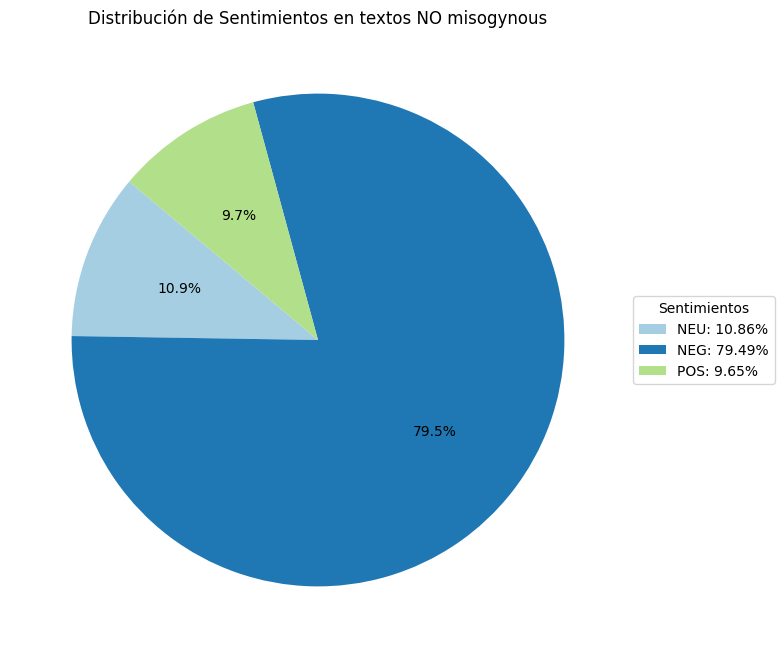

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_sentiment_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Sentimientos en textos NO misogynous")
legend_labels = [f"{sentiment}: {percentage:.2f}%" for sentiment, percentage in overall_sentiment_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Sentimientos", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [49]:
print("\nEjemplos de cada tipo de sentimiento en textos NO misogynous:")
for sent_type, example in examples_per_sentiment_not_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogynous:
NEU: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", "NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg", '@ShimaTrek dijo que el acoso no es tan grave porque al menos no es violación ?????', '@Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza', 'le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra', '@SamuSG_ pues comemela', '— Yo soy respetuoso con los demás, sólamente les recuerdo lo que son. Y si son escoria no es culpa mía. ... — ¡Claro que lo sé! ¿¡Por quién me tomas!?', '@TeleShowTV @EdgarCamarasa Si era tan buena no estaría preso por ABUSO ACOSO VIOLACIÓN A UN MENOR. Que pague para que aprenda el y sus seres queridos.', 'Peg

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogynous y no misogynous

-----------------------------------------------


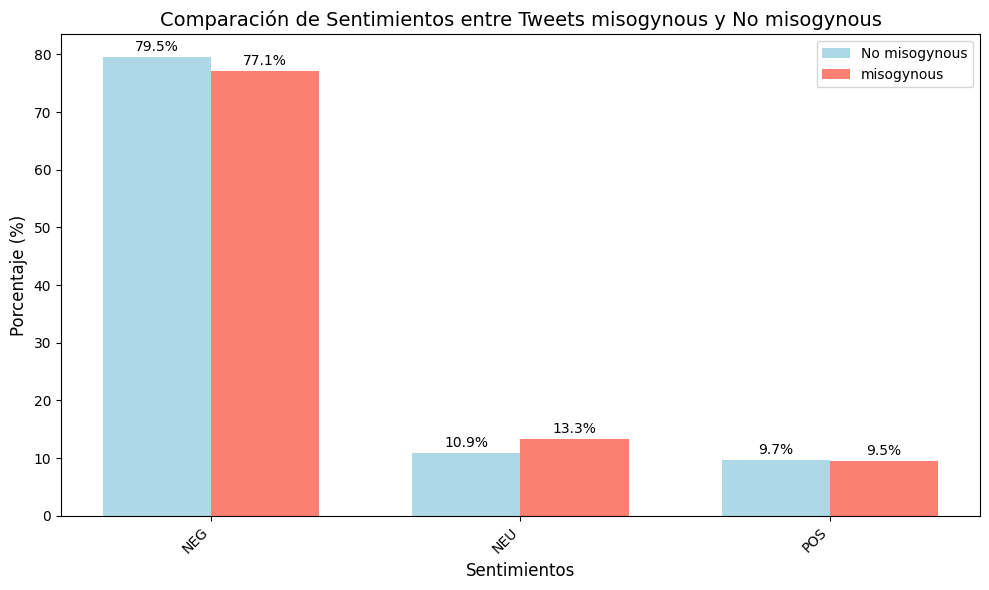

In [50]:
all_sentiments = list(set(overall_sentiment_percentages_not_misogynous.keys()).union(set(overall_sentiment_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_sentiment_percentages_not_misogynous.get(sent, 0) for sent in all_sentiments]
misogynous_percentages = [overall_sentiment_percentages_misogynous.get(sent, 0) for sent in all_sentiments]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_sentiments))
bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='No misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='misogynous', color='salmon')
for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Sentimientos', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Comparación de Sentimientos entre Tweets misogynous y No misogynous', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(all_sentiments, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()